<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Fall 2018</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: Jan 1, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. You will also write a report (.pdf) which contains your written answers and plots you will produce here. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
        For written questions, your answers have to be in the report as a ".pdf" file.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in both cell output and your ".pdf" file.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the requirements.txt.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        While submitting the homework file, please package your report(".pdf") and notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries install attached "requirements.txt" and run following command in activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

## Question 1 [20 pts]

Assume that you are provided a two hidden layer neural network designed to solve a binary classification problem. This architecture uses ReLU activation function between two hidden layers. You should choose the appropriate activation function of the output layer and loss function for the binary classification problem. Compute the gradients and update the weights only for a single iteration. You DO NOT need to provide any numeric inputs to feed the network to compute gradients. You only need to show derivations for the gradients in backpropagation. Provide a pdf file containing your answer (Hint: you do not need the neuron sizes if you use matrix notation).

## Question 2 [27 pts]

In this question, you will perform multi-class clasification on a gene expression dataset. Specificically, you will implement a neural network with two hidden layers to predict discrete tumor types: BRCA, KIRC, COAD, LUAD and PRAD.
Your features will be continuous gene activity (expression) levels. Download the dataset from the following link:
<br>
https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq. 
See details below.

### Data Loader [4 pts]

An important part of such a task is to implement your own data loader. In this homework, we provide a partial loader for you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below  to create your custom "GEDataset" class which will be able to load your dataset. 
Implement the functions whose proptotypes are given but the bodies are omitted. Follow the TODO notes below. You have to divide the dataset into three sections which are <b>"train (50%)", "validation (20%)" and "test (30%)"</b>. These non-overlapping splits, which are subsets of GEDataset, should be retrieved using the "get_dataset" function. 
<br>
Hint: The dataset is not normalized and your results will heavily depend on your input.



In [248]:
import torch
import pandas as pd
import numpy as np
#https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
class GEDataset(Dataset):
    
    # TODO:
    # Define constructor for GEDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs):
        self.label_dic = {"BRCA": 0, "KIRC": 1, "COAD": 2, "LUAD": 3, "PRAD": 4}
        self.data = kwargs.get("dataset")
        self.labels = []
        for label in self.data[:, -1]:
            self.labels.append(self.label_dic[label])
        self.labels = torch.from_numpy(np.array(self.labels).astype(np.float64)).long()
        self.data = torch.from_numpy(self.data[:, 0: self.data.shape[1] - 1].astype(np.float64)).float()
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index], self.labels[index]


def get_dataset(root):
    # TODO: 
    # Read dataset files from "data/Q1" folder
    # Split dataset samples into the 3 part for training, validation and test
    # Normalize datasets
    
    data = pd.read_csv(root + "data.csv")
    data = data.drop(data.columns[0], axis=1).values
    data = ((data - data.min()) / (data.max() - data.min()))
    labels = pd.read_csv(root + "labels.csv")
    labels = labels.drop(labels.columns[0], axis=1).values
    train_dataset = data[: int(data.shape[0] * 0.5)]
    train_dataset_labels = labels[:int(labels.shape[0] * 0.5)]
    train_dataset = np.column_stack((train_dataset, train_dataset_labels))
    val_dataset = data[int(data.shape[0] * 0.5) : int(data.shape[0] *  0.7)]
    val_dataset_labels = labels[int(labels.shape[0] * 0.5) : int(labels.shape[0] *  0.7)]
    val_dataset = np.column_stack((val_dataset, val_dataset_labels))
    test_dataset = data[int(data.shape[0] * 0.7):]
    test_dataset_labels = labels[int(data.shape[0] * 0.7):]
    test_dataset = np.column_stack((test_dataset, test_dataset_labels))
    return train_dataset, val_dataset, test_dataset


KeyboardInterrupt: 

### Neural Network (5 pts)

Now implement your two hidden layer neural network. GENet class will represent your neural network. First hidden layer will contain 64 neurons and second hidden layer will contain 32 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. Implement the functions with missing bodies.

In [156]:
import torch.nn as nn
class GENet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
        # TODO:
        # You should create your neural network here
        super(GENet, self).__init__()
        self.hidden1_input = nn.Linear(kwargs.get("input_size"), kwargs.get("H1_size"))
        self.hidden1_output = nn.ReLU()
        self.hidden2_input = nn.Linear(kwargs.get("H1_size"), kwargs.get("H2_size"))
        self.hidden2_output = nn.ReLU()
        self.output = nn.Linear(kwargs.get("H2_size"), kwargs.get("output_size"))
        #self.output_result = nn.Softmax()     
    def forward(self, X): # you can add any additional parameters you want
        # TODO:
        # Forward propagation implementation should be here
        out = self.hidden1_input(X)
        out = self.hidden1_output(out)
        out = self.hidden2_input(out)
        out = self.hidden2_output(out)
        return self.output(out)
        #return self.output_result(out)    


### Training (7 pts)

Complete below code snippet to train your network. You need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing above. Note that you will not do cross validation. You will need to load these splits at this phase. Make sure that you shuffle the samples in the training split. Plot training loss and training accuracy of each iteration (each batch). Also plot validation loss and accuracy at each epoch. Use matplotlib library for plotting. Your model is going to run upto the max epoch parameter. Pick the best model so far as your resulting model. You need to save this model in a ".pth" file. 

In [218]:
import time
import pickle
from torch.autograd import Variable
#HINT: note that your training time should not take many days.

#TODO:
#Pick your hyper parameters
max_epoch = 500
train_batch = 40
test_batch = 40
learning_rate = 0.001

use_gpu = torch.cuda.is_available()

class plot_values(object):
    def __init__(self):
        self.train_losses = []
        self.train_accuracies = []
        self.train_no = 0
        self.val_losses = []
        self.val_accuracies = []
        self.val_no = 0
        
class vals(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val):
        self.val = val
        self.sum += val
        self.count += 1
        self.avg = self.sum / self.count

def main(): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    train_dataset, val_dataset, test_dataset = get_dataset()
    trainloader = torch.utils.data.DataLoader(GEDataset(dataset = train_dataset),batch_size = train_batch,shuffle = True, num_workers = 8)
    val_loader = torch.utils.data.DataLoader(GEDataset(dataset = val_dataset),batch_size = test_batch,shuffle = False, num_workers = 8)
    
    model = GENet(input_size = 20531, H1_size = 64, H2_size = 32, output_size = 5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    plot_vals = plot_values()
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/model.pth"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, trainloader, plot_vals)
        acc = test(model, val_loader, criterion, plot_vals)
        if acc > best_acc:
            torch.save(model, best_path)
    file = open("plot_vals.p", 'wb')
    pickle.dump(plot_vals, file)
    file.close()
    
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader, plot_vals): # you are free to change parameters
    batch_time = vals()
    data_time = vals()
    losses = vals()
    accuracies = vals()
    #correct = 0
    model.train()
    
    end = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        data, labels = Variable(data), Variable(labels)
        data_time.update(time.time() - end)
        
        #forward + backward + optimize
        y_pred = model.forward(data)
        error = criterion(y_pred, labels)
        # zero the parameter gradients
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        
        #set losses, accuracies and time
        losses.update(error.data)
        plot_vals.train_losses.append(losses.val)
        pred = torch.argmax(y_pred, dim = 1)
        correct = pred.eq(labels.data.view_as(pred)).sum()
        #print(correct)
        #print(pred)
        #print(labels)
        accuracies.update(float(correct) / float(labels.shape[0]))
        plot_vals.train_accuracies.append(accuracies.val)
        plot_vals.train_no += 1
        batch_time.update(time.time() - end)
        end = time.time()
        
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time,
               loss=losses,
               acc=accuracies))


''' Test&Validate your network '''
def test(model, loader, criterion, plot_vals): # you are free to change parameters
    batch_time = vals()
    accuracies = vals()
    losses = vals()
    correct = 0
    model.eval()
    
    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            data, labels = Variable(data), Variable(labels)
            y_pred = model.forward(data)
            error = criterion(y_pred, labels)
            pred = torch.argmax(y_pred, dim = 1)
            #set losses,accuracies and time
            losses.update(error.data)
            correct = pred.eq(labels.data.view_as(pred)).sum()
            accuracies.update(float(correct) / float(labels.shape[0]))
            batch_time.update(time.time() - end)
            end = time.time()
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    plot_vals.val_losses.append(losses.avg)
    plot_vals.val_accuracies.append(accuracies.avg)
    plot_vals.val_no += 1
    return accuracies.avg
main()

Epoch: [1][1/10]	Time 0.251 (0.251)	Data 0.1822 (0.1822)	Loss 1.5898 (1.5898)	Accu 0.3750 (0.3750)	
Epoch: [1][2/10]	Time 0.025 (0.138)	Data 0.0025 (0.0923)	Loss 1.5935 (1.5916)	Accu 0.3250 (0.3500)	
Epoch: [1][3/10]	Time 0.017 (0.098)	Data 0.0023 (0.0623)	Loss 1.5809 (1.5881)	Accu 0.3500 (0.3500)	
Epoch: [1][4/10]	Time 0.027 (0.080)	Data 0.0104 (0.0493)	Loss 1.5724 (1.5842)	Accu 0.3250 (0.3437)	
Epoch: [1][5/10]	Time 0.024 (0.069)	Data 0.0098 (0.0414)	Loss 1.5706 (1.5814)	Accu 0.3750 (0.3500)	
Epoch: [1][6/10]	Time 0.021 (0.061)	Data 0.0009 (0.0347)	Loss 1.5538 (1.5768)	Accu 0.4500 (0.3667)	
Epoch: [1][7/10]	Time 0.036 (0.057)	Data 0.0233 (0.0330)	Loss 1.5584 (1.5742)	Accu 0.3500 (0.3643)	
Epoch: [1][8/10]	Time 0.014 (0.052)	Data 0.0027 (0.0292)	Loss 1.5492 (1.5711)	Accu 0.4250 (0.3719)	
Epoch: [1][9/10]	Time 0.013 (0.047)	Data 0.0008 (0.0261)	Loss 1.5613 (1.5700)	Accu 0.4000 (0.3750)	
Epoch: [1][10/10]	Time 0.012 (0.044)	Data 0.0009 (0.0236)	Loss 1.5663 (1.5696)	Accu 0.3250 (0.3700)	

Epoch: [9][1/10]	Time 0.151 (0.151)	Data 0.1067 (0.1067)	Loss 1.5131 (1.5131)	Accu 0.3250 (0.3250)	
Epoch: [9][2/10]	Time 0.013 (0.082)	Data 0.0018 (0.0542)	Loss 1.4092 (1.4611)	Accu 0.3000 (0.3125)	
Epoch: [9][3/10]	Time 0.014 (0.060)	Data 0.0024 (0.0369)	Loss 1.4673 (1.4632)	Accu 0.3500 (0.3250)	
Epoch: [9][4/10]	Time 0.017 (0.049)	Data 0.0009 (0.0279)	Loss 1.3699 (1.4399)	Accu 0.4750 (0.3625)	
Epoch: [9][5/10]	Time 0.014 (0.042)	Data 0.0014 (0.0226)	Loss 1.3234 (1.4166)	Accu 0.4500 (0.3800)	
Epoch: [9][6/10]	Time 0.017 (0.038)	Data 0.0018 (0.0192)	Loss 1.3570 (1.4067)	Accu 0.3500 (0.3750)	
Epoch: [9][7/10]	Time 0.019 (0.035)	Data 0.0036 (0.0169)	Loss 1.4543 (1.4135)	Accu 0.2750 (0.3607)	
Epoch: [9][8/10]	Time 0.013 (0.032)	Data 0.0016 (0.0150)	Loss 1.3650 (1.4074)	Accu 0.4250 (0.3687)	
Epoch: [9][9/10]	Time 0.013 (0.030)	Data 0.0007 (0.0134)	Loss 1.4508 (1.4122)	Accu 0.3250 (0.3639)	
Epoch: [9][10/10]	Time 0.013 (0.028)	Data 0.0007 (0.0121)	Loss 1.3681 (1.4078)	Accu 0.4250 (0.3700)	

Time 0.029	Accu 0.5437	
Epoch: [17][1/10]	Time 0.146 (0.146)	Data 0.1053 (0.1053)	Loss 1.1113 (1.1113)	Accu 0.5250 (0.5250)	
Epoch: [17][2/10]	Time 0.015 (0.081)	Data 0.0010 (0.0531)	Loss 1.2266 (1.1690)	Accu 0.4250 (0.4750)	
Epoch: [17][3/10]	Time 0.016 (0.059)	Data 0.0017 (0.0360)	Loss 1.1447 (1.1609)	Accu 0.5250 (0.4917)	
Epoch: [17][4/10]	Time 0.015 (0.048)	Data 0.0009 (0.0272)	Loss 1.0280 (1.1277)	Accu 0.6750 (0.5375)	
Epoch: [17][5/10]	Time 0.016 (0.042)	Data 0.0020 (0.0222)	Loss 1.1144 (1.1250)	Accu 0.5500 (0.5400)	
Epoch: [17][6/10]	Time 0.022 (0.038)	Data 0.0062 (0.0195)	Loss 1.0636 (1.1148)	Accu 0.5750 (0.5458)	
Epoch: [17][7/10]	Time 0.019 (0.036)	Data 0.0062 (0.0176)	Loss 1.1587 (1.1210)	Accu 0.5250 (0.5429)	
Epoch: [17][8/10]	Time 0.015 (0.033)	Data 0.0019 (0.0156)	Loss 1.0404 (1.1110)	Accu 0.6000 (0.5500)	
Epoch: [17][9/10]	Time 0.013 (0.031)	Data 0.0009 (0.0140)	Loss 1.0096 (1.0997)	Accu 0.6000 (0.5556)	
Epoch: [17][10/10]	Time 0.012 (0.029)	Data 0.0007 (0.0127)	Loss 1.1

Time 0.029	Accu 0.8875	
Epoch: [25][1/10]	Time 0.150 (0.150)	Data 0.1031 (0.1031)	Loss 0.7278 (0.7278)	Accu 0.9000 (0.9000)	
Epoch: [25][2/10]	Time 0.016 (0.083)	Data 0.0027 (0.0529)	Loss 0.6467 (0.6872)	Accu 0.9000 (0.9000)	
Epoch: [25][3/10]	Time 0.031 (0.066)	Data 0.0027 (0.0362)	Loss 0.5992 (0.6579)	Accu 0.9500 (0.9167)	
Epoch: [25][4/10]	Time 0.033 (0.058)	Data 0.0025 (0.0277)	Loss 0.7065 (0.6700)	Accu 0.8750 (0.9062)	
Epoch: [25][5/10]	Time 0.018 (0.050)	Data 0.0009 (0.0224)	Loss 0.6214 (0.6603)	Accu 0.8750 (0.9000)	
Epoch: [25][6/10]	Time 0.018 (0.044)	Data 0.0009 (0.0188)	Loss 0.6134 (0.6525)	Accu 0.9000 (0.9000)	
Epoch: [25][7/10]	Time 0.030 (0.042)	Data 0.0017 (0.0164)	Loss 0.6097 (0.6464)	Accu 0.8500 (0.8929)	
Epoch: [25][8/10]	Time 0.025 (0.040)	Data 0.0024 (0.0146)	Loss 0.5939 (0.6398)	Accu 0.8000 (0.8812)	
Epoch: [25][9/10]	Time 0.019 (0.038)	Data 0.0007 (0.0131)	Loss 0.6518 (0.6412)	Accu 0.8000 (0.8722)	
Epoch: [25][10/10]	Time 0.022 (0.036)	Data 0.0007 (0.0118)	Loss 0.6

Time 0.027	Accu 0.9250	
Epoch: [33][1/10]	Time 0.131 (0.131)	Data 0.0929 (0.0929)	Loss 0.3563 (0.3563)	Accu 0.9500 (0.9500)	
Epoch: [33][2/10]	Time 0.014 (0.072)	Data 0.0019 (0.0474)	Loss 0.3469 (0.3516)	Accu 0.9500 (0.9500)	
Epoch: [33][3/10]	Time 0.013 (0.053)	Data 0.0015 (0.0321)	Loss 0.2471 (0.3168)	Accu 1.0000 (0.9667)	
Epoch: [33][4/10]	Time 0.013 (0.043)	Data 0.0017 (0.0245)	Loss 0.3865 (0.3342)	Accu 0.9500 (0.9625)	
Epoch: [33][5/10]	Time 0.015 (0.037)	Data 0.0017 (0.0199)	Loss 0.2093 (0.3092)	Accu 1.0000 (0.9700)	
Epoch: [33][6/10]	Time 0.014 (0.033)	Data 0.0027 (0.0171)	Loss 0.3239 (0.3117)	Accu 1.0000 (0.9750)	
Epoch: [33][7/10]	Time 0.013 (0.030)	Data 0.0009 (0.0147)	Loss 0.3607 (0.3187)	Accu 0.9750 (0.9750)	
Epoch: [33][8/10]	Time 0.014 (0.028)	Data 0.0028 (0.0133)	Loss 0.3413 (0.3215)	Accu 1.0000 (0.9781)	
Epoch: [33][9/10]	Time 0.012 (0.027)	Data 0.0007 (0.0119)	Loss 0.4457 (0.3353)	Accu 0.9250 (0.9722)	
Epoch: [33][10/10]	Time 0.013 (0.025)	Data 0.0007 (0.0107)	Loss 0.2

Time 0.030	Accu 0.9875	
Epoch: [41][1/10]	Time 0.136 (0.136)	Data 0.0964 (0.0964)	Loss 0.2294 (0.2294)	Accu 0.9500 (0.9500)	
Epoch: [41][2/10]	Time 0.013 (0.074)	Data 0.0022 (0.0493)	Loss 0.2526 (0.2410)	Accu 1.0000 (0.9750)	
Epoch: [41][3/10]	Time 0.013 (0.054)	Data 0.0016 (0.0334)	Loss 0.1478 (0.2099)	Accu 1.0000 (0.9833)	
Epoch: [41][4/10]	Time 0.012 (0.044)	Data 0.0009 (0.0253)	Loss 0.1633 (0.1983)	Accu 1.0000 (0.9875)	
Epoch: [41][5/10]	Time 0.014 (0.038)	Data 0.0017 (0.0206)	Loss 0.2451 (0.2077)	Accu 0.9750 (0.9850)	
Epoch: [41][6/10]	Time 0.013 (0.034)	Data 0.0009 (0.0173)	Loss 0.1595 (0.1996)	Accu 0.9750 (0.9833)	
Epoch: [41][7/10]	Time 0.014 (0.031)	Data 0.0018 (0.0151)	Loss 0.1291 (0.1895)	Accu 1.0000 (0.9857)	
Epoch: [41][8/10]	Time 0.014 (0.029)	Data 0.0024 (0.0135)	Loss 0.1395 (0.1833)	Accu 1.0000 (0.9875)	
Epoch: [41][9/10]	Time 0.013 (0.027)	Data 0.0008 (0.0121)	Loss 0.1755 (0.1824)	Accu 1.0000 (0.9889)	
Epoch: [41][10/10]	Time 0.013 (0.026)	Data 0.0007 (0.0109)	Loss 0.1

Time 0.028	Accu 0.9938	
Epoch: [49][1/10]	Time 0.142 (0.142)	Data 0.1000 (0.1000)	Loss 0.1330 (0.1330)	Accu 0.9750 (0.9750)	
Epoch: [49][2/10]	Time 0.013 (0.078)	Data 0.0011 (0.0506)	Loss 0.1508 (0.1419)	Accu 0.9750 (0.9750)	
Epoch: [49][3/10]	Time 0.014 (0.057)	Data 0.0010 (0.0340)	Loss 0.1375 (0.1404)	Accu 0.9750 (0.9750)	
Epoch: [49][4/10]	Time 0.017 (0.047)	Data 0.0009 (0.0258)	Loss 0.1092 (0.1326)	Accu 1.0000 (0.9812)	
Epoch: [49][5/10]	Time 0.014 (0.040)	Data 0.0010 (0.0208)	Loss 0.0901 (0.1241)	Accu 1.0000 (0.9850)	
Epoch: [49][6/10]	Time 0.016 (0.036)	Data 0.0025 (0.0178)	Loss 0.1162 (0.1228)	Accu 1.0000 (0.9875)	
Epoch: [49][7/10]	Time 0.015 (0.033)	Data 0.0010 (0.0154)	Loss 0.0948 (0.1188)	Accu 1.0000 (0.9893)	
Epoch: [49][8/10]	Time 0.017 (0.031)	Data 0.0029 (0.0138)	Loss 0.1182 (0.1187)	Accu 1.0000 (0.9906)	
Epoch: [49][9/10]	Time 0.013 (0.029)	Data 0.0007 (0.0124)	Loss 0.0514 (0.1113)	Accu 1.0000 (0.9917)	
Epoch: [49][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0112)	Loss 0.0

Time 0.029	Accu 0.9938	
Epoch: [57][1/10]	Time 0.142 (0.142)	Data 0.1028 (0.1028)	Loss 0.0708 (0.0708)	Accu 1.0000 (1.0000)	
Epoch: [57][2/10]	Time 0.013 (0.077)	Data 0.0009 (0.0519)	Loss 0.1202 (0.0955)	Accu 0.9750 (0.9875)	
Epoch: [57][3/10]	Time 0.013 (0.056)	Data 0.0008 (0.0349)	Loss 0.0669 (0.0860)	Accu 1.0000 (0.9917)	
Epoch: [57][4/10]	Time 0.016 (0.046)	Data 0.0019 (0.0266)	Loss 0.0719 (0.0824)	Accu 1.0000 (0.9938)	
Epoch: [57][5/10]	Time 0.016 (0.040)	Data 0.0024 (0.0218)	Loss 0.0453 (0.0750)	Accu 1.0000 (0.9950)	
Epoch: [57][6/10]	Time 0.014 (0.035)	Data 0.0019 (0.0185)	Loss 0.0555 (0.0718)	Accu 1.0000 (0.9958)	
Epoch: [57][7/10]	Time 0.014 (0.032)	Data 0.0019 (0.0161)	Loss 0.0607 (0.0702)	Accu 1.0000 (0.9964)	
Epoch: [57][8/10]	Time 0.015 (0.030)	Data 0.0028 (0.0144)	Loss 0.0578 (0.0686)	Accu 1.0000 (0.9969)	
Epoch: [57][9/10]	Time 0.013 (0.028)	Data 0.0008 (0.0129)	Loss 0.1050 (0.0727)	Accu 0.9500 (0.9917)	
Epoch: [57][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0117)	Loss 0.0

Time 0.028	Accu 0.9938	
Epoch: [65][1/10]	Time 0.132 (0.132)	Data 0.0940 (0.0940)	Loss 0.0359 (0.0359)	Accu 1.0000 (1.0000)	
Epoch: [65][2/10]	Time 0.013 (0.073)	Data 0.0014 (0.0477)	Loss 0.0571 (0.0465)	Accu 1.0000 (1.0000)	
Epoch: [65][3/10]	Time 0.013 (0.053)	Data 0.0014 (0.0323)	Loss 0.0398 (0.0442)	Accu 1.0000 (1.0000)	
Epoch: [65][4/10]	Time 0.018 (0.044)	Data 0.0040 (0.0252)	Loss 0.0347 (0.0419)	Accu 1.0000 (1.0000)	
Epoch: [65][5/10]	Time 0.017 (0.038)	Data 0.0009 (0.0203)	Loss 0.0464 (0.0428)	Accu 1.0000 (1.0000)	
Epoch: [65][6/10]	Time 0.017 (0.035)	Data 0.0010 (0.0171)	Loss 0.0336 (0.0412)	Accu 1.0000 (1.0000)	
Epoch: [65][7/10]	Time 0.014 (0.032)	Data 0.0019 (0.0149)	Loss 0.0600 (0.0439)	Accu 1.0000 (1.0000)	
Epoch: [65][8/10]	Time 0.015 (0.030)	Data 0.0026 (0.0134)	Loss 0.0584 (0.0457)	Accu 1.0000 (1.0000)	
Epoch: [65][9/10]	Time 0.012 (0.028)	Data 0.0008 (0.0120)	Loss 0.0575 (0.0470)	Accu 1.0000 (1.0000)	
Epoch: [65][10/10]	Time 0.014 (0.027)	Data 0.0006 (0.0108)	Loss 0.0

Time 0.027	Accu 1.0000	
Epoch: [73][1/10]	Time 0.150 (0.150)	Data 0.1032 (0.1032)	Loss 0.0326 (0.0326)	Accu 1.0000 (1.0000)	
Epoch: [73][2/10]	Time 0.015 (0.083)	Data 0.0011 (0.0521)	Loss 0.0545 (0.0436)	Accu 1.0000 (1.0000)	
Epoch: [73][3/10]	Time 0.017 (0.061)	Data 0.0018 (0.0353)	Loss 0.0339 (0.0403)	Accu 1.0000 (1.0000)	
Epoch: [73][4/10]	Time 0.017 (0.050)	Data 0.0024 (0.0271)	Loss 0.0506 (0.0429)	Accu 1.0000 (1.0000)	
Epoch: [73][5/10]	Time 0.016 (0.043)	Data 0.0019 (0.0220)	Loss 0.0440 (0.0431)	Accu 1.0000 (1.0000)	
Epoch: [73][6/10]	Time 0.013 (0.038)	Data 0.0010 (0.0185)	Loss 0.0676 (0.0472)	Accu 0.9750 (0.9958)	
Epoch: [73][7/10]	Time 0.014 (0.035)	Data 0.0023 (0.0162)	Loss 0.0167 (0.0429)	Accu 1.0000 (0.9964)	
Epoch: [73][8/10]	Time 0.017 (0.032)	Data 0.0016 (0.0144)	Loss 0.0328 (0.0416)	Accu 1.0000 (0.9969)	
Epoch: [73][9/10]	Time 0.014 (0.030)	Data 0.0007 (0.0129)	Loss 0.0235 (0.0396)	Accu 1.0000 (0.9972)	
Epoch: [73][10/10]	Time 0.014 (0.029)	Data 0.0009 (0.0117)	Loss 0.0

Time 0.029	Accu 1.0000	
Epoch: [81][1/10]	Time 0.136 (0.136)	Data 0.0979 (0.0979)	Loss 0.0372 (0.0372)	Accu 1.0000 (1.0000)	
Epoch: [81][2/10]	Time 0.014 (0.075)	Data 0.0021 (0.0500)	Loss 0.0350 (0.0361)	Accu 1.0000 (1.0000)	
Epoch: [81][3/10]	Time 0.015 (0.055)	Data 0.0020 (0.0340)	Loss 0.0341 (0.0354)	Accu 1.0000 (1.0000)	
Epoch: [81][4/10]	Time 0.019 (0.046)	Data 0.0025 (0.0261)	Loss 0.0290 (0.0338)	Accu 1.0000 (1.0000)	
Epoch: [81][5/10]	Time 0.015 (0.040)	Data 0.0010 (0.0211)	Loss 0.0276 (0.0326)	Accu 1.0000 (1.0000)	
Epoch: [81][6/10]	Time 0.014 (0.036)	Data 0.0019 (0.0179)	Loss 0.0322 (0.0325)	Accu 1.0000 (1.0000)	
Epoch: [81][7/10]	Time 0.014 (0.033)	Data 0.0018 (0.0156)	Loss 0.0311 (0.0323)	Accu 1.0000 (1.0000)	
Epoch: [81][8/10]	Time 0.014 (0.030)	Data 0.0023 (0.0139)	Loss 0.0211 (0.0309)	Accu 1.0000 (1.0000)	
Epoch: [81][9/10]	Time 0.013 (0.028)	Data 0.0007 (0.0125)	Loss 0.0439 (0.0323)	Accu 0.9750 (0.9972)	
Epoch: [81][10/10]	Time 0.014 (0.027)	Data 0.0007 (0.0113)	Loss 0.0

Time 0.029	Accu 1.0000	
Epoch: [89][1/10]	Time 0.132 (0.132)	Data 0.0920 (0.0920)	Loss 0.0205 (0.0205)	Accu 1.0000 (1.0000)	
Epoch: [89][2/10]	Time 0.015 (0.074)	Data 0.0024 (0.0472)	Loss 0.0191 (0.0198)	Accu 1.0000 (1.0000)	
Epoch: [89][3/10]	Time 0.015 (0.054)	Data 0.0020 (0.0321)	Loss 0.0219 (0.0205)	Accu 1.0000 (1.0000)	
Epoch: [89][4/10]	Time 0.017 (0.045)	Data 0.0019 (0.0246)	Loss 0.0196 (0.0203)	Accu 1.0000 (1.0000)	
Epoch: [89][5/10]	Time 0.017 (0.039)	Data 0.0032 (0.0203)	Loss 0.0225 (0.0207)	Accu 1.0000 (1.0000)	
Epoch: [89][6/10]	Time 0.015 (0.035)	Data 0.0025 (0.0173)	Loss 0.0444 (0.0247)	Accu 0.9750 (0.9958)	
Epoch: [89][7/10]	Time 0.014 (0.032)	Data 0.0010 (0.0150)	Loss 0.0213 (0.0242)	Accu 1.0000 (0.9964)	
Epoch: [89][8/10]	Time 0.015 (0.030)	Data 0.0021 (0.0134)	Loss 0.0117 (0.0226)	Accu 1.0000 (0.9969)	
Epoch: [89][9/10]	Time 0.014 (0.028)	Data 0.0008 (0.0120)	Loss 0.0485 (0.0255)	Accu 1.0000 (0.9972)	
Epoch: [89][10/10]	Time 0.013 (0.027)	Data 0.0008 (0.0109)	Loss 0.0

Time 0.030	Accu 1.0000	
Epoch: [97][1/10]	Time 0.152 (0.152)	Data 0.1075 (0.1075)	Loss 0.0115 (0.0115)	Accu 1.0000 (1.0000)	
Epoch: [97][2/10]	Time 0.014 (0.083)	Data 0.0016 (0.0545)	Loss 0.0340 (0.0228)	Accu 0.9750 (0.9875)	
Epoch: [97][3/10]	Time 0.016 (0.061)	Data 0.0018 (0.0370)	Loss 0.0290 (0.0249)	Accu 1.0000 (0.9917)	
Epoch: [97][4/10]	Time 0.018 (0.050)	Data 0.0021 (0.0282)	Loss 0.0153 (0.0225)	Accu 1.0000 (0.9938)	
Epoch: [97][5/10]	Time 0.016 (0.043)	Data 0.0018 (0.0230)	Loss 0.0124 (0.0205)	Accu 1.0000 (0.9950)	
Epoch: [97][6/10]	Time 0.015 (0.038)	Data 0.0020 (0.0195)	Loss 0.0338 (0.0227)	Accu 1.0000 (0.9958)	
Epoch: [97][7/10]	Time 0.015 (0.035)	Data 0.0016 (0.0169)	Loss 0.0106 (0.0209)	Accu 1.0000 (0.9964)	
Epoch: [97][8/10]	Time 0.015 (0.033)	Data 0.0026 (0.0151)	Loss 0.0159 (0.0203)	Accu 1.0000 (0.9969)	
Epoch: [97][9/10]	Time 0.014 (0.031)	Data 0.0007 (0.0135)	Loss 0.0168 (0.0199)	Accu 1.0000 (0.9972)	
Epoch: [97][10/10]	Time 0.014 (0.029)	Data 0.0007 (0.0122)	Loss 0.0

Time 0.031	Accu 1.0000	
Epoch: [105][1/10]	Time 0.160 (0.160)	Data 0.1088 (0.1088)	Loss 0.0127 (0.0127)	Accu 1.0000 (1.0000)	
Epoch: [105][2/10]	Time 0.024 (0.092)	Data 0.0025 (0.0556)	Loss 0.0166 (0.0147)	Accu 1.0000 (1.0000)	
Epoch: [105][3/10]	Time 0.018 (0.068)	Data 0.0027 (0.0380)	Loss 0.0124 (0.0139)	Accu 1.0000 (1.0000)	
Epoch: [105][4/10]	Time 0.020 (0.056)	Data 0.0030 (0.0292)	Loss 0.0147 (0.0141)	Accu 1.0000 (1.0000)	
Epoch: [105][5/10]	Time 0.016 (0.048)	Data 0.0016 (0.0237)	Loss 0.0181 (0.0149)	Accu 1.0000 (1.0000)	
Epoch: [105][6/10]	Time 0.016 (0.043)	Data 0.0019 (0.0201)	Loss 0.0064 (0.0135)	Accu 1.0000 (1.0000)	
Epoch: [105][7/10]	Time 0.017 (0.039)	Data 0.0026 (0.0176)	Loss 0.0174 (0.0141)	Accu 1.0000 (1.0000)	
Epoch: [105][8/10]	Time 0.015 (0.036)	Data 0.0018 (0.0156)	Loss 0.0286 (0.0159)	Accu 1.0000 (1.0000)	
Epoch: [105][9/10]	Time 0.016 (0.034)	Data 0.0012 (0.0140)	Loss 0.0149 (0.0158)	Accu 1.0000 (1.0000)	
Epoch: [105][10/10]	Time 0.016 (0.032)	Data 0.0011 (0.0127

Time 0.031	Accu 1.0000	
Epoch: [113][1/10]	Time 0.162 (0.162)	Data 0.1135 (0.1135)	Loss 0.0113 (0.0113)	Accu 1.0000 (1.0000)	
Epoch: [113][2/10]	Time 0.020 (0.091)	Data 0.0017 (0.0576)	Loss 0.0217 (0.0165)	Accu 1.0000 (1.0000)	
Epoch: [113][3/10]	Time 0.018 (0.067)	Data 0.0017 (0.0390)	Loss 0.0133 (0.0155)	Accu 1.0000 (1.0000)	
Epoch: [113][4/10]	Time 0.017 (0.054)	Data 0.0019 (0.0297)	Loss 0.0218 (0.0170)	Accu 1.0000 (1.0000)	
Epoch: [113][5/10]	Time 0.017 (0.047)	Data 0.0022 (0.0242)	Loss 0.0236 (0.0184)	Accu 1.0000 (1.0000)	
Epoch: [113][6/10]	Time 0.015 (0.042)	Data 0.0019 (0.0205)	Loss 0.0147 (0.0178)	Accu 1.0000 (1.0000)	
Epoch: [113][7/10]	Time 0.019 (0.038)	Data 0.0033 (0.0180)	Loss 0.0094 (0.0166)	Accu 1.0000 (1.0000)	
Epoch: [113][8/10]	Time 0.017 (0.036)	Data 0.0021 (0.0160)	Loss 0.0121 (0.0160)	Accu 1.0000 (1.0000)	
Epoch: [113][9/10]	Time 0.015 (0.033)	Data 0.0013 (0.0144)	Loss 0.0122 (0.0156)	Accu 1.0000 (1.0000)	
Epoch: [113][10/10]	Time 0.016 (0.032)	Data 0.0021 (0.0132

Time 0.032	Accu 1.0000	
Epoch: [121][1/10]	Time 0.155 (0.155)	Data 0.1107 (0.1107)	Loss 0.0114 (0.0114)	Accu 1.0000 (1.0000)	
Epoch: [121][2/10]	Time 0.017 (0.086)	Data 0.0029 (0.0568)	Loss 0.0191 (0.0152)	Accu 1.0000 (1.0000)	
Epoch: [121][3/10]	Time 0.016 (0.063)	Data 0.0009 (0.0381)	Loss 0.0124 (0.0143)	Accu 1.0000 (1.0000)	
Epoch: [121][4/10]	Time 0.019 (0.052)	Data 0.0027 (0.0293)	Loss 0.0115 (0.0136)	Accu 1.0000 (1.0000)	
Epoch: [121][5/10]	Time 0.016 (0.044)	Data 0.0010 (0.0236)	Loss 0.0094 (0.0128)	Accu 1.0000 (1.0000)	
Epoch: [121][6/10]	Time 0.018 (0.040)	Data 0.0027 (0.0201)	Loss 0.0139 (0.0129)	Accu 1.0000 (1.0000)	
Epoch: [121][7/10]	Time 0.016 (0.036)	Data 0.0021 (0.0175)	Loss 0.0190 (0.0138)	Accu 1.0000 (1.0000)	
Epoch: [121][8/10]	Time 0.015 (0.034)	Data 0.0028 (0.0157)	Loss 0.0073 (0.0130)	Accu 1.0000 (1.0000)	
Epoch: [121][9/10]	Time 0.014 (0.032)	Data 0.0007 (0.0140)	Loss 0.0177 (0.0135)	Accu 1.0000 (1.0000)	
Epoch: [121][10/10]	Time 0.014 (0.030)	Data 0.0007 (0.0127

Epoch: [128][10/10]	Time 0.029 (0.042)	Data 0.0013 (0.0160)	Loss 0.0054 (0.0119)	Accu 1.0000 (1.0000)	
Time 0.046	Accu 1.0000	
Epoch: [129][1/10]	Time 0.140 (0.140)	Data 0.0951 (0.0951)	Loss 0.0147 (0.0147)	Accu 1.0000 (1.0000)	
Epoch: [129][2/10]	Time 0.016 (0.078)	Data 0.0027 (0.0489)	Loss 0.0120 (0.0133)	Accu 1.0000 (1.0000)	
Epoch: [129][3/10]	Time 0.015 (0.057)	Data 0.0020 (0.0333)	Loss 0.0057 (0.0108)	Accu 1.0000 (1.0000)	
Epoch: [129][4/10]	Time 0.020 (0.048)	Data 0.0020 (0.0254)	Loss 0.0084 (0.0102)	Accu 1.0000 (1.0000)	
Epoch: [129][5/10]	Time 0.022 (0.043)	Data 0.0074 (0.0218)	Loss 0.0103 (0.0102)	Accu 1.0000 (1.0000)	
Epoch: [129][6/10]	Time 0.015 (0.038)	Data 0.0023 (0.0186)	Loss 0.0119 (0.0105)	Accu 1.0000 (1.0000)	
Epoch: [129][7/10]	Time 0.014 (0.035)	Data 0.0016 (0.0162)	Loss 0.0115 (0.0106)	Accu 1.0000 (1.0000)	
Epoch: [129][8/10]	Time 0.015 (0.032)	Data 0.0025 (0.0145)	Loss 0.0107 (0.0107)	Accu 1.0000 (1.0000)	
Epoch: [129][9/10]	Time 0.014 (0.030)	Data 0.0010 (0.0130

Time 0.029	Accu 1.0000	
Epoch: [137][1/10]	Time 0.148 (0.148)	Data 0.1067 (0.1067)	Loss 0.0049 (0.0049)	Accu 1.0000 (1.0000)	
Epoch: [137][2/10]	Time 0.014 (0.081)	Data 0.0015 (0.0541)	Loss 0.0155 (0.0102)	Accu 1.0000 (1.0000)	
Epoch: [137][3/10]	Time 0.017 (0.060)	Data 0.0025 (0.0369)	Loss 0.0107 (0.0104)	Accu 1.0000 (1.0000)	
Epoch: [137][4/10]	Time 0.016 (0.049)	Data 0.0009 (0.0279)	Loss 0.0253 (0.0141)	Accu 1.0000 (1.0000)	
Epoch: [137][5/10]	Time 0.014 (0.042)	Data 0.0015 (0.0226)	Loss 0.0094 (0.0132)	Accu 1.0000 (1.0000)	
Epoch: [137][6/10]	Time 0.015 (0.037)	Data 0.0019 (0.0192)	Loss 0.0043 (0.0117)	Accu 1.0000 (1.0000)	
Epoch: [137][7/10]	Time 0.015 (0.034)	Data 0.0019 (0.0167)	Loss 0.0047 (0.0107)	Accu 1.0000 (1.0000)	
Epoch: [137][8/10]	Time 0.016 (0.032)	Data 0.0027 (0.0149)	Loss 0.0115 (0.0108)	Accu 1.0000 (1.0000)	
Epoch: [137][9/10]	Time 0.015 (0.030)	Data 0.0008 (0.0134)	Loss 0.0064 (0.0103)	Accu 1.0000 (1.0000)	
Epoch: [137][10/10]	Time 0.014 (0.028)	Data 0.0007 (0.0121

Time 0.027	Accu 1.0000	
Epoch: [145][1/10]	Time 0.142 (0.142)	Data 0.1019 (0.1019)	Loss 0.0046 (0.0046)	Accu 1.0000 (1.0000)	
Epoch: [145][2/10]	Time 0.014 (0.078)	Data 0.0023 (0.0521)	Loss 0.0061 (0.0053)	Accu 1.0000 (1.0000)	
Epoch: [145][3/10]	Time 0.016 (0.057)	Data 0.0010 (0.0351)	Loss 0.0125 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [145][4/10]	Time 0.021 (0.048)	Data 0.0029 (0.0270)	Loss 0.0040 (0.0068)	Accu 1.0000 (1.0000)	
Epoch: [145][5/10]	Time 0.015 (0.041)	Data 0.0008 (0.0218)	Loss 0.0047 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [145][6/10]	Time 0.015 (0.037)	Data 0.0014 (0.0184)	Loss 0.0067 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [145][7/10]	Time 0.014 (0.034)	Data 0.0016 (0.0160)	Loss 0.0150 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [145][8/10]	Time 0.015 (0.031)	Data 0.0026 (0.0143)	Loss 0.0153 (0.0086)	Accu 1.0000 (1.0000)	
Epoch: [145][9/10]	Time 0.014 (0.030)	Data 0.0007 (0.0128)	Loss 0.0161 (0.0094)	Accu 1.0000 (1.0000)	
Epoch: [145][10/10]	Time 0.014 (0.028)	Data 0.0007 (0.0116

Time 0.030	Accu 1.0000	
Epoch: [153][1/10]	Time 0.153 (0.153)	Data 0.1065 (0.1065)	Loss 0.0156 (0.0156)	Accu 1.0000 (1.0000)	
Epoch: [153][2/10]	Time 0.016 (0.084)	Data 0.0021 (0.0543)	Loss 0.0074 (0.0115)	Accu 1.0000 (1.0000)	
Epoch: [153][3/10]	Time 0.020 (0.063)	Data 0.0021 (0.0369)	Loss 0.0091 (0.0107)	Accu 1.0000 (1.0000)	
Epoch: [153][4/10]	Time 0.028 (0.054)	Data 0.0090 (0.0299)	Loss 0.0041 (0.0091)	Accu 1.0000 (1.0000)	
Epoch: [153][5/10]	Time 0.021 (0.047)	Data 0.0019 (0.0243)	Loss 0.0074 (0.0087)	Accu 1.0000 (1.0000)	
Epoch: [153][6/10]	Time 0.022 (0.043)	Data 0.0037 (0.0209)	Loss 0.0073 (0.0085)	Accu 1.0000 (1.0000)	
Epoch: [153][7/10]	Time 0.016 (0.039)	Data 0.0021 (0.0182)	Loss 0.0093 (0.0086)	Accu 1.0000 (1.0000)	
Epoch: [153][8/10]	Time 0.017 (0.037)	Data 0.0027 (0.0162)	Loss 0.0058 (0.0083)	Accu 1.0000 (1.0000)	
Epoch: [153][9/10]	Time 0.016 (0.034)	Data 0.0007 (0.0145)	Loss 0.0116 (0.0086)	Accu 1.0000 (1.0000)	
Epoch: [153][10/10]	Time 0.015 (0.032)	Data 0.0008 (0.0132

Time 0.044	Accu 1.0000	
Epoch: [161][1/10]	Time 0.192 (0.192)	Data 0.1333 (0.1333)	Loss 0.0063 (0.0063)	Accu 1.0000 (1.0000)	
Epoch: [161][2/10]	Time 0.021 (0.106)	Data 0.0029 (0.0681)	Loss 0.0132 (0.0098)	Accu 1.0000 (1.0000)	
Epoch: [161][3/10]	Time 0.024 (0.079)	Data 0.0028 (0.0463)	Loss 0.0027 (0.0074)	Accu 1.0000 (1.0000)	
Epoch: [161][4/10]	Time 0.015 (0.063)	Data 0.0016 (0.0352)	Loss 0.0084 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [161][5/10]	Time 0.018 (0.054)	Data 0.0017 (0.0285)	Loss 0.0049 (0.0071)	Accu 1.0000 (1.0000)	
Epoch: [161][6/10]	Time 0.015 (0.048)	Data 0.0025 (0.0241)	Loss 0.0106 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [161][7/10]	Time 0.016 (0.043)	Data 0.0018 (0.0209)	Loss 0.0062 (0.0075)	Accu 1.0000 (1.0000)	
Epoch: [161][8/10]	Time 0.017 (0.040)	Data 0.0019 (0.0186)	Loss 0.0088 (0.0076)	Accu 1.0000 (1.0000)	
Epoch: [161][9/10]	Time 0.015 (0.037)	Data 0.0011 (0.0166)	Loss 0.0085 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [161][10/10]	Time 0.014 (0.035)	Data 0.0008 (0.0150

Time 0.030	Accu 1.0000	
Epoch: [169][1/10]	Time 0.146 (0.146)	Data 0.1030 (0.1030)	Loss 0.0096 (0.0096)	Accu 1.0000 (1.0000)	
Epoch: [169][2/10]	Time 0.014 (0.080)	Data 0.0011 (0.0521)	Loss 0.0114 (0.0105)	Accu 1.0000 (1.0000)	
Epoch: [169][3/10]	Time 0.014 (0.058)	Data 0.0008 (0.0350)	Loss 0.0072 (0.0094)	Accu 1.0000 (1.0000)	
Epoch: [169][4/10]	Time 0.021 (0.048)	Data 0.0023 (0.0268)	Loss 0.0038 (0.0080)	Accu 1.0000 (1.0000)	
Epoch: [169][5/10]	Time 0.015 (0.042)	Data 0.0011 (0.0217)	Loss 0.0030 (0.0070)	Accu 1.0000 (1.0000)	
Epoch: [169][6/10]	Time 0.015 (0.037)	Data 0.0024 (0.0184)	Loss 0.0049 (0.0066)	Accu 1.0000 (1.0000)	
Epoch: [169][7/10]	Time 0.020 (0.035)	Data 0.0012 (0.0160)	Loss 0.0107 (0.0072)	Accu 1.0000 (1.0000)	
Epoch: [169][8/10]	Time 0.017 (0.033)	Data 0.0037 (0.0144)	Loss 0.0035 (0.0068)	Accu 1.0000 (1.0000)	
Epoch: [169][9/10]	Time 0.015 (0.031)	Data 0.0009 (0.0129)	Loss 0.0088 (0.0070)	Accu 1.0000 (1.0000)	
Epoch: [169][10/10]	Time 0.014 (0.029)	Data 0.0008 (0.0117

Time 0.030	Accu 1.0000	
Epoch: [177][1/10]	Time 0.168 (0.168)	Data 0.1175 (0.1175)	Loss 0.0114 (0.0114)	Accu 1.0000 (1.0000)	
Epoch: [177][2/10]	Time 0.021 (0.095)	Data 0.0028 (0.0601)	Loss 0.0042 (0.0078)	Accu 1.0000 (1.0000)	
Epoch: [177][3/10]	Time 0.018 (0.069)	Data 0.0012 (0.0405)	Loss 0.0106 (0.0087)	Accu 1.0000 (1.0000)	
Epoch: [177][4/10]	Time 0.020 (0.057)	Data 0.0028 (0.0311)	Loss 0.0032 (0.0074)	Accu 1.0000 (1.0000)	
Epoch: [177][5/10]	Time 0.016 (0.049)	Data 0.0009 (0.0250)	Loss 0.0062 (0.0071)	Accu 1.0000 (1.0000)	
Epoch: [177][6/10]	Time 0.017 (0.044)	Data 0.0023 (0.0212)	Loss 0.0032 (0.0065)	Accu 1.0000 (1.0000)	
Epoch: [177][7/10]	Time 0.017 (0.040)	Data 0.0024 (0.0185)	Loss 0.0038 (0.0061)	Accu 1.0000 (1.0000)	
Epoch: [177][8/10]	Time 0.023 (0.038)	Data 0.0017 (0.0164)	Loss 0.0090 (0.0065)	Accu 1.0000 (1.0000)	
Epoch: [177][9/10]	Time 0.018 (0.036)	Data 0.0008 (0.0147)	Loss 0.0061 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [177][10/10]	Time 0.017 (0.034)	Data 0.0007 (0.0133

Time 0.029	Accu 1.0000	
Epoch: [185][1/10]	Time 0.141 (0.141)	Data 0.0953 (0.0953)	Loss 0.0064 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [185][2/10]	Time 0.015 (0.078)	Data 0.0016 (0.0485)	Loss 0.0090 (0.0077)	Accu 1.0000 (1.0000)	
Epoch: [185][3/10]	Time 0.016 (0.057)	Data 0.0027 (0.0332)	Loss 0.0053 (0.0069)	Accu 1.0000 (1.0000)	
Epoch: [185][4/10]	Time 0.015 (0.047)	Data 0.0011 (0.0252)	Loss 0.0065 (0.0068)	Accu 1.0000 (1.0000)	
Epoch: [185][5/10]	Time 0.016 (0.041)	Data 0.0018 (0.0205)	Loss 0.0048 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [185][6/10]	Time 0.014 (0.036)	Data 0.0018 (0.0174)	Loss 0.0070 (0.0065)	Accu 1.0000 (1.0000)	
Epoch: [185][7/10]	Time 0.014 (0.033)	Data 0.0018 (0.0151)	Loss 0.0035 (0.0061)	Accu 1.0000 (1.0000)	
Epoch: [185][8/10]	Time 0.016 (0.031)	Data 0.0029 (0.0136)	Loss 0.0048 (0.0059)	Accu 1.0000 (1.0000)	
Epoch: [185][9/10]	Time 0.014 (0.029)	Data 0.0012 (0.0122)	Loss 0.0077 (0.0061)	Accu 1.0000 (1.0000)	
Epoch: [185][10/10]	Time 0.014 (0.028)	Data 0.0011 (0.0111

Time 0.032	Accu 1.0000	
Epoch: [193][1/10]	Time 0.149 (0.149)	Data 0.1014 (0.1014)	Loss 0.0146 (0.0146)	Accu 1.0000 (1.0000)	
Epoch: [193][2/10]	Time 0.016 (0.083)	Data 0.0010 (0.0512)	Loss 0.0036 (0.0091)	Accu 1.0000 (1.0000)	
Epoch: [193][3/10]	Time 0.016 (0.061)	Data 0.0022 (0.0349)	Loss 0.0025 (0.0069)	Accu 1.0000 (1.0000)	
Epoch: [193][4/10]	Time 0.017 (0.050)	Data 0.0027 (0.0268)	Loss 0.0040 (0.0062)	Accu 1.0000 (1.0000)	
Epoch: [193][5/10]	Time 0.015 (0.043)	Data 0.0010 (0.0217)	Loss 0.0072 (0.0064)	Accu 1.0000 (1.0000)	
Epoch: [193][6/10]	Time 0.016 (0.038)	Data 0.0024 (0.0184)	Loss 0.0047 (0.0061)	Accu 1.0000 (1.0000)	
Epoch: [193][7/10]	Time 0.014 (0.035)	Data 0.0010 (0.0160)	Loss 0.0054 (0.0060)	Accu 1.0000 (1.0000)	
Epoch: [193][8/10]	Time 0.016 (0.033)	Data 0.0032 (0.0144)	Loss 0.0039 (0.0057)	Accu 1.0000 (1.0000)	
Epoch: [193][9/10]	Time 0.016 (0.031)	Data 0.0016 (0.0129)	Loss 0.0050 (0.0057)	Accu 1.0000 (1.0000)	
Epoch: [193][10/10]	Time 0.015 (0.029)	Data 0.0019 (0.0118

Time 0.028	Accu 1.0000	
Epoch: [201][1/10]	Time 0.139 (0.139)	Data 0.0997 (0.0997)	Loss 0.0021 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [201][2/10]	Time 0.013 (0.076)	Data 0.0020 (0.0508)	Loss 0.0032 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [201][3/10]	Time 0.013 (0.055)	Data 0.0014 (0.0343)	Loss 0.0072 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [201][4/10]	Time 0.016 (0.045)	Data 0.0026 (0.0264)	Loss 0.0034 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [201][5/10]	Time 0.015 (0.039)	Data 0.0011 (0.0213)	Loss 0.0062 (0.0044)	Accu 1.0000 (1.0000)	
Epoch: [201][6/10]	Time 0.014 (0.035)	Data 0.0009 (0.0179)	Loss 0.0093 (0.0052)	Accu 1.0000 (1.0000)	
Epoch: [201][7/10]	Time 0.014 (0.032)	Data 0.0018 (0.0156)	Loss 0.0031 (0.0049)	Accu 1.0000 (1.0000)	
Epoch: [201][8/10]	Time 0.015 (0.030)	Data 0.0027 (0.0140)	Loss 0.0053 (0.0050)	Accu 1.0000 (1.0000)	
Epoch: [201][9/10]	Time 0.013 (0.028)	Data 0.0007 (0.0125)	Loss 0.0071 (0.0052)	Accu 1.0000 (1.0000)	
Epoch: [201][10/10]	Time 0.014 (0.027)	Data 0.0009 (0.0114

Time 0.030	Accu 1.0000	
Epoch: [209][1/10]	Time 0.148 (0.148)	Data 0.1006 (0.1006)	Loss 0.0123 (0.0123)	Accu 1.0000 (1.0000)	
Epoch: [209][2/10]	Time 0.017 (0.083)	Data 0.0010 (0.0508)	Loss 0.0040 (0.0081)	Accu 1.0000 (1.0000)	
Epoch: [209][3/10]	Time 0.015 (0.060)	Data 0.0008 (0.0342)	Loss 0.0044 (0.0069)	Accu 1.0000 (1.0000)	
Epoch: [209][4/10]	Time 0.016 (0.049)	Data 0.0018 (0.0261)	Loss 0.0021 (0.0057)	Accu 1.0000 (1.0000)	
Epoch: [209][5/10]	Time 0.015 (0.042)	Data 0.0017 (0.0212)	Loss 0.0032 (0.0052)	Accu 1.0000 (1.0000)	
Epoch: [209][6/10]	Time 0.017 (0.038)	Data 0.0008 (0.0178)	Loss 0.0033 (0.0049)	Accu 1.0000 (1.0000)	
Epoch: [209][7/10]	Time 0.015 (0.035)	Data 0.0016 (0.0155)	Loss 0.0024 (0.0045)	Accu 1.0000 (1.0000)	
Epoch: [209][8/10]	Time 0.016 (0.032)	Data 0.0026 (0.0139)	Loss 0.0044 (0.0045)	Accu 1.0000 (1.0000)	
Epoch: [209][9/10]	Time 0.014 (0.030)	Data 0.0007 (0.0124)	Loss 0.0097 (0.0051)	Accu 1.0000 (1.0000)	
Epoch: [209][10/10]	Time 0.014 (0.029)	Data 0.0009 (0.0112

Time 0.029	Accu 1.0000	
Epoch: [217][1/10]	Time 0.139 (0.139)	Data 0.0948 (0.0948)	Loss 0.0030 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [217][2/10]	Time 0.014 (0.076)	Data 0.0010 (0.0479)	Loss 0.0055 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [217][3/10]	Time 0.014 (0.055)	Data 0.0008 (0.0322)	Loss 0.0036 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [217][4/10]	Time 0.016 (0.046)	Data 0.0009 (0.0244)	Loss 0.0031 (0.0038)	Accu 1.0000 (1.0000)	
Epoch: [217][5/10]	Time 0.015 (0.039)	Data 0.0015 (0.0198)	Loss 0.0024 (0.0035)	Accu 1.0000 (1.0000)	
Epoch: [217][6/10]	Time 0.015 (0.035)	Data 0.0012 (0.0167)	Loss 0.0108 (0.0047)	Accu 1.0000 (1.0000)	
Epoch: [217][7/10]	Time 0.015 (0.032)	Data 0.0015 (0.0145)	Loss 0.0048 (0.0047)	Accu 1.0000 (1.0000)	
Epoch: [217][8/10]	Time 0.016 (0.030)	Data 0.0026 (0.0130)	Loss 0.0056 (0.0048)	Accu 1.0000 (1.0000)	
Epoch: [217][9/10]	Time 0.013 (0.028)	Data 0.0007 (0.0117)	Loss 0.0019 (0.0045)	Accu 1.0000 (1.0000)	
Epoch: [217][10/10]	Time 0.014 (0.027)	Data 0.0007 (0.0106

Time 0.031	Accu 1.0000	
Epoch: [225][1/10]	Time 0.164 (0.164)	Data 0.1132 (0.1132)	Loss 0.0033 (0.0033)	Accu 1.0000 (1.0000)	
Epoch: [225][2/10]	Time 0.022 (0.093)	Data 0.0041 (0.0587)	Loss 0.0064 (0.0049)	Accu 1.0000 (1.0000)	
Epoch: [225][3/10]	Time 0.018 (0.068)	Data 0.0010 (0.0395)	Loss 0.0034 (0.0044)	Accu 1.0000 (1.0000)	
Epoch: [225][4/10]	Time 0.016 (0.055)	Data 0.0019 (0.0301)	Loss 0.0011 (0.0036)	Accu 1.0000 (1.0000)	
Epoch: [225][5/10]	Time 0.015 (0.047)	Data 0.0011 (0.0243)	Loss 0.0087 (0.0046)	Accu 1.0000 (1.0000)	
Epoch: [225][6/10]	Time 0.017 (0.042)	Data 0.0023 (0.0206)	Loss 0.0035 (0.0044)	Accu 1.0000 (1.0000)	
Epoch: [225][7/10]	Time 0.017 (0.038)	Data 0.0022 (0.0180)	Loss 0.0056 (0.0046)	Accu 1.0000 (1.0000)	
Epoch: [225][8/10]	Time 0.018 (0.036)	Data 0.0030 (0.0161)	Loss 0.0019 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [225][9/10]	Time 0.017 (0.034)	Data 0.0007 (0.0144)	Loss 0.0027 (0.0041)	Accu 1.0000 (1.0000)	
Epoch: [225][10/10]	Time 0.017 (0.032)	Data 0.0009 (0.0130

Time 0.040	Accu 1.0000	
Epoch: [233][1/10]	Time 0.239 (0.239)	Data 0.1769 (0.1769)	Loss 0.0085 (0.0085)	Accu 1.0000 (1.0000)	
Epoch: [233][2/10]	Time 0.017 (0.128)	Data 0.0016 (0.0892)	Loss 0.0036 (0.0061)	Accu 1.0000 (1.0000)	
Epoch: [233][3/10]	Time 0.016 (0.091)	Data 0.0021 (0.0602)	Loss 0.0026 (0.0049)	Accu 1.0000 (1.0000)	
Epoch: [233][4/10]	Time 0.017 (0.072)	Data 0.0031 (0.0459)	Loss 0.0021 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [233][5/10]	Time 0.017 (0.061)	Data 0.0031 (0.0374)	Loss 0.0033 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [233][6/10]	Time 0.021 (0.055)	Data 0.0019 (0.0315)	Loss 0.0037 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [233][7/10]	Time 0.027 (0.051)	Data 0.0025 (0.0273)	Loss 0.0044 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [233][8/10]	Time 0.053 (0.051)	Data 0.0008 (0.0240)	Loss 0.0035 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [233][9/10]	Time 0.020 (0.048)	Data 0.0011 (0.0215)	Loss 0.0052 (0.0041)	Accu 1.0000 (1.0000)	
Epoch: [233][10/10]	Time 0.028 (0.046)	Data 0.0008 (0.0194

Time 0.031	Accu 1.0000	
Epoch: [241][1/10]	Time 0.163 (0.163)	Data 0.1206 (0.1206)	Loss 0.0033 (0.0033)	Accu 1.0000 (1.0000)	
Epoch: [241][2/10]	Time 0.013 (0.088)	Data 0.0011 (0.0608)	Loss 0.0053 (0.0043)	Accu 1.0000 (1.0000)	
Epoch: [241][3/10]	Time 0.014 (0.063)	Data 0.0008 (0.0408)	Loss 0.0046 (0.0044)	Accu 1.0000 (1.0000)	
Epoch: [241][4/10]	Time 0.018 (0.052)	Data 0.0010 (0.0309)	Loss 0.0036 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [241][5/10]	Time 0.018 (0.045)	Data 0.0025 (0.0252)	Loss 0.0044 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [241][6/10]	Time 0.016 (0.040)	Data 0.0009 (0.0211)	Loss 0.0029 (0.0040)	Accu 1.0000 (1.0000)	
Epoch: [241][7/10]	Time 0.016 (0.037)	Data 0.0024 (0.0185)	Loss 0.0021 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [241][8/10]	Time 0.015 (0.034)	Data 0.0026 (0.0165)	Loss 0.0020 (0.0035)	Accu 1.0000 (1.0000)	
Epoch: [241][9/10]	Time 0.014 (0.032)	Data 0.0007 (0.0147)	Loss 0.0051 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [241][10/10]	Time 0.014 (0.030)	Data 0.0008 (0.0133

Time 0.031	Accu 1.0000	
Epoch: [249][1/10]	Time 0.201 (0.201)	Data 0.1418 (0.1418)	Loss 0.0019 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [249][2/10]	Time 0.018 (0.110)	Data 0.0024 (0.0721)	Loss 0.0022 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [249][3/10]	Time 0.019 (0.079)	Data 0.0012 (0.0485)	Loss 0.0016 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [249][4/10]	Time 0.019 (0.064)	Data 0.0017 (0.0368)	Loss 0.0031 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [249][5/10]	Time 0.017 (0.055)	Data 0.0019 (0.0298)	Loss 0.0022 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [249][6/10]	Time 0.026 (0.050)	Data 0.0120 (0.0268)	Loss 0.0023 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [249][7/10]	Time 0.019 (0.046)	Data 0.0017 (0.0232)	Loss 0.0073 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [249][8/10]	Time 0.020 (0.042)	Data 0.0035 (0.0208)	Loss 0.0043 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [249][9/10]	Time 0.018 (0.040)	Data 0.0022 (0.0187)	Loss 0.0032 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [249][10/10]	Time 0.016 (0.037)	Data 0.0014 (0.0170

Time 0.028	Accu 1.0000	
Epoch: [257][1/10]	Time 0.153 (0.153)	Data 0.1134 (0.1134)	Loss 0.0010 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [257][2/10]	Time 0.012 (0.083)	Data 0.0017 (0.0575)	Loss 0.0028 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [257][3/10]	Time 0.012 (0.059)	Data 0.0009 (0.0386)	Loss 0.0020 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [257][4/10]	Time 0.019 (0.049)	Data 0.0006 (0.0291)	Loss 0.0034 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [257][5/10]	Time 0.020 (0.043)	Data 0.0058 (0.0245)	Loss 0.0051 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [257][6/10]	Time 0.017 (0.039)	Data 0.0031 (0.0209)	Loss 0.0034 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [257][7/10]	Time 0.016 (0.036)	Data 0.0020 (0.0182)	Loss 0.0095 (0.0039)	Accu 1.0000 (1.0000)	
Epoch: [257][8/10]	Time 0.016 (0.033)	Data 0.0029 (0.0163)	Loss 0.0022 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [257][9/10]	Time 0.014 (0.031)	Data 0.0013 (0.0146)	Loss 0.0019 (0.0035)	Accu 1.0000 (1.0000)	
Epoch: [257][10/10]	Time 0.015 (0.029)	Data 0.0018 (0.0133

Time 0.027	Accu 1.0000	
Epoch: [265][1/10]	Time 0.140 (0.140)	Data 0.1004 (0.1004)	Loss 0.0020 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [265][2/10]	Time 0.014 (0.077)	Data 0.0034 (0.0519)	Loss 0.0024 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [265][3/10]	Time 0.015 (0.057)	Data 0.0009 (0.0349)	Loss 0.0021 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [265][4/10]	Time 0.016 (0.046)	Data 0.0010 (0.0264)	Loss 0.0027 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [265][5/10]	Time 0.014 (0.040)	Data 0.0013 (0.0214)	Loss 0.0045 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [265][6/10]	Time 0.014 (0.036)	Data 0.0009 (0.0180)	Loss 0.0040 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [265][7/10]	Time 0.013 (0.032)	Data 0.0017 (0.0157)	Loss 0.0025 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [265][8/10]	Time 0.015 (0.030)	Data 0.0027 (0.0140)	Loss 0.0061 (0.0033)	Accu 1.0000 (1.0000)	
Epoch: [265][9/10]	Time 0.015 (0.029)	Data 0.0008 (0.0126)	Loss 0.0022 (0.0032)	Accu 1.0000 (1.0000)	
Epoch: [265][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0114

Time 0.031	Accu 1.0000	
Epoch: [273][1/10]	Time 0.134 (0.134)	Data 0.0894 (0.0894)	Loss 0.0037 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [273][2/10]	Time 0.014 (0.074)	Data 0.0010 (0.0452)	Loss 0.0027 (0.0032)	Accu 1.0000 (1.0000)	
Epoch: [273][3/10]	Time 0.015 (0.054)	Data 0.0023 (0.0309)	Loss 0.0022 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [273][4/10]	Time 0.013 (0.044)	Data 0.0009 (0.0234)	Loss 0.0012 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [273][5/10]	Time 0.017 (0.038)	Data 0.0019 (0.0191)	Loss 0.0018 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [273][6/10]	Time 0.015 (0.035)	Data 0.0010 (0.0161)	Loss 0.0038 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [273][7/10]	Time 0.014 (0.032)	Data 0.0017 (0.0140)	Loss 0.0031 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [273][8/10]	Time 0.014 (0.029)	Data 0.0025 (0.0126)	Loss 0.0040 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [273][9/10]	Time 0.013 (0.027)	Data 0.0007 (0.0113)	Loss 0.0031 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [273][10/10]	Time 0.012 (0.026)	Data 0.0007 (0.0102

Time 0.028	Accu 1.0000	
Epoch: [281][1/10]	Time 0.140 (0.140)	Data 0.0995 (0.0995)	Loss 0.0029 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [281][2/10]	Time 0.013 (0.076)	Data 0.0009 (0.0502)	Loss 0.0038 (0.0033)	Accu 1.0000 (1.0000)	
Epoch: [281][3/10]	Time 0.013 (0.055)	Data 0.0010 (0.0338)	Loss 0.0050 (0.0039)	Accu 1.0000 (1.0000)	
Epoch: [281][4/10]	Time 0.013 (0.045)	Data 0.0009 (0.0256)	Loss 0.0035 (0.0038)	Accu 1.0000 (1.0000)	
Epoch: [281][5/10]	Time 0.017 (0.039)	Data 0.0028 (0.0210)	Loss 0.0020 (0.0034)	Accu 1.0000 (1.0000)	
Epoch: [281][6/10]	Time 0.014 (0.035)	Data 0.0010 (0.0177)	Loss 0.0013 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [281][7/10]	Time 0.014 (0.032)	Data 0.0017 (0.0154)	Loss 0.0017 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [281][8/10]	Time 0.015 (0.030)	Data 0.0027 (0.0138)	Loss 0.0037 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [281][9/10]	Time 0.013 (0.028)	Data 0.0007 (0.0124)	Loss 0.0015 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [281][10/10]	Time 0.013 (0.026)	Data 0.0007 (0.0112

Time 0.028	Accu 1.0000	
Epoch: [289][1/10]	Time 0.304 (0.304)	Data 0.2504 (0.2504)	Loss 0.0037 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [289][2/10]	Time 0.017 (0.161)	Data 0.0042 (0.1273)	Loss 0.0024 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [289][3/10]	Time 0.016 (0.113)	Data 0.0011 (0.0852)	Loss 0.0045 (0.0036)	Accu 1.0000 (1.0000)	
Epoch: [289][4/10]	Time 0.015 (0.088)	Data 0.0010 (0.0642)	Loss 0.0037 (0.0036)	Accu 1.0000 (1.0000)	
Epoch: [289][5/10]	Time 0.014 (0.073)	Data 0.0009 (0.0515)	Loss 0.0012 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [289][6/10]	Time 0.014 (0.063)	Data 0.0010 (0.0431)	Loss 0.0033 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [289][7/10]	Time 0.014 (0.056)	Data 0.0017 (0.0372)	Loss 0.0022 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [289][8/10]	Time 0.015 (0.051)	Data 0.0025 (0.0329)	Loss 0.0024 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [289][9/10]	Time 0.012 (0.047)	Data 0.0007 (0.0293)	Loss 0.0026 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [289][10/10]	Time 0.013 (0.043)	Data 0.0006 (0.0264

Time 0.027	Accu 1.0000	
Epoch: [297][1/10]	Time 0.152 (0.152)	Data 0.1110 (0.1110)	Loss 0.0016 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [297][2/10]	Time 0.012 (0.082)	Data 0.0009 (0.0559)	Loss 0.0039 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [297][3/10]	Time 0.015 (0.060)	Data 0.0018 (0.0379)	Loss 0.0025 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [297][4/10]	Time 0.015 (0.048)	Data 0.0035 (0.0293)	Loss 0.0024 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [297][5/10]	Time 0.014 (0.042)	Data 0.0010 (0.0236)	Loss 0.0016 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [297][6/10]	Time 0.014 (0.037)	Data 0.0010 (0.0199)	Loss 0.0028 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [297][7/10]	Time 0.014 (0.034)	Data 0.0015 (0.0172)	Loss 0.0027 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [297][8/10]	Time 0.015 (0.031)	Data 0.0029 (0.0155)	Loss 0.0032 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [297][9/10]	Time 0.013 (0.029)	Data 0.0008 (0.0138)	Loss 0.0013 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [297][10/10]	Time 0.012 (0.028)	Data 0.0007 (0.0125

Time 0.028	Accu 1.0000	
Epoch: [305][1/10]	Time 0.140 (0.140)	Data 0.0982 (0.0982)	Loss 0.0012 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [305][2/10]	Time 0.014 (0.077)	Data 0.0016 (0.0499)	Loss 0.0032 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [305][3/10]	Time 0.015 (0.056)	Data 0.0018 (0.0339)	Loss 0.0018 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [305][4/10]	Time 0.015 (0.046)	Data 0.0026 (0.0261)	Loss 0.0039 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [305][5/10]	Time 0.016 (0.040)	Data 0.0010 (0.0210)	Loss 0.0042 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [305][6/10]	Time 0.013 (0.035)	Data 0.0009 (0.0177)	Loss 0.0016 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [305][7/10]	Time 0.014 (0.032)	Data 0.0018 (0.0154)	Loss 0.0034 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [305][8/10]	Time 0.015 (0.030)	Data 0.0023 (0.0138)	Loss 0.0022 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [305][9/10]	Time 0.013 (0.028)	Data 0.0007 (0.0123)	Loss 0.0026 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [305][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0112

Time 0.028	Accu 1.0000	
Epoch: [313][1/10]	Time 0.136 (0.136)	Data 0.0952 (0.0952)	Loss 0.0014 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [313][2/10]	Time 0.017 (0.077)	Data 0.0035 (0.0494)	Loss 0.0046 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [313][3/10]	Time 0.013 (0.055)	Data 0.0010 (0.0332)	Loss 0.0035 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [313][4/10]	Time 0.017 (0.046)	Data 0.0027 (0.0256)	Loss 0.0053 (0.0037)	Accu 1.0000 (1.0000)	
Epoch: [313][5/10]	Time 0.013 (0.039)	Data 0.0009 (0.0207)	Loss 0.0021 (0.0034)	Accu 1.0000 (1.0000)	
Epoch: [313][6/10]	Time 0.013 (0.035)	Data 0.0009 (0.0174)	Loss 0.0019 (0.0031)	Accu 1.0000 (1.0000)	
Epoch: [313][7/10]	Time 0.013 (0.032)	Data 0.0009 (0.0150)	Loss 0.0010 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [313][8/10]	Time 0.016 (0.030)	Data 0.0027 (0.0135)	Loss 0.0017 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [313][9/10]	Time 0.014 (0.028)	Data 0.0007 (0.0120)	Loss 0.0015 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [313][10/10]	Time 0.014 (0.027)	Data 0.0007 (0.0109

Time 0.029	Accu 1.0000	
Epoch: [321][1/10]	Time 0.139 (0.139)	Data 0.0943 (0.0943)	Loss 0.0023 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [321][2/10]	Time 0.016 (0.078)	Data 0.0022 (0.0483)	Loss 0.0030 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [321][3/10]	Time 0.014 (0.057)	Data 0.0008 (0.0325)	Loss 0.0020 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [321][4/10]	Time 0.016 (0.047)	Data 0.0016 (0.0248)	Loss 0.0014 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [321][5/10]	Time 0.014 (0.040)	Data 0.0014 (0.0201)	Loss 0.0027 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [321][6/10]	Time 0.014 (0.036)	Data 0.0018 (0.0170)	Loss 0.0020 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [321][7/10]	Time 0.014 (0.033)	Data 0.0021 (0.0149)	Loss 0.0012 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [321][8/10]	Time 0.014 (0.030)	Data 0.0021 (0.0133)	Loss 0.0015 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [321][9/10]	Time 0.014 (0.028)	Data 0.0007 (0.0119)	Loss 0.0046 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [321][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0108

Time 0.027	Accu 1.0000	
Epoch: [329][1/10]	Time 0.144 (0.144)	Data 0.1056 (0.1056)	Loss 0.0042 (0.0042)	Accu 1.0000 (1.0000)	
Epoch: [329][2/10]	Time 0.013 (0.078)	Data 0.0019 (0.0538)	Loss 0.0011 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [329][3/10]	Time 0.013 (0.057)	Data 0.0021 (0.0366)	Loss 0.0014 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [329][4/10]	Time 0.016 (0.047)	Data 0.0009 (0.0276)	Loss 0.0012 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [329][5/10]	Time 0.015 (0.040)	Data 0.0020 (0.0225)	Loss 0.0019 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [329][6/10]	Time 0.014 (0.036)	Data 0.0015 (0.0190)	Loss 0.0056 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [329][7/10]	Time 0.014 (0.033)	Data 0.0017 (0.0165)	Loss 0.0016 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [329][8/10]	Time 0.015 (0.031)	Data 0.0027 (0.0148)	Loss 0.0017 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [329][9/10]	Time 0.013 (0.029)	Data 0.0007 (0.0132)	Loss 0.0015 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [329][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0120

Time 0.027	Accu 1.0000	
Epoch: [337][1/10]	Time 0.136 (0.136)	Data 0.0946 (0.0946)	Loss 0.0007 (0.0007)	Accu 1.0000 (1.0000)	
Epoch: [337][2/10]	Time 0.014 (0.075)	Data 0.0018 (0.0482)	Loss 0.0012 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [337][3/10]	Time 0.015 (0.055)	Data 0.0020 (0.0328)	Loss 0.0017 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [337][4/10]	Time 0.016 (0.045)	Data 0.0017 (0.0250)	Loss 0.0022 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [337][5/10]	Time 0.015 (0.039)	Data 0.0022 (0.0204)	Loss 0.0040 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [337][6/10]	Time 0.015 (0.035)	Data 0.0017 (0.0173)	Loss 0.0022 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [337][7/10]	Time 0.015 (0.032)	Data 0.0015 (0.0151)	Loss 0.0019 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [337][8/10]	Time 0.017 (0.030)	Data 0.0032 (0.0136)	Loss 0.0052 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [337][9/10]	Time 0.014 (0.029)	Data 0.0013 (0.0122)	Loss 0.0014 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [337][10/10]	Time 0.014 (0.027)	Data 0.0008 (0.0111

Time 0.030	Accu 1.0000	
Epoch: [345][1/10]	Time 0.132 (0.132)	Data 0.0914 (0.0914)	Loss 0.0020 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [345][2/10]	Time 0.017 (0.074)	Data 0.0011 (0.0462)	Loss 0.0032 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [345][3/10]	Time 0.015 (0.054)	Data 0.0018 (0.0314)	Loss 0.0043 (0.0032)	Accu 1.0000 (1.0000)	
Epoch: [345][4/10]	Time 0.014 (0.044)	Data 0.0015 (0.0239)	Loss 0.0017 (0.0028)	Accu 1.0000 (1.0000)	
Epoch: [345][5/10]	Time 0.020 (0.039)	Data 0.0021 (0.0196)	Loss 0.0014 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [345][6/10]	Time 0.015 (0.035)	Data 0.0024 (0.0167)	Loss 0.0022 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [345][7/10]	Time 0.015 (0.032)	Data 0.0017 (0.0146)	Loss 0.0020 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [345][8/10]	Time 0.016 (0.030)	Data 0.0031 (0.0131)	Loss 0.0015 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [345][9/10]	Time 0.014 (0.028)	Data 0.0009 (0.0118)	Loss 0.0019 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [345][10/10]	Time 0.014 (0.027)	Data 0.0007 (0.0107

Time 0.027	Accu 1.0000	
Epoch: [353][1/10]	Time 0.140 (0.140)	Data 0.1008 (0.1008)	Loss 0.0011 (0.0011)	Accu 1.0000 (1.0000)	
Epoch: [353][2/10]	Time 0.014 (0.077)	Data 0.0019 (0.0514)	Loss 0.0013 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [353][3/10]	Time 0.015 (0.056)	Data 0.0023 (0.0350)	Loss 0.0030 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [353][4/10]	Time 0.019 (0.047)	Data 0.0034 (0.0271)	Loss 0.0013 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [353][5/10]	Time 0.015 (0.041)	Data 0.0014 (0.0220)	Loss 0.0015 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [353][6/10]	Time 0.014 (0.036)	Data 0.0009 (0.0185)	Loss 0.0035 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [353][7/10]	Time 0.014 (0.033)	Data 0.0018 (0.0161)	Loss 0.0012 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [353][8/10]	Time 0.015 (0.031)	Data 0.0026 (0.0144)	Loss 0.0025 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [353][9/10]	Time 0.013 (0.029)	Data 0.0007 (0.0129)	Loss 0.0013 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [353][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0117

Time 0.027	Accu 1.0000	
Epoch: [361][1/10]	Time 0.137 (0.137)	Data 0.0984 (0.0984)	Loss 0.0011 (0.0011)	Accu 1.0000 (1.0000)	
Epoch: [361][2/10]	Time 0.012 (0.075)	Data 0.0010 (0.0497)	Loss 0.0010 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [361][3/10]	Time 0.013 (0.054)	Data 0.0018 (0.0337)	Loss 0.0031 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [361][4/10]	Time 0.017 (0.045)	Data 0.0020 (0.0258)	Loss 0.0012 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [361][5/10]	Time 0.015 (0.039)	Data 0.0009 (0.0208)	Loss 0.0017 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [361][6/10]	Time 0.015 (0.035)	Data 0.0016 (0.0176)	Loss 0.0012 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [361][7/10]	Time 0.016 (0.032)	Data 0.0020 (0.0154)	Loss 0.0022 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [361][8/10]	Time 0.017 (0.030)	Data 0.0031 (0.0138)	Loss 0.0013 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [361][9/10]	Time 0.014 (0.028)	Data 0.0008 (0.0124)	Loss 0.0052 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [361][10/10]	Time 0.014 (0.027)	Data 0.0008 (0.0112

Time 0.031	Accu 1.0000	
Epoch: [369][1/10]	Time 0.158 (0.158)	Data 0.1119 (0.1119)	Loss 0.0009 (0.0009)	Accu 1.0000 (1.0000)	
Epoch: [369][2/10]	Time 0.014 (0.086)	Data 0.0021 (0.0570)	Loss 0.0029 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [369][3/10]	Time 0.018 (0.063)	Data 0.0017 (0.0386)	Loss 0.0026 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [369][4/10]	Time 0.015 (0.051)	Data 0.0024 (0.0295)	Loss 0.0023 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [369][5/10]	Time 0.014 (0.044)	Data 0.0009 (0.0238)	Loss 0.0018 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [369][6/10]	Time 0.015 (0.039)	Data 0.0019 (0.0202)	Loss 0.0020 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [369][7/10]	Time 0.014 (0.035)	Data 0.0009 (0.0174)	Loss 0.0033 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [369][8/10]	Time 0.015 (0.033)	Data 0.0028 (0.0156)	Loss 0.0013 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [369][9/10]	Time 0.014 (0.031)	Data 0.0008 (0.0139)	Loss 0.0013 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [369][10/10]	Time 0.014 (0.029)	Data 0.0007 (0.0126

Time 0.030	Accu 1.0000	
Epoch: [377][1/10]	Time 0.147 (0.147)	Data 0.1043 (0.1043)	Loss 0.0012 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [377][2/10]	Time 0.014 (0.080)	Data 0.0022 (0.0532)	Loss 0.0046 (0.0029)	Accu 1.0000 (1.0000)	
Epoch: [377][3/10]	Time 0.016 (0.059)	Data 0.0019 (0.0361)	Loss 0.0023 (0.0027)	Accu 1.0000 (1.0000)	
Epoch: [377][4/10]	Time 0.016 (0.048)	Data 0.0026 (0.0277)	Loss 0.0012 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [377][5/10]	Time 0.015 (0.041)	Data 0.0020 (0.0226)	Loss 0.0013 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [377][6/10]	Time 0.014 (0.037)	Data 0.0009 (0.0190)	Loss 0.0018 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [377][7/10]	Time 0.014 (0.034)	Data 0.0019 (0.0165)	Loss 0.0021 (0.0021)	Accu 1.0000 (1.0000)	
Epoch: [377][8/10]	Time 0.014 (0.031)	Data 0.0026 (0.0148)	Loss 0.0010 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [377][9/10]	Time 0.012 (0.029)	Data 0.0007 (0.0132)	Loss 0.0019 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [377][10/10]	Time 0.013 (0.027)	Data 0.0009 (0.0120

Time 0.031	Accu 1.0000	
Epoch: [385][1/10]	Time 0.148 (0.148)	Data 0.1049 (0.1049)	Loss 0.0026 (0.0026)	Accu 1.0000 (1.0000)	
Epoch: [385][2/10]	Time 0.013 (0.081)	Data 0.0015 (0.0532)	Loss 0.0015 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [385][3/10]	Time 0.016 (0.059)	Data 0.0017 (0.0360)	Loss 0.0024 (0.0022)	Accu 1.0000 (1.0000)	
Epoch: [385][4/10]	Time 0.016 (0.048)	Data 0.0031 (0.0278)	Loss 0.0009 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [385][5/10]	Time 0.013 (0.041)	Data 0.0009 (0.0224)	Loss 0.0015 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [385][6/10]	Time 0.014 (0.037)	Data 0.0017 (0.0190)	Loss 0.0015 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [385][7/10]	Time 0.014 (0.033)	Data 0.0018 (0.0165)	Loss 0.0013 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [385][8/10]	Time 0.014 (0.031)	Data 0.0022 (0.0147)	Loss 0.0028 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [385][9/10]	Time 0.013 (0.029)	Data 0.0007 (0.0132)	Loss 0.0013 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [385][10/10]	Time 0.013 (0.027)	Data 0.0007 (0.0119

Time 0.030	Accu 1.0000	
Epoch: [393][1/10]	Time 0.150 (0.150)	Data 0.1060 (0.1060)	Loss 0.0025 (0.0025)	Accu 1.0000 (1.0000)	
Epoch: [393][2/10]	Time 0.013 (0.082)	Data 0.0011 (0.0535)	Loss 0.0016 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [393][3/10]	Time 0.017 (0.060)	Data 0.0019 (0.0363)	Loss 0.0008 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [393][4/10]	Time 0.015 (0.049)	Data 0.0016 (0.0276)	Loss 0.0017 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [393][5/10]	Time 0.015 (0.042)	Data 0.0020 (0.0225)	Loss 0.0022 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [393][6/10]	Time 0.015 (0.038)	Data 0.0019 (0.0191)	Loss 0.0012 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [393][7/10]	Time 0.015 (0.034)	Data 0.0020 (0.0166)	Loss 0.0008 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [393][8/10]	Time 0.015 (0.032)	Data 0.0031 (0.0149)	Loss 0.0042 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [393][9/10]	Time 0.013 (0.030)	Data 0.0009 (0.0134)	Loss 0.0014 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [393][10/10]	Time 0.013 (0.028)	Data 0.0007 (0.0121

Time 0.031	Accu 1.0000	
Epoch: [401][1/10]	Time 0.151 (0.151)	Data 0.1061 (0.1061)	Loss 0.0011 (0.0011)	Accu 1.0000 (1.0000)	
Epoch: [401][2/10]	Time 0.013 (0.082)	Data 0.0023 (0.0542)	Loss 0.0006 (0.0008)	Accu 1.0000 (1.0000)	
Epoch: [401][3/10]	Time 0.016 (0.060)	Data 0.0016 (0.0367)	Loss 0.0021 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [401][4/10]	Time 0.016 (0.049)	Data 0.0023 (0.0281)	Loss 0.0014 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [401][5/10]	Time 0.015 (0.042)	Data 0.0020 (0.0229)	Loss 0.0020 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [401][6/10]	Time 0.014 (0.038)	Data 0.0020 (0.0194)	Loss 0.0016 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [401][7/10]	Time 0.014 (0.034)	Data 0.0016 (0.0168)	Loss 0.0014 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [401][8/10]	Time 0.015 (0.032)	Data 0.0027 (0.0151)	Loss 0.0012 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [401][9/10]	Time 0.013 (0.030)	Data 0.0007 (0.0135)	Loss 0.0031 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [401][10/10]	Time 0.014 (0.028)	Data 0.0007 (0.0122

Time 0.038	Accu 1.0000	
Epoch: [409][1/10]	Time 0.194 (0.194)	Data 0.1292 (0.1292)	Loss 0.0023 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [409][2/10]	Time 0.020 (0.107)	Data 0.0031 (0.0661)	Loss 0.0036 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [409][3/10]	Time 0.018 (0.078)	Data 0.0024 (0.0449)	Loss 0.0010 (0.0023)	Accu 1.0000 (1.0000)	
Epoch: [409][4/10]	Time 0.019 (0.063)	Data 0.0020 (0.0342)	Loss 0.0008 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [409][5/10]	Time 0.020 (0.054)	Data 0.0035 (0.0280)	Loss 0.0010 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [409][6/10]	Time 0.021 (0.049)	Data 0.0040 (0.0240)	Loss 0.0012 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [409][7/10]	Time 0.028 (0.046)	Data 0.0024 (0.0209)	Loss 0.0029 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [409][8/10]	Time 0.022 (0.043)	Data 0.0038 (0.0188)	Loss 0.0016 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [409][9/10]	Time 0.018 (0.040)	Data 0.0010 (0.0168)	Loss 0.0019 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [409][10/10]	Time 0.017 (0.038)	Data 0.0011 (0.0152

Time 0.034	Accu 1.0000	
Epoch: [417][1/10]	Time 0.179 (0.179)	Data 0.1279 (0.1279)	Loss 0.0010 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [417][2/10]	Time 0.019 (0.099)	Data 0.0043 (0.0661)	Loss 0.0027 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [417][3/10]	Time 0.018 (0.072)	Data 0.0039 (0.0453)	Loss 0.0009 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [417][4/10]	Time 0.017 (0.058)	Data 0.0015 (0.0344)	Loss 0.0019 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [417][5/10]	Time 0.016 (0.050)	Data 0.0012 (0.0277)	Loss 0.0021 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [417][6/10]	Time 0.016 (0.044)	Data 0.0015 (0.0234)	Loss 0.0012 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [417][7/10]	Time 0.018 (0.040)	Data 0.0015 (0.0202)	Loss 0.0022 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [417][8/10]	Time 0.025 (0.038)	Data 0.0071 (0.0186)	Loss 0.0008 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [417][9/10]	Time 0.018 (0.036)	Data 0.0008 (0.0166)	Loss 0.0022 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [417][10/10]	Time 0.019 (0.035)	Data 0.0010 (0.0151

Time 0.033	Accu 1.0000	
Epoch: [425][1/10]	Time 0.168 (0.168)	Data 0.1184 (0.1184)	Loss 0.0012 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [425][2/10]	Time 0.018 (0.093)	Data 0.0011 (0.0597)	Loss 0.0027 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [425][3/10]	Time 0.016 (0.067)	Data 0.0011 (0.0402)	Loss 0.0019 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [425][4/10]	Time 0.016 (0.054)	Data 0.0021 (0.0307)	Loss 0.0021 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [425][5/10]	Time 0.015 (0.046)	Data 0.0010 (0.0247)	Loss 0.0010 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [425][6/10]	Time 0.019 (0.042)	Data 0.0028 (0.0211)	Loss 0.0019 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [425][7/10]	Time 0.018 (0.038)	Data 0.0010 (0.0182)	Loss 0.0011 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [425][8/10]	Time 0.016 (0.036)	Data 0.0027 (0.0163)	Loss 0.0013 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [425][9/10]	Time 0.015 (0.033)	Data 0.0007 (0.0145)	Loss 0.0016 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [425][10/10]	Time 0.015 (0.031)	Data 0.0008 (0.0132

Time 0.034	Accu 1.0000	
Epoch: [433][1/10]	Time 0.165 (0.165)	Data 0.1159 (0.1159)	Loss 0.0018 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [433][2/10]	Time 0.017 (0.091)	Data 0.0022 (0.0591)	Loss 0.0011 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [433][3/10]	Time 0.020 (0.067)	Data 0.0049 (0.0410)	Loss 0.0028 (0.0019)	Accu 1.0000 (1.0000)	
Epoch: [433][4/10]	Time 0.016 (0.055)	Data 0.0010 (0.0310)	Loss 0.0012 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [433][5/10]	Time 0.017 (0.047)	Data 0.0028 (0.0254)	Loss 0.0009 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [433][6/10]	Time 0.017 (0.042)	Data 0.0015 (0.0214)	Loss 0.0020 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [433][7/10]	Time 0.017 (0.038)	Data 0.0020 (0.0186)	Loss 0.0020 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [433][8/10]	Time 0.018 (0.036)	Data 0.0031 (0.0167)	Loss 0.0011 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [433][9/10]	Time 0.016 (0.034)	Data 0.0008 (0.0149)	Loss 0.0015 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [433][10/10]	Time 0.015 (0.032)	Data 0.0008 (0.0135

Time 0.035	Accu 1.0000	
Epoch: [441][1/10]	Time 0.161 (0.161)	Data 0.1138 (0.1138)	Loss 0.0024 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [441][2/10]	Time 0.018 (0.090)	Data 0.0032 (0.0585)	Loss 0.0017 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [441][3/10]	Time 0.017 (0.065)	Data 0.0011 (0.0394)	Loss 0.0006 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [441][4/10]	Time 0.017 (0.053)	Data 0.0026 (0.0302)	Loss 0.0009 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [441][5/10]	Time 0.015 (0.046)	Data 0.0009 (0.0243)	Loss 0.0017 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [441][6/10]	Time 0.017 (0.041)	Data 0.0021 (0.0206)	Loss 0.0012 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [441][7/10]	Time 0.016 (0.037)	Data 0.0021 (0.0180)	Loss 0.0015 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [441][8/10]	Time 0.017 (0.035)	Data 0.0032 (0.0161)	Loss 0.0027 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [441][9/10]	Time 0.014 (0.033)	Data 0.0008 (0.0144)	Loss 0.0017 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [441][10/10]	Time 0.015 (0.031)	Data 0.0008 (0.0131

Time 0.032	Accu 1.0000	
Epoch: [449][1/10]	Time 0.157 (0.157)	Data 0.1108 (0.1108)	Loss 0.0007 (0.0007)	Accu 1.0000 (1.0000)	
Epoch: [449][2/10]	Time 0.016 (0.086)	Data 0.0032 (0.0570)	Loss 0.0025 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [449][3/10]	Time 0.016 (0.063)	Data 0.0010 (0.0383)	Loss 0.0011 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [449][4/10]	Time 0.016 (0.051)	Data 0.0012 (0.0290)	Loss 0.0018 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [449][5/10]	Time 0.016 (0.044)	Data 0.0017 (0.0236)	Loss 0.0017 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [449][6/10]	Time 0.015 (0.039)	Data 0.0019 (0.0200)	Loss 0.0008 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [449][7/10]	Time 0.015 (0.036)	Data 0.0019 (0.0174)	Loss 0.0029 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [449][8/10]	Time 0.016 (0.033)	Data 0.0027 (0.0156)	Loss 0.0013 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [449][9/10]	Time 0.014 (0.031)	Data 0.0006 (0.0139)	Loss 0.0008 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [449][10/10]	Time 0.015 (0.030)	Data 0.0008 (0.0126

Time 0.032	Accu 1.0000	
Epoch: [457][1/10]	Time 0.164 (0.164)	Data 0.1147 (0.1147)	Loss 0.0020 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [457][2/10]	Time 0.020 (0.092)	Data 0.0024 (0.0586)	Loss 0.0011 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [457][3/10]	Time 0.018 (0.067)	Data 0.0028 (0.0400)	Loss 0.0020 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [457][4/10]	Time 0.016 (0.055)	Data 0.0012 (0.0303)	Loss 0.0013 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [457][5/10]	Time 0.017 (0.047)	Data 0.0015 (0.0245)	Loss 0.0008 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [457][6/10]	Time 0.018 (0.042)	Data 0.0022 (0.0208)	Loss 0.0009 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [457][7/10]	Time 0.017 (0.039)	Data 0.0021 (0.0181)	Loss 0.0008 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [457][8/10]	Time 0.016 (0.036)	Data 0.0028 (0.0162)	Loss 0.0014 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [457][9/10]	Time 0.019 (0.034)	Data 0.0008 (0.0145)	Loss 0.0010 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [457][10/10]	Time 0.015 (0.032)	Data 0.0008 (0.0131

Time 0.035	Accu 1.0000	
Epoch: [465][1/10]	Time 0.168 (0.168)	Data 0.1163 (0.1163)	Loss 0.0030 (0.0030)	Accu 1.0000 (1.0000)	
Epoch: [465][2/10]	Time 0.017 (0.093)	Data 0.0025 (0.0594)	Loss 0.0018 (0.0024)	Accu 1.0000 (1.0000)	
Epoch: [465][3/10]	Time 0.017 (0.068)	Data 0.0027 (0.0405)	Loss 0.0011 (0.0020)	Accu 1.0000 (1.0000)	
Epoch: [465][4/10]	Time 0.016 (0.055)	Data 0.0010 (0.0306)	Loss 0.0013 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [465][5/10]	Time 0.016 (0.047)	Data 0.0016 (0.0248)	Loss 0.0013 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [465][6/10]	Time 0.017 (0.042)	Data 0.0020 (0.0210)	Loss 0.0011 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [465][7/10]	Time 0.016 (0.038)	Data 0.0018 (0.0183)	Loss 0.0023 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [465][8/10]	Time 0.017 (0.036)	Data 0.0026 (0.0163)	Loss 0.0008 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [465][9/10]	Time 0.015 (0.033)	Data 0.0010 (0.0146)	Loss 0.0006 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [465][10/10]	Time 0.015 (0.031)	Data 0.0008 (0.0132

Time 0.037	Accu 1.0000	
Epoch: [473][1/10]	Time 0.167 (0.167)	Data 0.1164 (0.1164)	Loss 0.0017 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [473][2/10]	Time 0.019 (0.093)	Data 0.0022 (0.0593)	Loss 0.0017 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [473][3/10]	Time 0.018 (0.068)	Data 0.0024 (0.0403)	Loss 0.0005 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [473][4/10]	Time 0.017 (0.055)	Data 0.0022 (0.0308)	Loss 0.0016 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [473][5/10]	Time 0.016 (0.047)	Data 0.0021 (0.0251)	Loss 0.0019 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [473][6/10]	Time 0.016 (0.042)	Data 0.0021 (0.0212)	Loss 0.0009 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [473][7/10]	Time 0.016 (0.039)	Data 0.0019 (0.0185)	Loss 0.0019 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [473][8/10]	Time 0.018 (0.036)	Data 0.0034 (0.0166)	Loss 0.0020 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [473][9/10]	Time 0.015 (0.034)	Data 0.0008 (0.0148)	Loss 0.0008 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [473][10/10]	Time 0.015 (0.032)	Data 0.0007 (0.0134

Time 0.036	Accu 1.0000	
Epoch: [481][1/10]	Time 0.159 (0.159)	Data 0.1105 (0.1105)	Loss 0.0016 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [481][2/10]	Time 0.015 (0.087)	Data 0.0028 (0.0567)	Loss 0.0017 (0.0017)	Accu 1.0000 (1.0000)	
Epoch: [481][3/10]	Time 0.016 (0.063)	Data 0.0010 (0.0381)	Loss 0.0019 (0.0018)	Accu 1.0000 (1.0000)	
Epoch: [481][4/10]	Time 0.020 (0.053)	Data 0.0034 (0.0294)	Loss 0.0012 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [481][5/10]	Time 0.020 (0.046)	Data 0.0020 (0.0239)	Loss 0.0008 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [481][6/10]	Time 0.016 (0.041)	Data 0.0020 (0.0203)	Loss 0.0010 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [481][7/10]	Time 0.017 (0.038)	Data 0.0021 (0.0177)	Loss 0.0011 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [481][8/10]	Time 0.018 (0.035)	Data 0.0028 (0.0158)	Loss 0.0008 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [481][9/10]	Time 0.015 (0.033)	Data 0.0008 (0.0142)	Loss 0.0012 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [481][10/10]	Time 0.017 (0.031)	Data 0.0008 (0.0128

Time 0.032	Accu 1.0000	
Epoch: [489][1/10]	Time 0.163 (0.163)	Data 0.1125 (0.1125)	Loss 0.0008 (0.0008)	Accu 1.0000 (1.0000)	
Epoch: [489][2/10]	Time 0.022 (0.092)	Data 0.0023 (0.0574)	Loss 0.0011 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [489][3/10]	Time 0.016 (0.067)	Data 0.0029 (0.0392)	Loss 0.0018 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [489][4/10]	Time 0.015 (0.054)	Data 0.0017 (0.0299)	Loss 0.0027 (0.0016)	Accu 1.0000 (1.0000)	
Epoch: [489][5/10]	Time 0.017 (0.046)	Data 0.0028 (0.0244)	Loss 0.0005 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [489][6/10]	Time 0.014 (0.041)	Data 0.0012 (0.0206)	Loss 0.0012 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [489][7/10]	Time 0.015 (0.037)	Data 0.0016 (0.0179)	Loss 0.0016 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [489][8/10]	Time 0.016 (0.035)	Data 0.0030 (0.0160)	Loss 0.0015 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [489][9/10]	Time 0.014 (0.032)	Data 0.0008 (0.0143)	Loss 0.0009 (0.0014)	Accu 1.0000 (1.0000)	
Epoch: [489][10/10]	Time 0.014 (0.030)	Data 0.0008 (0.0130

Time 0.033	Accu 1.0000	
Epoch: [497][1/10]	Time 0.235 (0.235)	Data 0.1527 (0.1527)	Loss 0.0010 (0.0010)	Accu 1.0000 (1.0000)	
Epoch: [497][2/10]	Time 0.019 (0.127)	Data 0.0039 (0.0783)	Loss 0.0015 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [497][3/10]	Time 0.032 (0.095)	Data 0.0024 (0.0530)	Loss 0.0015 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [497][4/10]	Time 0.052 (0.084)	Data 0.0170 (0.0440)	Loss 0.0020 (0.0015)	Accu 1.0000 (1.0000)	
Epoch: [497][5/10]	Time 0.033 (0.074)	Data 0.0015 (0.0355)	Loss 0.0007 (0.0013)	Accu 1.0000 (1.0000)	
Epoch: [497][6/10]	Time 0.031 (0.067)	Data 0.0009 (0.0297)	Loss 0.0007 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [497][7/10]	Time 0.027 (0.061)	Data 0.0063 (0.0264)	Loss 0.0008 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [497][8/10]	Time 0.036 (0.058)	Data 0.0010 (0.0232)	Loss 0.0009 (0.0011)	Accu 1.0000 (1.0000)	
Epoch: [497][9/10]	Time 0.043 (0.056)	Data 0.0009 (0.0207)	Loss 0.0018 (0.0012)	Accu 1.0000 (1.0000)	
Epoch: [497][10/10]	Time 0.072 (0.058)	Data 0.0017 (0.0188

### Plotting Your Results [4 pts]

For us to assess if your model has learnt as expected, you have to provide training loss, training accuracy, validation loss and validation accuracy plots. You need to provide two distinct plots, one demonstrating training and validation loss scores and the other demonstrating training and validation accuracies.

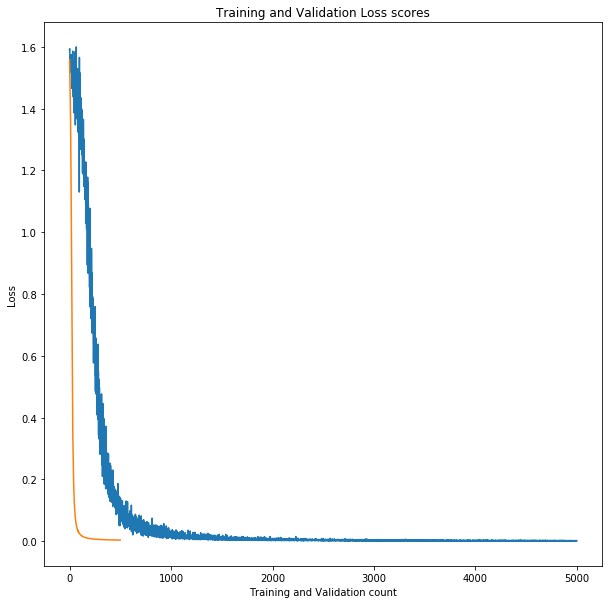

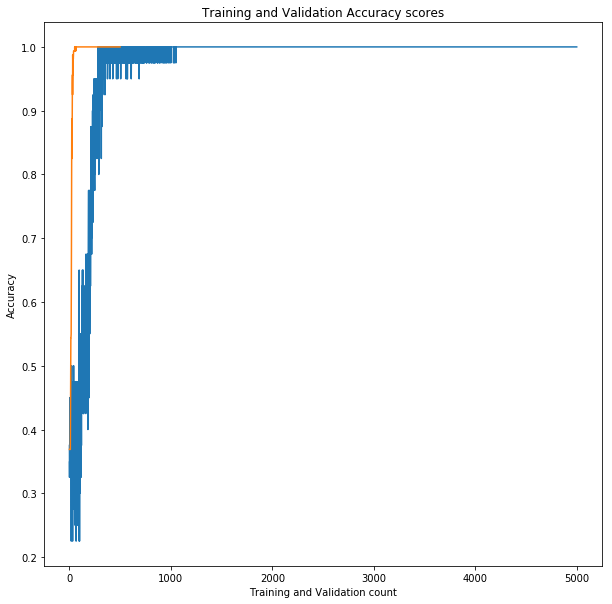

In [46]:
import matplotlib.pyplot as plt
# write your code in this cell to plot your results
file = open("plot_vals.p", 'rb')
plot_vals = pickle.load(file)
file.close

train_x = [x for x in range(plot_vals.train_no)]
val_x = [x for x in range(plot_vals.val_no)]

plt.figure(figsize=(10,10))
plt.plot(train_x, plot_vals.train_losses, label = "Training")
plt.plot(val_x, plot_vals.val_losses, label = "Validation")
plt.xlabel("Training and Validation count")
plt.ylabel("Loss")
plt.title("Training and Validation Loss scores")
plt.show()

plt.figure(figsize=(10,10))
plt.plot(train_x, plot_vals.train_accuracies, label = "Training")
plt.plot(val_x, plot_vals.val_accuracies, label = "Validation")
plt.xlabel("Training and Validation count")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy scores")
plt.show()



### Testing [7 pts]

You will test your final model with test dataset in this section. You should provide confusion matrix as deliverable. Report confusion matrix in your pdf file.

In [247]:
# write your code in this cell to test your best model with the test dataset
best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/model.pth"
model = torch.load(best_path)
testloader = torch.utils.data.DataLoader(GEDataset(dataset = test_dataset),batch_size = test_batch,shuffle = False, num_workers = 8)
c_matrix = [[0 for y in range(5)] for x in range(5)]

for batch_idx, (data, labels) in enumerate(testloader):
    y_pred = model.forward(data)
    soft_max = nn.LogSoftmax()
    y_pred = soft_max(y_pred)
    pred = torch.argmax(y_pred, dim = 1)
    for x in range(len(labels)):
        c_matrix[int(labels[x])][int(pred[x])] += 1
print(c_matrix)

[[93, 0, 0, 0, 0], [0, 42, 0, 0, 0], [0, 0, 24, 0, 0], [0, 0, 0, 42, 0], [0, 0, 0, 0, 40]]


/Users/usman/miniconda3/envs/HW3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


## Question 3 [53 pts]

In this question, you will train a neural networks to recognize house numbers from images. You will use the dataset at the following link: http://ufldl.stanford.edu/housenumbers/. You are actually asked to predict the number in the middle (i.e., for 173, predict 7). Images are cropped accordingly and correct labels are given in the dataset. You do not need to worry about other numbers that might still be visible in the image. You have to use <b>train_32x32.mat</b> and <b>test_32x32.mat</b> from <b>the CROPPED version (FORMAT2)</b>. All images in this dataset have the following dimensions: 32x32x3. You will solve this problem using two architectures: (1) Using a MLP and (2) Using a CNN.

### 3.1. Multi Layer Perceptron (MLP) [23 pts]

#### DataLoader [3 pts]

In this part, you will train an MLP. Here, you are supposed to flatten the image into a vector (also to grayscale). Note that the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset) as you did in Question 2. For this question, do not perform cross validation also do not use validation split. Note that training and test splits are given to you in the provided link. 

In [34]:
#http://ufldl.stanford.edu/housenumbers/
import scipy.io as sio
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
from skimage.color import rgb2gray
    
class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs): # you are free to change parameters
        self.data = kwargs.get("dataset")["data"]
        self.labels = kwargs.get("dataset")["labels"]
        
        # Transpose the image arrays
        self.data, self.labels = self.data.transpose((3,0,1,2)), self.labels[:,0]
        self.labels[self.labels == 10] = 0
        
        self.data = np.expand_dims(np.dot(self.data, [0.2990, 0.5870, 0.1140]), axis = 3).astype(np.float32)
        data_mean = np.mean(self.data, axis = 0)
        data_std = np.std(self.data, axis = 0)
        self.data = (self.data - data_mean) / data_std
        self.data = self.data.reshape(self.data.shape[0], 1024)
        
        self.data = torch.from_numpy(self.data)
        self.labels = torch.from_numpy(self.labels).long()
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
def get_dataset(root): #you are free to change parameters
    # TODO: 
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    train_data = sio.loadmat(root + 'train_32x32.mat').get("X") 
    train_labels = sio.loadmat(root + 'train_32x32.mat').get("y")
    test_data = sio.loadmat(root + 'test_32x32.mat').get("X")
    test_labels = sio.loadmat(root + 'test_32x32.mat').get("y")
    train_dataset = {"data": train_data, "labels": train_labels}
    test_dataset= {"data": test_data, "labels": test_labels}
    return train_dataset, test_dataset
get_dataset("./data/Q2/")

({'data': array([[[[ 33,  84,  19, ...,  92, 190, 216],
           [ 30,  76,  54, ...,  78, 188, 217],
           [ 38,  59, 110, ..., 101, 191, 212]],
  
          [[ 15,  86,  20, ...,  94, 205, 221],
           [ 23,  73,  52, ...,  82, 203, 222],
           [ 19,  66, 111, ..., 105, 206, 217]],
  
          [[ 15,  77,  25, ..., 114, 220, 226],
           [ 17,  78,  57, ..., 101, 218, 227],
           [ 19,  56, 116, ..., 125, 220, 221]],
  
          ...,
  
          [[ 72,  90,  65, ..., 200, 229, 200],
           [ 65,  78, 144, ..., 201, 231, 199],
           [ 56,  69, 223, ..., 203, 224, 191]],
  
          [[ 82,  88,  78, ..., 192, 229, 193],
           [ 77,  77, 148, ..., 193, 229, 188],
           [ 57,  67, 218, ..., 195, 224, 182]],
  
          [[ 89,  88,  98, ..., 190, 229, 197],
           [ 79,  78, 158, ..., 191, 228, 189],
           [ 59,  66, 220, ..., 193, 223, 186]]],
  
  
         [[[ 28,  85,  21, ...,  92, 183, 204],
           [ 39,  77,  53, ...,  7

#### Neural Network [4 pts]

Now implement your two hidden layered neural network. FCNet class will represent your neural network. First hidden layer will contain 256 neurons and second hidden layer will contain 256 neurons. You will decide the number of input and output neurons.  Use ReLU as your hidden activation functions. You need to pick a proper activation function for the output layer. 

In [35]:
import torch.nn as nn
class FCNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
        super(FCNet, self).__init__()
        self.hidden1_input = nn.Linear(kwargs.get("input_size"), kwargs.get("H1_size"))
        self.hidden1_output = nn.ReLU()
        self.hidden2_input = nn.Linear(kwargs.get("H1_size"), kwargs.get("H2_size"))
        self.hidden2_output = nn.ReLU()
        self.output = nn.Linear(kwargs.get("H2_size"), kwargs.get("output_size"))
     
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
        out = self.hidden1_input(X)
        out = self.hidden1_output(out)
        out = self.hidden2_input(out)
        out = self.hidden2_output(out)
        return self.output(out)
    

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select appropriate hyper-parameters' values. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. (HINT: note that your training time should not take many days.)

torch.Size([7000, 1024])
Epoch: [1][1/11]	Time 0.471 (0.471)	Data 0.2731 (0.2731)	Loss 2.2952 (2.2952)	Accu 0.1029 (0.1029)	
torch.Size([7000, 1024])
Epoch: [1][2/11]	Time 0.178 (0.325)	Data 0.0066 (0.1399)	Loss 2.2976 (2.2964)	Accu 0.0996 (0.1012)	
torch.Size([7000, 1024])
Epoch: [1][3/11]	Time 0.151 (0.267)	Data 0.0045 (0.0947)	Loss 2.2968 (2.2965)	Accu 0.1069 (0.1031)	
torch.Size([7000, 1024])
Epoch: [1][4/11]	Time 0.113 (0.228)	Data 0.0030 (0.0718)	Loss 2.2970 (2.2966)	Accu 0.1006 (0.1025)	
torch.Size([7000, 1024])
Epoch: [1][5/11]	Time 0.124 (0.207)	Data 0.0029 (0.0580)	Loss 2.2977 (2.2969)	Accu 0.0999 (0.1019)	
torch.Size([7000, 1024])
Epoch: [1][6/11]	Time 0.115 (0.192)	Data 0.0031 (0.0489)	Loss 2.2963 (2.2968)	Accu 0.0984 (0.1014)	
torch.Size([7000, 1024])
Epoch: [1][7/11]	Time 0.119 (0.181)	Data 0.0036 (0.0424)	Loss 2.2973 (2.2969)	Accu 0.0941 (0.1003)	
torch.Size([7000, 1024])
Epoch: [1][8/11]	Time 0.109 (0.172)	Data 0.0032 (0.0375)	Loss 2.2936 (2.2964)	Accu 0.1033 (0.1007)	


Time 0.034	Accu 0.1946	
torch.Size([7000, 1024])
Epoch: [7][1/11]	Time 0.776 (0.776)	Data 0.5308 (0.5308)	Loss 2.2530 (2.2530)	Accu 0.1813 (0.1813)	
torch.Size([7000, 1024])
Epoch: [7][2/11]	Time 0.157 (0.467)	Data 0.0041 (0.2674)	Loss 2.2488 (2.2509)	Accu 0.1857 (0.1835)	
torch.Size([7000, 1024])
Epoch: [7][3/11]	Time 0.156 (0.363)	Data 0.0036 (0.1795)	Loss 2.2509 (2.2509)	Accu 0.1916 (0.1862)	
torch.Size([7000, 1024])
Epoch: [7][4/11]	Time 0.188 (0.319)	Data 0.0037 (0.1355)	Loss 2.2508 (2.2509)	Accu 0.1916 (0.1875)	
torch.Size([7000, 1024])
Epoch: [7][5/11]	Time 0.175 (0.290)	Data 0.0035 (0.1091)	Loss 2.2506 (2.2508)	Accu 0.1864 (0.1873)	
torch.Size([7000, 1024])
Epoch: [7][6/11]	Time 0.178 (0.272)	Data 0.0053 (0.0918)	Loss 2.2484 (2.2504)	Accu 0.1916 (0.1880)	
torch.Size([7000, 1024])
Epoch: [7][7/11]	Time 0.166 (0.257)	Data 0.0037 (0.0792)	Loss 2.2458 (2.2497)	Accu 0.1841 (0.1875)	
torch.Size([7000, 1024])
Epoch: [7][8/11]	Time 0.145 (0.243)	Data 0.0035 (0.0698)	Loss 2.2520 (2.2500

Epoch: [12][11/11]	Time 0.083 (0.208)	Data 0.0028 (0.0539)	Loss 2.2418 (2.2342)	Accu 0.1821 (0.1887)	
Time 0.039	Accu 0.1964	
torch.Size([7000, 1024])
Epoch: [13][1/11]	Time 0.754 (0.754)	Data 0.5099 (0.5099)	Loss 2.2329 (2.2329)	Accu 0.1916 (0.1916)	
torch.Size([7000, 1024])
Epoch: [13][2/11]	Time 0.143 (0.448)	Data 0.0053 (0.2576)	Loss 2.2335 (2.2332)	Accu 0.1881 (0.1899)	
torch.Size([7000, 1024])
Epoch: [13][3/11]	Time 0.133 (0.343)	Data 0.0052 (0.1734)	Loss 2.2332 (2.2332)	Accu 0.1914 (0.1904)	
torch.Size([7000, 1024])
Epoch: [13][4/11]	Time 0.134 (0.291)	Data 0.0057 (0.1315)	Loss 2.2293 (2.2322)	Accu 0.1930 (0.1910)	
torch.Size([7000, 1024])
Epoch: [13][5/11]	Time 0.130 (0.259)	Data 0.0044 (0.1061)	Loss 2.2303 (2.2318)	Accu 0.1883 (0.1905)	
torch.Size([7000, 1024])
Epoch: [13][6/11]	Time 0.131 (0.237)	Data 0.0043 (0.0891)	Loss 2.2235 (2.2304)	Accu 0.1957 (0.1914)	
torch.Size([7000, 1024])
Epoch: [13][7/11]	Time 0.133 (0.222)	Data 0.0038 (0.0769)	Loss 2.2321 (2.2307)	Accu 0.1869 (0

Epoch: [18][9/11]	Time 0.132 (0.202)	Data 0.0038 (0.0600)	Loss 2.2209 (2.2224)	Accu 0.1931 (0.1909)	
torch.Size([7000, 1024])
Epoch: [18][10/11]	Time 0.132 (0.195)	Data 0.0036 (0.0544)	Loss 2.2232 (2.2225)	Accu 0.1920 (0.1910)	
torch.Size([3257, 1024])
Epoch: [18][11/11]	Time 0.090 (0.185)	Data 0.0027 (0.0497)	Loss 2.2127 (2.2216)	Accu 0.1962 (0.1915)	
Time 0.039	Accu 0.1994	
torch.Size([7000, 1024])
Epoch: [19][1/11]	Time 0.755 (0.755)	Data 0.5188 (0.5188)	Loss 2.2167 (2.2167)	Accu 0.1933 (0.1933)	
torch.Size([7000, 1024])
Epoch: [19][2/11]	Time 0.133 (0.444)	Data 0.0039 (0.2613)	Loss 2.2126 (2.2146)	Accu 0.1984 (0.1959)	
torch.Size([7000, 1024])
Epoch: [19][3/11]	Time 0.133 (0.340)	Data 0.0036 (0.1754)	Loss 2.2262 (2.2185)	Accu 0.1851 (0.1923)	
torch.Size([7000, 1024])
Epoch: [19][4/11]	Time 0.137 (0.289)	Data 0.0051 (0.1328)	Loss 2.2235 (2.2197)	Accu 0.1840 (0.1902)	
torch.Size([7000, 1024])
Epoch: [19][5/11]	Time 0.132 (0.258)	Data 0.0046 (0.1072)	Loss 2.2196 (2.2197)	Accu 0.1914 (

Epoch: [24][7/11]	Time 0.152 (0.244)	Data 0.0036 (0.0848)	Loss 2.2153 (2.2120)	Accu 0.1849 (0.1920)	
torch.Size([7000, 1024])
Epoch: [24][8/11]	Time 0.154 (0.233)	Data 0.0049 (0.0748)	Loss 2.1992 (2.2104)	Accu 0.1987 (0.1928)	
torch.Size([7000, 1024])
Epoch: [24][9/11]	Time 0.133 (0.222)	Data 0.0047 (0.0670)	Loss 2.2079 (2.2101)	Accu 0.1981 (0.1934)	
torch.Size([7000, 1024])
Epoch: [24][10/11]	Time 0.145 (0.214)	Data 0.0032 (0.0606)	Loss 2.2118 (2.2103)	Accu 0.1950 (0.1936)	
torch.Size([3257, 1024])
Epoch: [24][11/11]	Time 0.083 (0.202)	Data 0.0034 (0.0554)	Loss 2.2136 (2.2106)	Accu 0.1842 (0.1927)	
Time 0.040	Accu 0.2034	
torch.Size([7000, 1024])
Epoch: [25][1/11]	Time 0.772 (0.772)	Data 0.5228 (0.5228)	Loss 2.2092 (2.2092)	Accu 0.1924 (0.1924)	
torch.Size([7000, 1024])
Epoch: [25][2/11]	Time 0.135 (0.454)	Data 0.0051 (0.2640)	Loss 2.2114 (2.2103)	Accu 0.1880 (0.1902)	
torch.Size([7000, 1024])
Epoch: [25][3/11]	Time 0.141 (0.349)	Data 0.0041 (0.1774)	Loss 2.2100 (2.2102)	Accu 0.1940 (

Epoch: [30][5/11]	Time 0.150 (0.293)	Data 0.0049 (0.1202)	Loss 2.1967 (2.1976)	Accu 0.1980 (0.1961)	
torch.Size([7000, 1024])
Epoch: [30][6/11]	Time 0.150 (0.269)	Data 0.0058 (0.1011)	Loss 2.1945 (2.1971)	Accu 0.1999 (0.1967)	
torch.Size([7000, 1024])
Epoch: [30][7/11]	Time 0.152 (0.252)	Data 0.0041 (0.0873)	Loss 2.1984 (2.1973)	Accu 0.1979 (0.1969)	
torch.Size([7000, 1024])
Epoch: [30][8/11]	Time 0.145 (0.239)	Data 0.0032 (0.0768)	Loss 2.1993 (2.1975)	Accu 0.1926 (0.1963)	
torch.Size([7000, 1024])
Epoch: [30][9/11]	Time 0.150 (0.229)	Data 0.0042 (0.0687)	Loss 2.1947 (2.1972)	Accu 0.1943 (0.1961)	
torch.Size([7000, 1024])
Epoch: [30][10/11]	Time 0.151 (0.221)	Data 0.0043 (0.0623)	Loss 2.1951 (2.1970)	Accu 0.1939 (0.1959)	
torch.Size([3257, 1024])
Epoch: [30][11/11]	Time 0.088 (0.209)	Data 0.0038 (0.0569)	Loss 2.2057 (2.1978)	Accu 0.1827 (0.1947)	
Time 0.044	Accu 0.2069	
torch.Size([7000, 1024])
Epoch: [31][1/11]	Time 0.852 (0.852)	Data 0.5628 (0.5628)	Loss 2.1984 (2.1984)	Accu 0.1930 (

Epoch: [36][3/11]	Time 0.175 (0.413)	Data 0.0082 (0.2093)	Loss 2.1800 (2.1866)	Accu 0.1999 (0.1979)	
torch.Size([7000, 1024])
Epoch: [36][4/11]	Time 0.158 (0.349)	Data 0.0052 (0.1583)	Loss 2.1815 (2.1853)	Accu 0.1996 (0.1983)	
torch.Size([7000, 1024])
Epoch: [36][5/11]	Time 0.163 (0.312)	Data 0.0064 (0.1279)	Loss 2.1796 (2.1842)	Accu 0.2014 (0.1989)	
torch.Size([7000, 1024])
Epoch: [36][6/11]	Time 0.163 (0.287)	Data 0.0055 (0.1075)	Loss 2.1889 (2.1850)	Accu 0.1933 (0.1980)	
torch.Size([7000, 1024])
Epoch: [36][7/11]	Time 0.185 (0.273)	Data 0.0051 (0.0929)	Loss 2.1762 (2.1837)	Accu 0.2013 (0.1984)	
torch.Size([7000, 1024])
Epoch: [36][8/11]	Time 0.161 (0.259)	Data 0.0040 (0.0818)	Loss 2.1820 (2.1835)	Accu 0.1967 (0.1982)	
torch.Size([7000, 1024])
Epoch: [36][9/11]	Time 0.160 (0.248)	Data 0.0047 (0.0732)	Loss 2.1747 (2.1825)	Accu 0.1993 (0.1983)	
torch.Size([7000, 1024])
Epoch: [36][10/11]	Time 0.156 (0.238)	Data 0.0051 (0.0664)	Loss 2.1770 (2.1820)	Accu 0.2013 (0.1986)	
torch.Size([3257

torch.Size([7000, 1024])
Epoch: [42][1/11]	Time 0.903 (0.903)	Data 0.6154 (0.6154)	Loss 2.1724 (2.1724)	Accu 0.2006 (0.2006)	
torch.Size([7000, 1024])
Epoch: [42][2/11]	Time 0.162 (0.533)	Data 0.0053 (0.3104)	Loss 2.1728 (2.1726)	Accu 0.1979 (0.1992)	
torch.Size([7000, 1024])
Epoch: [42][3/11]	Time 0.166 (0.410)	Data 0.0060 (0.2089)	Loss 2.1667 (2.1706)	Accu 0.2004 (0.1996)	
torch.Size([7000, 1024])
Epoch: [42][4/11]	Time 0.163 (0.348)	Data 0.0061 (0.1582)	Loss 2.1651 (2.1693)	Accu 0.1993 (0.1995)	
torch.Size([7000, 1024])
Epoch: [42][5/11]	Time 0.180 (0.315)	Data 0.0047 (0.1275)	Loss 2.1611 (2.1676)	Accu 0.2087 (0.2014)	
torch.Size([7000, 1024])
Epoch: [42][6/11]	Time 0.167 (0.290)	Data 0.0054 (0.1072)	Loss 2.1588 (2.1661)	Accu 0.2041 (0.2018)	
torch.Size([7000, 1024])
Epoch: [42][7/11]	Time 0.162 (0.272)	Data 0.0042 (0.0925)	Loss 2.1616 (2.1655)	Accu 0.2053 (0.2023)	
torch.Size([7000, 1024])
Epoch: [42][8/11]	Time 0.161 (0.258)	Data 0.0039 (0.0814)	Loss 2.1588 (2.1647)	Accu 0.2073 (0

Epoch: [47][10/11]	Time 0.270 (0.362)	Data 0.0062 (0.0928)	Loss 2.1527 (2.1447)	Accu 0.2016 (0.2093)	
torch.Size([3257, 1024])
Epoch: [47][11/11]	Time 0.152 (0.343)	Data 0.0068 (0.0850)	Loss 2.1452 (2.1448)	Accu 0.2088 (0.2092)	
Time 0.073	Accu 0.2220	
torch.Size([7000, 1024])
Epoch: [48][1/11]	Time 1.156 (1.156)	Data 0.7980 (0.7980)	Loss 2.1426 (2.1426)	Accu 0.2094 (0.2094)	
torch.Size([7000, 1024])
Epoch: [48][2/11]	Time 0.207 (0.681)	Data 0.0068 (0.4024)	Loss 2.1418 (2.1422)	Accu 0.2133 (0.2114)	
torch.Size([7000, 1024])
Epoch: [48][3/11]	Time 0.187 (0.516)	Data 0.0065 (0.2704)	Loss 2.1300 (2.1382)	Accu 0.2164 (0.2130)	
torch.Size([7000, 1024])
Epoch: [48][4/11]	Time 0.236 (0.446)	Data 0.0061 (0.2044)	Loss 2.1403 (2.1387)	Accu 0.2117 (0.2127)	
torch.Size([7000, 1024])
Epoch: [48][5/11]	Time 0.254 (0.408)	Data 0.0041 (0.1643)	Loss 2.1451 (2.1400)	Accu 0.2057 (0.2113)	
torch.Size([7000, 1024])
Epoch: [48][6/11]	Time 0.249 (0.381)	Data 0.0091 (0.1384)	Loss 2.1417 (2.1403)	Accu 0.2069 (

Epoch: [53][9/11]	Time 0.203 (0.257)	Data 0.0048 (0.0763)	Loss 2.1169 (2.1182)	Accu 0.2194 (0.2196)	
torch.Size([7000, 1024])
Epoch: [53][10/11]	Time 0.214 (0.253)	Data 0.0058 (0.0692)	Loss 2.1162 (2.1180)	Accu 0.2229 (0.2199)	
torch.Size([3257, 1024])
Epoch: [53][11/11]	Time 0.151 (0.244)	Data 0.0041 (0.0633)	Loss 2.1307 (2.1192)	Accu 0.2180 (0.2197)	
Time 0.064	Accu 0.2342	
torch.Size([7000, 1024])
Epoch: [54][1/11]	Time 1.104 (1.104)	Data 0.7743 (0.7743)	Loss 2.1167 (2.1167)	Accu 0.2200 (0.2200)	
torch.Size([7000, 1024])
Epoch: [54][2/11]	Time 0.205 (0.654)	Data 0.0060 (0.3902)	Loss 2.1111 (2.1139)	Accu 0.2260 (0.2230)	
torch.Size([7000, 1024])
Epoch: [54][3/11]	Time 0.168 (0.492)	Data 0.0066 (0.2623)	Loss 2.1188 (2.1155)	Accu 0.2166 (0.2209)	
torch.Size([7000, 1024])
Epoch: [54][4/11]	Time 0.170 (0.411)	Data 0.0042 (0.1978)	Loss 2.1198 (2.1166)	Accu 0.2210 (0.2209)	
torch.Size([7000, 1024])
Epoch: [54][5/11]	Time 0.179 (0.365)	Data 0.0052 (0.1593)	Loss 2.1108 (2.1154)	Accu 0.2246 (

Epoch: [59][7/11]	Time 0.165 (0.277)	Data 0.0038 (0.0977)	Loss 2.0923 (2.0887)	Accu 0.2359 (0.2356)	
torch.Size([7000, 1024])
Epoch: [59][8/11]	Time 0.159 (0.262)	Data 0.0047 (0.0861)	Loss 2.0870 (2.0885)	Accu 0.2306 (0.2350)	
torch.Size([7000, 1024])
Epoch: [59][9/11]	Time 0.164 (0.251)	Data 0.0050 (0.0771)	Loss 2.0825 (2.0878)	Accu 0.2406 (0.2356)	
torch.Size([7000, 1024])
Epoch: [59][10/11]	Time 0.159 (0.242)	Data 0.0043 (0.0698)	Loss 2.0808 (2.0871)	Accu 0.2394 (0.2360)	
torch.Size([3257, 1024])
Epoch: [59][11/11]	Time 0.096 (0.229)	Data 0.0041 (0.0639)	Loss 2.1003 (2.0883)	Accu 0.2217 (0.2347)	
Time 0.050	Accu 0.2531	
torch.Size([7000, 1024])
Epoch: [60][1/11]	Time 0.952 (0.952)	Data 0.6360 (0.6360)	Loss 2.0820 (2.0820)	Accu 0.2401 (0.2401)	
torch.Size([7000, 1024])
Epoch: [60][2/11]	Time 0.183 (0.567)	Data 0.0066 (0.3213)	Loss 2.0748 (2.0784)	Accu 0.2391 (0.2396)	
torch.Size([7000, 1024])
Epoch: [60][3/11]	Time 0.190 (0.442)	Data 0.0062 (0.2163)	Loss 2.0772 (2.0780)	Accu 0.2474 (

Epoch: [65][5/11]	Time 0.176 (0.340)	Data 0.0056 (0.1419)	Loss 2.0569 (2.0559)	Accu 0.2539 (0.2535)	
torch.Size([7000, 1024])
Epoch: [65][6/11]	Time 0.175 (0.313)	Data 0.0045 (0.1190)	Loss 2.0552 (2.0558)	Accu 0.2540 (0.2535)	
torch.Size([7000, 1024])
Epoch: [65][7/11]	Time 0.175 (0.293)	Data 0.0044 (0.1026)	Loss 2.0456 (2.0543)	Accu 0.2619 (0.2547)	
torch.Size([7000, 1024])
Epoch: [65][8/11]	Time 0.173 (0.278)	Data 0.0045 (0.0903)	Loss 2.0497 (2.0538)	Accu 0.2594 (0.2553)	
torch.Size([7000, 1024])
Epoch: [65][9/11]	Time 0.178 (0.267)	Data 0.0051 (0.0809)	Loss 2.0412 (2.0524)	Accu 0.2634 (0.2562)	
torch.Size([7000, 1024])
Epoch: [65][10/11]	Time 0.172 (0.257)	Data 0.0064 (0.0734)	Loss 2.0484 (2.0520)	Accu 0.2633 (0.2569)	
torch.Size([3257, 1024])
Epoch: [65][11/11]	Time 0.106 (0.244)	Data 0.0045 (0.0672)	Loss 2.0512 (2.0519)	Accu 0.2631 (0.2575)	
Time 0.054	Accu 0.2785	
torch.Size([7000, 1024])
Epoch: [66][1/11]	Time 0.954 (0.954)	Data 0.6602 (0.6602)	Loss 2.0577 (2.0577)	Accu 0.2559 (

Epoch: [71][3/11]	Time 0.181 (0.453)	Data 0.0059 (0.2294)	Loss 2.0051 (2.0109)	Accu 0.2856 (0.2815)	
torch.Size([7000, 1024])
Epoch: [71][4/11]	Time 0.181 (0.385)	Data 0.0055 (0.1734)	Loss 2.0132 (2.0115)	Accu 0.2753 (0.2799)	
torch.Size([7000, 1024])
Epoch: [71][5/11]	Time 0.173 (0.343)	Data 0.0058 (0.1399)	Loss 2.0000 (2.0092)	Accu 0.2927 (0.2825)	
torch.Size([7000, 1024])
Epoch: [71][6/11]	Time 0.163 (0.313)	Data 0.0045 (0.1174)	Loss 2.0135 (2.0099)	Accu 0.2860 (0.2831)	
torch.Size([7000, 1024])
Epoch: [71][7/11]	Time 0.172 (0.293)	Data 0.0053 (0.1013)	Loss 2.0151 (2.0106)	Accu 0.2777 (0.2823)	
torch.Size([7000, 1024])
Epoch: [71][8/11]	Time 0.166 (0.277)	Data 0.0042 (0.0892)	Loss 2.0160 (2.0113)	Accu 0.2769 (0.2816)	
torch.Size([7000, 1024])
Epoch: [71][9/11]	Time 0.185 (0.267)	Data 0.0051 (0.0798)	Loss 2.0113 (2.0113)	Accu 0.2837 (0.2819)	
torch.Size([7000, 1024])
Epoch: [71][10/11]	Time 0.171 (0.257)	Data 0.0056 (0.0724)	Loss 2.0070 (2.0109)	Accu 0.2887 (0.2825)	
torch.Size([3257

torch.Size([7000, 1024])
Epoch: [77][1/11]	Time 0.972 (0.972)	Data 0.6748 (0.6748)	Loss 1.9578 (1.9578)	Accu 0.3179 (0.3179)	
torch.Size([7000, 1024])
Epoch: [77][2/11]	Time 0.167 (0.570)	Data 0.0062 (0.3405)	Loss 1.9693 (1.9636)	Accu 0.3057 (0.3118)	
torch.Size([7000, 1024])
Epoch: [77][3/11]	Time 0.168 (0.436)	Data 0.0056 (0.2289)	Loss 1.9652 (1.9641)	Accu 0.3070 (0.3102)	
torch.Size([7000, 1024])
Epoch: [77][4/11]	Time 0.167 (0.368)	Data 0.0065 (0.1733)	Loss 1.9556 (1.9620)	Accu 0.3144 (0.3113)	
torch.Size([7000, 1024])
Epoch: [77][5/11]	Time 0.172 (0.329)	Data 0.0055 (0.1397)	Loss 1.9694 (1.9635)	Accu 0.3106 (0.3111)	
torch.Size([7000, 1024])
Epoch: [77][6/11]	Time 0.166 (0.302)	Data 0.0050 (0.1173)	Loss 1.9620 (1.9632)	Accu 0.3174 (0.3122)	
torch.Size([7000, 1024])
Epoch: [77][7/11]	Time 0.166 (0.283)	Data 0.0035 (0.1010)	Loss 1.9616 (1.9630)	Accu 0.3091 (0.3117)	
torch.Size([7000, 1024])
Epoch: [77][8/11]	Time 0.164 (0.268)	Data 0.0042 (0.0889)	Loss 1.9658 (1.9633)	Accu 0.3109 (0

Epoch: [82][11/11]	Time 0.102 (0.237)	Data 0.0046 (0.0649)	Loss 1.9057 (1.9209)	Accu 0.3380 (0.3352)	
Time 0.053	Accu 0.3624	
torch.Size([7000, 1024])
Epoch: [83][1/11]	Time 1.001 (1.001)	Data 0.6978 (0.6978)	Loss 1.9057 (1.9057)	Accu 0.3459 (0.3459)	
torch.Size([7000, 1024])
Epoch: [83][2/11]	Time 0.182 (0.591)	Data 0.0086 (0.3532)	Loss 1.9162 (1.9110)	Accu 0.3373 (0.3416)	
torch.Size([7000, 1024])
Epoch: [83][3/11]	Time 0.191 (0.458)	Data 0.0062 (0.2375)	Loss 1.9274 (1.9165)	Accu 0.3317 (0.3383)	
torch.Size([7000, 1024])
Epoch: [83][4/11]	Time 0.176 (0.388)	Data 0.0048 (0.1793)	Loss 1.8898 (1.9098)	Accu 0.3560 (0.3427)	
torch.Size([7000, 1024])
Epoch: [83][5/11]	Time 0.176 (0.345)	Data 0.0045 (0.1444)	Loss 1.9199 (1.9118)	Accu 0.3376 (0.3417)	
torch.Size([7000, 1024])
Epoch: [83][6/11]	Time 0.172 (0.316)	Data 0.0056 (0.1212)	Loss 1.9138 (1.9121)	Accu 0.3391 (0.3413)	
torch.Size([7000, 1024])
Epoch: [83][7/11]	Time 0.176 (0.296)	Data 0.0046 (0.1046)	Loss 1.9194 (1.9132)	Accu 0.3289 (0

Epoch: [88][9/11]	Time 0.218 (0.308)	Data 0.0068 (0.0902)	Loss 1.8698 (1.8659)	Accu 0.3603 (0.3638)	
torch.Size([7000, 1024])
Epoch: [88][10/11]	Time 0.225 (0.299)	Data 0.0066 (0.0818)	Loss 1.8749 (1.8668)	Accu 0.3533 (0.3628)	
torch.Size([3257, 1024])
Epoch: [88][11/11]	Time 0.122 (0.283)	Data 0.0057 (0.0749)	Loss 1.8667 (1.8668)	Accu 0.3697 (0.3634)	
Time 0.063	Accu 0.3893	
torch.Size([7000, 1024])
Epoch: [89][1/11]	Time 1.156 (1.156)	Data 0.7922 (0.7922)	Loss 1.8581 (1.8581)	Accu 0.3666 (0.3666)	
torch.Size([7000, 1024])
Epoch: [89][2/11]	Time 0.224 (0.690)	Data 0.0068 (0.3995)	Loss 1.8627 (1.8604)	Accu 0.3593 (0.3629)	
torch.Size([7000, 1024])
Epoch: [89][3/11]	Time 0.229 (0.537)	Data 0.0091 (0.2694)	Loss 1.8603 (1.8604)	Accu 0.3756 (0.3671)	
torch.Size([7000, 1024])
Epoch: [89][4/11]	Time 0.212 (0.455)	Data 0.0099 (0.2045)	Loss 1.8648 (1.8615)	Accu 0.3611 (0.3656)	
torch.Size([7000, 1024])
Epoch: [89][5/11]	Time 0.207 (0.406)	Data 0.0069 (0.1650)	Loss 1.8504 (1.8593)	Accu 0.3614 (

Epoch: [94][7/11]	Time 0.219 (0.317)	Data 0.0075 (0.1054)	Loss 1.8077 (1.8077)	Accu 0.3910 (0.3903)	
torch.Size([7000, 1024])
Epoch: [94][8/11]	Time 0.206 (0.303)	Data 0.0065 (0.0930)	Loss 1.8091 (1.8079)	Accu 0.3906 (0.3904)	
torch.Size([7000, 1024])
Epoch: [94][9/11]	Time 0.212 (0.293)	Data 0.0084 (0.0836)	Loss 1.8156 (1.8088)	Accu 0.3890 (0.3902)	
torch.Size([7000, 1024])
Epoch: [94][10/11]	Time 0.199 (0.283)	Data 0.0080 (0.0761)	Loss 1.8261 (1.8105)	Accu 0.3793 (0.3891)	
torch.Size([3257, 1024])
Epoch: [94][11/11]	Time 0.125 (0.269)	Data 0.0051 (0.0696)	Loss 1.7943 (1.8090)	Accu 0.3942 (0.3896)	
Time 0.068	Accu 0.4107	
torch.Size([7000, 1024])
Epoch: [95][1/11]	Time 1.162 (1.162)	Data 0.7942 (0.7942)	Loss 1.7896 (1.7896)	Accu 0.4007 (0.4007)	
torch.Size([7000, 1024])
Epoch: [95][2/11]	Time 0.241 (0.701)	Data 0.0084 (0.4013)	Loss 1.7987 (1.7942)	Accu 0.3936 (0.3971)	
torch.Size([7000, 1024])
Epoch: [95][3/11]	Time 0.225 (0.542)	Data 0.0083 (0.2703)	Loss 1.8088 (1.7990)	Accu 0.3929 (

Epoch: [100][5/11]	Time 0.178 (0.343)	Data 0.0073 (0.1435)	Loss 1.7594 (1.7581)	Accu 0.4106 (0.4137)	
torch.Size([7000, 1024])
Epoch: [100][6/11]	Time 0.172 (0.314)	Data 0.0045 (0.1204)	Loss 1.7607 (1.7585)	Accu 0.4033 (0.4120)	
torch.Size([7000, 1024])
Epoch: [100][7/11]	Time 0.175 (0.294)	Data 0.0048 (0.1038)	Loss 1.7480 (1.7570)	Accu 0.4190 (0.4130)	
torch.Size([7000, 1024])
Epoch: [100][8/11]	Time 0.170 (0.279)	Data 0.0042 (0.0914)	Loss 1.7444 (1.7554)	Accu 0.4254 (0.4145)	
torch.Size([7000, 1024])
Epoch: [100][9/11]	Time 0.177 (0.267)	Data 0.0053 (0.0818)	Loss 1.7433 (1.7541)	Accu 0.4184 (0.4150)	
torch.Size([7000, 1024])
Epoch: [100][10/11]	Time 0.178 (0.259)	Data 0.0041 (0.0741)	Loss 1.7451 (1.7532)	Accu 0.4174 (0.4152)	
torch.Size([3257, 1024])
Epoch: [100][11/11]	Time 0.105 (0.245)	Data 0.0045 (0.0677)	Loss 1.7432 (1.7523)	Accu 0.4265 (0.4162)	
Time 0.059	Accu 0.4314	
torch.Size([7000, 1024])
Epoch: [101][1/11]	Time 0.962 (0.962)	Data 0.6619 (0.6619)	Loss 1.7558 (1.7558)	Accu 

Epoch: [106][3/11]	Time 0.191 (0.519)	Data 0.0056 (0.2762)	Loss 1.7070 (1.6981)	Accu 0.4376 (0.4375)	
torch.Size([7000, 1024])
Epoch: [106][4/11]	Time 0.175 (0.433)	Data 0.0074 (0.2090)	Loss 1.6971 (1.6979)	Accu 0.4367 (0.4373)	
torch.Size([7000, 1024])
Epoch: [106][5/11]	Time 0.176 (0.382)	Data 0.0052 (0.1682)	Loss 1.7112 (1.7005)	Accu 0.4273 (0.4353)	
torch.Size([7000, 1024])
Epoch: [106][6/11]	Time 0.176 (0.347)	Data 0.0051 (0.1410)	Loss 1.7128 (1.7026)	Accu 0.4336 (0.4350)	
torch.Size([7000, 1024])
Epoch: [106][7/11]	Time 0.199 (0.326)	Data 0.0041 (0.1215)	Loss 1.6974 (1.7018)	Accu 0.4396 (0.4357)	
torch.Size([7000, 1024])
Epoch: [106][8/11]	Time 0.179 (0.308)	Data 0.0062 (0.1071)	Loss 1.6826 (1.6994)	Accu 0.4454 (0.4369)	
torch.Size([7000, 1024])
Epoch: [106][9/11]	Time 0.183 (0.294)	Data 0.0054 (0.0958)	Loss 1.6909 (1.6985)	Accu 0.4461 (0.4379)	
torch.Size([7000, 1024])
Epoch: [106][10/11]	Time 0.171 (0.282)	Data 0.0049 (0.0867)	Loss 1.6962 (1.6983)	Accu 0.4401 (0.4381)	
torch.Si

Time 0.059	Accu 0.4668	
torch.Size([7000, 1024])
Epoch: [112][1/11]	Time 1.013 (1.013)	Data 0.6976 (0.6976)	Loss 1.6435 (1.6435)	Accu 0.4647 (0.4647)	
torch.Size([7000, 1024])
Epoch: [112][2/11]	Time 0.172 (0.593)	Data 0.0061 (0.3519)	Loss 1.6423 (1.6429)	Accu 0.4671 (0.4659)	
torch.Size([7000, 1024])
Epoch: [112][3/11]	Time 0.181 (0.455)	Data 0.0068 (0.2368)	Loss 1.6322 (1.6393)	Accu 0.4680 (0.4666)	
torch.Size([7000, 1024])
Epoch: [112][4/11]	Time 0.173 (0.385)	Data 0.0066 (0.1793)	Loss 1.6423 (1.6401)	Accu 0.4640 (0.4660)	
torch.Size([7000, 1024])
Epoch: [112][5/11]	Time 0.177 (0.343)	Data 0.0076 (0.1449)	Loss 1.6496 (1.6420)	Accu 0.4589 (0.4645)	
torch.Size([7000, 1024])
Epoch: [112][6/11]	Time 0.174 (0.315)	Data 0.0055 (0.1217)	Loss 1.6454 (1.6425)	Accu 0.4613 (0.4640)	
torch.Size([7000, 1024])
Epoch: [112][7/11]	Time 0.180 (0.296)	Data 0.0035 (0.1048)	Loss 1.6390 (1.6420)	Accu 0.4651 (0.4642)	
torch.Size([7000, 1024])
Epoch: [112][8/11]	Time 0.172 (0.280)	Data 0.0045 (0.0923)	Los

Epoch: [117][11/11]	Time 0.117 (0.245)	Data 0.0056 (0.0679)	Loss 1.6202 (1.6042)	Accu 0.4704 (0.4805)	
Time 0.059	Accu 0.4852	
torch.Size([7000, 1024])
Epoch: [118][1/11]	Time 1.013 (1.013)	Data 0.6900 (0.6900)	Loss 1.5942 (1.5942)	Accu 0.4846 (0.4846)	
torch.Size([7000, 1024])
Epoch: [118][2/11]	Time 0.175 (0.594)	Data 0.0047 (0.3473)	Loss 1.5929 (1.5935)	Accu 0.4791 (0.4819)	
torch.Size([7000, 1024])
Epoch: [118][3/11]	Time 0.194 (0.461)	Data 0.0061 (0.2336)	Loss 1.5902 (1.5924)	Accu 0.4814 (0.4817)	
torch.Size([7000, 1024])
Epoch: [118][4/11]	Time 0.205 (0.397)	Data 0.0076 (0.1771)	Loss 1.6151 (1.5981)	Accu 0.4796 (0.4812)	
torch.Size([7000, 1024])
Epoch: [118][5/11]	Time 0.176 (0.353)	Data 0.0056 (0.1428)	Loss 1.6023 (1.5990)	Accu 0.4779 (0.4805)	
torch.Size([7000, 1024])
Epoch: [118][6/11]	Time 0.173 (0.323)	Data 0.0047 (0.1198)	Loss 1.5881 (1.5971)	Accu 0.4879 (0.4817)	
torch.Size([7000, 1024])
Epoch: [118][7/11]	Time 0.172 (0.301)	Data 0.0048 (0.1034)	Loss 1.5904 (1.5962)	Accu 0

Epoch: [123][10/11]	Time 0.184 (0.276)	Data 0.0059 (0.0794)	Loss 1.5497 (1.5563)	Accu 0.5049 (0.5031)	
torch.Size([3257, 1024])
Epoch: [123][11/11]	Time 0.107 (0.261)	Data 0.0048 (0.0726)	Loss 1.5655 (1.5571)	Accu 0.4989 (0.5027)	
Time 0.063	Accu 0.5037	
torch.Size([7000, 1024])
Epoch: [124][1/11]	Time 1.031 (1.031)	Data 0.6953 (0.6953)	Loss 1.5436 (1.5436)	Accu 0.5154 (0.5154)	
torch.Size([7000, 1024])
Epoch: [124][2/11]	Time 0.179 (0.605)	Data 0.0072 (0.3513)	Loss 1.5348 (1.5392)	Accu 0.5101 (0.5128)	
torch.Size([7000, 1024])
Epoch: [124][3/11]	Time 0.178 (0.463)	Data 0.0054 (0.2360)	Loss 1.5436 (1.5407)	Accu 0.5043 (0.5100)	
torch.Size([7000, 1024])
Epoch: [124][4/11]	Time 0.185 (0.393)	Data 0.0065 (0.1786)	Loss 1.5666 (1.5472)	Accu 0.4990 (0.5072)	
torch.Size([7000, 1024])
Epoch: [124][5/11]	Time 0.180 (0.350)	Data 0.0056 (0.1440)	Loss 1.5581 (1.5494)	Accu 0.5013 (0.5060)	
torch.Size([7000, 1024])
Epoch: [124][6/11]	Time 0.169 (0.320)	Data 0.0046 (0.1208)	Loss 1.5420 (1.5481)	Accu 

Epoch: [129][9/11]	Time 0.176 (0.267)	Data 0.0062 (0.0797)	Loss 1.5282 (1.5122)	Accu 0.5167 (0.5235)	
torch.Size([7000, 1024])
Epoch: [129][10/11]	Time 0.171 (0.258)	Data 0.0054 (0.0723)	Loss 1.5213 (1.5131)	Accu 0.5199 (0.5231)	
torch.Size([3257, 1024])
Epoch: [129][11/11]	Time 0.108 (0.244)	Data 0.0045 (0.0661)	Loss 1.5152 (1.5133)	Accu 0.5299 (0.5237)	
Time 0.059	Accu 0.5208	
torch.Size([7000, 1024])
Epoch: [130][1/11]	Time 1.017 (1.017)	Data 0.6851 (0.6851)	Loss 1.5052 (1.5052)	Accu 0.5180 (0.5180)	
torch.Size([7000, 1024])
Epoch: [130][2/11]	Time 0.178 (0.598)	Data 0.0084 (0.3468)	Loss 1.5157 (1.5104)	Accu 0.5216 (0.5198)	
torch.Size([7000, 1024])
Epoch: [130][3/11]	Time 0.176 (0.457)	Data 0.0054 (0.2330)	Loss 1.5034 (1.5081)	Accu 0.5340 (0.5245)	
torch.Size([7000, 1024])
Epoch: [130][4/11]	Time 0.177 (0.387)	Data 0.0059 (0.1762)	Loss 1.4963 (1.5052)	Accu 0.5334 (0.5268)	
torch.Size([7000, 1024])
Epoch: [130][5/11]	Time 0.178 (0.345)	Data 0.0048 (0.1419)	Loss 1.5208 (1.5083)	Accu 

Epoch: [135][7/11]	Time 0.210 (0.312)	Data 0.0061 (0.1031)	Loss 1.4670 (1.4697)	Accu 0.5436 (0.5442)	
torch.Size([7000, 1024])
Epoch: [135][8/11]	Time 0.222 (0.300)	Data 0.0066 (0.0911)	Loss 1.4560 (1.4680)	Accu 0.5509 (0.5450)	
torch.Size([7000, 1024])
Epoch: [135][9/11]	Time 0.240 (0.294)	Data 0.0076 (0.0818)	Loss 1.4906 (1.4705)	Accu 0.5290 (0.5433)	
torch.Size([7000, 1024])
Epoch: [135][10/11]	Time 0.185 (0.283)	Data 0.0071 (0.0743)	Loss 1.4894 (1.4724)	Accu 0.5353 (0.5425)	
torch.Size([3257, 1024])
Epoch: [135][11/11]	Time 0.106 (0.267)	Data 0.0044 (0.0680)	Loss 1.4783 (1.4729)	Accu 0.5471 (0.5429)	
Time 0.061	Accu 0.5369	
torch.Size([7000, 1024])
Epoch: [136][1/11]	Time 1.030 (1.030)	Data 0.6855 (0.6855)	Loss 1.4671 (1.4671)	Accu 0.5383 (0.5383)	
torch.Size([7000, 1024])
Epoch: [136][2/11]	Time 0.177 (0.603)	Data 0.0051 (0.3453)	Loss 1.4714 (1.4693)	Accu 0.5469 (0.5426)	
torch.Size([7000, 1024])
Epoch: [136][3/11]	Time 0.175 (0.461)	Data 0.0036 (0.2314)	Loss 1.4664 (1.4683)	Accu 

Epoch: [141][5/11]	Time 0.184 (0.341)	Data 0.0069 (0.1403)	Loss 1.4526 (1.4374)	Accu 0.5514 (0.5556)	
torch.Size([7000, 1024])
Epoch: [141][6/11]	Time 0.173 (0.313)	Data 0.0038 (0.1175)	Loss 1.4384 (1.4376)	Accu 0.5640 (0.5570)	
torch.Size([7000, 1024])
Epoch: [141][7/11]	Time 0.177 (0.294)	Data 0.0047 (0.1014)	Loss 1.4404 (1.4380)	Accu 0.5547 (0.5567)	
torch.Size([7000, 1024])
Epoch: [141][8/11]	Time 0.241 (0.287)	Data 0.0050 (0.0893)	Loss 1.4279 (1.4367)	Accu 0.5601 (0.5571)	
torch.Size([7000, 1024])
Epoch: [141][9/11]	Time 0.231 (0.281)	Data 0.0069 (0.0802)	Loss 1.4318 (1.4362)	Accu 0.5626 (0.5577)	
torch.Size([7000, 1024])
Epoch: [141][10/11]	Time 0.228 (0.276)	Data 0.0067 (0.0728)	Loss 1.4165 (1.4342)	Accu 0.5677 (0.5587)	
torch.Size([3257, 1024])
Epoch: [141][11/11]	Time 0.134 (0.263)	Data 0.0065 (0.0668)	Loss 1.4485 (1.4355)	Accu 0.5551 (0.5584)	
Time 0.072	Accu 0.5499	
torch.Size([7000, 1024])
Epoch: [142][1/11]	Time 1.264 (1.264)	Data 0.8743 (0.8743)	Loss 1.4374 (1.4374)	Accu 

Epoch: [147][3/11]	Time 0.242 (0.652)	Data 0.0068 (0.3272)	Loss 1.3998 (1.4037)	Accu 0.5734 (0.5687)	
torch.Size([7000, 1024])
Epoch: [147][4/11]	Time 0.232 (0.547)	Data 0.0064 (0.2470)	Loss 1.4032 (1.4036)	Accu 0.5731 (0.5698)	
torch.Size([7000, 1024])
Epoch: [147][5/11]	Time 0.249 (0.487)	Data 0.0055 (0.1987)	Loss 1.3863 (1.4001)	Accu 0.5817 (0.5722)	
torch.Size([7000, 1024])
Epoch: [147][6/11]	Time 0.243 (0.447)	Data 0.0068 (0.1667)	Loss 1.3949 (1.3993)	Accu 0.5739 (0.5725)	
torch.Size([7000, 1024])
Epoch: [147][7/11]	Time 0.223 (0.415)	Data 0.0058 (0.1437)	Loss 1.3917 (1.3982)	Accu 0.5797 (0.5735)	
torch.Size([7000, 1024])
Epoch: [147][8/11]	Time 0.221 (0.390)	Data 0.0058 (0.1265)	Loss 1.4093 (1.3996)	Accu 0.5700 (0.5731)	
torch.Size([7000, 1024])
Epoch: [147][9/11]	Time 0.220 (0.372)	Data 0.0068 (0.1132)	Loss 1.4096 (1.4007)	Accu 0.5730 (0.5731)	
torch.Size([7000, 1024])
Epoch: [147][10/11]	Time 0.244 (0.359)	Data 0.0077 (0.1026)	Loss 1.3956 (1.4002)	Accu 0.5754 (0.5733)	
torch.Si

Time 0.071	Accu 0.5735	
torch.Size([7000, 1024])
Epoch: [153][1/11]	Time 1.160 (1.160)	Data 0.8093 (0.8093)	Loss 1.3720 (1.3720)	Accu 0.5817 (0.5817)	
torch.Size([7000, 1024])
Epoch: [153][2/11]	Time 0.227 (0.693)	Data 0.0100 (0.4097)	Loss 1.3653 (1.3686)	Accu 0.5917 (0.5867)	
torch.Size([7000, 1024])
Epoch: [153][3/11]	Time 0.210 (0.532)	Data 0.0071 (0.2755)	Loss 1.3846 (1.3740)	Accu 0.5851 (0.5862)	
torch.Size([7000, 1024])
Epoch: [153][4/11]	Time 0.186 (0.446)	Data 0.0088 (0.2088)	Loss 1.3563 (1.3695)	Accu 0.5921 (0.5877)	
torch.Size([7000, 1024])
Epoch: [153][5/11]	Time 0.189 (0.394)	Data 0.0052 (0.1681)	Loss 1.3624 (1.3681)	Accu 0.5871 (0.5876)	
torch.Size([7000, 1024])
Epoch: [153][6/11]	Time 0.224 (0.366)	Data 0.0050 (0.1409)	Loss 1.3801 (1.3701)	Accu 0.5777 (0.5859)	
torch.Size([7000, 1024])
Epoch: [153][7/11]	Time 0.237 (0.347)	Data 0.0065 (0.1217)	Loss 1.3716 (1.3703)	Accu 0.5901 (0.5865)	
torch.Size([7000, 1024])
Epoch: [153][8/11]	Time 0.246 (0.335)	Data 0.0050 (0.1071)	Los

Epoch: [158][10/11]	Time 0.205 (0.318)	Data 0.0056 (0.0816)	Loss 1.3621 (1.3416)	Accu 0.5891 (0.5956)	
torch.Size([3257, 1024])
Epoch: [158][11/11]	Time 0.105 (0.299)	Data 0.0050 (0.0746)	Loss 1.3364 (1.3412)	Accu 0.6098 (0.5969)	
Time 0.080	Accu 0.5832	
torch.Size([7000, 1024])
Epoch: [159][1/11]	Time 0.985 (0.985)	Data 0.6673 (0.6673)	Loss 1.3532 (1.3532)	Accu 0.5944 (0.5944)	
torch.Size([7000, 1024])
Epoch: [159][2/11]	Time 0.181 (0.583)	Data 0.0065 (0.3369)	Loss 1.3363 (1.3447)	Accu 0.6013 (0.5979)	
torch.Size([7000, 1024])
Epoch: [159][3/11]	Time 0.186 (0.451)	Data 0.0068 (0.2269)	Loss 1.3338 (1.3411)	Accu 0.5993 (0.5983)	
torch.Size([7000, 1024])
Epoch: [159][4/11]	Time 0.172 (0.381)	Data 0.0050 (0.1714)	Loss 1.3371 (1.3401)	Accu 0.5964 (0.5979)	
torch.Size([7000, 1024])
Epoch: [159][5/11]	Time 0.173 (0.340)	Data 0.0042 (0.1380)	Loss 1.3418 (1.3404)	Accu 0.5960 (0.5975)	
torch.Size([7000, 1024])
Epoch: [159][6/11]	Time 0.172 (0.312)	Data 0.0056 (0.1159)	Loss 1.3285 (1.3384)	Accu 

Epoch: [164][9/11]	Time 0.173 (0.262)	Data 0.0046 (0.0807)	Loss 1.3256 (1.3111)	Accu 0.6060 (0.6085)	
torch.Size([7000, 1024])
Epoch: [164][10/11]	Time 0.180 (0.254)	Data 0.0048 (0.0731)	Loss 1.3226 (1.3122)	Accu 0.6031 (0.6079)	
torch.Size([3257, 1024])
Epoch: [164][11/11]	Time 0.107 (0.241)	Data 0.0060 (0.0670)	Loss 1.3195 (1.3129)	Accu 0.6254 (0.6095)	
Time 0.074	Accu 0.5920	
torch.Size([7000, 1024])
Epoch: [165][1/11]	Time 0.962 (0.962)	Data 0.6535 (0.6535)	Loss 1.2953 (1.2953)	Accu 0.6199 (0.6199)	
torch.Size([7000, 1024])
Epoch: [165][2/11]	Time 0.171 (0.566)	Data 0.0069 (0.3302)	Loss 1.3081 (1.3017)	Accu 0.6150 (0.6174)	
torch.Size([7000, 1024])
Epoch: [165][3/11]	Time 0.173 (0.435)	Data 0.0050 (0.2218)	Loss 1.3214 (1.3083)	Accu 0.6010 (0.6120)	
torch.Size([7000, 1024])
Epoch: [165][4/11]	Time 0.169 (0.369)	Data 0.0059 (0.1678)	Loss 1.3088 (1.3084)	Accu 0.6120 (0.6120)	
torch.Size([7000, 1024])
Epoch: [165][5/11]	Time 0.175 (0.330)	Data 0.0064 (0.1356)	Loss 1.2962 (1.3060)	Accu 

Epoch: [170][7/11]	Time 0.182 (0.303)	Data 0.0046 (0.1042)	Loss 1.2791 (1.2834)	Accu 0.6176 (0.6203)	
torch.Size([7000, 1024])
Epoch: [170][8/11]	Time 0.171 (0.286)	Data 0.0046 (0.0918)	Loss 1.2993 (1.2854)	Accu 0.6137 (0.6195)	
torch.Size([7000, 1024])
Epoch: [170][9/11]	Time 0.174 (0.274)	Data 0.0065 (0.0823)	Loss 1.2843 (1.2853)	Accu 0.6226 (0.6198)	
torch.Size([7000, 1024])
Epoch: [170][10/11]	Time 0.166 (0.263)	Data 0.0035 (0.0744)	Loss 1.2856 (1.2853)	Accu 0.6180 (0.6196)	
torch.Size([3257, 1024])
Epoch: [170][11/11]	Time 0.103 (0.249)	Data 0.0043 (0.0681)	Loss 1.2933 (1.2860)	Accu 0.6159 (0.6193)	
Time 0.075	Accu 0.5990	
torch.Size([7000, 1024])
Epoch: [171][1/11]	Time 0.973 (0.973)	Data 0.6622 (0.6622)	Loss 1.3036 (1.3036)	Accu 0.6104 (0.6104)	
torch.Size([7000, 1024])
Epoch: [171][2/11]	Time 0.173 (0.573)	Data 0.0066 (0.3344)	Loss 1.2741 (1.2889)	Accu 0.6273 (0.6189)	
torch.Size([7000, 1024])
Epoch: [171][3/11]	Time 0.170 (0.439)	Data 0.0056 (0.2248)	Loss 1.2889 (1.2889)	Accu 

Epoch: [176][5/11]	Time 0.168 (0.319)	Data 0.0051 (0.1301)	Loss 1.2621 (1.2653)	Accu 0.6299 (0.6276)	
torch.Size([7000, 1024])
Epoch: [176][6/11]	Time 0.162 (0.293)	Data 0.0034 (0.1089)	Loss 1.2541 (1.2635)	Accu 0.6381 (0.6294)	
torch.Size([7000, 1024])
Epoch: [176][7/11]	Time 0.163 (0.274)	Data 0.0043 (0.0940)	Loss 1.2749 (1.2651)	Accu 0.6219 (0.6283)	
torch.Size([7000, 1024])
Epoch: [176][8/11]	Time 0.160 (0.260)	Data 0.0042 (0.0828)	Loss 1.2604 (1.2645)	Accu 0.6246 (0.6278)	
torch.Size([7000, 1024])
Epoch: [176][9/11]	Time 0.172 (0.250)	Data 0.0050 (0.0741)	Loss 1.2444 (1.2623)	Accu 0.6339 (0.6285)	
torch.Size([7000, 1024])
Epoch: [176][10/11]	Time 0.168 (0.242)	Data 0.0052 (0.0672)	Loss 1.2469 (1.2607)	Accu 0.6279 (0.6284)	
torch.Size([3257, 1024])
Epoch: [176][11/11]	Time 0.103 (0.229)	Data 0.0045 (0.0615)	Loss 1.2522 (1.2600)	Accu 0.6371 (0.6292)	
Time 0.075	Accu 0.6075	
torch.Size([7000, 1024])
Epoch: [177][1/11]	Time 0.962 (0.962)	Data 0.6579 (0.6579)	Loss 1.2628 (1.2628)	Accu 

Epoch: [182][3/11]	Time 0.250 (0.718)	Data 0.0071 (0.3905)	Loss 1.2550 (1.2317)	Accu 0.6253 (0.6365)	
torch.Size([7000, 1024])
Epoch: [182][4/11]	Time 0.228 (0.595)	Data 0.0094 (0.2952)	Loss 1.2554 (1.2376)	Accu 0.6334 (0.6357)	
torch.Size([7000, 1024])
Epoch: [182][5/11]	Time 0.235 (0.523)	Data 0.0084 (0.2379)	Loss 1.2488 (1.2399)	Accu 0.6364 (0.6359)	
torch.Size([7000, 1024])
Epoch: [182][6/11]	Time 0.216 (0.472)	Data 0.0058 (0.1992)	Loss 1.2249 (1.2374)	Accu 0.6437 (0.6372)	
torch.Size([7000, 1024])
Epoch: [182][7/11]	Time 0.252 (0.441)	Data 0.0073 (0.1718)	Loss 1.2196 (1.2348)	Accu 0.6421 (0.6379)	
torch.Size([7000, 1024])
Epoch: [182][8/11]	Time 0.222 (0.413)	Data 0.0143 (0.1521)	Loss 1.2394 (1.2354)	Accu 0.6394 (0.6381)	
torch.Size([7000, 1024])
Epoch: [182][9/11]	Time 0.282 (0.399)	Data 0.0105 (0.1364)	Loss 1.2395 (1.2359)	Accu 0.6337 (0.6376)	
torch.Size([7000, 1024])
Epoch: [182][10/11]	Time 0.288 (0.388)	Data 0.0067 (0.1234)	Loss 1.2273 (1.2350)	Accu 0.6376 (0.6376)	
torch.Si

Time 0.077	Accu 0.6203	
torch.Size([7000, 1024])
Epoch: [188][1/11]	Time 0.947 (0.947)	Data 0.6491 (0.6491)	Loss 1.2122 (1.2122)	Accu 0.6403 (0.6403)	
torch.Size([7000, 1024])
Epoch: [188][2/11]	Time 0.169 (0.558)	Data 0.0062 (0.3276)	Loss 1.2177 (1.2149)	Accu 0.6496 (0.6449)	
torch.Size([7000, 1024])
Epoch: [188][3/11]	Time 0.169 (0.428)	Data 0.0062 (0.2205)	Loss 1.2231 (1.2176)	Accu 0.6359 (0.6419)	
torch.Size([7000, 1024])
Epoch: [188][4/11]	Time 0.172 (0.364)	Data 0.0051 (0.1666)	Loss 1.2045 (1.2144)	Accu 0.6467 (0.6431)	
torch.Size([7000, 1024])
Epoch: [188][5/11]	Time 0.173 (0.326)	Data 0.0053 (0.1344)	Loss 1.1909 (1.2097)	Accu 0.6507 (0.6446)	
torch.Size([7000, 1024])
Epoch: [188][6/11]	Time 0.163 (0.299)	Data 0.0036 (0.1126)	Loss 1.2253 (1.2123)	Accu 0.6446 (0.6446)	
torch.Size([7000, 1024])
Epoch: [188][7/11]	Time 0.169 (0.280)	Data 0.0033 (0.0970)	Loss 1.2170 (1.2130)	Accu 0.6341 (0.6431)	
torch.Size([7000, 1024])
Epoch: [188][8/11]	Time 0.165 (0.266)	Data 0.0041 (0.0854)	Los

Epoch: [193][11/11]	Time 0.096 (0.220)	Data 0.0041 (0.0599)	Loss 1.2105 (1.1976)	Accu 0.6460 (0.6495)	
Time 0.070	Accu 0.6260	
torch.Size([7000, 1024])
Epoch: [194][1/11]	Time 0.897 (0.897)	Data 0.6212 (0.6212)	Loss 1.1738 (1.1738)	Accu 0.6536 (0.6536)	
torch.Size([7000, 1024])
Epoch: [194][2/11]	Time 0.164 (0.530)	Data 0.0052 (0.3132)	Loss 1.2054 (1.1896)	Accu 0.6449 (0.6492)	
torch.Size([7000, 1024])
Epoch: [194][3/11]	Time 0.168 (0.410)	Data 0.0055 (0.2106)	Loss 1.1897 (1.1896)	Accu 0.6559 (0.6514)	
torch.Size([7000, 1024])
Epoch: [194][4/11]	Time 0.165 (0.348)	Data 0.0063 (0.1596)	Loss 1.2098 (1.1947)	Accu 0.6481 (0.6506)	
torch.Size([7000, 1024])
Epoch: [194][5/11]	Time 0.168 (0.312)	Data 0.0043 (0.1285)	Loss 1.1922 (1.1942)	Accu 0.6510 (0.6507)	
torch.Size([7000, 1024])
Epoch: [194][6/11]	Time 0.163 (0.287)	Data 0.0051 (0.1079)	Loss 1.1968 (1.1946)	Accu 0.6469 (0.6500)	
torch.Size([7000, 1024])
Epoch: [194][7/11]	Time 0.166 (0.270)	Data 0.0033 (0.0930)	Loss 1.1891 (1.1938)	Accu 0

Epoch: [199][9/11]	Time 0.168 (0.252)	Data 0.0052 (0.0759)	Loss 1.1677 (1.1758)	Accu 0.6560 (0.6566)	
torch.Size([7000, 1024])
Epoch: [199][10/11]	Time 0.162 (0.243)	Data 0.0055 (0.0688)	Loss 1.1816 (1.1764)	Accu 0.6597 (0.6569)	
torch.Size([3257, 1024])
Epoch: [199][11/11]	Time 0.102 (0.230)	Data 0.0044 (0.0630)	Loss 1.1899 (1.1776)	Accu 0.6494 (0.6562)	
Time 0.072	Accu 0.6322	
torch.Size([7000, 1024])
Epoch: [200][1/11]	Time 1.003 (1.003)	Data 0.6320 (0.6320)	Loss 1.1718 (1.1718)	Accu 0.6567 (0.6567)	
torch.Size([7000, 1024])
Epoch: [200][2/11]	Time 0.215 (0.609)	Data 0.0093 (0.3206)	Loss 1.1767 (1.1743)	Accu 0.6571 (0.6569)	
torch.Size([7000, 1024])
Epoch: [200][3/11]	Time 0.181 (0.467)	Data 0.0051 (0.2155)	Loss 1.1712 (1.1733)	Accu 0.6567 (0.6569)	
torch.Size([7000, 1024])
Epoch: [200][4/11]	Time 0.174 (0.394)	Data 0.0040 (0.1626)	Loss 1.1704 (1.1725)	Accu 0.6633 (0.6585)	
torch.Size([7000, 1024])
Epoch: [200][5/11]	Time 0.174 (0.350)	Data 0.0043 (0.1309)	Loss 1.1803 (1.1741)	Accu 

Epoch: [205][7/11]	Time 0.177 (0.291)	Data 0.0049 (0.0993)	Loss 1.1456 (1.1556)	Accu 0.6674 (0.6642)	
torch.Size([7000, 1024])
Epoch: [205][8/11]	Time 0.168 (0.276)	Data 0.0036 (0.0874)	Loss 1.1612 (1.1563)	Accu 0.6600 (0.6637)	
torch.Size([7000, 1024])
Epoch: [205][9/11]	Time 0.183 (0.266)	Data 0.0053 (0.0782)	Loss 1.1544 (1.1561)	Accu 0.6626 (0.6636)	
torch.Size([7000, 1024])
Epoch: [205][10/11]	Time 0.172 (0.256)	Data 0.0055 (0.0710)	Loss 1.1665 (1.1571)	Accu 0.6617 (0.6634)	
torch.Size([3257, 1024])
Epoch: [205][11/11]	Time 0.105 (0.242)	Data 0.0046 (0.0649)	Loss 1.1811 (1.1593)	Accu 0.6589 (0.6630)	
Time 0.076	Accu 0.6378	
torch.Size([7000, 1024])
Epoch: [206][1/11]	Time 0.983 (0.983)	Data 0.6746 (0.6746)	Loss 1.1759 (1.1759)	Accu 0.6600 (0.6600)	
torch.Size([7000, 1024])
Epoch: [206][2/11]	Time 0.173 (0.578)	Data 0.0065 (0.3405)	Loss 1.1489 (1.1624)	Accu 0.6683 (0.6641)	
torch.Size([7000, 1024])
Epoch: [206][3/11]	Time 0.182 (0.446)	Data 0.0066 (0.2292)	Loss 1.1501 (1.1583)	Accu 

Epoch: [211][5/11]	Time 0.177 (0.339)	Data 0.0050 (0.1404)	Loss 1.1250 (1.1379)	Accu 0.6747 (0.6689)	
torch.Size([7000, 1024])
Epoch: [211][6/11]	Time 0.170 (0.311)	Data 0.0035 (0.1176)	Loss 1.1332 (1.1371)	Accu 0.6727 (0.6695)	
torch.Size([7000, 1024])
Epoch: [211][7/11]	Time 0.176 (0.292)	Data 0.0050 (0.1015)	Loss 1.1479 (1.1386)	Accu 0.6650 (0.6689)	
torch.Size([7000, 1024])
Epoch: [211][8/11]	Time 0.168 (0.276)	Data 0.0037 (0.0893)	Loss 1.1371 (1.1384)	Accu 0.6656 (0.6684)	
torch.Size([7000, 1024])
Epoch: [211][9/11]	Time 0.192 (0.267)	Data 0.0050 (0.0799)	Loss 1.1462 (1.1393)	Accu 0.6679 (0.6684)	
torch.Size([7000, 1024])
Epoch: [211][10/11]	Time 0.172 (0.258)	Data 0.0051 (0.0724)	Loss 1.1526 (1.1406)	Accu 0.6669 (0.6682)	
torch.Size([3257, 1024])
Epoch: [211][11/11]	Time 0.104 (0.244)	Data 0.0046 (0.0663)	Loss 1.1341 (1.1400)	Accu 0.6644 (0.6679)	
Time 0.076	Accu 0.6434	
torch.Size([7000, 1024])
Epoch: [212][1/11]	Time 0.992 (0.992)	Data 0.6812 (0.6812)	Loss 1.1079 (1.1079)	Accu 

Epoch: [217][3/11]	Time 0.180 (0.453)	Data 0.0072 (0.2326)	Loss 1.1138 (1.1376)	Accu 0.6817 (0.6666)	
torch.Size([7000, 1024])
Epoch: [217][4/11]	Time 0.172 (0.383)	Data 0.0049 (0.1757)	Loss 1.1168 (1.1324)	Accu 0.6799 (0.6699)	
torch.Size([7000, 1024])
Epoch: [217][5/11]	Time 0.175 (0.341)	Data 0.0044 (0.1414)	Loss 1.1134 (1.1286)	Accu 0.6794 (0.6718)	
torch.Size([7000, 1024])
Epoch: [217][6/11]	Time 0.170 (0.313)	Data 0.0051 (0.1187)	Loss 1.1380 (1.1302)	Accu 0.6721 (0.6719)	
torch.Size([7000, 1024])
Epoch: [217][7/11]	Time 0.174 (0.293)	Data 0.0036 (0.1023)	Loss 1.1107 (1.1274)	Accu 0.6833 (0.6735)	
torch.Size([7000, 1024])
Epoch: [217][8/11]	Time 0.172 (0.278)	Data 0.0049 (0.0901)	Loss 1.1035 (1.1244)	Accu 0.6774 (0.6740)	
torch.Size([7000, 1024])
Epoch: [217][9/11]	Time 0.179 (0.267)	Data 0.0059 (0.0807)	Loss 1.1117 (1.1230)	Accu 0.6759 (0.6742)	
torch.Size([7000, 1024])
Epoch: [217][10/11]	Time 0.173 (0.257)	Data 0.0050 (0.0732)	Loss 1.1310 (1.1238)	Accu 0.6667 (0.6735)	
torch.Si

Time 0.075	Accu 0.6504	
torch.Size([7000, 1024])
Epoch: [223][1/11]	Time 0.971 (0.971)	Data 0.6787 (0.6787)	Loss 1.1071 (1.1071)	Accu 0.6803 (0.6803)	
torch.Size([7000, 1024])
Epoch: [223][2/11]	Time 0.171 (0.571)	Data 0.0049 (0.3418)	Loss 1.1135 (1.1103)	Accu 0.6763 (0.6783)	
torch.Size([7000, 1024])
Epoch: [223][3/11]	Time 0.179 (0.440)	Data 0.0059 (0.2298)	Loss 1.1225 (1.1144)	Accu 0.6763 (0.6776)	
torch.Size([7000, 1024])
Epoch: [223][4/11]	Time 0.168 (0.372)	Data 0.0049 (0.1736)	Loss 1.1089 (1.1130)	Accu 0.6757 (0.6771)	
torch.Size([7000, 1024])
Epoch: [223][5/11]	Time 0.168 (0.331)	Data 0.0034 (0.1396)	Loss 1.1020 (1.1108)	Accu 0.6856 (0.6788)	
torch.Size([7000, 1024])
Epoch: [223][6/11]	Time 0.167 (0.304)	Data 0.0063 (0.1174)	Loss 1.0876 (1.1069)	Accu 0.6849 (0.6798)	
torch.Size([7000, 1024])
Epoch: [223][7/11]	Time 0.168 (0.285)	Data 0.0033 (0.1011)	Loss 1.0985 (1.1057)	Accu 0.6804 (0.6799)	
torch.Size([7000, 1024])
Epoch: [223][8/11]	Time 0.166 (0.270)	Data 0.0043 (0.0890)	Los

Epoch: [228][11/11]	Time 0.102 (0.234)	Data 0.0044 (0.0638)	Loss 1.0780 (1.0936)	Accu 0.6884 (0.6830)	
Time 0.073	Accu 0.6538	
torch.Size([7000, 1024])
Epoch: [229][1/11]	Time 0.951 (0.951)	Data 0.6471 (0.6471)	Loss 1.0951 (1.0951)	Accu 0.6821 (0.6821)	
torch.Size([7000, 1024])
Epoch: [229][2/11]	Time 0.168 (0.560)	Data 0.0085 (0.3278)	Loss 1.0859 (1.0905)	Accu 0.6917 (0.6869)	
torch.Size([7000, 1024])
Epoch: [229][3/11]	Time 0.173 (0.431)	Data 0.0053 (0.2203)	Loss 1.0941 (1.0917)	Accu 0.6820 (0.6853)	
torch.Size([7000, 1024])
Epoch: [229][4/11]	Time 0.167 (0.365)	Data 0.0037 (0.1662)	Loss 1.0865 (1.0904)	Accu 0.6853 (0.6853)	
torch.Size([7000, 1024])
Epoch: [229][5/11]	Time 0.174 (0.327)	Data 0.0035 (0.1336)	Loss 1.0924 (1.0908)	Accu 0.6804 (0.6843)	
torch.Size([7000, 1024])
Epoch: [229][6/11]	Time 0.174 (0.301)	Data 0.0047 (0.1121)	Loss 1.1268 (1.0968)	Accu 0.6733 (0.6825)	
torch.Size([7000, 1024])
Epoch: [229][7/11]	Time 0.175 (0.283)	Data 0.0035 (0.0966)	Loss 1.1010 (1.0974)	Accu 0

Epoch: [234][9/11]	Time 0.180 (0.232)	Data 0.0053 (0.0497)	Loss 1.0905 (1.0810)	Accu 0.6827 (0.6876)	
torch.Size([7000, 1024])
Epoch: [234][10/11]	Time 0.167 (0.225)	Data 0.0038 (0.0451)	Loss 1.0649 (1.0794)	Accu 0.6886 (0.6877)	
torch.Size([3257, 1024])
Epoch: [234][11/11]	Time 0.106 (0.215)	Data 0.0035 (0.0413)	Loss 1.0833 (1.0798)	Accu 0.6847 (0.6874)	
Time 0.054	Accu 0.6577	
torch.Size([7000, 1024])
Epoch: [235][1/11]	Time 0.743 (0.743)	Data 0.4199 (0.4199)	Loss 1.0914 (1.0914)	Accu 0.6877 (0.6877)	
torch.Size([7000, 1024])
Epoch: [235][2/11]	Time 0.179 (0.461)	Data 0.0080 (0.2139)	Loss 1.0753 (1.0833)	Accu 0.6886 (0.6881)	
torch.Size([7000, 1024])
Epoch: [235][3/11]	Time 0.177 (0.366)	Data 0.0055 (0.1445)	Loss 1.0945 (1.0870)	Accu 0.6830 (0.6864)	
torch.Size([7000, 1024])
Epoch: [235][4/11]	Time 0.167 (0.316)	Data 0.0042 (0.1094)	Loss 1.0624 (1.0809)	Accu 0.6876 (0.6867)	
torch.Size([7000, 1024])
Epoch: [235][5/11]	Time 0.174 (0.288)	Data 0.0046 (0.0884)	Loss 1.0701 (1.0787)	Accu 

Epoch: [240][7/11]	Time 0.166 (0.246)	Data 0.0043 (0.0628)	Loss 1.0603 (1.0656)	Accu 0.6923 (0.6913)	
torch.Size([7000, 1024])
Epoch: [240][8/11]	Time 0.161 (0.235)	Data 0.0045 (0.0555)	Loss 1.0576 (1.0646)	Accu 0.6936 (0.6916)	
torch.Size([7000, 1024])
Epoch: [240][9/11]	Time 0.170 (0.228)	Data 0.0051 (0.0499)	Loss 1.0598 (1.0641)	Accu 0.6924 (0.6917)	
torch.Size([7000, 1024])
Epoch: [240][10/11]	Time 0.160 (0.221)	Data 0.0035 (0.0452)	Loss 1.0782 (1.0655)	Accu 0.6861 (0.6911)	
torch.Size([3257, 1024])
Epoch: [240][11/11]	Time 0.101 (0.210)	Data 0.0033 (0.0414)	Loss 1.0615 (1.0651)	Accu 0.6954 (0.6915)	
Time 0.050	Accu 0.6620	
torch.Size([7000, 1024])
Epoch: [241][1/11]	Time 0.713 (0.713)	Data 0.4062 (0.4062)	Loss 1.0619 (1.0619)	Accu 0.6929 (0.6929)	
torch.Size([7000, 1024])
Epoch: [241][2/11]	Time 0.163 (0.438)	Data 0.0068 (0.2065)	Loss 1.0641 (1.0630)	Accu 0.6941 (0.6935)	
torch.Size([7000, 1024])
Epoch: [241][3/11]	Time 0.170 (0.349)	Data 0.0049 (0.1393)	Loss 1.0568 (1.0610)	Accu 

Epoch: [246][5/11]	Time 0.177 (0.288)	Data 0.0060 (0.0923)	Loss 1.0682 (1.0554)	Accu 0.6809 (0.6946)	
torch.Size([7000, 1024])
Epoch: [246][6/11]	Time 0.168 (0.268)	Data 0.0050 (0.0777)	Loss 1.0464 (1.0539)	Accu 0.6941 (0.6945)	
torch.Size([7000, 1024])
Epoch: [246][7/11]	Time 0.178 (0.255)	Data 0.0046 (0.0673)	Loss 1.0642 (1.0554)	Accu 0.6903 (0.6939)	
torch.Size([7000, 1024])
Epoch: [246][8/11]	Time 0.171 (0.244)	Data 0.0046 (0.0594)	Loss 1.0432 (1.0539)	Accu 0.7017 (0.6949)	
torch.Size([7000, 1024])
Epoch: [246][9/11]	Time 0.181 (0.237)	Data 0.0056 (0.0535)	Loss 1.0435 (1.0527)	Accu 0.7004 (0.6955)	
torch.Size([7000, 1024])
Epoch: [246][10/11]	Time 0.174 (0.231)	Data 0.0038 (0.0485)	Loss 1.0553 (1.0530)	Accu 0.6894 (0.6949)	
torch.Size([3257, 1024])
Epoch: [246][11/11]	Time 0.106 (0.220)	Data 0.0031 (0.0444)	Loss 1.0240 (1.0503)	Accu 0.6988 (0.6953)	
Time 0.052	Accu 0.6643	
torch.Size([7000, 1024])
Epoch: [247][1/11]	Time 0.737 (0.737)	Data 0.4244 (0.4244)	Loss 1.0429 (1.0429)	Accu 

Epoch: [252][3/11]	Time 0.170 (0.352)	Data 0.0065 (0.1432)	Loss 1.0450 (1.0412)	Accu 0.6897 (0.6918)	
torch.Size([7000, 1024])
Epoch: [252][4/11]	Time 0.161 (0.305)	Data 0.0051 (0.1087)	Loss 1.0161 (1.0349)	Accu 0.7017 (0.6943)	
torch.Size([7000, 1024])
Epoch: [252][5/11]	Time 0.165 (0.277)	Data 0.0035 (0.0877)	Loss 1.0313 (1.0342)	Accu 0.7067 (0.6968)	
torch.Size([7000, 1024])
Epoch: [252][6/11]	Time 0.160 (0.257)	Data 0.0034 (0.0736)	Loss 1.0203 (1.0318)	Accu 0.7053 (0.6982)	
torch.Size([7000, 1024])
Epoch: [252][7/11]	Time 0.167 (0.244)	Data 0.0043 (0.0637)	Loss 1.0277 (1.0313)	Accu 0.7010 (0.6986)	
torch.Size([7000, 1024])
Epoch: [252][8/11]	Time 0.160 (0.234)	Data 0.0043 (0.0563)	Loss 1.0598 (1.0348)	Accu 0.7004 (0.6988)	
torch.Size([7000, 1024])
Epoch: [252][9/11]	Time 0.172 (0.227)	Data 0.0047 (0.0506)	Loss 1.0499 (1.0365)	Accu 0.6954 (0.6984)	
torch.Size([7000, 1024])
Epoch: [252][10/11]	Time 0.162 (0.220)	Data 0.0043 (0.0459)	Loss 1.0584 (1.0387)	Accu 0.6926 (0.6979)	
torch.Si

Time 0.061	Accu 0.6699	
torch.Size([7000, 1024])
Epoch: [258][1/11]	Time 0.875 (0.875)	Data 0.4994 (0.4994)	Loss 1.0185 (1.0185)	Accu 0.6966 (0.6966)	
torch.Size([7000, 1024])
Epoch: [258][2/11]	Time 0.285 (0.580)	Data 0.0108 (0.2551)	Loss 1.0174 (1.0180)	Accu 0.7084 (0.7025)	
torch.Size([7000, 1024])
Epoch: [258][3/11]	Time 0.260 (0.473)	Data 0.0083 (0.1728)	Loss 1.0173 (1.0177)	Accu 0.7084 (0.7045)	
torch.Size([7000, 1024])
Epoch: [258][4/11]	Time 0.202 (0.406)	Data 0.0074 (0.1315)	Loss 1.0357 (1.0222)	Accu 0.6980 (0.7029)	
torch.Size([7000, 1024])
Epoch: [258][5/11]	Time 0.221 (0.369)	Data 0.0054 (0.1063)	Loss 1.0178 (1.0213)	Accu 0.7083 (0.7039)	
torch.Size([7000, 1024])
Epoch: [258][6/11]	Time 0.184 (0.338)	Data 0.0044 (0.0893)	Loss 1.0432 (1.0250)	Accu 0.6981 (0.7030)	
torch.Size([7000, 1024])
Epoch: [258][7/11]	Time 0.198 (0.318)	Data 0.0049 (0.0772)	Loss 1.0439 (1.0277)	Accu 0.7047 (0.7032)	
torch.Size([7000, 1024])
Epoch: [258][8/11]	Time 0.180 (0.301)	Data 0.0052 (0.0682)	Los

Epoch: [263][11/11]	Time 0.107 (0.219)	Data 0.0035 (0.0436)	Loss 1.0287 (1.0163)	Accu 0.7000 (0.7050)	
Time 0.053	Accu 0.6739	
torch.Size([7000, 1024])
Epoch: [264][1/11]	Time 0.734 (0.734)	Data 0.4244 (0.4244)	Loss 1.0135 (1.0135)	Accu 0.7056 (0.7056)	
torch.Size([7000, 1024])
Epoch: [264][2/11]	Time 0.170 (0.452)	Data 0.0069 (0.2156)	Loss 1.0110 (1.0123)	Accu 0.7099 (0.7077)	
torch.Size([7000, 1024])
Epoch: [264][3/11]	Time 0.175 (0.360)	Data 0.0054 (0.1455)	Loss 1.0177 (1.0141)	Accu 0.7059 (0.7071)	
torch.Size([7000, 1024])
Epoch: [264][4/11]	Time 0.170 (0.312)	Data 0.0063 (0.1107)	Loss 0.9782 (1.0051)	Accu 0.7163 (0.7094)	
torch.Size([7000, 1024])
Epoch: [264][5/11]	Time 0.175 (0.285)	Data 0.0035 (0.0893)	Loss 1.0198 (1.0081)	Accu 0.6959 (0.7067)	
torch.Size([7000, 1024])
Epoch: [264][6/11]	Time 0.173 (0.266)	Data 0.0035 (0.0750)	Loss 1.0132 (1.0089)	Accu 0.7074 (0.7068)	
torch.Size([7000, 1024])
Epoch: [264][7/11]	Time 0.173 (0.253)	Data 0.0045 (0.0649)	Loss 1.0225 (1.0109)	Accu 0

Epoch: [269][9/11]	Time 0.175 (0.232)	Data 0.0054 (0.0487)	Loss 0.9840 (1.0017)	Accu 0.7171 (0.7100)	
torch.Size([7000, 1024])
Epoch: [269][10/11]	Time 0.169 (0.226)	Data 0.0046 (0.0443)	Loss 1.0064 (1.0022)	Accu 0.7039 (0.7093)	
torch.Size([3257, 1024])
Epoch: [269][11/11]	Time 0.103 (0.215)	Data 0.0034 (0.0406)	Loss 1.0380 (1.0054)	Accu 0.6991 (0.7084)	
Time 0.052	Accu 0.6782	
torch.Size([7000, 1024])
Epoch: [270][1/11]	Time 0.741 (0.741)	Data 0.4262 (0.4262)	Loss 1.0182 (1.0182)	Accu 0.7003 (0.7003)	
torch.Size([7000, 1024])
Epoch: [270][2/11]	Time 0.171 (0.456)	Data 0.0059 (0.2161)	Loss 0.9956 (1.0069)	Accu 0.7066 (0.7034)	
torch.Size([7000, 1024])
Epoch: [270][3/11]	Time 0.173 (0.361)	Data 0.0060 (0.1460)	Loss 1.0026 (1.0055)	Accu 0.7053 (0.7040)	
torch.Size([7000, 1024])
Epoch: [270][4/11]	Time 0.166 (0.313)	Data 0.0044 (0.1106)	Loss 1.0071 (1.0059)	Accu 0.7043 (0.7041)	
torch.Size([7000, 1024])
Epoch: [270][5/11]	Time 0.179 (0.286)	Data 0.0046 (0.0894)	Loss 0.9896 (1.0027)	Accu 

Epoch: [275][7/11]	Time 0.175 (0.255)	Data 0.0043 (0.0624)	Loss 1.0045 (0.9949)	Accu 0.7041 (0.7111)	
torch.Size([7000, 1024])
Epoch: [275][8/11]	Time 0.227 (0.252)	Data 0.0046 (0.0552)	Loss 0.9785 (0.9929)	Accu 0.7109 (0.7111)	
torch.Size([7000, 1024])
Epoch: [275][9/11]	Time 0.178 (0.244)	Data 0.0051 (0.0496)	Loss 1.0030 (0.9940)	Accu 0.7136 (0.7114)	
torch.Size([7000, 1024])
Epoch: [275][10/11]	Time 0.176 (0.237)	Data 0.0045 (0.0451)	Loss 0.9833 (0.9929)	Accu 0.7151 (0.7118)	
torch.Size([3257, 1024])
Epoch: [275][11/11]	Time 0.107 (0.225)	Data 0.0032 (0.0413)	Loss 0.9769 (0.9915)	Accu 0.7172 (0.7123)	
Time 0.054	Accu 0.6809	
torch.Size([7000, 1024])
Epoch: [276][1/11]	Time 0.735 (0.735)	Data 0.4155 (0.4155)	Loss 0.9661 (0.9661)	Accu 0.7167 (0.7167)	
torch.Size([7000, 1024])
Epoch: [276][2/11]	Time 0.170 (0.453)	Data 0.0061 (0.2108)	Loss 0.9838 (0.9750)	Accu 0.7190 (0.7179)	
torch.Size([7000, 1024])
Epoch: [276][3/11]	Time 0.191 (0.365)	Data 0.0060 (0.1425)	Loss 0.9847 (0.9782)	Accu 

Epoch: [281][5/11]	Time 0.176 (0.296)	Data 0.0036 (0.0877)	Loss 0.9666 (0.9762)	Accu 0.7183 (0.7169)	
torch.Size([7000, 1024])
Epoch: [281][6/11]	Time 0.168 (0.275)	Data 0.0055 (0.0740)	Loss 0.9563 (0.9729)	Accu 0.7256 (0.7184)	
torch.Size([7000, 1024])
Epoch: [281][7/11]	Time 0.177 (0.261)	Data 0.0046 (0.0640)	Loss 0.9894 (0.9752)	Accu 0.7160 (0.7180)	
torch.Size([7000, 1024])
Epoch: [281][8/11]	Time 0.173 (0.250)	Data 0.0047 (0.0566)	Loss 0.9857 (0.9765)	Accu 0.7127 (0.7174)	
torch.Size([7000, 1024])
Epoch: [281][9/11]	Time 0.176 (0.242)	Data 0.0050 (0.0509)	Loss 0.9885 (0.9779)	Accu 0.7071 (0.7162)	
torch.Size([7000, 1024])
Epoch: [281][10/11]	Time 0.166 (0.234)	Data 0.0045 (0.0463)	Loss 0.9892 (0.9790)	Accu 0.7156 (0.7162)	
torch.Size([3257, 1024])
Epoch: [281][11/11]	Time 0.107 (0.223)	Data 0.0036 (0.0424)	Loss 1.0248 (0.9832)	Accu 0.6920 (0.7140)	
Time 0.052	Accu 0.6838	
torch.Size([7000, 1024])
Epoch: [282][1/11]	Time 0.737 (0.737)	Data 0.4177 (0.4177)	Loss 0.9414 (0.9414)	Accu 

Epoch: [287][3/11]	Time 0.182 (0.388)	Data 0.0063 (0.1560)	Loss 0.9679 (0.9716)	Accu 0.7200 (0.7197)	
torch.Size([7000, 1024])
Epoch: [287][4/11]	Time 0.171 (0.334)	Data 0.0052 (0.1183)	Loss 0.9615 (0.9691)	Accu 0.7183 (0.7194)	
torch.Size([7000, 1024])
Epoch: [287][5/11]	Time 0.179 (0.303)	Data 0.0047 (0.0956)	Loss 0.9722 (0.9697)	Accu 0.7087 (0.7172)	
torch.Size([7000, 1024])
Epoch: [287][6/11]	Time 0.170 (0.281)	Data 0.0057 (0.0806)	Loss 0.9646 (0.9688)	Accu 0.7220 (0.7180)	
torch.Size([7000, 1024])
Epoch: [287][7/11]	Time 0.176 (0.266)	Data 0.0044 (0.0697)	Loss 0.9605 (0.9677)	Accu 0.7190 (0.7182)	
torch.Size([7000, 1024])
Epoch: [287][8/11]	Time 0.170 (0.254)	Data 0.0047 (0.0616)	Loss 0.9629 (0.9671)	Accu 0.7247 (0.7190)	
torch.Size([7000, 1024])
Epoch: [287][9/11]	Time 0.174 (0.245)	Data 0.0053 (0.0553)	Loss 0.9701 (0.9674)	Accu 0.7187 (0.7190)	
torch.Size([7000, 1024])
Epoch: [287][10/11]	Time 0.167 (0.237)	Data 0.0045 (0.0502)	Loss 0.9827 (0.9689)	Accu 0.7161 (0.7187)	
torch.Si

Time 0.052	Accu 0.6898	
torch.Size([7000, 1024])
Epoch: [293][1/11]	Time 0.744 (0.744)	Data 0.4316 (0.4316)	Loss 0.9592 (0.9592)	Accu 0.7214 (0.7214)	
torch.Size([7000, 1024])
Epoch: [293][2/11]	Time 0.169 (0.456)	Data 0.0062 (0.2189)	Loss 0.9322 (0.9457)	Accu 0.7271 (0.7243)	
torch.Size([7000, 1024])
Epoch: [293][3/11]	Time 0.175 (0.363)	Data 0.0058 (0.1479)	Loss 0.9790 (0.9568)	Accu 0.7174 (0.7220)	
torch.Size([7000, 1024])
Epoch: [293][4/11]	Time 0.171 (0.315)	Data 0.0035 (0.1118)	Loss 0.9733 (0.9609)	Accu 0.7161 (0.7205)	
torch.Size([7000, 1024])
Epoch: [293][5/11]	Time 0.204 (0.293)	Data 0.0045 (0.0903)	Loss 0.9573 (0.9602)	Accu 0.7194 (0.7203)	
torch.Size([7000, 1024])
Epoch: [293][6/11]	Time 0.167 (0.272)	Data 0.0050 (0.0761)	Loss 0.9374 (0.9564)	Accu 0.7286 (0.7217)	
torch.Size([7000, 1024])
Epoch: [293][7/11]	Time 0.172 (0.257)	Data 0.0043 (0.0659)	Loss 0.9755 (0.9591)	Accu 0.7139 (0.7206)	
torch.Size([7000, 1024])
Epoch: [293][8/11]	Time 0.170 (0.247)	Data 0.0047 (0.0582)	Los

Epoch: [298][11/11]	Time 0.100 (0.212)	Data 0.0033 (0.0403)	Loss 0.9549 (0.9510)	Accu 0.7157 (0.7232)	
Time 0.050	Accu 0.6934	
torch.Size([7000, 1024])
Epoch: [299][1/11]	Time 0.740 (0.740)	Data 0.4437 (0.4437)	Loss 0.9304 (0.9304)	Accu 0.7250 (0.7250)	
torch.Size([7000, 1024])
Epoch: [299][2/11]	Time 0.175 (0.457)	Data 0.0059 (0.2248)	Loss 0.9381 (0.9342)	Accu 0.7261 (0.7256)	
torch.Size([7000, 1024])
Epoch: [299][3/11]	Time 0.175 (0.363)	Data 0.0056 (0.1517)	Loss 0.9610 (0.9432)	Accu 0.7237 (0.7250)	
torch.Size([7000, 1024])
Epoch: [299][4/11]	Time 0.167 (0.314)	Data 0.0037 (0.1147)	Loss 0.9509 (0.9451)	Accu 0.7291 (0.7260)	
torch.Size([7000, 1024])
Epoch: [299][5/11]	Time 0.190 (0.289)	Data 0.0046 (0.0927)	Loss 0.9610 (0.9483)	Accu 0.7207 (0.7249)	
torch.Size([7000, 1024])
Epoch: [299][6/11]	Time 0.168 (0.269)	Data 0.0049 (0.0780)	Loss 0.9455 (0.9478)	Accu 0.7249 (0.7249)	
torch.Size([7000, 1024])
Epoch: [299][7/11]	Time 0.173 (0.255)	Data 0.0035 (0.0674)	Loss 0.9605 (0.9496)	Accu 0

Epoch: [304][9/11]	Time 0.189 (0.276)	Data 0.0054 (0.0646)	Loss 0.9282 (0.9375)	Accu 0.7307 (0.7270)	
torch.Size([7000, 1024])
Epoch: [304][10/11]	Time 0.286 (0.277)	Data 0.0051 (0.0586)	Loss 0.9569 (0.9394)	Accu 0.7233 (0.7266)	
torch.Size([3257, 1024])
Epoch: [304][11/11]	Time 0.163 (0.266)	Data 0.0066 (0.0539)	Loss 0.9664 (0.9419)	Accu 0.7218 (0.7262)	
Time 0.081	Accu 0.6958	
torch.Size([7000, 1024])
Epoch: [305][1/11]	Time 1.007 (1.007)	Data 0.5481 (0.5481)	Loss 0.9535 (0.9535)	Accu 0.7224 (0.7224)	
torch.Size([7000, 1024])
Epoch: [305][2/11]	Time 0.273 (0.640)	Data 0.0057 (0.2769)	Loss 0.9146 (0.9340)	Accu 0.7333 (0.7279)	
torch.Size([7000, 1024])
Epoch: [305][3/11]	Time 0.187 (0.489)	Data 0.0066 (0.1868)	Loss 0.9189 (0.9290)	Accu 0.7300 (0.7286)	
torch.Size([7000, 1024])
Epoch: [305][4/11]	Time 0.207 (0.419)	Data 0.0049 (0.1413)	Loss 0.9377 (0.9312)	Accu 0.7241 (0.7275)	
torch.Size([7000, 1024])
Epoch: [305][5/11]	Time 0.184 (0.372)	Data 0.0050 (0.1140)	Loss 0.9418 (0.9333)	Accu 

Epoch: [310][8/11]	Time 0.188 (0.260)	Data 0.0035 (0.0596)	Loss 0.9074 (0.9287)	Accu 0.7371 (0.7309)	
torch.Size([7000, 1024])
Epoch: [310][9/11]	Time 0.190 (0.252)	Data 0.0061 (0.0537)	Loss 0.9371 (0.9296)	Accu 0.7290 (0.7307)	
torch.Size([7000, 1024])
Epoch: [310][10/11]	Time 0.211 (0.248)	Data 0.0047 (0.0488)	Loss 0.9361 (0.9303)	Accu 0.7313 (0.7307)	
torch.Size([3257, 1024])
Epoch: [310][11/11]	Time 0.110 (0.236)	Data 0.0044 (0.0448)	Loss 0.9383 (0.9310)	Accu 0.7197 (0.7297)	
Time 0.062	Accu 0.6998	
torch.Size([7000, 1024])
Epoch: [311][1/11]	Time 0.904 (0.904)	Data 0.5269 (0.5269)	Loss 0.9305 (0.9305)	Accu 0.7321 (0.7321)	
torch.Size([7000, 1024])
Epoch: [311][2/11]	Time 0.174 (0.539)	Data 0.0048 (0.2659)	Loss 0.9364 (0.9335)	Accu 0.7279 (0.7300)	
torch.Size([7000, 1024])
Epoch: [311][3/11]	Time 0.206 (0.428)	Data 0.0048 (0.1788)	Loss 0.9164 (0.9278)	Accu 0.7361 (0.7320)	
torch.Size([7000, 1024])
Epoch: [311][4/11]	Time 0.256 (0.385)	Data 0.0077 (0.1361)	Loss 0.9482 (0.9329)	Accu 

torch.Size([7000, 1024])
Epoch: [316][7/11]	Time 0.206 (0.336)	Data 0.0064 (0.0908)	Loss 0.9224 (0.9237)	Accu 0.7279 (0.7318)	
torch.Size([7000, 1024])
Epoch: [316][8/11]	Time 0.188 (0.318)	Data 0.0066 (0.0802)	Loss 0.9287 (0.9244)	Accu 0.7303 (0.7316)	
torch.Size([7000, 1024])
Epoch: [316][9/11]	Time 0.228 (0.308)	Data 0.0053 (0.0719)	Loss 0.9151 (0.9233)	Accu 0.7364 (0.7322)	
torch.Size([7000, 1024])
Epoch: [316][10/11]	Time 0.207 (0.297)	Data 0.0062 (0.0653)	Loss 0.9028 (0.9213)	Accu 0.7423 (0.7332)	
torch.Size([3257, 1024])
Epoch: [316][11/11]	Time 0.111 (0.281)	Data 0.0055 (0.0599)	Loss 0.9131 (0.9205)	Accu 0.7326 (0.7331)	
Time 0.073	Accu 0.7023	
torch.Size([7000, 1024])
Epoch: [317][1/11]	Time 0.886 (0.886)	Data 0.4895 (0.4895)	Loss 0.9230 (0.9230)	Accu 0.7367 (0.7367)	
torch.Size([7000, 1024])
Epoch: [317][2/11]	Time 0.198 (0.542)	Data 0.0058 (0.2477)	Loss 0.9212 (0.9221)	Accu 0.7336 (0.7351)	
torch.Size([7000, 1024])
Epoch: [317][3/11]	Time 0.210 (0.431)	Data 0.0061 (0.1671)	L

Epoch: [322][6/11]	Time 0.223 (0.308)	Data 0.0045 (0.0802)	Loss 0.9010 (0.9054)	Accu 0.7376 (0.7372)	
torch.Size([7000, 1024])
Epoch: [322][7/11]	Time 0.199 (0.293)	Data 0.0055 (0.0695)	Loss 0.9059 (0.9055)	Accu 0.7354 (0.7369)	
torch.Size([7000, 1024])
Epoch: [322][8/11]	Time 0.176 (0.278)	Data 0.0054 (0.0615)	Loss 0.9323 (0.9088)	Accu 0.7333 (0.7365)	
torch.Size([7000, 1024])
Epoch: [322][9/11]	Time 0.208 (0.270)	Data 0.0052 (0.0553)	Loss 0.9266 (0.9108)	Accu 0.7326 (0.7360)	
torch.Size([7000, 1024])
Epoch: [322][10/11]	Time 0.175 (0.261)	Data 0.0059 (0.0503)	Loss 0.9116 (0.9109)	Accu 0.7346 (0.7359)	
torch.Size([3257, 1024])
Epoch: [322][11/11]	Time 0.121 (0.248)	Data 0.0036 (0.0461)	Loss 0.9213 (0.9118)	Accu 0.7439 (0.7366)	
Time 0.061	Accu 0.7064	
torch.Size([7000, 1024])
Epoch: [323][1/11]	Time 0.808 (0.808)	Data 0.4589 (0.4589)	Loss 0.9022 (0.9022)	Accu 0.7389 (0.7389)	
torch.Size([7000, 1024])
Epoch: [323][2/11]	Time 0.200 (0.504)	Data 0.0055 (0.2322)	Loss 0.9065 (0.9044)	Accu 

Epoch: [328][4/11]	Time 0.211 (0.366)	Data 0.0054 (0.1328)	Loss 0.8957 (0.8994)	Accu 0.7394 (0.7381)	
torch.Size([7000, 1024])
Epoch: [328][5/11]	Time 0.202 (0.333)	Data 0.0046 (0.1071)	Loss 0.8962 (0.8987)	Accu 0.7461 (0.7397)	
torch.Size([7000, 1024])
Epoch: [328][6/11]	Time 0.245 (0.319)	Data 0.0052 (0.0901)	Loss 0.8915 (0.8975)	Accu 0.7456 (0.7407)	
torch.Size([7000, 1024])
Epoch: [328][7/11]	Time 0.226 (0.306)	Data 0.0044 (0.0779)	Loss 0.9037 (0.8984)	Accu 0.7357 (0.7400)	
torch.Size([7000, 1024])
Epoch: [328][8/11]	Time 0.214 (0.294)	Data 0.0060 (0.0689)	Loss 0.8883 (0.8971)	Accu 0.7416 (0.7402)	
torch.Size([7000, 1024])
Epoch: [328][9/11]	Time 0.246 (0.289)	Data 0.0078 (0.0621)	Loss 0.9305 (0.9008)	Accu 0.7291 (0.7389)	
torch.Size([7000, 1024])
Epoch: [328][10/11]	Time 0.222 (0.282)	Data 0.0041 (0.0563)	Loss 0.9063 (0.9014)	Accu 0.7404 (0.7391)	
torch.Size([3257, 1024])
Epoch: [328][11/11]	Time 0.142 (0.269)	Data 0.0057 (0.0517)	Loss 0.9142 (0.9026)	Accu 0.7415 (0.7393)	
Time 0.

Epoch: [334][3/11]	Time 0.178 (0.364)	Data 0.0049 (0.1445)	Loss 0.9018 (0.8962)	Accu 0.7426 (0.7422)	
torch.Size([7000, 1024])
Epoch: [334][4/11]	Time 0.167 (0.314)	Data 0.0045 (0.1095)	Loss 0.9046 (0.8983)	Accu 0.7386 (0.7413)	
torch.Size([7000, 1024])
Epoch: [334][5/11]	Time 0.175 (0.287)	Data 0.0050 (0.0886)	Loss 0.8770 (0.8940)	Accu 0.7489 (0.7428)	
torch.Size([7000, 1024])
Epoch: [334][6/11]	Time 0.170 (0.267)	Data 0.0036 (0.0744)	Loss 0.8836 (0.8923)	Accu 0.7414 (0.7426)	
torch.Size([7000, 1024])
Epoch: [334][7/11]	Time 0.178 (0.254)	Data 0.0050 (0.0645)	Loss 0.9194 (0.8962)	Accu 0.7300 (0.7408)	
torch.Size([7000, 1024])
Epoch: [334][8/11]	Time 0.174 (0.244)	Data 0.0036 (0.0569)	Loss 0.8792 (0.8941)	Accu 0.7527 (0.7423)	
torch.Size([7000, 1024])
Epoch: [334][9/11]	Time 0.178 (0.237)	Data 0.0057 (0.0512)	Loss 0.8989 (0.8946)	Accu 0.7411 (0.7422)	
torch.Size([7000, 1024])
Epoch: [334][10/11]	Time 0.168 (0.230)	Data 0.0036 (0.0464)	Loss 0.8790 (0.8930)	Accu 0.7460 (0.7425)	
torch.Si

Time 0.052	Accu 0.7133	
torch.Size([7000, 1024])
Epoch: [340][1/11]	Time 0.743 (0.743)	Data 0.4252 (0.4252)	Loss 0.8773 (0.8773)	Accu 0.7444 (0.7444)	
torch.Size([7000, 1024])
Epoch: [340][2/11]	Time 0.170 (0.456)	Data 0.0060 (0.2156)	Loss 0.8696 (0.8735)	Accu 0.7530 (0.7487)	
torch.Size([7000, 1024])
Epoch: [340][3/11]	Time 0.180 (0.364)	Data 0.0073 (0.1462)	Loss 0.8780 (0.8750)	Accu 0.7503 (0.7492)	
torch.Size([7000, 1024])
Epoch: [340][4/11]	Time 0.169 (0.315)	Data 0.0046 (0.1108)	Loss 0.8857 (0.8777)	Accu 0.7466 (0.7486)	
torch.Size([7000, 1024])
Epoch: [340][5/11]	Time 0.176 (0.288)	Data 0.0052 (0.0897)	Loss 0.8888 (0.8799)	Accu 0.7477 (0.7484)	
torch.Size([7000, 1024])
Epoch: [340][6/11]	Time 0.167 (0.268)	Data 0.0035 (0.0753)	Loss 0.9009 (0.8834)	Accu 0.7366 (0.7464)	
torch.Size([7000, 1024])
Epoch: [340][7/11]	Time 0.174 (0.254)	Data 0.0043 (0.0652)	Loss 0.8840 (0.8835)	Accu 0.7414 (0.7457)	
torch.Size([7000, 1024])
Epoch: [340][8/11]	Time 0.175 (0.244)	Data 0.0045 (0.0576)	Los

Epoch: [345][11/11]	Time 0.106 (0.229)	Data 0.0034 (0.0432)	Loss 0.8779 (0.8765)	Accu 0.7403 (0.7475)	
Time 0.052	Accu 0.7160	
torch.Size([7000, 1024])
Epoch: [346][1/11]	Time 0.736 (0.736)	Data 0.4144 (0.4144)	Loss 0.8770 (0.8770)	Accu 0.7454 (0.7454)	
torch.Size([7000, 1024])
Epoch: [346][2/11]	Time 0.175 (0.455)	Data 0.0064 (0.2104)	Loss 0.8653 (0.8712)	Accu 0.7551 (0.7503)	
torch.Size([7000, 1024])
Epoch: [346][3/11]	Time 0.173 (0.361)	Data 0.0059 (0.1422)	Loss 0.8743 (0.8722)	Accu 0.7473 (0.7493)	
torch.Size([7000, 1024])
Epoch: [346][4/11]	Time 0.170 (0.314)	Data 0.0049 (0.1079)	Loss 0.8812 (0.8745)	Accu 0.7457 (0.7484)	
torch.Size([7000, 1024])
Epoch: [346][5/11]	Time 0.174 (0.286)	Data 0.0043 (0.0872)	Loss 0.8591 (0.8714)	Accu 0.7580 (0.7503)	
torch.Size([7000, 1024])
Epoch: [346][6/11]	Time 0.167 (0.266)	Data 0.0045 (0.0734)	Loss 0.8991 (0.8760)	Accu 0.7456 (0.7495)	
torch.Size([7000, 1024])
Epoch: [346][7/11]	Time 0.175 (0.253)	Data 0.0048 (0.0636)	Loss 0.8821 (0.8769)	Accu 0

Epoch: [351][9/11]	Time 0.174 (0.237)	Data 0.0052 (0.0506)	Loss 0.8310 (0.8642)	Accu 0.7633 (0.7517)	
torch.Size([7000, 1024])
Epoch: [351][10/11]	Time 0.168 (0.230)	Data 0.0048 (0.0460)	Loss 0.8982 (0.8676)	Accu 0.7401 (0.7505)	
torch.Size([3257, 1024])
Epoch: [351][11/11]	Time 0.109 (0.219)	Data 0.0036 (0.0422)	Loss 0.8735 (0.8681)	Accu 0.7510 (0.7506)	
Time 0.054	Accu 0.7187	
torch.Size([7000, 1024])
Epoch: [352][1/11]	Time 0.744 (0.744)	Data 0.4248 (0.4248)	Loss 0.8623 (0.8623)	Accu 0.7546 (0.7546)	
torch.Size([7000, 1024])
Epoch: [352][2/11]	Time 0.173 (0.459)	Data 0.0067 (0.2157)	Loss 0.8897 (0.8760)	Accu 0.7397 (0.7471)	
torch.Size([7000, 1024])
Epoch: [352][3/11]	Time 0.176 (0.364)	Data 0.0063 (0.1459)	Loss 0.8461 (0.8660)	Accu 0.7601 (0.7515)	
torch.Size([7000, 1024])
Epoch: [352][4/11]	Time 0.195 (0.322)	Data 0.0035 (0.1103)	Loss 0.8690 (0.8668)	Accu 0.7520 (0.7516)	
torch.Size([7000, 1024])
Epoch: [352][5/11]	Time 0.209 (0.299)	Data 0.0052 (0.0893)	Loss 0.8680 (0.8670)	Accu 

Epoch: [357][7/11]	Time 0.173 (0.249)	Data 0.0043 (0.0625)	Loss 0.8500 (0.8613)	Accu 0.7607 (0.7518)	
torch.Size([7000, 1024])
Epoch: [357][8/11]	Time 0.161 (0.238)	Data 0.0045 (0.0552)	Loss 0.8702 (0.8624)	Accu 0.7463 (0.7511)	
torch.Size([7000, 1024])
Epoch: [357][9/11]	Time 0.167 (0.230)	Data 0.0049 (0.0496)	Loss 0.8524 (0.8613)	Accu 0.7587 (0.7519)	
torch.Size([7000, 1024])
Epoch: [357][10/11]	Time 0.163 (0.223)	Data 0.0047 (0.0451)	Loss 0.8444 (0.8596)	Accu 0.7631 (0.7530)	
torch.Size([3257, 1024])
Epoch: [357][11/11]	Time 0.101 (0.212)	Data 0.0037 (0.0414)	Loss 0.8538 (0.8591)	Accu 0.7571 (0.7534)	
Time 0.052	Accu 0.7214	
torch.Size([7000, 1024])
Epoch: [358][1/11]	Time 0.767 (0.767)	Data 0.4370 (0.4370)	Loss 0.8798 (0.8798)	Accu 0.7483 (0.7483)	
torch.Size([7000, 1024])
Epoch: [358][2/11]	Time 0.169 (0.468)	Data 0.0048 (0.2209)	Loss 0.8578 (0.8688)	Accu 0.7580 (0.7531)	
torch.Size([7000, 1024])
Epoch: [358][3/11]	Time 0.177 (0.371)	Data 0.0046 (0.1488)	Loss 0.8638 (0.8671)	Accu 

Epoch: [363][5/11]	Time 0.174 (0.288)	Data 0.0060 (0.0889)	Loss 0.8252 (0.8458)	Accu 0.7591 (0.7564)	
torch.Size([7000, 1024])
Epoch: [363][6/11]	Time 0.173 (0.269)	Data 0.0035 (0.0746)	Loss 0.8455 (0.8458)	Accu 0.7591 (0.7569)	
torch.Size([7000, 1024])
Epoch: [363][7/11]	Time 0.174 (0.255)	Data 0.0043 (0.0646)	Loss 0.8563 (0.8473)	Accu 0.7484 (0.7557)	
torch.Size([7000, 1024])
Epoch: [363][8/11]	Time 0.169 (0.245)	Data 0.0045 (0.0571)	Loss 0.8639 (0.8494)	Accu 0.7576 (0.7559)	
torch.Size([7000, 1024])
Epoch: [363][9/11]	Time 0.174 (0.237)	Data 0.0051 (0.0513)	Loss 0.8512 (0.8496)	Accu 0.7599 (0.7563)	
torch.Size([7000, 1024])
Epoch: [363][10/11]	Time 0.172 (0.230)	Data 0.0048 (0.0466)	Loss 0.8632 (0.8509)	Accu 0.7521 (0.7559)	
torch.Size([3257, 1024])
Epoch: [363][11/11]	Time 0.105 (0.219)	Data 0.0042 (0.0428)	Loss 0.8552 (0.8513)	Accu 0.7568 (0.7560)	
Time 0.052	Accu 0.7242	
torch.Size([7000, 1024])
Epoch: [364][1/11]	Time 0.766 (0.766)	Data 0.4356 (0.4356)	Loss 0.8486 (0.8486)	Accu 

torch.Size([7000, 1024])
Epoch: [369][3/11]	Time 0.183 (0.383)	Data 0.0065 (0.1505)	Loss 0.8506 (0.8334)	Accu 0.7564 (0.7607)	
torch.Size([7000, 1024])
Epoch: [369][4/11]	Time 0.182 (0.333)	Data 0.0049 (0.1141)	Loss 0.8396 (0.8350)	Accu 0.7569 (0.7598)	
torch.Size([7000, 1024])
Epoch: [369][5/11]	Time 0.181 (0.302)	Data 0.0055 (0.0924)	Loss 0.8187 (0.8317)	Accu 0.7649 (0.7608)	
torch.Size([7000, 1024])
Epoch: [369][6/11]	Time 0.184 (0.283)	Data 0.0038 (0.0776)	Loss 0.8721 (0.8384)	Accu 0.7463 (0.7584)	
torch.Size([7000, 1024])
Epoch: [369][7/11]	Time 0.180 (0.268)	Data 0.0047 (0.0672)	Loss 0.8533 (0.8406)	Accu 0.7509 (0.7573)	
torch.Size([7000, 1024])
Epoch: [369][8/11]	Time 0.179 (0.257)	Data 0.0057 (0.0595)	Loss 0.8260 (0.8387)	Accu 0.7631 (0.7580)	
torch.Size([7000, 1024])
Epoch: [369][9/11]	Time 0.168 (0.247)	Data 0.0057 (0.0535)	Loss 0.8752 (0.8428)	Accu 0.7521 (0.7574)	
torch.Size([7000, 1024])
Epoch: [369][10/11]	Time 0.174 (0.240)	Data 0.0035 (0.0485)	Loss 0.8481 (0.8433)	Accu 

Time 0.052	Accu 0.7286	
torch.Size([7000, 1024])
Epoch: [375][1/11]	Time 0.747 (0.747)	Data 0.4169 (0.4169)	Loss 0.8355 (0.8355)	Accu 0.7566 (0.7566)	
torch.Size([7000, 1024])
Epoch: [375][2/11]	Time 0.174 (0.460)	Data 0.0069 (0.2119)	Loss 0.8248 (0.8302)	Accu 0.7640 (0.7603)	
torch.Size([7000, 1024])
Epoch: [375][3/11]	Time 0.173 (0.364)	Data 0.0055 (0.1431)	Loss 0.8465 (0.8356)	Accu 0.7580 (0.7595)	
torch.Size([7000, 1024])
Epoch: [375][4/11]	Time 0.172 (0.316)	Data 0.0060 (0.1088)	Loss 0.8282 (0.8337)	Accu 0.7630 (0.7604)	
torch.Size([7000, 1024])
Epoch: [375][5/11]	Time 0.172 (0.288)	Data 0.0036 (0.0878)	Loss 0.8419 (0.8354)	Accu 0.7616 (0.7606)	
torch.Size([7000, 1024])
Epoch: [375][6/11]	Time 0.177 (0.269)	Data 0.0046 (0.0739)	Loss 0.8256 (0.8337)	Accu 0.7630 (0.7610)	
torch.Size([7000, 1024])
Epoch: [375][7/11]	Time 0.179 (0.256)	Data 0.0046 (0.0640)	Loss 0.8276 (0.8329)	Accu 0.7649 (0.7616)	
torch.Size([7000, 1024])
Epoch: [375][8/11]	Time 0.168 (0.245)	Data 0.0046 (0.0566)	Los

Epoch: [380][11/11]	Time 0.102 (0.217)	Data 0.0041 (0.0434)	Loss 0.8032 (0.8272)	Accu 0.7667 (0.7629)	
Time 0.050	Accu 0.7319	
torch.Size([7000, 1024])
Epoch: [381][1/11]	Time 0.704 (0.704)	Data 0.4070 (0.4070)	Loss 0.8321 (0.8321)	Accu 0.7621 (0.7621)	
torch.Size([7000, 1024])
Epoch: [381][2/11]	Time 0.162 (0.433)	Data 0.0049 (0.2059)	Loss 0.8112 (0.8216)	Accu 0.7694 (0.7658)	
torch.Size([7000, 1024])
Epoch: [381][3/11]	Time 0.172 (0.346)	Data 0.0050 (0.1389)	Loss 0.8307 (0.8247)	Accu 0.7644 (0.7653)	
torch.Size([7000, 1024])
Epoch: [381][4/11]	Time 0.174 (0.303)	Data 0.0039 (0.1052)	Loss 0.8341 (0.8270)	Accu 0.7601 (0.7640)	
torch.Size([7000, 1024])
Epoch: [381][5/11]	Time 0.174 (0.277)	Data 0.0050 (0.0851)	Loss 0.8361 (0.8288)	Accu 0.7564 (0.7625)	
torch.Size([7000, 1024])
Epoch: [381][6/11]	Time 0.167 (0.259)	Data 0.0038 (0.0716)	Loss 0.8329 (0.8295)	Accu 0.7617 (0.7624)	
torch.Size([7000, 1024])
Epoch: [381][7/11]	Time 0.172 (0.246)	Data 0.0044 (0.0620)	Loss 0.8357 (0.8304)	Accu 0

Epoch: [386][9/11]	Time 0.178 (0.248)	Data 0.0061 (0.0565)	Loss 0.8176 (0.8220)	Accu 0.7654 (0.7646)	
torch.Size([7000, 1024])
Epoch: [386][10/11]	Time 0.166 (0.240)	Data 0.0036 (0.0512)	Loss 0.8115 (0.8210)	Accu 0.7676 (0.7649)	
torch.Size([3257, 1024])
Epoch: [386][11/11]	Time 0.104 (0.228)	Data 0.0032 (0.0468)	Loss 0.8151 (0.8205)	Accu 0.7682 (0.7652)	
Time 0.053	Accu 0.7340	
torch.Size([7000, 1024])
Epoch: [387][1/11]	Time 0.742 (0.742)	Data 0.4238 (0.4238)	Loss 0.8324 (0.8324)	Accu 0.7617 (0.7617)	
torch.Size([7000, 1024])
Epoch: [387][2/11]	Time 0.170 (0.456)	Data 0.0065 (0.2152)	Loss 0.8168 (0.8246)	Accu 0.7696 (0.7656)	
torch.Size([7000, 1024])
Epoch: [387][3/11]	Time 0.177 (0.363)	Data 0.0064 (0.1456)	Loss 0.8521 (0.8338)	Accu 0.7570 (0.7628)	
torch.Size([7000, 1024])
Epoch: [387][4/11]	Time 0.171 (0.315)	Data 0.0045 (0.1103)	Loss 0.8237 (0.8313)	Accu 0.7660 (0.7636)	
torch.Size([7000, 1024])
Epoch: [387][5/11]	Time 0.173 (0.287)	Data 0.0045 (0.0892)	Loss 0.8012 (0.8253)	Accu 

Epoch: [392][7/11]	Time 0.183 (0.279)	Data 0.0038 (0.0661)	Loss 0.8169 (0.8114)	Accu 0.7689 (0.7674)	
torch.Size([7000, 1024])
Epoch: [392][8/11]	Time 0.184 (0.267)	Data 0.0048 (0.0584)	Loss 0.8274 (0.8134)	Accu 0.7644 (0.7670)	
torch.Size([7000, 1024])
Epoch: [392][9/11]	Time 0.217 (0.262)	Data 0.0052 (0.0525)	Loss 0.8114 (0.8132)	Accu 0.7647 (0.7668)	
torch.Size([7000, 1024])
Epoch: [392][10/11]	Time 0.194 (0.255)	Data 0.0062 (0.0479)	Loss 0.8281 (0.8147)	Accu 0.7641 (0.7665)	
torch.Size([3257, 1024])
Epoch: [392][11/11]	Time 0.123 (0.243)	Data 0.0038 (0.0439)	Loss 0.7816 (0.8117)	Accu 0.7749 (0.7673)	
Time 0.061	Accu 0.7365	
torch.Size([7000, 1024])
Epoch: [393][1/11]	Time 0.780 (0.780)	Data 0.4450 (0.4450)	Loss 0.8145 (0.8145)	Accu 0.7683 (0.7683)	
torch.Size([7000, 1024])
Epoch: [393][2/11]	Time 0.193 (0.487)	Data 0.0048 (0.2249)	Loss 0.8285 (0.8215)	Accu 0.7611 (0.7647)	
torch.Size([7000, 1024])
Epoch: [393][3/11]	Time 0.186 (0.386)	Data 0.0068 (0.1522)	Loss 0.8201 (0.8210)	Accu 

Epoch: [398][5/11]	Time 0.179 (0.288)	Data 0.0049 (0.0880)	Loss 0.8341 (0.8171)	Accu 0.7614 (0.7641)	
torch.Size([7000, 1024])
Epoch: [398][6/11]	Time 0.183 (0.270)	Data 0.0035 (0.0739)	Loss 0.7958 (0.8135)	Accu 0.7736 (0.7656)	
torch.Size([7000, 1024])
Epoch: [398][7/11]	Time 0.171 (0.256)	Data 0.0043 (0.0640)	Loss 0.8111 (0.8132)	Accu 0.7661 (0.7657)	
torch.Size([7000, 1024])
Epoch: [398][8/11]	Time 0.217 (0.251)	Data 0.0044 (0.0565)	Loss 0.7857 (0.8098)	Accu 0.7773 (0.7672)	
torch.Size([7000, 1024])
Epoch: [398][9/11]	Time 0.190 (0.244)	Data 0.0067 (0.0510)	Loss 0.7843 (0.8069)	Accu 0.7737 (0.7679)	
torch.Size([7000, 1024])
Epoch: [398][10/11]	Time 0.185 (0.238)	Data 0.0048 (0.0464)	Loss 0.8041 (0.8066)	Accu 0.7731 (0.7684)	
torch.Size([3257, 1024])
Epoch: [398][11/11]	Time 0.107 (0.226)	Data 0.0044 (0.0425)	Loss 0.7899 (0.8051)	Accu 0.7749 (0.7690)	
Time 0.056	Accu 0.7391	
torch.Size([7000, 1024])
Epoch: [399][1/11]	Time 0.765 (0.765)	Data 0.4354 (0.4354)	Loss 0.8224 (0.8224)	Accu 

Epoch: [404][3/11]	Time 0.175 (0.378)	Data 0.0062 (0.1450)	Loss 0.8017 (0.7998)	Accu 0.7701 (0.7675)	
torch.Size([7000, 1024])
Epoch: [404][4/11]	Time 0.198 (0.333)	Data 0.0051 (0.1101)	Loss 0.7887 (0.7970)	Accu 0.7716 (0.7685)	
torch.Size([7000, 1024])
Epoch: [404][5/11]	Time 0.233 (0.313)	Data 0.0052 (0.0891)	Loss 0.8121 (0.8000)	Accu 0.7689 (0.7686)	
torch.Size([7000, 1024])
Epoch: [404][6/11]	Time 0.184 (0.291)	Data 0.0050 (0.0751)	Loss 0.7880 (0.7980)	Accu 0.7757 (0.7698)	
torch.Size([7000, 1024])
Epoch: [404][7/11]	Time 0.172 (0.274)	Data 0.0044 (0.0650)	Loss 0.7964 (0.7978)	Accu 0.7759 (0.7707)	
torch.Size([7000, 1024])
Epoch: [404][8/11]	Time 0.170 (0.261)	Data 0.0044 (0.0574)	Loss 0.7911 (0.7970)	Accu 0.7751 (0.7712)	
torch.Size([7000, 1024])
Epoch: [404][9/11]	Time 0.190 (0.253)	Data 0.0050 (0.0516)	Loss 0.8278 (0.8004)	Accu 0.7607 (0.7700)	
torch.Size([7000, 1024])
Epoch: [404][10/11]	Time 0.197 (0.248)	Data 0.0060 (0.0470)	Loss 0.7921 (0.7996)	Accu 0.7789 (0.7709)	
torch.Si

Time 0.054	Accu 0.7452	
torch.Size([7000, 1024])
Epoch: [410][1/11]	Time 0.771 (0.771)	Data 0.4261 (0.4261)	Loss 0.8033 (0.8033)	Accu 0.7711 (0.7711)	
torch.Size([7000, 1024])
Epoch: [410][2/11]	Time 0.183 (0.477)	Data 0.0057 (0.2159)	Loss 0.7952 (0.7993)	Accu 0.7746 (0.7729)	
torch.Size([7000, 1024])
Epoch: [410][3/11]	Time 0.193 (0.382)	Data 0.0057 (0.1458)	Loss 0.7943 (0.7976)	Accu 0.7774 (0.7744)	
torch.Size([7000, 1024])
Epoch: [410][4/11]	Time 0.170 (0.329)	Data 0.0054 (0.1107)	Loss 0.7905 (0.7958)	Accu 0.7760 (0.7748)	
torch.Size([7000, 1024])
Epoch: [410][5/11]	Time 0.174 (0.298)	Data 0.0074 (0.0900)	Loss 0.7853 (0.7937)	Accu 0.7730 (0.7744)	
torch.Size([7000, 1024])
Epoch: [410][6/11]	Time 0.170 (0.277)	Data 0.0057 (0.0760)	Loss 0.8076 (0.7961)	Accu 0.7660 (0.7730)	
torch.Size([7000, 1024])
Epoch: [410][7/11]	Time 0.173 (0.262)	Data 0.0050 (0.0658)	Loss 0.7969 (0.7962)	Accu 0.7730 (0.7730)	
torch.Size([7000, 1024])
Epoch: [410][8/11]	Time 0.171 (0.251)	Data 0.0048 (0.0582)	Los

Epoch: [415][11/11]	Time 0.127 (0.223)	Data 0.0035 (0.0431)	Loss 0.7920 (0.7862)	Accu 0.7660 (0.7748)	
Time 0.053	Accu 0.7463	
torch.Size([7000, 1024])
Epoch: [416][1/11]	Time 0.810 (0.810)	Data 0.4632 (0.4632)	Loss 0.7640 (0.7640)	Accu 0.7791 (0.7791)	
torch.Size([7000, 1024])
Epoch: [416][2/11]	Time 0.213 (0.511)	Data 0.0071 (0.2351)	Loss 0.7785 (0.7713)	Accu 0.7757 (0.7774)	
torch.Size([7000, 1024])
Epoch: [416][3/11]	Time 0.246 (0.423)	Data 0.0075 (0.1593)	Loss 0.7924 (0.7783)	Accu 0.7709 (0.7752)	
torch.Size([7000, 1024])
Epoch: [416][4/11]	Time 0.191 (0.365)	Data 0.0043 (0.1205)	Loss 0.7698 (0.7762)	Accu 0.7834 (0.7773)	
torch.Size([7000, 1024])
Epoch: [416][5/11]	Time 0.234 (0.339)	Data 0.0049 (0.0974)	Loss 0.7997 (0.7809)	Accu 0.7697 (0.7758)	
torch.Size([7000, 1024])
Epoch: [416][6/11]	Time 0.221 (0.319)	Data 0.0049 (0.0820)	Loss 0.7864 (0.7818)	Accu 0.7799 (0.7765)	
torch.Size([7000, 1024])
Epoch: [416][7/11]	Time 0.248 (0.309)	Data 0.0068 (0.0712)	Loss 0.7925 (0.7833)	Accu 0

torch.Size([7000, 1024])
Epoch: [421][10/11]	Time 0.209 (0.300)	Data 0.0079 (0.0575)	Loss 0.7902 (0.7795)	Accu 0.7707 (0.7766)	
torch.Size([3257, 1024])
Epoch: [421][11/11]	Time 0.118 (0.283)	Data 0.0053 (0.0527)	Loss 0.7707 (0.7787)	Accu 0.7854 (0.7774)	
Time 0.062	Accu 0.7494	
torch.Size([7000, 1024])
Epoch: [422][1/11]	Time 0.819 (0.819)	Data 0.4694 (0.4694)	Loss 0.7710 (0.7710)	Accu 0.7859 (0.7859)	
torch.Size([7000, 1024])
Epoch: [422][2/11]	Time 0.181 (0.500)	Data 0.0051 (0.2373)	Loss 0.7630 (0.7670)	Accu 0.7896 (0.7877)	
torch.Size([7000, 1024])
Epoch: [422][3/11]	Time 0.177 (0.392)	Data 0.0045 (0.1597)	Loss 0.7797 (0.7712)	Accu 0.7699 (0.7818)	
torch.Size([7000, 1024])
Epoch: [422][4/11]	Time 0.189 (0.341)	Data 0.0055 (0.1211)	Loss 0.7733 (0.7718)	Accu 0.7834 (0.7822)	
torch.Size([7000, 1024])
Epoch: [422][5/11]	Time 0.170 (0.307)	Data 0.0035 (0.0976)	Loss 0.7817 (0.7738)	Accu 0.7716 (0.7801)	
torch.Size([7000, 1024])
Epoch: [422][6/11]	Time 0.167 (0.284)	Data 0.0049 (0.0822)	L

Epoch: [427][9/11]	Time 0.185 (0.253)	Data 0.0055 (0.0541)	Loss 0.7561 (0.7732)	Accu 0.7806 (0.7793)	
torch.Size([7000, 1024])
Epoch: [427][10/11]	Time 0.180 (0.245)	Data 0.0045 (0.0491)	Loss 0.7621 (0.7721)	Accu 0.7763 (0.7790)	
torch.Size([3257, 1024])
Epoch: [427][11/11]	Time 0.115 (0.234)	Data 0.0052 (0.0451)	Loss 0.7829 (0.7731)	Accu 0.7802 (0.7791)	
Time 0.056	Accu 0.7513	
torch.Size([7000, 1024])
Epoch: [428][1/11]	Time 0.740 (0.740)	Data 0.4225 (0.4225)	Loss 0.7742 (0.7742)	Accu 0.7756 (0.7756)	
torch.Size([7000, 1024])
Epoch: [428][2/11]	Time 0.175 (0.458)	Data 0.0071 (0.2148)	Loss 0.7514 (0.7628)	Accu 0.7933 (0.7844)	
torch.Size([7000, 1024])
Epoch: [428][3/11]	Time 0.173 (0.363)	Data 0.0062 (0.1453)	Loss 0.7730 (0.7662)	Accu 0.7737 (0.7809)	
torch.Size([7000, 1024])
Epoch: [428][4/11]	Time 0.169 (0.314)	Data 0.0047 (0.1102)	Loss 0.7725 (0.7678)	Accu 0.7769 (0.7799)	
torch.Size([7000, 1024])
Epoch: [428][5/11]	Time 0.177 (0.287)	Data 0.0049 (0.0891)	Loss 0.7878 (0.7718)	Accu 

Epoch: [433][8/11]	Time 0.182 (0.301)	Data 0.0050 (0.0662)	Loss 0.7471 (0.7677)	Accu 0.7869 (0.7805)	
torch.Size([7000, 1024])
Epoch: [433][9/11]	Time 0.183 (0.288)	Data 0.0055 (0.0595)	Loss 0.7693 (0.7679)	Accu 0.7804 (0.7805)	
torch.Size([7000, 1024])
Epoch: [433][10/11]	Time 0.196 (0.279)	Data 0.0058 (0.0541)	Loss 0.7592 (0.7670)	Accu 0.7789 (0.7803)	
torch.Size([3257, 1024])
Epoch: [433][11/11]	Time 0.135 (0.266)	Data 0.0047 (0.0496)	Loss 0.7463 (0.7651)	Accu 0.7829 (0.7806)	
Time 0.071	Accu 0.7536	
torch.Size([7000, 1024])
Epoch: [434][1/11]	Time 0.997 (0.997)	Data 0.5798 (0.5798)	Loss 0.7696 (0.7696)	Accu 0.7806 (0.7806)	
torch.Size([7000, 1024])
Epoch: [434][2/11]	Time 0.297 (0.647)	Data 0.0093 (0.2946)	Loss 0.7388 (0.7542)	Accu 0.7880 (0.7843)	
torch.Size([7000, 1024])
Epoch: [434][3/11]	Time 0.296 (0.530)	Data 0.0094 (0.1995)	Loss 0.7660 (0.7581)	Accu 0.7801 (0.7829)	
torch.Size([7000, 1024])
Epoch: [434][4/11]	Time 0.298 (0.472)	Data 0.0068 (0.1513)	Loss 0.7585 (0.7582)	Accu 

Epoch: [439][7/11]	Time 0.173 (0.266)	Data 0.0041 (0.0667)	Loss 0.7572 (0.7600)	Accu 0.7891 (0.7830)	
torch.Size([7000, 1024])
Epoch: [439][8/11]	Time 0.213 (0.260)	Data 0.0051 (0.0590)	Loss 0.7655 (0.7607)	Accu 0.7846 (0.7832)	
torch.Size([7000, 1024])
Epoch: [439][9/11]	Time 0.219 (0.255)	Data 0.0077 (0.0533)	Loss 0.7532 (0.7599)	Accu 0.7830 (0.7832)	
torch.Size([7000, 1024])
Epoch: [439][10/11]	Time 0.194 (0.249)	Data 0.0060 (0.0486)	Loss 0.7522 (0.7591)	Accu 0.7853 (0.7834)	
torch.Size([3257, 1024])
Epoch: [439][11/11]	Time 0.101 (0.236)	Data 0.0036 (0.0445)	Loss 0.7745 (0.7605)	Accu 0.7691 (0.7821)	
Time 0.061	Accu 0.7555	
torch.Size([7000, 1024])
Epoch: [440][1/11]	Time 0.966 (0.966)	Data 0.5727 (0.5727)	Loss 0.7494 (0.7494)	Accu 0.7887 (0.7887)	
torch.Size([7000, 1024])
Epoch: [440][2/11]	Time 0.221 (0.593)	Data 0.0083 (0.2905)	Loss 0.7477 (0.7485)	Accu 0.7870 (0.7879)	
torch.Size([7000, 1024])
Epoch: [440][3/11]	Time 0.211 (0.466)	Data 0.0068 (0.1960)	Loss 0.7859 (0.7610)	Accu 

Epoch: [445][5/11]	Time 0.206 (0.324)	Data 0.0053 (0.0937)	Loss 0.7667 (0.7543)	Accu 0.7853 (0.7860)	
torch.Size([7000, 1024])
Epoch: [445][6/11]	Time 0.177 (0.300)	Data 0.0062 (0.0791)	Loss 0.7464 (0.7530)	Accu 0.7864 (0.7860)	
torch.Size([7000, 1024])
Epoch: [445][7/11]	Time 0.213 (0.287)	Data 0.0046 (0.0685)	Loss 0.7765 (0.7564)	Accu 0.7777 (0.7849)	
torch.Size([7000, 1024])
Epoch: [445][8/11]	Time 0.223 (0.279)	Data 0.0079 (0.0609)	Loss 0.7349 (0.7537)	Accu 0.7896 (0.7854)	
torch.Size([7000, 1024])
Epoch: [445][9/11]	Time 0.201 (0.271)	Data 0.0072 (0.0550)	Loss 0.7610 (0.7545)	Accu 0.7840 (0.7853)	
torch.Size([7000, 1024])
Epoch: [445][10/11]	Time 0.201 (0.264)	Data 0.0056 (0.0500)	Loss 0.7465 (0.7537)	Accu 0.7833 (0.7851)	
torch.Size([3257, 1024])
Epoch: [445][11/11]	Time 0.115 (0.250)	Data 0.0053 (0.0460)	Loss 0.7536 (0.7537)	Accu 0.7823 (0.7848)	
Time 0.061	Accu 0.7572	
torch.Size([7000, 1024])
Epoch: [446][1/11]	Time 0.890 (0.890)	Data 0.5061 (0.5061)	Loss 0.7468 (0.7468)	Accu 

Epoch: [451][3/11]	Time 0.209 (0.397)	Data 0.0061 (0.1592)	Loss 0.7509 (0.7549)	Accu 0.7889 (0.7855)	
torch.Size([7000, 1024])
Epoch: [451][4/11]	Time 0.211 (0.350)	Data 0.0072 (0.1212)	Loss 0.7582 (0.7558)	Accu 0.7841 (0.7851)	
torch.Size([7000, 1024])
Epoch: [451][5/11]	Time 0.220 (0.324)	Data 0.0050 (0.0979)	Loss 0.7374 (0.7521)	Accu 0.7893 (0.7860)	
torch.Size([7000, 1024])
Epoch: [451][6/11]	Time 0.203 (0.304)	Data 0.0047 (0.0824)	Loss 0.7423 (0.7504)	Accu 0.7867 (0.7861)	
torch.Size([7000, 1024])
Epoch: [451][7/11]	Time 0.238 (0.295)	Data 0.0050 (0.0714)	Loss 0.7399 (0.7489)	Accu 0.7897 (0.7866)	
torch.Size([7000, 1024])
Epoch: [451][8/11]	Time 0.212 (0.284)	Data 0.0061 (0.0632)	Loss 0.7447 (0.7484)	Accu 0.7904 (0.7871)	
torch.Size([7000, 1024])
Epoch: [451][9/11]	Time 0.229 (0.278)	Data 0.0056 (0.0568)	Loss 0.7509 (0.7487)	Accu 0.7819 (0.7865)	
torch.Size([7000, 1024])
Epoch: [451][10/11]	Time 0.218 (0.272)	Data 0.0057 (0.0517)	Loss 0.7484 (0.7487)	Accu 0.7836 (0.7862)	
torch.Si

Time 0.056	Accu 0.7599	
torch.Size([7000, 1024])
Epoch: [457][1/11]	Time 0.866 (0.866)	Data 0.4911 (0.4911)	Loss 0.7385 (0.7385)	Accu 0.7880 (0.7880)	
torch.Size([7000, 1024])
Epoch: [457][2/11]	Time 0.259 (0.563)	Data 0.0090 (0.2500)	Loss 0.7317 (0.7351)	Accu 0.7894 (0.7887)	
torch.Size([7000, 1024])
Epoch: [457][3/11]	Time 0.218 (0.448)	Data 0.0072 (0.1691)	Loss 0.7392 (0.7365)	Accu 0.7874 (0.7883)	
torch.Size([7000, 1024])
Epoch: [457][4/11]	Time 0.206 (0.387)	Data 0.0057 (0.1283)	Loss 0.7389 (0.7371)	Accu 0.7940 (0.7897)	
torch.Size([7000, 1024])
Epoch: [457][5/11]	Time 0.197 (0.349)	Data 0.0053 (0.1037)	Loss 0.7256 (0.7348)	Accu 0.7894 (0.7897)	
torch.Size([7000, 1024])
Epoch: [457][6/11]	Time 0.219 (0.328)	Data 0.0057 (0.0873)	Loss 0.7324 (0.7344)	Accu 0.7921 (0.7901)	
torch.Size([7000, 1024])
Epoch: [457][7/11]	Time 0.220 (0.312)	Data 0.0043 (0.0755)	Loss 0.7357 (0.7346)	Accu 0.7949 (0.7908)	
torch.Size([7000, 1024])
Epoch: [457][8/11]	Time 0.207 (0.299)	Data 0.0069 (0.0669)	Los

Epoch: [462][11/11]	Time 0.113 (0.219)	Data 0.0040 (0.0432)	Loss 0.7449 (0.7372)	Accu 0.7857 (0.7896)	
Time 0.052	Accu 0.7614	
torch.Size([7000, 1024])
Epoch: [463][1/11]	Time 0.770 (0.770)	Data 0.4427 (0.4427)	Loss 0.7384 (0.7384)	Accu 0.7870 (0.7870)	
torch.Size([7000, 1024])
Epoch: [463][2/11]	Time 0.198 (0.484)	Data 0.0063 (0.2245)	Loss 0.7215 (0.7300)	Accu 0.7977 (0.7924)	
torch.Size([7000, 1024])
Epoch: [463][3/11]	Time 0.209 (0.392)	Data 0.0053 (0.1515)	Loss 0.7695 (0.7432)	Accu 0.7804 (0.7884)	
torch.Size([7000, 1024])
Epoch: [463][4/11]	Time 0.182 (0.340)	Data 0.0070 (0.1154)	Loss 0.7318 (0.7403)	Accu 0.7890 (0.7885)	
torch.Size([7000, 1024])
Epoch: [463][5/11]	Time 0.170 (0.306)	Data 0.0050 (0.0933)	Loss 0.7525 (0.7428)	Accu 0.7833 (0.7875)	
torch.Size([7000, 1024])
Epoch: [463][6/11]	Time 0.170 (0.283)	Data 0.0043 (0.0785)	Loss 0.7213 (0.7392)	Accu 0.7927 (0.7884)	
torch.Size([7000, 1024])
Epoch: [463][7/11]	Time 0.175 (0.268)	Data 0.0057 (0.0681)	Loss 0.7397 (0.7393)	Accu 0

Epoch: [468][9/11]	Time 0.221 (0.315)	Data 0.0064 (0.0622)	Loss 0.7413 (0.7326)	Accu 0.7874 (0.7910)	
torch.Size([7000, 1024])
Epoch: [468][10/11]	Time 0.229 (0.306)	Data 0.0107 (0.0570)	Loss 0.7182 (0.7312)	Accu 0.8004 (0.7919)	
torch.Size([3257, 1024])
Epoch: [468][11/11]	Time 0.117 (0.289)	Data 0.0042 (0.0522)	Loss 0.7324 (0.7313)	Accu 0.7977 (0.7924)	
Time 0.062	Accu 0.7632	
torch.Size([7000, 1024])
Epoch: [469][1/11]	Time 0.914 (0.914)	Data 0.5244 (0.5244)	Loss 0.7315 (0.7315)	Accu 0.7923 (0.7923)	
torch.Size([7000, 1024])
Epoch: [469][2/11]	Time 0.244 (0.579)	Data 0.0089 (0.2667)	Loss 0.7120 (0.7218)	Accu 0.8036 (0.7979)	
torch.Size([7000, 1024])
Epoch: [469][3/11]	Time 0.234 (0.464)	Data 0.0067 (0.1800)	Loss 0.7113 (0.7183)	Accu 0.8007 (0.7989)	
torch.Size([7000, 1024])
Epoch: [469][4/11]	Time 0.188 (0.395)	Data 0.0072 (0.1368)	Loss 0.7506 (0.7264)	Accu 0.7869 (0.7959)	
torch.Size([7000, 1024])
Epoch: [469][5/11]	Time 0.180 (0.352)	Data 0.0046 (0.1104)	Loss 0.7319 (0.7275)	Accu 

Epoch: [474][7/11]	Time 0.203 (0.302)	Data 0.0046 (0.0770)	Loss 0.7113 (0.7233)	Accu 0.7993 (0.7948)	
torch.Size([7000, 1024])
Epoch: [474][8/11]	Time 0.223 (0.292)	Data 0.0066 (0.0682)	Loss 0.7448 (0.7260)	Accu 0.7857 (0.7937)	
torch.Size([7000, 1024])
Epoch: [474][9/11]	Time 0.253 (0.288)	Data 0.0108 (0.0619)	Loss 0.7125 (0.7245)	Accu 0.7954 (0.7939)	
torch.Size([7000, 1024])
Epoch: [474][10/11]	Time 0.196 (0.278)	Data 0.0062 (0.0563)	Loss 0.7163 (0.7237)	Accu 0.7994 (0.7944)	
torch.Size([3257, 1024])
Epoch: [474][11/11]	Time 0.125 (0.265)	Data 0.0041 (0.0515)	Loss 0.7671 (0.7276)	Accu 0.7863 (0.7937)	
Time 0.071	Accu 0.7643	
torch.Size([7000, 1024])
Epoch: [475][1/11]	Time 0.874 (0.874)	Data 0.5089 (0.5089)	Loss 0.7298 (0.7298)	Accu 0.7930 (0.7930)	
torch.Size([7000, 1024])
Epoch: [475][2/11]	Time 0.195 (0.534)	Data 0.0066 (0.2578)	Loss 0.7312 (0.7305)	Accu 0.7953 (0.7941)	
torch.Size([7000, 1024])
Epoch: [475][3/11]	Time 0.202 (0.424)	Data 0.0066 (0.1741)	Loss 0.7384 (0.7331)	Accu 

Epoch: [480][5/11]	Time 0.238 (0.459)	Data 0.0067 (0.1865)	Loss 0.7085 (0.7154)	Accu 0.8000 (0.7970)	
torch.Size([7000, 1024])
Epoch: [480][6/11]	Time 0.224 (0.420)	Data 0.0048 (0.1562)	Loss 0.7406 (0.7196)	Accu 0.7927 (0.7963)	
torch.Size([7000, 1024])
Epoch: [480][7/11]	Time 0.203 (0.389)	Data 0.0076 (0.1350)	Loss 0.7247 (0.7203)	Accu 0.7943 (0.7960)	
torch.Size([7000, 1024])
Epoch: [480][8/11]	Time 0.222 (0.368)	Data 0.0078 (0.1191)	Loss 0.7194 (0.7202)	Accu 0.7969 (0.7961)	
torch.Size([7000, 1024])
Epoch: [480][9/11]	Time 0.233 (0.353)	Data 0.0078 (0.1067)	Loss 0.7206 (0.7203)	Accu 0.7951 (0.7960)	
torch.Size([7000, 1024])
Epoch: [480][10/11]	Time 0.237 (0.341)	Data 0.0052 (0.0966)	Loss 0.7183 (0.7201)	Accu 0.7930 (0.7957)	
torch.Size([3257, 1024])
Epoch: [480][11/11]	Time 0.136 (0.323)	Data 0.0071 (0.0884)	Loss 0.7234 (0.7204)	Accu 0.7915 (0.7953)	
Time 0.071	Accu 0.7666	
torch.Size([7000, 1024])
Epoch: [481][1/11]	Time 0.913 (0.913)	Data 0.5294 (0.5294)	Loss 0.7162 (0.7162)	Accu 

Epoch: [486][3/11]	Time 0.179 (0.437)	Data 0.0042 (0.2000)	Loss 0.7175 (0.7137)	Accu 0.7954 (0.7951)	
torch.Size([7000, 1024])
Epoch: [486][4/11]	Time 0.215 (0.381)	Data 0.0057 (0.1515)	Loss 0.7329 (0.7185)	Accu 0.7916 (0.7942)	
torch.Size([7000, 1024])
Epoch: [486][5/11]	Time 0.199 (0.345)	Data 0.0052 (0.1222)	Loss 0.7233 (0.7194)	Accu 0.7990 (0.7952)	
torch.Size([7000, 1024])
Epoch: [486][6/11]	Time 0.201 (0.321)	Data 0.0059 (0.1028)	Loss 0.6994 (0.7161)	Accu 0.8050 (0.7968)	
torch.Size([7000, 1024])
Epoch: [486][7/11]	Time 0.212 (0.305)	Data 0.0038 (0.0887)	Loss 0.7050 (0.7145)	Accu 0.8050 (0.7980)	
torch.Size([7000, 1024])
Epoch: [486][8/11]	Time 0.193 (0.291)	Data 0.0059 (0.0783)	Loss 0.7104 (0.7140)	Accu 0.7990 (0.7981)	
torch.Size([7000, 1024])
Epoch: [486][9/11]	Time 0.179 (0.279)	Data 0.0054 (0.0702)	Loss 0.7448 (0.7174)	Accu 0.7880 (0.7970)	
torch.Size([7000, 1024])
Epoch: [486][10/11]	Time 0.177 (0.269)	Data 0.0052 (0.0637)	Loss 0.7017 (0.7158)	Accu 0.7990 (0.7972)	
torch.Si

Time 0.057	Accu 0.7694	
torch.Size([7000, 1024])
Epoch: [492][1/11]	Time 0.944 (0.944)	Data 0.5787 (0.5787)	Loss 0.6941 (0.6941)	Accu 0.8059 (0.8059)	
torch.Size([7000, 1024])
Epoch: [492][2/11]	Time 0.206 (0.575)	Data 0.0074 (0.2931)	Loss 0.7178 (0.7060)	Accu 0.7949 (0.8004)	
torch.Size([7000, 1024])
Epoch: [492][3/11]	Time 0.195 (0.449)	Data 0.0068 (0.1976)	Loss 0.7116 (0.7078)	Accu 0.7971 (0.7993)	
torch.Size([7000, 1024])
Epoch: [492][4/11]	Time 0.212 (0.390)	Data 0.0070 (0.1500)	Loss 0.7092 (0.7082)	Accu 0.7994 (0.7993)	
torch.Size([7000, 1024])
Epoch: [492][5/11]	Time 0.234 (0.359)	Data 0.0083 (0.1216)	Loss 0.7123 (0.7090)	Accu 0.8004 (0.7995)	
torch.Size([7000, 1024])
Epoch: [492][6/11]	Time 0.243 (0.339)	Data 0.0039 (0.1020)	Loss 0.7162 (0.7102)	Accu 0.7977 (0.7992)	
torch.Size([7000, 1024])
Epoch: [492][7/11]	Time 0.215 (0.322)	Data 0.0064 (0.0884)	Loss 0.6944 (0.7080)	Accu 0.8024 (0.7997)	
torch.Size([7000, 1024])
Epoch: [492][8/11]	Time 0.202 (0.307)	Data 0.0078 (0.0783)	Los

Epoch: [497][11/11]	Time 0.099 (0.208)	Data 0.0030 (0.0394)	Loss 0.6955 (0.7050)	Accu 0.7995 (0.8003)	
Time 0.050	Accu 0.7702	
torch.Size([7000, 1024])
Epoch: [498][1/11]	Time 0.704 (0.704)	Data 0.4073 (0.4073)	Loss 0.7164 (0.7164)	Accu 0.7970 (0.7970)	
torch.Size([7000, 1024])
Epoch: [498][2/11]	Time 0.161 (0.433)	Data 0.0052 (0.2063)	Loss 0.7106 (0.7135)	Accu 0.7976 (0.7973)	
torch.Size([7000, 1024])
Epoch: [498][3/11]	Time 0.163 (0.343)	Data 0.0051 (0.1392)	Loss 0.7022 (0.7097)	Accu 0.7999 (0.7981)	
torch.Size([7000, 1024])
Epoch: [498][4/11]	Time 0.190 (0.304)	Data 0.0056 (0.1058)	Loss 0.7290 (0.7146)	Accu 0.7974 (0.7980)	
torch.Size([7000, 1024])
Epoch: [498][5/11]	Time 0.171 (0.278)	Data 0.0039 (0.0855)	Loss 0.6945 (0.7106)	Accu 0.7990 (0.7982)	
torch.Size([7000, 1024])
Epoch: [498][6/11]	Time 0.181 (0.262)	Data 0.0045 (0.0720)	Loss 0.7049 (0.7096)	Accu 0.7990 (0.7983)	
torch.Size([7000, 1024])
Epoch: [498][7/11]	Time 0.201 (0.253)	Data 0.0052 (0.0624)	Loss 0.7154 (0.7104)	Accu 0

Epoch: [503][9/11]	Time 0.178 (0.240)	Data 0.0057 (0.0509)	Loss 0.7018 (0.6986)	Accu 0.8056 (0.8020)	
torch.Size([7000, 1024])
Epoch: [503][10/11]	Time 0.169 (0.233)	Data 0.0055 (0.0463)	Loss 0.7081 (0.6996)	Accu 0.7999 (0.8018)	
torch.Size([3257, 1024])
Epoch: [503][11/11]	Time 0.103 (0.221)	Data 0.0043 (0.0425)	Loss 0.7193 (0.7014)	Accu 0.7983 (0.8015)	
Time 0.052	Accu 0.7712	
torch.Size([7000, 1024])
Epoch: [504][1/11]	Time 0.735 (0.735)	Data 0.4108 (0.4108)	Loss 0.6894 (0.6894)	Accu 0.7974 (0.7974)	
torch.Size([7000, 1024])
Epoch: [504][2/11]	Time 0.178 (0.457)	Data 0.0070 (0.2089)	Loss 0.6997 (0.6946)	Accu 0.8007 (0.7991)	
torch.Size([7000, 1024])
Epoch: [504][3/11]	Time 0.178 (0.364)	Data 0.0045 (0.1407)	Loss 0.6928 (0.6940)	Accu 0.8077 (0.8020)	
torch.Size([7000, 1024])
Epoch: [504][4/11]	Time 0.177 (0.317)	Data 0.0060 (0.1071)	Loss 0.6753 (0.6893)	Accu 0.8090 (0.8037)	
torch.Size([7000, 1024])
Epoch: [504][5/11]	Time 0.177 (0.289)	Data 0.0041 (0.0865)	Loss 0.7041 (0.6923)	Accu 

Epoch: [509][7/11]	Time 0.213 (0.284)	Data 0.0034 (0.0656)	Loss 0.7040 (0.6966)	Accu 0.7981 (0.8028)	
torch.Size([7000, 1024])
Epoch: [509][8/11]	Time 0.218 (0.276)	Data 0.0046 (0.0580)	Loss 0.6960 (0.6965)	Accu 0.8029 (0.8028)	
torch.Size([7000, 1024])
Epoch: [509][9/11]	Time 0.222 (0.270)	Data 0.0059 (0.0522)	Loss 0.6939 (0.6962)	Accu 0.8017 (0.8027)	
torch.Size([7000, 1024])
Epoch: [509][10/11]	Time 0.225 (0.266)	Data 0.0046 (0.0474)	Loss 0.7001 (0.6966)	Accu 0.8040 (0.8028)	
torch.Size([3257, 1024])
Epoch: [509][11/11]	Time 0.120 (0.252)	Data 0.0049 (0.0436)	Loss 0.6733 (0.6945)	Accu 0.8053 (0.8030)	
Time 0.058	Accu 0.7731	
torch.Size([7000, 1024])
Epoch: [510][1/11]	Time 0.758 (0.758)	Data 0.4079 (0.4079)	Loss 0.7037 (0.7037)	Accu 0.8054 (0.8054)	
torch.Size([7000, 1024])
Epoch: [510][2/11]	Time 0.219 (0.489)	Data 0.0050 (0.2065)	Loss 0.6719 (0.6878)	Accu 0.8049 (0.8051)	
torch.Size([7000, 1024])
Epoch: [510][3/11]	Time 0.208 (0.395)	Data 0.0041 (0.1390)	Loss 0.6841 (0.6865)	Accu 

Epoch: [515][5/11]	Time 0.273 (0.475)	Data 0.0107 (0.1442)	Loss 0.6821 (0.6957)	Accu 0.8029 (0.8029)	
torch.Size([7000, 1024])
Epoch: [515][6/11]	Time 0.270 (0.441)	Data 0.0082 (0.1215)	Loss 0.6983 (0.6961)	Accu 0.8046 (0.8032)	
torch.Size([7000, 1024])
Epoch: [515][7/11]	Time 0.272 (0.417)	Data 0.0094 (0.1055)	Loss 0.6801 (0.6938)	Accu 0.8064 (0.8037)	
torch.Size([7000, 1024])
Epoch: [515][8/11]	Time 0.250 (0.396)	Data 0.0081 (0.0933)	Loss 0.6845 (0.6927)	Accu 0.8100 (0.8045)	
torch.Size([7000, 1024])
Epoch: [515][9/11]	Time 0.257 (0.380)	Data 0.0089 (0.0840)	Loss 0.6955 (0.6930)	Accu 0.8021 (0.8042)	
torch.Size([7000, 1024])
Epoch: [515][10/11]	Time 0.278 (0.370)	Data 0.0063 (0.0762)	Loss 0.6798 (0.6917)	Accu 0.8067 (0.8045)	
torch.Size([3257, 1024])
Epoch: [515][11/11]	Time 0.148 (0.350)	Data 0.0076 (0.0700)	Loss 0.6732 (0.6900)	Accu 0.8056 (0.8046)	
Time 0.075	Accu 0.7737	
torch.Size([7000, 1024])
Epoch: [516][1/11]	Time 1.117 (1.117)	Data 0.6660 (0.6660)	Loss 0.6724 (0.6724)	Accu 

Epoch: [521][3/11]	Time 0.217 (0.461)	Data 0.0089 (0.1932)	Loss 0.6819 (0.6882)	Accu 0.8036 (0.8047)	
torch.Size([7000, 1024])
Epoch: [521][4/11]	Time 0.236 (0.405)	Data 0.0043 (0.1460)	Loss 0.6916 (0.6891)	Accu 0.8024 (0.8041)	
torch.Size([7000, 1024])
Epoch: [521][5/11]	Time 0.199 (0.363)	Data 0.0082 (0.1184)	Loss 0.6727 (0.6858)	Accu 0.8077 (0.8049)	
torch.Size([7000, 1024])
Epoch: [521][6/11]	Time 0.220 (0.340)	Data 0.0038 (0.0993)	Loss 0.6921 (0.6868)	Accu 0.8010 (0.8042)	
torch.Size([7000, 1024])
Epoch: [521][7/11]	Time 0.212 (0.321)	Data 0.0052 (0.0859)	Loss 0.6822 (0.6862)	Accu 0.8110 (0.8052)	
torch.Size([7000, 1024])
Epoch: [521][8/11]	Time 0.237 (0.311)	Data 0.0054 (0.0758)	Loss 0.6821 (0.6857)	Accu 0.8007 (0.8046)	
torch.Size([7000, 1024])
Epoch: [521][9/11]	Time 0.221 (0.301)	Data 0.0053 (0.0680)	Loss 0.7108 (0.6885)	Accu 0.8030 (0.8044)	
torch.Size([7000, 1024])
Epoch: [521][10/11]	Time 0.194 (0.290)	Data 0.0059 (0.0618)	Loss 0.6737 (0.6870)	Accu 0.8113 (0.8051)	
torch.Si

Time 0.073	Accu 0.7763	
torch.Size([7000, 1024])
Epoch: [527][1/11]	Time 0.903 (0.903)	Data 0.5203 (0.5203)	Loss 0.6877 (0.6877)	Accu 0.8050 (0.8050)	
torch.Size([7000, 1024])
Epoch: [527][2/11]	Time 0.232 (0.567)	Data 0.0096 (0.2649)	Loss 0.6793 (0.6835)	Accu 0.8077 (0.8064)	
torch.Size([7000, 1024])
Epoch: [527][3/11]	Time 0.238 (0.458)	Data 0.0071 (0.1790)	Loss 0.6862 (0.6844)	Accu 0.8021 (0.8050)	
torch.Size([7000, 1024])
Epoch: [527][4/11]	Time 0.188 (0.390)	Data 0.0053 (0.1356)	Loss 0.6699 (0.6808)	Accu 0.8089 (0.8059)	
torch.Size([7000, 1024])
Epoch: [527][5/11]	Time 0.191 (0.350)	Data 0.0050 (0.1095)	Loss 0.6742 (0.6795)	Accu 0.8059 (0.8059)	
torch.Size([7000, 1024])
Epoch: [527][6/11]	Time 0.197 (0.325)	Data 0.0055 (0.0921)	Loss 0.6910 (0.6814)	Accu 0.8031 (0.8055)	
torch.Size([7000, 1024])
Epoch: [527][7/11]	Time 0.216 (0.309)	Data 0.0058 (0.0798)	Loss 0.6966 (0.6836)	Accu 0.8087 (0.8059)	
torch.Size([7000, 1024])
Epoch: [527][8/11]	Time 0.234 (0.300)	Data 0.0064 (0.0706)	Los

Epoch: [532][11/11]	Time 0.105 (0.215)	Data 0.0034 (0.0407)	Loss 0.6471 (0.6762)	Accu 0.8121 (0.8079)	
Time 0.050	Accu 0.7771	
torch.Size([7000, 1024])
Epoch: [533][1/11]	Time 0.702 (0.702)	Data 0.3840 (0.3840)	Loss 0.6881 (0.6881)	Accu 0.7999 (0.7999)	
torch.Size([7000, 1024])
Epoch: [533][2/11]	Time 0.167 (0.434)	Data 0.0061 (0.1951)	Loss 0.6756 (0.6818)	Accu 0.8090 (0.8044)	
torch.Size([7000, 1024])
Epoch: [533][3/11]	Time 0.169 (0.346)	Data 0.0045 (0.1316)	Loss 0.6645 (0.6760)	Accu 0.8170 (0.8086)	
torch.Size([7000, 1024])
Epoch: [533][4/11]	Time 0.169 (0.302)	Data 0.0042 (0.0997)	Loss 0.6878 (0.6790)	Accu 0.8030 (0.8072)	
torch.Size([7000, 1024])
Epoch: [533][5/11]	Time 0.176 (0.277)	Data 0.0047 (0.0807)	Loss 0.6765 (0.6785)	Accu 0.8076 (0.8073)	
torch.Size([7000, 1024])
Epoch: [533][6/11]	Time 0.161 (0.257)	Data 0.0047 (0.0681)	Loss 0.6636 (0.6760)	Accu 0.8117 (0.8080)	
torch.Size([7000, 1024])
Epoch: [533][7/11]	Time 0.167 (0.244)	Data 0.0042 (0.0589)	Loss 0.6951 (0.6787)	Accu 0

Epoch: [538][9/11]	Time 0.177 (0.227)	Data 0.0053 (0.0490)	Loss 0.6825 (0.6750)	Accu 0.8090 (0.8078)	
torch.Size([7000, 1024])
Epoch: [538][10/11]	Time 0.168 (0.222)	Data 0.0037 (0.0445)	Loss 0.6686 (0.6743)	Accu 0.8143 (0.8085)	
torch.Size([3257, 1024])
Epoch: [538][11/11]	Time 0.106 (0.211)	Data 0.0031 (0.0407)	Loss 0.6504 (0.6722)	Accu 0.8152 (0.8091)	
Time 0.049	Accu 0.7785	
torch.Size([7000, 1024])
Epoch: [539][1/11]	Time 0.709 (0.709)	Data 0.4144 (0.4144)	Loss 0.6590 (0.6590)	Accu 0.8141 (0.8141)	
torch.Size([7000, 1024])
Epoch: [539][2/11]	Time 0.168 (0.438)	Data 0.0056 (0.2100)	Loss 0.6627 (0.6608)	Accu 0.8129 (0.8135)	
torch.Size([7000, 1024])
Epoch: [539][3/11]	Time 0.170 (0.349)	Data 0.0062 (0.1421)	Loss 0.6667 (0.6628)	Accu 0.8134 (0.8135)	
torch.Size([7000, 1024])
Epoch: [539][4/11]	Time 0.163 (0.303)	Data 0.0041 (0.1076)	Loss 0.6869 (0.6688)	Accu 0.8053 (0.8114)	
torch.Size([7000, 1024])
Epoch: [539][5/11]	Time 0.184 (0.279)	Data 0.0046 (0.0870)	Loss 0.6492 (0.6649)	Accu 

Epoch: [544][7/11]	Time 0.174 (0.259)	Data 0.0044 (0.0626)	Loss 0.6579 (0.6678)	Accu 0.8114 (0.8110)	
torch.Size([7000, 1024])
Epoch: [544][8/11]	Time 0.170 (0.248)	Data 0.0046 (0.0553)	Loss 0.6684 (0.6679)	Accu 0.8049 (0.8102)	
torch.Size([7000, 1024])
Epoch: [544][9/11]	Time 0.180 (0.240)	Data 0.0058 (0.0498)	Loss 0.6630 (0.6674)	Accu 0.8141 (0.8107)	
torch.Size([7000, 1024])
Epoch: [544][10/11]	Time 0.173 (0.233)	Data 0.0036 (0.0452)	Loss 0.6788 (0.6685)	Accu 0.8061 (0.8102)	
torch.Size([3257, 1024])
Epoch: [544][11/11]	Time 0.111 (0.222)	Data 0.0035 (0.0414)	Loss 0.6769 (0.6693)	Accu 0.8063 (0.8099)	
Time 0.051	Accu 0.7798	
torch.Size([7000, 1024])
Epoch: [545][1/11]	Time 0.747 (0.747)	Data 0.4270 (0.4270)	Loss 0.6823 (0.6823)	Accu 0.8059 (0.8059)	
torch.Size([7000, 1024])
Epoch: [545][2/11]	Time 0.187 (0.467)	Data 0.0053 (0.2162)	Loss 0.6690 (0.6757)	Accu 0.8134 (0.8096)	
torch.Size([7000, 1024])
Epoch: [545][3/11]	Time 0.176 (0.370)	Data 0.0054 (0.1459)	Loss 0.6753 (0.6755)	Accu 

Epoch: [550][5/11]	Time 0.171 (0.279)	Data 0.0032 (0.0841)	Loss 0.6528 (0.6676)	Accu 0.8129 (0.8096)	
torch.Size([7000, 1024])
Epoch: [550][6/11]	Time 0.171 (0.261)	Data 0.0045 (0.0708)	Loss 0.6642 (0.6670)	Accu 0.8119 (0.8100)	
torch.Size([7000, 1024])
Epoch: [550][7/11]	Time 0.178 (0.249)	Data 0.0049 (0.0614)	Loss 0.6583 (0.6658)	Accu 0.8170 (0.8110)	
torch.Size([7000, 1024])
Epoch: [550][8/11]	Time 0.167 (0.239)	Data 0.0035 (0.0542)	Loss 0.6455 (0.6632)	Accu 0.8187 (0.8119)	
torch.Size([7000, 1024])
Epoch: [550][9/11]	Time 0.176 (0.232)	Data 0.0055 (0.0488)	Loss 0.6594 (0.6628)	Accu 0.8131 (0.8121)	
torch.Size([7000, 1024])
Epoch: [550][10/11]	Time 0.169 (0.225)	Data 0.0049 (0.0444)	Loss 0.6782 (0.6644)	Accu 0.8053 (0.8114)	
torch.Size([3257, 1024])
Epoch: [550][11/11]	Time 0.102 (0.214)	Data 0.0035 (0.0407)	Loss 0.6689 (0.6648)	Accu 0.8056 (0.8109)	
Time 0.054	Accu 0.7812	
torch.Size([7000, 1024])
Epoch: [551][1/11]	Time 0.734 (0.734)	Data 0.4183 (0.4183)	Loss 0.6590 (0.6590)	Accu 

Epoch: [556][3/11]	Time 0.171 (0.350)	Data 0.0057 (0.1371)	Loss 0.6595 (0.6524)	Accu 0.8113 (0.8132)	
torch.Size([7000, 1024])
Epoch: [556][4/11]	Time 0.168 (0.305)	Data 0.0055 (0.1042)	Loss 0.6710 (0.6571)	Accu 0.8131 (0.8132)	
torch.Size([7000, 1024])
Epoch: [556][5/11]	Time 0.169 (0.277)	Data 0.0045 (0.0842)	Loss 0.6663 (0.6589)	Accu 0.8110 (0.8128)	
torch.Size([7000, 1024])
Epoch: [556][6/11]	Time 0.169 (0.259)	Data 0.0051 (0.0711)	Loss 0.6612 (0.6593)	Accu 0.8110 (0.8125)	
torch.Size([7000, 1024])
Epoch: [556][7/11]	Time 0.168 (0.246)	Data 0.0037 (0.0614)	Loss 0.6642 (0.6600)	Accu 0.8024 (0.8110)	
torch.Size([7000, 1024])
Epoch: [556][8/11]	Time 0.168 (0.236)	Data 0.0045 (0.0543)	Loss 0.6554 (0.6594)	Accu 0.8187 (0.8120)	
torch.Size([7000, 1024])
Epoch: [556][9/11]	Time 0.181 (0.230)	Data 0.0053 (0.0489)	Loss 0.6627 (0.6598)	Accu 0.8166 (0.8125)	
torch.Size([7000, 1024])
Epoch: [556][10/11]	Time 0.190 (0.226)	Data 0.0066 (0.0446)	Loss 0.6646 (0.6603)	Accu 0.8096 (0.8122)	
torch.Si

Time 0.052	Accu 0.7830	
torch.Size([7000, 1024])
Epoch: [562][1/11]	Time 0.753 (0.753)	Data 0.4263 (0.4263)	Loss 0.6551 (0.6551)	Accu 0.8210 (0.8210)	
torch.Size([7000, 1024])
Epoch: [562][2/11]	Time 0.181 (0.467)	Data 0.0067 (0.2165)	Loss 0.6256 (0.6403)	Accu 0.8220 (0.8215)	
torch.Size([7000, 1024])
Epoch: [562][3/11]	Time 0.181 (0.372)	Data 0.0073 (0.1468)	Loss 0.6625 (0.6477)	Accu 0.8067 (0.8166)	
torch.Size([7000, 1024])
Epoch: [562][4/11]	Time 0.171 (0.322)	Data 0.0044 (0.1112)	Loss 0.6723 (0.6539)	Accu 0.8090 (0.8147)	
torch.Size([7000, 1024])
Epoch: [562][5/11]	Time 0.185 (0.294)	Data 0.0046 (0.0899)	Loss 0.6498 (0.6531)	Accu 0.8164 (0.8150)	
torch.Size([7000, 1024])
Epoch: [562][6/11]	Time 0.170 (0.274)	Data 0.0046 (0.0757)	Loss 0.6626 (0.6547)	Accu 0.8101 (0.8142)	
torch.Size([7000, 1024])
Epoch: [562][7/11]	Time 0.193 (0.262)	Data 0.0046 (0.0655)	Loss 0.6558 (0.6548)	Accu 0.8104 (0.8137)	
torch.Size([7000, 1024])
Epoch: [562][8/11]	Time 0.174 (0.251)	Data 0.0044 (0.0579)	Los

Epoch: [567][11/11]	Time 0.105 (0.220)	Data 0.0039 (0.0431)	Loss 0.6616 (0.6534)	Accu 0.8103 (0.8145)	
Time 0.052	Accu 0.7850	
torch.Size([7000, 1024])
Epoch: [568][1/11]	Time 0.747 (0.747)	Data 0.4310 (0.4310)	Loss 0.6259 (0.6259)	Accu 0.8234 (0.8234)	
torch.Size([7000, 1024])
Epoch: [568][2/11]	Time 0.179 (0.463)	Data 0.0048 (0.2179)	Loss 0.6493 (0.6376)	Accu 0.8139 (0.8186)	
torch.Size([7000, 1024])
Epoch: [568][3/11]	Time 0.177 (0.368)	Data 0.0051 (0.1470)	Loss 0.6448 (0.6400)	Accu 0.8133 (0.8169)	
torch.Size([7000, 1024])
Epoch: [568][4/11]	Time 0.168 (0.318)	Data 0.0035 (0.1111)	Loss 0.6533 (0.6433)	Accu 0.8107 (0.8153)	
torch.Size([7000, 1024])
Epoch: [568][5/11]	Time 0.174 (0.289)	Data 0.0048 (0.0898)	Loss 0.6614 (0.6469)	Accu 0.8140 (0.8151)	
torch.Size([7000, 1024])
Epoch: [568][6/11]	Time 0.169 (0.269)	Data 0.0051 (0.0757)	Loss 0.6869 (0.6536)	Accu 0.8054 (0.8135)	
torch.Size([7000, 1024])
Epoch: [568][7/11]	Time 0.174 (0.255)	Data 0.0035 (0.0654)	Loss 0.6327 (0.6506)	Accu 0

Epoch: [573][9/11]	Time 0.175 (0.229)	Data 0.0051 (0.0505)	Loss 0.6461 (0.6497)	Accu 0.8197 (0.8152)	
torch.Size([7000, 1024])
Epoch: [573][10/11]	Time 0.162 (0.222)	Data 0.0041 (0.0458)	Loss 0.6446 (0.6492)	Accu 0.8203 (0.8157)	
torch.Size([3257, 1024])
Epoch: [573][11/11]	Time 0.101 (0.211)	Data 0.0033 (0.0420)	Loss 0.6442 (0.6487)	Accu 0.8087 (0.8151)	
Time 0.050	Accu 0.7858	
torch.Size([7000, 1024])
Epoch: [574][1/11]	Time 0.720 (0.720)	Data 0.4036 (0.4036)	Loss 0.6451 (0.6451)	Accu 0.8140 (0.8140)	
torch.Size([7000, 1024])
Epoch: [574][2/11]	Time 0.181 (0.451)	Data 0.0067 (0.2051)	Loss 0.6500 (0.6476)	Accu 0.8137 (0.8139)	
torch.Size([7000, 1024])
Epoch: [574][3/11]	Time 0.180 (0.361)	Data 0.0054 (0.1386)	Loss 0.6640 (0.6531)	Accu 0.8153 (0.8143)	
torch.Size([7000, 1024])
Epoch: [574][4/11]	Time 0.171 (0.313)	Data 0.0056 (0.1053)	Loss 0.6401 (0.6498)	Accu 0.8186 (0.8154)	
torch.Size([7000, 1024])
Epoch: [574][5/11]	Time 0.207 (0.292)	Data 0.0060 (0.0855)	Loss 0.6564 (0.6511)	Accu 

Epoch: [579][7/11]	Time 0.175 (0.256)	Data 0.0046 (0.0662)	Loss 0.6268 (0.6404)	Accu 0.8241 (0.8179)	
torch.Size([7000, 1024])
Epoch: [579][8/11]	Time 0.173 (0.246)	Data 0.0045 (0.0585)	Loss 0.6508 (0.6417)	Accu 0.8109 (0.8171)	
torch.Size([7000, 1024])
Epoch: [579][9/11]	Time 0.177 (0.238)	Data 0.0055 (0.0526)	Loss 0.6225 (0.6396)	Accu 0.8286 (0.8183)	
torch.Size([7000, 1024])
Epoch: [579][10/11]	Time 0.171 (0.231)	Data 0.0040 (0.0478)	Loss 0.6800 (0.6436)	Accu 0.8061 (0.8171)	
torch.Size([3257, 1024])
Epoch: [579][11/11]	Time 0.103 (0.220)	Data 0.0037 (0.0438)	Loss 0.6737 (0.6464)	Accu 0.8090 (0.8164)	
Time 0.052	Accu 0.7876	
torch.Size([7000, 1024])
Epoch: [580][1/11]	Time 0.737 (0.737)	Data 0.4134 (0.4134)	Loss 0.6491 (0.6491)	Accu 0.8190 (0.8190)	
torch.Size([7000, 1024])
Epoch: [580][2/11]	Time 0.176 (0.456)	Data 0.0063 (0.2099)	Loss 0.6297 (0.6394)	Accu 0.8249 (0.8219)	
torch.Size([7000, 1024])
Epoch: [580][3/11]	Time 0.177 (0.363)	Data 0.0050 (0.1416)	Loss 0.6422 (0.6404)	Accu 

Epoch: [585][5/11]	Time 0.181 (0.283)	Data 0.0046 (0.0848)	Loss 0.6435 (0.6423)	Accu 0.8181 (0.8180)	
torch.Size([7000, 1024])
Epoch: [585][6/11]	Time 0.169 (0.264)	Data 0.0055 (0.0716)	Loss 0.6578 (0.6449)	Accu 0.8129 (0.8172)	
torch.Size([7000, 1024])
Epoch: [585][7/11]	Time 0.183 (0.252)	Data 0.0036 (0.0618)	Loss 0.6440 (0.6448)	Accu 0.8200 (0.8176)	
torch.Size([7000, 1024])
Epoch: [585][8/11]	Time 0.182 (0.243)	Data 0.0043 (0.0546)	Loss 0.6299 (0.6429)	Accu 0.8181 (0.8176)	
torch.Size([7000, 1024])
Epoch: [585][9/11]	Time 0.178 (0.236)	Data 0.0054 (0.0492)	Loss 0.6328 (0.6418)	Accu 0.8184 (0.8177)	
torch.Size([7000, 1024])
Epoch: [585][10/11]	Time 0.171 (0.230)	Data 0.0045 (0.0447)	Loss 0.6469 (0.6423)	Accu 0.8186 (0.8178)	
torch.Size([3257, 1024])
Epoch: [585][11/11]	Time 0.106 (0.218)	Data 0.0035 (0.0410)	Loss 0.6197 (0.6402)	Accu 0.8241 (0.8184)	
Time 0.052	Accu 0.7888	
torch.Size([7000, 1024])
Epoch: [586][1/11]	Time 0.748 (0.748)	Data 0.4315 (0.4315)	Loss 0.6288 (0.6288)	Accu 

Epoch: [591][4/11]	Time 0.211 (0.379)	Data 0.0055 (0.1235)	Loss 0.6134 (0.6299)	Accu 0.8210 (0.8206)	
torch.Size([7000, 1024])
Epoch: [591][5/11]	Time 0.189 (0.341)	Data 0.0043 (0.0997)	Loss 0.6277 (0.6295)	Accu 0.8204 (0.8206)	
torch.Size([7000, 1024])
Epoch: [591][6/11]	Time 0.185 (0.315)	Data 0.0046 (0.0838)	Loss 0.6351 (0.6304)	Accu 0.8177 (0.8201)	
torch.Size([7000, 1024])
Epoch: [591][7/11]	Time 0.177 (0.295)	Data 0.0047 (0.0725)	Loss 0.6454 (0.6326)	Accu 0.8167 (0.8196)	
torch.Size([7000, 1024])
Epoch: [591][8/11]	Time 0.182 (0.281)	Data 0.0050 (0.0641)	Loss 0.6515 (0.6349)	Accu 0.8207 (0.8198)	
torch.Size([7000, 1024])
Epoch: [591][9/11]	Time 0.179 (0.270)	Data 0.0066 (0.0577)	Loss 0.6470 (0.6363)	Accu 0.8181 (0.8196)	
torch.Size([7000, 1024])
Epoch: [591][10/11]	Time 0.185 (0.261)	Data 0.0066 (0.0526)	Loss 0.6340 (0.6361)	Accu 0.8201 (0.8196)	
torch.Size([3257, 1024])
Epoch: [591][11/11]	Time 0.104 (0.247)	Data 0.0046 (0.0482)	Loss 0.6660 (0.6388)	Accu 0.8078 (0.8186)	
Time 0.

Epoch: [597][2/11]	Time 0.209 (0.473)	Data 0.0078 (0.2047)	Loss 0.6477 (0.6401)	Accu 0.8140 (0.8154)	
torch.Size([7000, 1024])
Epoch: [597][3/11]	Time 0.180 (0.376)	Data 0.0058 (0.1384)	Loss 0.6485 (0.6429)	Accu 0.8163 (0.8157)	
torch.Size([7000, 1024])
Epoch: [597][4/11]	Time 0.185 (0.328)	Data 0.0050 (0.1050)	Loss 0.6189 (0.6369)	Accu 0.8243 (0.8179)	
torch.Size([7000, 1024])
Epoch: [597][5/11]	Time 0.187 (0.300)	Data 0.0055 (0.0851)	Loss 0.6219 (0.6339)	Accu 0.8237 (0.8190)	
torch.Size([7000, 1024])
Epoch: [597][6/11]	Time 0.187 (0.281)	Data 0.0035 (0.0715)	Loss 0.6533 (0.6371)	Accu 0.8196 (0.8191)	
torch.Size([7000, 1024])
Epoch: [597][7/11]	Time 0.171 (0.265)	Data 0.0052 (0.0620)	Loss 0.6310 (0.6362)	Accu 0.8213 (0.8194)	
torch.Size([7000, 1024])
Epoch: [597][8/11]	Time 0.203 (0.258)	Data 0.0044 (0.0548)	Loss 0.6284 (0.6353)	Accu 0.8190 (0.8194)	
torch.Size([7000, 1024])
Epoch: [597][9/11]	Time 0.170 (0.248)	Data 0.0054 (0.0493)	Loss 0.6251 (0.6341)	Accu 0.8281 (0.8203)	
torch.Siz

Epoch: [602][11/11]	Time 0.109 (0.225)	Data 0.0037 (0.0422)	Loss 0.6260 (0.6305)	Accu 0.8158 (0.8207)	
Time 0.056	Accu 0.7901	
torch.Size([7000, 1024])
Epoch: [603][1/11]	Time 0.768 (0.768)	Data 0.4243 (0.4243)	Loss 0.6310 (0.6310)	Accu 0.8190 (0.8190)	
torch.Size([7000, 1024])
Epoch: [603][2/11]	Time 0.210 (0.489)	Data 0.0060 (0.2151)	Loss 0.6423 (0.6367)	Accu 0.8189 (0.8189)	
torch.Size([7000, 1024])
Epoch: [603][3/11]	Time 0.183 (0.387)	Data 0.0086 (0.1463)	Loss 0.6274 (0.6336)	Accu 0.8181 (0.8187)	
torch.Size([7000, 1024])
Epoch: [603][4/11]	Time 0.174 (0.334)	Data 0.0041 (0.1107)	Loss 0.6386 (0.6348)	Accu 0.8197 (0.8189)	
torch.Size([7000, 1024])
Epoch: [603][5/11]	Time 0.173 (0.302)	Data 0.0047 (0.0895)	Loss 0.6105 (0.6300)	Accu 0.8281 (0.8208)	
torch.Size([7000, 1024])
Epoch: [603][6/11]	Time 0.180 (0.281)	Data 0.0053 (0.0755)	Loss 0.6383 (0.6314)	Accu 0.8190 (0.8205)	
torch.Size([7000, 1024])
Epoch: [603][7/11]	Time 0.173 (0.266)	Data 0.0035 (0.0652)	Loss 0.6331 (0.6316)	Accu 0

Epoch: [608][10/11]	Time 0.186 (0.246)	Data 0.0051 (0.0497)	Loss 0.5977 (0.6269)	Accu 0.8321 (0.8225)	
torch.Size([3257, 1024])
Epoch: [608][11/11]	Time 0.115 (0.234)	Data 0.0035 (0.0455)	Loss 0.6308 (0.6273)	Accu 0.8139 (0.8217)	
Time 0.054	Accu 0.7919	
torch.Size([7000, 1024])
Epoch: [609][1/11]	Time 0.751 (0.751)	Data 0.4119 (0.4119)	Loss 0.6299 (0.6299)	Accu 0.8193 (0.8193)	
torch.Size([7000, 1024])
Epoch: [609][2/11]	Time 0.215 (0.483)	Data 0.0080 (0.2100)	Loss 0.6443 (0.6371)	Accu 0.8183 (0.8188)	
torch.Size([7000, 1024])
Epoch: [609][3/11]	Time 0.169 (0.378)	Data 0.0072 (0.1424)	Loss 0.5970 (0.6237)	Accu 0.8296 (0.8224)	
torch.Size([7000, 1024])
Epoch: [609][4/11]	Time 0.174 (0.327)	Data 0.0053 (0.1081)	Loss 0.6277 (0.6247)	Accu 0.8231 (0.8226)	
torch.Size([7000, 1024])
Epoch: [609][5/11]	Time 0.169 (0.296)	Data 0.0047 (0.0874)	Loss 0.6303 (0.6258)	Accu 0.8211 (0.8223)	
torch.Size([7000, 1024])
Epoch: [609][6/11]	Time 0.173 (0.275)	Data 0.0045 (0.0736)	Loss 0.6151 (0.6240)	Accu 

Epoch: [614][8/11]	Time 0.173 (0.247)	Data 0.0046 (0.0573)	Loss 0.6242 (0.6208)	Accu 0.8196 (0.8237)	
torch.Size([7000, 1024])
Epoch: [614][9/11]	Time 0.166 (0.238)	Data 0.0052 (0.0515)	Loss 0.6232 (0.6211)	Accu 0.8226 (0.8236)	
torch.Size([7000, 1024])
Epoch: [614][10/11]	Time 0.174 (0.232)	Data 0.0043 (0.0468)	Loss 0.6406 (0.6230)	Accu 0.8209 (0.8233)	
torch.Size([3257, 1024])
Epoch: [614][11/11]	Time 0.102 (0.220)	Data 0.0040 (0.0429)	Loss 0.6364 (0.6242)	Accu 0.8253 (0.8235)	
Time 0.051	Accu 0.7921	
torch.Size([7000, 1024])
Epoch: [615][1/11]	Time 0.723 (0.723)	Data 0.3925 (0.3925)	Loss 0.6267 (0.6267)	Accu 0.8184 (0.8184)	
torch.Size([7000, 1024])
Epoch: [615][2/11]	Time 0.220 (0.471)	Data 0.0069 (0.1997)	Loss 0.6246 (0.6256)	Accu 0.8256 (0.8220)	
torch.Size([7000, 1024])
Epoch: [615][3/11]	Time 0.170 (0.371)	Data 0.0081 (0.1359)	Loss 0.6129 (0.6214)	Accu 0.8253 (0.8231)	
torch.Size([7000, 1024])
Epoch: [615][4/11]	Time 0.171 (0.321)	Data 0.0038 (0.1028)	Loss 0.6246 (0.6222)	Accu 

Epoch: [620][6/11]	Time 0.169 (0.264)	Data 0.0043 (0.0686)	Loss 0.6142 (0.6159)	Accu 0.8217 (0.8255)	
torch.Size([7000, 1024])
Epoch: [620][7/11]	Time 0.176 (0.251)	Data 0.0042 (0.0594)	Loss 0.6338 (0.6185)	Accu 0.8193 (0.8246)	
torch.Size([7000, 1024])
Epoch: [620][8/11]	Time 0.162 (0.240)	Data 0.0044 (0.0525)	Loss 0.6451 (0.6218)	Accu 0.8224 (0.8243)	
torch.Size([7000, 1024])
Epoch: [620][9/11]	Time 0.162 (0.232)	Data 0.0049 (0.0472)	Loss 0.6098 (0.6205)	Accu 0.8243 (0.8243)	
torch.Size([7000, 1024])
Epoch: [620][10/11]	Time 0.163 (0.225)	Data 0.0041 (0.0429)	Loss 0.6147 (0.6199)	Accu 0.8264 (0.8245)	
torch.Size([3257, 1024])
Epoch: [620][11/11]	Time 0.094 (0.213)	Data 0.0037 (0.0394)	Loss 0.6227 (0.6202)	Accu 0.8198 (0.8241)	
Time 0.048	Accu 0.7933	
torch.Size([7000, 1024])
Epoch: [621][1/11]	Time 0.716 (0.716)	Data 0.3911 (0.3911)	Loss 0.5875 (0.5875)	Accu 0.8327 (0.8327)	
torch.Size([7000, 1024])
Epoch: [621][2/11]	Time 0.194 (0.455)	Data 0.0067 (0.1989)	Loss 0.5945 (0.5910)	Accu 

Epoch: [626][4/11]	Time 0.166 (0.313)	Data 0.0044 (0.1071)	Loss 0.6027 (0.6096)	Accu 0.8276 (0.8281)	
torch.Size([7000, 1024])
Epoch: [626][5/11]	Time 0.159 (0.282)	Data 0.0043 (0.0865)	Loss 0.6076 (0.6092)	Accu 0.8273 (0.8279)	
torch.Size([7000, 1024])
Epoch: [626][6/11]	Time 0.169 (0.263)	Data 0.0043 (0.0728)	Loss 0.6225 (0.6114)	Accu 0.8241 (0.8273)	
torch.Size([7000, 1024])
Epoch: [626][7/11]	Time 0.167 (0.249)	Data 0.0042 (0.0630)	Loss 0.6310 (0.6142)	Accu 0.8191 (0.8261)	
torch.Size([7000, 1024])
Epoch: [626][8/11]	Time 0.172 (0.240)	Data 0.0043 (0.0557)	Loss 0.6209 (0.6151)	Accu 0.8246 (0.8259)	
torch.Size([7000, 1024])
Epoch: [626][9/11]	Time 0.166 (0.231)	Data 0.0052 (0.0501)	Loss 0.6211 (0.6157)	Accu 0.8227 (0.8256)	
torch.Size([7000, 1024])
Epoch: [626][10/11]	Time 0.171 (0.225)	Data 0.0046 (0.0455)	Loss 0.6283 (0.6170)	Accu 0.8229 (0.8253)	
torch.Size([3257, 1024])
Epoch: [626][11/11]	Time 0.100 (0.214)	Data 0.0035 (0.0417)	Loss 0.6102 (0.6164)	Accu 0.8311 (0.8258)	
Time 0.

Epoch: [632][2/11]	Time 0.217 (0.484)	Data 0.0068 (0.2048)	Loss 0.6116 (0.6232)	Accu 0.8316 (0.8246)	
torch.Size([7000, 1024])
Epoch: [632][3/11]	Time 0.166 (0.378)	Data 0.0063 (0.1387)	Loss 0.6177 (0.6214)	Accu 0.8247 (0.8246)	
torch.Size([7000, 1024])
Epoch: [632][4/11]	Time 0.175 (0.327)	Data 0.0038 (0.1049)	Loss 0.6028 (0.6167)	Accu 0.8284 (0.8256)	
torch.Size([7000, 1024])
Epoch: [632][5/11]	Time 0.170 (0.296)	Data 0.0048 (0.0849)	Loss 0.6226 (0.6179)	Accu 0.8189 (0.8242)	
torch.Size([7000, 1024])
Epoch: [632][6/11]	Time 0.169 (0.275)	Data 0.0054 (0.0717)	Loss 0.6076 (0.6162)	Accu 0.8331 (0.8257)	
torch.Size([7000, 1024])
Epoch: [632][7/11]	Time 0.164 (0.259)	Data 0.0036 (0.0619)	Loss 0.6168 (0.6163)	Accu 0.8269 (0.8259)	
torch.Size([7000, 1024])
Epoch: [632][8/11]	Time 0.198 (0.251)	Data 0.0044 (0.0547)	Loss 0.6107 (0.6156)	Accu 0.8250 (0.8258)	
torch.Size([7000, 1024])
Epoch: [632][9/11]	Time 0.168 (0.242)	Data 0.0050 (0.0492)	Loss 0.6144 (0.6154)	Accu 0.8269 (0.8259)	
torch.Siz

Time 0.049	Accu 0.7953	
torch.Size([7000, 1024])
Epoch: [638][1/11]	Time 0.713 (0.713)	Data 0.4031 (0.4031)	Loss 0.6160 (0.6160)	Accu 0.8239 (0.8239)	
torch.Size([7000, 1024])
Epoch: [638][2/11]	Time 0.199 (0.456)	Data 0.0078 (0.2055)	Loss 0.6053 (0.6106)	Accu 0.8321 (0.8280)	
torch.Size([7000, 1024])
Epoch: [638][3/11]	Time 0.162 (0.358)	Data 0.0047 (0.1385)	Loss 0.6091 (0.6101)	Accu 0.8263 (0.8274)	
torch.Size([7000, 1024])
Epoch: [638][4/11]	Time 0.189 (0.316)	Data 0.0038 (0.1048)	Loss 0.5990 (0.6073)	Accu 0.8334 (0.8289)	
torch.Size([7000, 1024])
Epoch: [638][5/11]	Time 0.165 (0.286)	Data 0.0034 (0.0845)	Loss 0.6229 (0.6105)	Accu 0.8227 (0.8277)	
torch.Size([7000, 1024])
Epoch: [638][6/11]	Time 0.165 (0.265)	Data 0.0040 (0.0711)	Loss 0.6380 (0.6150)	Accu 0.8170 (0.8259)	
torch.Size([7000, 1024])
Epoch: [638][7/11]	Time 0.159 (0.250)	Data 0.0043 (0.0616)	Loss 0.5911 (0.6116)	Accu 0.8354 (0.8273)	
torch.Size([7000, 1024])
Epoch: [638][8/11]	Time 0.163 (0.239)	Data 0.0042 (0.0544)	Los

Epoch: [643][10/11]	Time 0.164 (0.225)	Data 0.0033 (0.0444)	Loss 0.6087 (0.6072)	Accu 0.8279 (0.8284)	
torch.Size([3257, 1024])
Epoch: [643][11/11]	Time 0.094 (0.213)	Data 0.0035 (0.0407)	Loss 0.6077 (0.6073)	Accu 0.8222 (0.8278)	
Time 0.051	Accu 0.7964	
torch.Size([7000, 1024])
Epoch: [644][1/11]	Time 0.705 (0.705)	Data 0.3922 (0.3922)	Loss 0.5945 (0.5945)	Accu 0.8296 (0.8296)	
torch.Size([7000, 1024])
Epoch: [644][2/11]	Time 0.210 (0.458)	Data 0.0078 (0.2000)	Loss 0.5895 (0.5920)	Accu 0.8339 (0.8317)	
torch.Size([7000, 1024])
Epoch: [644][3/11]	Time 0.161 (0.359)	Data 0.0058 (0.1353)	Loss 0.5837 (0.5892)	Accu 0.8366 (0.8333)	
torch.Size([7000, 1024])
Epoch: [644][4/11]	Time 0.171 (0.312)	Data 0.0048 (0.1027)	Loss 0.6096 (0.5943)	Accu 0.8283 (0.8321)	
torch.Size([7000, 1024])
Epoch: [644][5/11]	Time 0.166 (0.283)	Data 0.0034 (0.0828)	Loss 0.6105 (0.5976)	Accu 0.8243 (0.8305)	
torch.Size([7000, 1024])
Epoch: [644][6/11]	Time 0.167 (0.263)	Data 0.0042 (0.0697)	Loss 0.6198 (0.6013)	Accu 

Epoch: [649][8/11]	Time 0.166 (0.239)	Data 0.0043 (0.0537)	Loss 0.6054 (0.6061)	Accu 0.8266 (0.8281)	
torch.Size([7000, 1024])
Epoch: [649][9/11]	Time 0.158 (0.230)	Data 0.0051 (0.0483)	Loss 0.5972 (0.6051)	Accu 0.8296 (0.8282)	
torch.Size([7000, 1024])
Epoch: [649][10/11]	Time 0.163 (0.224)	Data 0.0043 (0.0439)	Loss 0.5956 (0.6041)	Accu 0.8286 (0.8283)	
torch.Size([3257, 1024])
Epoch: [649][11/11]	Time 0.095 (0.212)	Data 0.0036 (0.0402)	Loss 0.6028 (0.6040)	Accu 0.8330 (0.8287)	
Time 0.049	Accu 0.7973	
torch.Size([7000, 1024])
Epoch: [650][1/11]	Time 0.716 (0.716)	Data 0.4059 (0.4059)	Loss 0.5873 (0.5873)	Accu 0.8333 (0.8333)	
torch.Size([7000, 1024])
Epoch: [650][2/11]	Time 0.197 (0.456)	Data 0.0066 (0.2062)	Loss 0.6315 (0.6094)	Accu 0.8257 (0.8295)	
torch.Size([7000, 1024])
Epoch: [650][3/11]	Time 0.182 (0.365)	Data 0.0068 (0.1397)	Loss 0.6097 (0.6095)	Accu 0.8279 (0.8290)	
torch.Size([7000, 1024])
Epoch: [650][4/11]	Time 0.182 (0.319)	Data 0.0050 (0.1061)	Loss 0.5938 (0.6056)	Accu 

Epoch: [655][6/11]	Time 0.175 (0.269)	Data 0.0033 (0.0712)	Loss 0.6183 (0.6025)	Accu 0.8230 (0.8298)	
torch.Size([7000, 1024])
Epoch: [655][7/11]	Time 0.157 (0.253)	Data 0.0046 (0.0617)	Loss 0.6016 (0.6023)	Accu 0.8301 (0.8298)	
torch.Size([7000, 1024])
Epoch: [655][8/11]	Time 0.164 (0.242)	Data 0.0042 (0.0545)	Loss 0.5860 (0.6003)	Accu 0.8300 (0.8299)	
torch.Size([7000, 1024])
Epoch: [655][9/11]	Time 0.160 (0.233)	Data 0.0048 (0.0490)	Loss 0.5971 (0.5999)	Accu 0.8300 (0.8299)	
torch.Size([7000, 1024])
Epoch: [655][10/11]	Time 0.167 (0.226)	Data 0.0043 (0.0445)	Loss 0.6098 (0.6009)	Accu 0.8277 (0.8297)	
torch.Size([3257, 1024])
Epoch: [655][11/11]	Time 0.097 (0.214)	Data 0.0037 (0.0408)	Loss 0.6000 (0.6008)	Accu 0.8348 (0.8301)	
Time 0.050	Accu 0.7979	
torch.Size([7000, 1024])
Epoch: [656][1/11]	Time 0.745 (0.745)	Data 0.4125 (0.4125)	Loss 0.6016 (0.6016)	Accu 0.8230 (0.8230)	
torch.Size([7000, 1024])
Epoch: [656][2/11]	Time 0.217 (0.481)	Data 0.0088 (0.2106)	Loss 0.6030 (0.6023)	Accu 

Epoch: [661][4/11]	Time 0.196 (0.337)	Data 0.0047 (0.1111)	Loss 0.6016 (0.6011)	Accu 0.8296 (0.8300)	
torch.Size([7000, 1024])
Epoch: [661][5/11]	Time 0.175 (0.304)	Data 0.0050 (0.0899)	Loss 0.6115 (0.6032)	Accu 0.8273 (0.8295)	
torch.Size([7000, 1024])
Epoch: [661][6/11]	Time 0.181 (0.284)	Data 0.0044 (0.0756)	Loss 0.5842 (0.6000)	Accu 0.8353 (0.8304)	
torch.Size([7000, 1024])
Epoch: [661][7/11]	Time 0.176 (0.268)	Data 0.0044 (0.0654)	Loss 0.5954 (0.5994)	Accu 0.8336 (0.8309)	
torch.Size([7000, 1024])
Epoch: [661][8/11]	Time 0.175 (0.257)	Data 0.0043 (0.0578)	Loss 0.5826 (0.5973)	Accu 0.8346 (0.8313)	
torch.Size([7000, 1024])
Epoch: [661][9/11]	Time 0.167 (0.247)	Data 0.0057 (0.0520)	Loss 0.6191 (0.5997)	Accu 0.8221 (0.8303)	
torch.Size([7000, 1024])
Epoch: [661][10/11]	Time 0.173 (0.239)	Data 0.0036 (0.0472)	Loss 0.5861 (0.5983)	Accu 0.8339 (0.8307)	
torch.Size([3257, 1024])
Epoch: [661][11/11]	Time 0.099 (0.227)	Data 0.0040 (0.0432)	Loss 0.5847 (0.5971)	Accu 0.8253 (0.8302)	
Time 0.

Epoch: [667][2/11]	Time 0.208 (0.463)	Data 0.0066 (0.2040)	Loss 0.5889 (0.5923)	Accu 0.8303 (0.8310)	
torch.Size([7000, 1024])
Epoch: [667][3/11]	Time 0.165 (0.363)	Data 0.0087 (0.1389)	Loss 0.5690 (0.5845)	Accu 0.8400 (0.8340)	
torch.Size([7000, 1024])
Epoch: [667][4/11]	Time 0.170 (0.315)	Data 0.0043 (0.1053)	Loss 0.5919 (0.5864)	Accu 0.8334 (0.8339)	
torch.Size([7000, 1024])
Epoch: [667][5/11]	Time 0.159 (0.284)	Data 0.0056 (0.0853)	Loss 0.5909 (0.5873)	Accu 0.8317 (0.8334)	
torch.Size([7000, 1024])
Epoch: [667][6/11]	Time 0.162 (0.264)	Data 0.0031 (0.0716)	Loss 0.6053 (0.5903)	Accu 0.8331 (0.8334)	
torch.Size([7000, 1024])
Epoch: [667][7/11]	Time 0.172 (0.250)	Data 0.0034 (0.0619)	Loss 0.5995 (0.5916)	Accu 0.8303 (0.8329)	
torch.Size([7000, 1024])
Epoch: [667][8/11]	Time 0.163 (0.239)	Data 0.0039 (0.0546)	Loss 0.5825 (0.5905)	Accu 0.8340 (0.8331)	
torch.Size([7000, 1024])
Epoch: [667][9/11]	Time 0.165 (0.231)	Data 0.0049 (0.0491)	Loss 0.6050 (0.5921)	Accu 0.8287 (0.8326)	
torch.Siz

Time 0.052	Accu 0.8003	
torch.Size([7000, 1024])
Epoch: [673][1/11]	Time 0.723 (0.723)	Data 0.3817 (0.3817)	Loss 0.5915 (0.5915)	Accu 0.8300 (0.8300)	
torch.Size([7000, 1024])
Epoch: [673][2/11]	Time 0.222 (0.472)	Data 0.0079 (0.1948)	Loss 0.5899 (0.5907)	Accu 0.8327 (0.8314)	
torch.Size([7000, 1024])
Epoch: [673][3/11]	Time 0.169 (0.371)	Data 0.0074 (0.1323)	Loss 0.5815 (0.5876)	Accu 0.8331 (0.8320)	
torch.Size([7000, 1024])
Epoch: [673][4/11]	Time 0.171 (0.321)	Data 0.0050 (0.1005)	Loss 0.5924 (0.5888)	Accu 0.8321 (0.8320)	
torch.Size([7000, 1024])
Epoch: [673][5/11]	Time 0.162 (0.289)	Data 0.0035 (0.0811)	Loss 0.6033 (0.5917)	Accu 0.8346 (0.8325)	
torch.Size([7000, 1024])
Epoch: [673][6/11]	Time 0.174 (0.270)	Data 0.0043 (0.0683)	Loss 0.5895 (0.5914)	Accu 0.8299 (0.8321)	
torch.Size([7000, 1024])
Epoch: [673][7/11]	Time 0.177 (0.257)	Data 0.0047 (0.0592)	Loss 0.6037 (0.5931)	Accu 0.8301 (0.8318)	
torch.Size([7000, 1024])
Epoch: [673][8/11]	Time 0.172 (0.246)	Data 0.0042 (0.0523)	Los

Epoch: [678][10/11]	Time 0.169 (0.223)	Data 0.0059 (0.0429)	Loss 0.5810 (0.5885)	Accu 0.8326 (0.8328)	
torch.Size([3257, 1024])
Epoch: [678][11/11]	Time 0.094 (0.211)	Data 0.0039 (0.0394)	Loss 0.6045 (0.5900)	Accu 0.8290 (0.8325)	
Time 0.050	Accu 0.8008	
torch.Size([7000, 1024])
Epoch: [679][1/11]	Time 0.725 (0.725)	Data 0.4026 (0.4026)	Loss 0.5961 (0.5961)	Accu 0.8314 (0.8314)	
torch.Size([7000, 1024])
Epoch: [679][2/11]	Time 0.206 (0.465)	Data 0.0074 (0.2050)	Loss 0.5729 (0.5845)	Accu 0.8369 (0.8341)	
torch.Size([7000, 1024])
Epoch: [679][3/11]	Time 0.163 (0.365)	Data 0.0067 (0.1389)	Loss 0.5960 (0.5883)	Accu 0.8299 (0.8327)	
torch.Size([7000, 1024])
Epoch: [679][4/11]	Time 0.171 (0.316)	Data 0.0041 (0.1052)	Loss 0.5819 (0.5867)	Accu 0.8341 (0.8331)	
torch.Size([7000, 1024])
Epoch: [679][5/11]	Time 0.160 (0.285)	Data 0.0041 (0.0850)	Loss 0.6009 (0.5896)	Accu 0.8299 (0.8324)	
torch.Size([7000, 1024])
Epoch: [679][6/11]	Time 0.167 (0.265)	Data 0.0049 (0.0716)	Loss 0.5942 (0.5903)	Accu 

Epoch: [684][8/11]	Time 0.165 (0.241)	Data 0.0043 (0.0538)	Loss 0.5802 (0.5863)	Accu 0.8334 (0.8331)	
torch.Size([7000, 1024])
Epoch: [684][9/11]	Time 0.161 (0.232)	Data 0.0051 (0.0483)	Loss 0.5804 (0.5857)	Accu 0.8370 (0.8336)	
torch.Size([7000, 1024])
Epoch: [684][10/11]	Time 0.166 (0.225)	Data 0.0044 (0.0440)	Loss 0.5888 (0.5860)	Accu 0.8324 (0.8334)	
torch.Size([3257, 1024])
Epoch: [684][11/11]	Time 0.095 (0.213)	Data 0.0032 (0.0402)	Loss 0.5882 (0.5862)	Accu 0.8299 (0.8331)	
Time 0.049	Accu 0.8015	
torch.Size([7000, 1024])
Epoch: [685][1/11]	Time 0.714 (0.714)	Data 0.3946 (0.3946)	Loss 0.5994 (0.5994)	Accu 0.8334 (0.8334)	
torch.Size([7000, 1024])
Epoch: [685][2/11]	Time 0.198 (0.456)	Data 0.0070 (0.2008)	Loss 0.5841 (0.5917)	Accu 0.8321 (0.8328)	
torch.Size([7000, 1024])
Epoch: [685][3/11]	Time 0.165 (0.359)	Data 0.0052 (0.1356)	Loss 0.5920 (0.5918)	Accu 0.8297 (0.8318)	
torch.Size([7000, 1024])
Epoch: [685][4/11]	Time 0.160 (0.309)	Data 0.0043 (0.1027)	Loss 0.5800 (0.5889)	Accu 

Epoch: [690][6/11]	Time 0.174 (0.279)	Data 0.0034 (0.0759)	Loss 0.5863 (0.5825)	Accu 0.8410 (0.8359)	
torch.Size([7000, 1024])
Epoch: [690][7/11]	Time 0.170 (0.264)	Data 0.0037 (0.0656)	Loss 0.5801 (0.5821)	Accu 0.8364 (0.8360)	
torch.Size([7000, 1024])
Epoch: [690][8/11]	Time 0.186 (0.254)	Data 0.0048 (0.0580)	Loss 0.5853 (0.5825)	Accu 0.8340 (0.8357)	
torch.Size([7000, 1024])
Epoch: [690][9/11]	Time 0.164 (0.244)	Data 0.0050 (0.0521)	Loss 0.5926 (0.5836)	Accu 0.8304 (0.8352)	
torch.Size([7000, 1024])
Epoch: [690][10/11]	Time 0.175 (0.237)	Data 0.0044 (0.0473)	Loss 0.5821 (0.5835)	Accu 0.8343 (0.8351)	
torch.Size([3257, 1024])
Epoch: [690][11/11]	Time 0.102 (0.225)	Data 0.0035 (0.0433)	Loss 0.5789 (0.5831)	Accu 0.8207 (0.8338)	
Time 0.051	Accu 0.8017	
torch.Size([7000, 1024])
Epoch: [691][1/11]	Time 0.746 (0.746)	Data 0.4158 (0.4158)	Loss 0.5749 (0.5749)	Accu 0.8414 (0.8414)	
torch.Size([7000, 1024])
Epoch: [691][2/11]	Time 0.213 (0.480)	Data 0.0071 (0.2114)	Loss 0.5631 (0.5690)	Accu 

Epoch: [696][4/11]	Time 0.180 (0.344)	Data 0.0037 (0.1139)	Loss 0.5535 (0.5737)	Accu 0.8456 (0.8383)	
torch.Size([7000, 1024])
Epoch: [696][5/11]	Time 0.170 (0.309)	Data 0.0044 (0.0920)	Loss 0.5699 (0.5729)	Accu 0.8420 (0.8390)	
torch.Size([7000, 1024])
Epoch: [696][6/11]	Time 0.176 (0.287)	Data 0.0043 (0.0774)	Loss 0.5880 (0.5754)	Accu 0.8354 (0.8384)	
torch.Size([7000, 1024])
Epoch: [696][7/11]	Time 0.170 (0.270)	Data 0.0047 (0.0670)	Loss 0.5766 (0.5756)	Accu 0.8313 (0.8374)	
torch.Size([7000, 1024])
Epoch: [696][8/11]	Time 0.188 (0.260)	Data 0.0059 (0.0594)	Loss 0.6078 (0.5796)	Accu 0.8259 (0.8360)	
torch.Size([7000, 1024])
Epoch: [696][9/11]	Time 0.217 (0.255)	Data 0.0060 (0.0534)	Loss 0.5680 (0.5783)	Accu 0.8373 (0.8361)	
torch.Size([7000, 1024])
Epoch: [696][10/11]	Time 0.208 (0.250)	Data 0.0064 (0.0487)	Loss 0.5969 (0.5802)	Accu 0.8296 (0.8355)	
torch.Size([3257, 1024])
Epoch: [696][11/11]	Time 0.110 (0.238)	Data 0.0039 (0.0447)	Loss 0.5826 (0.5804)	Accu 0.8317 (0.8351)	
Time 0.

Epoch: [702][2/11]	Time 0.212 (0.461)	Data 0.0059 (0.2025)	Loss 0.5689 (0.5654)	Accu 0.8374 (0.8396)	
torch.Size([7000, 1024])
Epoch: [702][3/11]	Time 0.165 (0.362)	Data 0.0061 (0.1371)	Loss 0.5898 (0.5735)	Accu 0.8350 (0.8380)	
torch.Size([7000, 1024])
Epoch: [702][4/11]	Time 0.169 (0.314)	Data 0.0044 (0.1039)	Loss 0.5818 (0.5756)	Accu 0.8350 (0.8373)	
torch.Size([7000, 1024])
Epoch: [702][5/11]	Time 0.159 (0.283)	Data 0.0037 (0.0839)	Loss 0.5834 (0.5772)	Accu 0.8384 (0.8375)	
torch.Size([7000, 1024])
Epoch: [702][6/11]	Time 0.161 (0.263)	Data 0.0051 (0.0707)	Loss 0.5585 (0.5741)	Accu 0.8417 (0.8382)	
torch.Size([7000, 1024])
Epoch: [702][7/11]	Time 0.160 (0.248)	Data 0.0032 (0.0611)	Loss 0.5826 (0.5753)	Accu 0.8307 (0.8371)	
torch.Size([7000, 1024])
Epoch: [702][8/11]	Time 0.168 (0.238)	Data 0.0042 (0.0540)	Loss 0.5797 (0.5758)	Accu 0.8367 (0.8371)	
torch.Size([7000, 1024])
Epoch: [702][9/11]	Time 0.157 (0.229)	Data 0.0053 (0.0486)	Loss 0.5691 (0.5751)	Accu 0.8366 (0.8370)	
torch.Siz

Time 0.051	Accu 0.8043	
torch.Size([7000, 1024])
Epoch: [708][1/11]	Time 0.745 (0.745)	Data 0.4182 (0.4182)	Loss 0.5703 (0.5703)	Accu 0.8381 (0.8381)	
torch.Size([7000, 1024])
Epoch: [708][2/11]	Time 0.192 (0.469)	Data 0.0057 (0.2119)	Loss 0.5781 (0.5742)	Accu 0.8329 (0.8355)	
torch.Size([7000, 1024])
Epoch: [708][3/11]	Time 0.180 (0.372)	Data 0.0059 (0.1433)	Loss 0.5782 (0.5755)	Accu 0.8361 (0.8357)	
torch.Size([7000, 1024])
Epoch: [708][4/11]	Time 0.169 (0.321)	Data 0.0049 (0.1087)	Loss 0.5738 (0.5751)	Accu 0.8439 (0.8377)	
torch.Size([7000, 1024])
Epoch: [708][5/11]	Time 0.169 (0.291)	Data 0.0042 (0.0878)	Loss 0.5732 (0.5747)	Accu 0.8370 (0.8376)	
torch.Size([7000, 1024])
Epoch: [708][6/11]	Time 0.161 (0.269)	Data 0.0042 (0.0739)	Loss 0.5734 (0.5745)	Accu 0.8399 (0.8380)	
torch.Size([7000, 1024])
Epoch: [708][7/11]	Time 0.169 (0.255)	Data 0.0042 (0.0639)	Loss 0.5823 (0.5756)	Accu 0.8327 (0.8372)	
torch.Size([7000, 1024])
Epoch: [708][8/11]	Time 0.168 (0.244)	Data 0.0044 (0.0565)	Los

Epoch: [713][10/11]	Time 0.169 (0.224)	Data 0.0045 (0.0440)	Loss 0.5781 (0.5724)	Accu 0.8321 (0.8377)	
torch.Size([3257, 1024])
Epoch: [713][11/11]	Time 0.100 (0.212)	Data 0.0036 (0.0403)	Loss 0.5708 (0.5723)	Accu 0.8379 (0.8378)	
Time 0.052	Accu 0.8046	
torch.Size([7000, 1024])
Epoch: [714][1/11]	Time 0.752 (0.752)	Data 0.4165 (0.4165)	Loss 0.5882 (0.5882)	Accu 0.8350 (0.8350)	
torch.Size([7000, 1024])
Epoch: [714][2/11]	Time 0.216 (0.484)	Data 0.0055 (0.2110)	Loss 0.5643 (0.5762)	Accu 0.8367 (0.8359)	
torch.Size([7000, 1024])
Epoch: [714][3/11]	Time 0.166 (0.378)	Data 0.0066 (0.1429)	Loss 0.5898 (0.5807)	Accu 0.8344 (0.8354)	
torch.Size([7000, 1024])
Epoch: [714][4/11]	Time 0.170 (0.326)	Data 0.0049 (0.1084)	Loss 0.5748 (0.5792)	Accu 0.8410 (0.8368)	
torch.Size([7000, 1024])
Epoch: [714][5/11]	Time 0.165 (0.294)	Data 0.0045 (0.0876)	Loss 0.5570 (0.5748)	Accu 0.8421 (0.8379)	
torch.Size([7000, 1024])
Epoch: [714][6/11]	Time 0.175 (0.274)	Data 0.0048 (0.0738)	Loss 0.5879 (0.5770)	Accu 

Epoch: [719][8/11]	Time 0.181 (0.249)	Data 0.0046 (0.0558)	Loss 0.5679 (0.5663)	Accu 0.8393 (0.8398)	
torch.Size([7000, 1024])
Epoch: [719][9/11]	Time 0.165 (0.239)	Data 0.0053 (0.0502)	Loss 0.5782 (0.5676)	Accu 0.8314 (0.8388)	
torch.Size([7000, 1024])
Epoch: [719][10/11]	Time 0.176 (0.233)	Data 0.0046 (0.0456)	Loss 0.5980 (0.5706)	Accu 0.8304 (0.8380)	
torch.Size([3257, 1024])
Epoch: [719][11/11]	Time 0.100 (0.221)	Data 0.0037 (0.0418)	Loss 0.5505 (0.5688)	Accu 0.8468 (0.8388)	
Time 0.051	Accu 0.8054	
torch.Size([7000, 1024])
Epoch: [720][1/11]	Time 0.730 (0.730)	Data 0.4087 (0.4087)	Loss 0.5724 (0.5724)	Accu 0.8380 (0.8380)	
torch.Size([7000, 1024])
Epoch: [720][2/11]	Time 0.201 (0.465)	Data 0.0064 (0.2075)	Loss 0.5884 (0.5804)	Accu 0.8340 (0.8360)	
torch.Size([7000, 1024])
Epoch: [720][3/11]	Time 0.168 (0.366)	Data 0.0070 (0.1407)	Loss 0.5646 (0.5752)	Accu 0.8353 (0.8358)	
torch.Size([7000, 1024])
Epoch: [720][4/11]	Time 0.184 (0.321)	Data 0.0041 (0.1065)	Loss 0.5536 (0.5698)	Accu 

Epoch: [725][6/11]	Time 0.166 (0.264)	Data 0.0043 (0.0692)	Loss 0.5552 (0.5650)	Accu 0.8446 (0.8388)	
torch.Size([7000, 1024])
Epoch: [725][7/11]	Time 0.158 (0.249)	Data 0.0042 (0.0599)	Loss 0.5587 (0.5641)	Accu 0.8417 (0.8392)	
torch.Size([7000, 1024])
Epoch: [725][8/11]	Time 0.165 (0.239)	Data 0.0043 (0.0529)	Loss 0.5823 (0.5663)	Accu 0.8376 (0.8390)	
torch.Size([7000, 1024])
Epoch: [725][9/11]	Time 0.159 (0.230)	Data 0.0048 (0.0476)	Loss 0.5758 (0.5674)	Accu 0.8400 (0.8391)	
torch.Size([7000, 1024])
Epoch: [725][10/11]	Time 0.164 (0.223)	Data 0.0042 (0.0433)	Loss 0.5645 (0.5671)	Accu 0.8426 (0.8394)	
torch.Size([3257, 1024])
Epoch: [725][11/11]	Time 0.095 (0.212)	Data 0.0040 (0.0397)	Loss 0.5649 (0.5669)	Accu 0.8278 (0.8384)	
Time 0.049	Accu 0.8055	
torch.Size([7000, 1024])
Epoch: [726][1/11]	Time 0.740 (0.740)	Data 0.4119 (0.4119)	Loss 0.5695 (0.5695)	Accu 0.8353 (0.8353)	
torch.Size([7000, 1024])
Epoch: [726][2/11]	Time 0.203 (0.472)	Data 0.0067 (0.2093)	Loss 0.5723 (0.5709)	Accu 

Epoch: [731][4/11]	Time 0.190 (0.335)	Data 0.0048 (0.1084)	Loss 0.5461 (0.5625)	Accu 0.8474 (0.8413)	
torch.Size([7000, 1024])
Epoch: [731][5/11]	Time 0.167 (0.302)	Data 0.0045 (0.0876)	Loss 0.5636 (0.5628)	Accu 0.8386 (0.8407)	
torch.Size([7000, 1024])
Epoch: [731][6/11]	Time 0.169 (0.280)	Data 0.0044 (0.0737)	Loss 0.5769 (0.5651)	Accu 0.8334 (0.8395)	
torch.Size([7000, 1024])
Epoch: [731][7/11]	Time 0.165 (0.263)	Data 0.0044 (0.0638)	Loss 0.5561 (0.5638)	Accu 0.8457 (0.8404)	
torch.Size([7000, 1024])
Epoch: [731][8/11]	Time 0.175 (0.252)	Data 0.0047 (0.0564)	Loss 0.5696 (0.5645)	Accu 0.8389 (0.8402)	
torch.Size([7000, 1024])
Epoch: [731][9/11]	Time 0.168 (0.243)	Data 0.0051 (0.0507)	Loss 0.5561 (0.5636)	Accu 0.8451 (0.8408)	
torch.Size([7000, 1024])
Epoch: [731][10/11]	Time 0.174 (0.236)	Data 0.0043 (0.0461)	Loss 0.5835 (0.5656)	Accu 0.8316 (0.8398)	
torch.Size([3257, 1024])
Epoch: [731][11/11]	Time 0.099 (0.223)	Data 0.0044 (0.0423)	Loss 0.5371 (0.5630)	Accu 0.8385 (0.8397)	
Time 0.

Epoch: [737][2/11]	Time 0.208 (0.462)	Data 0.0069 (0.1984)	Loss 0.5616 (0.5545)	Accu 0.8399 (0.8413)	
torch.Size([7000, 1024])
Epoch: [737][3/11]	Time 0.160 (0.361)	Data 0.0057 (0.1342)	Loss 0.5845 (0.5645)	Accu 0.8329 (0.8385)	
torch.Size([7000, 1024])
Epoch: [737][4/11]	Time 0.167 (0.313)	Data 0.0063 (0.1022)	Loss 0.5643 (0.5645)	Accu 0.8443 (0.8399)	
torch.Size([7000, 1024])
Epoch: [737][5/11]	Time 0.158 (0.282)	Data 0.0041 (0.0826)	Loss 0.5707 (0.5657)	Accu 0.8410 (0.8401)	
torch.Size([7000, 1024])
Epoch: [737][6/11]	Time 0.164 (0.262)	Data 0.0033 (0.0694)	Loss 0.5519 (0.5634)	Accu 0.8401 (0.8401)	
torch.Size([7000, 1024])
Epoch: [737][7/11]	Time 0.156 (0.247)	Data 0.0043 (0.0601)	Loss 0.5631 (0.5634)	Accu 0.8364 (0.8396)	
torch.Size([7000, 1024])
Epoch: [737][8/11]	Time 0.162 (0.236)	Data 0.0043 (0.0531)	Loss 0.5702 (0.5642)	Accu 0.8386 (0.8395)	
torch.Size([7000, 1024])
Epoch: [737][9/11]	Time 0.159 (0.228)	Data 0.0060 (0.0479)	Loss 0.5464 (0.5622)	Accu 0.8450 (0.8401)	
torch.Siz

Time 0.050	Accu 0.8070	
torch.Size([7000, 1024])
Epoch: [743][1/11]	Time 0.721 (0.721)	Data 0.3956 (0.3956)	Loss 0.5678 (0.5678)	Accu 0.8354 (0.8354)	
torch.Size([7000, 1024])
Epoch: [743][2/11]	Time 0.198 (0.459)	Data 0.0076 (0.2016)	Loss 0.5535 (0.5607)	Accu 0.8437 (0.8396)	
torch.Size([7000, 1024])
Epoch: [743][3/11]	Time 0.165 (0.361)	Data 0.0060 (0.1364)	Loss 0.5742 (0.5652)	Accu 0.8366 (0.8386)	
torch.Size([7000, 1024])
Epoch: [743][4/11]	Time 0.180 (0.316)	Data 0.0056 (0.1037)	Loss 0.5641 (0.5649)	Accu 0.8380 (0.8384)	
torch.Size([7000, 1024])
Epoch: [743][5/11]	Time 0.157 (0.284)	Data 0.0042 (0.0838)	Loss 0.5467 (0.5613)	Accu 0.8486 (0.8405)	
torch.Size([7000, 1024])
Epoch: [743][6/11]	Time 0.166 (0.264)	Data 0.0047 (0.0706)	Loss 0.5614 (0.5613)	Accu 0.8404 (0.8405)	
torch.Size([7000, 1024])
Epoch: [743][7/11]	Time 0.167 (0.250)	Data 0.0047 (0.0612)	Loss 0.5703 (0.5626)	Accu 0.8371 (0.8400)	
torch.Size([7000, 1024])
Epoch: [743][8/11]	Time 0.165 (0.240)	Data 0.0044 (0.0541)	Los

Epoch: [748][10/11]	Time 0.166 (0.226)	Data 0.0034 (0.0445)	Loss 0.5556 (0.5570)	Accu 0.8411 (0.8419)	
torch.Size([3257, 1024])
Epoch: [748][11/11]	Time 0.098 (0.214)	Data 0.0040 (0.0408)	Loss 0.5612 (0.5574)	Accu 0.8446 (0.8421)	
Time 0.049	Accu 0.8080	
torch.Size([7000, 1024])
Epoch: [749][1/11]	Time 0.721 (0.721)	Data 0.3855 (0.3855)	Loss 0.5424 (0.5424)	Accu 0.8486 (0.8486)	
torch.Size([7000, 1024])
Epoch: [749][2/11]	Time 0.205 (0.463)	Data 0.0087 (0.1971)	Loss 0.5761 (0.5593)	Accu 0.8336 (0.8411)	
torch.Size([7000, 1024])
Epoch: [749][3/11]	Time 0.162 (0.363)	Data 0.0058 (0.1333)	Loss 0.5706 (0.5631)	Accu 0.8387 (0.8403)	
torch.Size([7000, 1024])
Epoch: [749][4/11]	Time 0.165 (0.313)	Data 0.0040 (0.1010)	Loss 0.5395 (0.5572)	Accu 0.8481 (0.8422)	
torch.Size([7000, 1024])
Epoch: [749][5/11]	Time 0.161 (0.283)	Data 0.0045 (0.0817)	Loss 0.5646 (0.5586)	Accu 0.8366 (0.8411)	
torch.Size([7000, 1024])
Epoch: [749][6/11]	Time 0.163 (0.263)	Data 0.0044 (0.0688)	Loss 0.5620 (0.5592)	Accu 

Epoch: [754][8/11]	Time 0.168 (0.244)	Data 0.0044 (0.0540)	Loss 0.5519 (0.5534)	Accu 0.8433 (0.8428)	
torch.Size([7000, 1024])
Epoch: [754][9/11]	Time 0.162 (0.235)	Data 0.0051 (0.0486)	Loss 0.5482 (0.5528)	Accu 0.8439 (0.8429)	
torch.Size([7000, 1024])
Epoch: [754][10/11]	Time 0.164 (0.228)	Data 0.0043 (0.0442)	Loss 0.5777 (0.5553)	Accu 0.8343 (0.8421)	
torch.Size([3257, 1024])
Epoch: [754][11/11]	Time 0.094 (0.216)	Data 0.0038 (0.0405)	Loss 0.5407 (0.5540)	Accu 0.8483 (0.8426)	
Time 0.049	Accu 0.8087	
torch.Size([7000, 1024])
Epoch: [755][1/11]	Time 0.720 (0.720)	Data 0.3962 (0.3962)	Loss 0.5465 (0.5465)	Accu 0.8450 (0.8450)	
torch.Size([7000, 1024])
Epoch: [755][2/11]	Time 0.206 (0.463)	Data 0.0074 (0.2018)	Loss 0.5455 (0.5460)	Accu 0.8393 (0.8421)	
torch.Size([7000, 1024])
Epoch: [755][3/11]	Time 0.162 (0.363)	Data 0.0056 (0.1364)	Loss 0.5848 (0.5589)	Accu 0.8359 (0.8400)	
torch.Size([7000, 1024])
Epoch: [755][4/11]	Time 0.171 (0.315)	Data 0.0044 (0.1034)	Loss 0.5478 (0.5561)	Accu 

Epoch: [760][6/11]	Time 0.204 (0.331)	Data 0.0052 (0.0897)	Loss 0.5472 (0.5476)	Accu 0.8427 (0.8440)	
torch.Size([7000, 1024])
Epoch: [760][7/11]	Time 0.182 (0.310)	Data 0.0064 (0.0778)	Loss 0.5449 (0.5472)	Accu 0.8459 (0.8442)	
torch.Size([7000, 1024])
Epoch: [760][8/11]	Time 0.186 (0.294)	Data 0.0045 (0.0687)	Loss 0.5581 (0.5486)	Accu 0.8464 (0.8445)	
torch.Size([7000, 1024])
Epoch: [760][9/11]	Time 0.204 (0.284)	Data 0.0062 (0.0617)	Loss 0.5622 (0.5501)	Accu 0.8419 (0.8442)	
torch.Size([7000, 1024])
Epoch: [760][10/11]	Time 0.228 (0.279)	Data 0.0051 (0.0561)	Loss 0.5619 (0.5513)	Accu 0.8396 (0.8438)	
torch.Size([3257, 1024])
Epoch: [760][11/11]	Time 0.130 (0.265)	Data 0.0044 (0.0514)	Loss 0.5674 (0.5528)	Accu 0.8391 (0.8433)	
Time 0.093	Accu 0.8088	
torch.Size([7000, 1024])
Epoch: [761][1/11]	Time 0.861 (0.861)	Data 0.4630 (0.4630)	Loss 0.5559 (0.5559)	Accu 0.8416 (0.8416)	
torch.Size([7000, 1024])
Epoch: [761][2/11]	Time 0.268 (0.564)	Data 0.0104 (0.2367)	Loss 0.5547 (0.5553)	Accu 

Epoch: [766][4/11]	Time 0.309 (0.776)	Data 0.0113 (0.2709)	Loss 0.5457 (0.5396)	Accu 0.8446 (0.8459)	
torch.Size([7000, 1024])
Epoch: [766][5/11]	Time 0.301 (0.681)	Data 0.0103 (0.2188)	Loss 0.5263 (0.5369)	Accu 0.8480 (0.8463)	
torch.Size([7000, 1024])
Epoch: [766][6/11]	Time 0.321 (0.621)	Data 0.0062 (0.1833)	Loss 0.5588 (0.5406)	Accu 0.8436 (0.8459)	
torch.Size([7000, 1024])
Epoch: [766][7/11]	Time 0.320 (0.578)	Data 0.0107 (0.1587)	Loss 0.5723 (0.5451)	Accu 0.8347 (0.8443)	
torch.Size([7000, 1024])
Epoch: [766][8/11]	Time 0.285 (0.542)	Data 0.0111 (0.1402)	Loss 0.5633 (0.5474)	Accu 0.8409 (0.8438)	
torch.Size([7000, 1024])
Epoch: [766][9/11]	Time 0.292 (0.514)	Data 0.0117 (0.1259)	Loss 0.5559 (0.5483)	Accu 0.8439 (0.8438)	
torch.Size([7000, 1024])
Epoch: [766][10/11]	Time 0.283 (0.491)	Data 0.0092 (0.1143)	Loss 0.5630 (0.5498)	Accu 0.8390 (0.8434)	
torch.Size([3257, 1024])
Epoch: [766][11/11]	Time 0.193 (0.464)	Data 0.0099 (0.1048)	Loss 0.5461 (0.5495)	Accu 0.8505 (0.8440)	
Time 0.

Epoch: [772][2/11]	Time 0.291 (0.617)	Data 0.0100 (0.2766)	Loss 0.5387 (0.5417)	Accu 0.8477 (0.8464)	
torch.Size([7000, 1024])
Epoch: [772][3/11]	Time 0.218 (0.484)	Data 0.0074 (0.1869)	Loss 0.5415 (0.5417)	Accu 0.8466 (0.8465)	
torch.Size([7000, 1024])
Epoch: [772][4/11]	Time 0.237 (0.422)	Data 0.0049 (0.1414)	Loss 0.5510 (0.5440)	Accu 0.8374 (0.8442)	
torch.Size([7000, 1024])
Epoch: [772][5/11]	Time 0.213 (0.380)	Data 0.0039 (0.1139)	Loss 0.5551 (0.5462)	Accu 0.8453 (0.8444)	
torch.Size([7000, 1024])
Epoch: [772][6/11]	Time 0.208 (0.351)	Data 0.0070 (0.0961)	Loss 0.5484 (0.5466)	Accu 0.8451 (0.8445)	
torch.Size([7000, 1024])
Epoch: [772][7/11]	Time 0.208 (0.331)	Data 0.0050 (0.0831)	Loss 0.5325 (0.5446)	Accu 0.8463 (0.8448)	
torch.Size([7000, 1024])
Epoch: [772][8/11]	Time 0.217 (0.317)	Data 0.0056 (0.0734)	Loss 0.5631 (0.5469)	Accu 0.8401 (0.8442)	
torch.Size([7000, 1024])
Epoch: [772][9/11]	Time 0.182 (0.302)	Data 0.0070 (0.0660)	Loss 0.5427 (0.5464)	Accu 0.8446 (0.8443)	
torch.Siz

Time 0.061	Accu 0.8105	
torch.Size([7000, 1024])
Epoch: [778][1/11]	Time 0.857 (0.857)	Data 0.4695 (0.4695)	Loss 0.5282 (0.5282)	Accu 0.8511 (0.8511)	
torch.Size([7000, 1024])
Epoch: [778][2/11]	Time 0.260 (0.559)	Data 0.0079 (0.2387)	Loss 0.5336 (0.5309)	Accu 0.8481 (0.8496)	
torch.Size([7000, 1024])
Epoch: [778][3/11]	Time 0.221 (0.446)	Data 0.0062 (0.1612)	Loss 0.5745 (0.5455)	Accu 0.8426 (0.8473)	
torch.Size([7000, 1024])
Epoch: [778][4/11]	Time 0.207 (0.386)	Data 0.0059 (0.1224)	Loss 0.5360 (0.5431)	Accu 0.8429 (0.8462)	
torch.Size([7000, 1024])
Epoch: [778][5/11]	Time 0.204 (0.350)	Data 0.0069 (0.0993)	Loss 0.5674 (0.5480)	Accu 0.8410 (0.8451)	
torch.Size([7000, 1024])
Epoch: [778][6/11]	Time 0.197 (0.324)	Data 0.0067 (0.0838)	Loss 0.5391 (0.5465)	Accu 0.8417 (0.8446)	
torch.Size([7000, 1024])
Epoch: [778][7/11]	Time 0.215 (0.309)	Data 0.0047 (0.0725)	Loss 0.5493 (0.5469)	Accu 0.8427 (0.8443)	
torch.Size([7000, 1024])
Epoch: [778][8/11]	Time 0.192 (0.294)	Data 0.0055 (0.0641)	Los

Epoch: [783][10/11]	Time 0.213 (0.260)	Data 0.0039 (0.0483)	Loss 0.5371 (0.5435)	Accu 0.8464 (0.8459)	
torch.Size([3257, 1024])
Epoch: [783][11/11]	Time 0.121 (0.248)	Data 0.0058 (0.0445)	Loss 0.5315 (0.5424)	Accu 0.8499 (0.8463)	
Time 0.059	Accu 0.8111	
torch.Size([7000, 1024])
Epoch: [784][1/11]	Time 0.836 (0.836)	Data 0.4585 (0.4585)	Loss 0.5304 (0.5304)	Accu 0.8497 (0.8497)	
torch.Size([7000, 1024])
Epoch: [784][2/11]	Time 0.234 (0.535)	Data 0.0093 (0.2339)	Loss 0.5439 (0.5372)	Accu 0.8424 (0.8461)	
torch.Size([7000, 1024])
Epoch: [784][3/11]	Time 0.195 (0.422)	Data 0.0055 (0.1578)	Loss 0.5427 (0.5390)	Accu 0.8426 (0.8449)	
torch.Size([7000, 1024])
Epoch: [784][4/11]	Time 0.229 (0.374)	Data 0.0054 (0.1197)	Loss 0.5239 (0.5352)	Accu 0.8506 (0.8463)	
torch.Size([7000, 1024])
Epoch: [784][5/11]	Time 0.189 (0.337)	Data 0.0051 (0.0968)	Loss 0.5220 (0.5326)	Accu 0.8510 (0.8473)	
torch.Size([7000, 1024])
Epoch: [784][6/11]	Time 0.201 (0.314)	Data 0.0047 (0.0814)	Loss 0.5476 (0.5351)	Accu 

Epoch: [789][8/11]	Time 0.193 (0.306)	Data 0.0047 (0.0661)	Loss 0.5374 (0.5436)	Accu 0.8481 (0.8461)	
torch.Size([7000, 1024])
Epoch: [789][9/11]	Time 0.184 (0.292)	Data 0.0066 (0.0595)	Loss 0.5294 (0.5420)	Accu 0.8464 (0.8461)	
torch.Size([7000, 1024])
Epoch: [789][10/11]	Time 0.201 (0.283)	Data 0.0045 (0.0540)	Loss 0.5393 (0.5417)	Accu 0.8456 (0.8461)	
torch.Size([3257, 1024])
Epoch: [789][11/11]	Time 0.108 (0.267)	Data 0.0040 (0.0494)	Loss 0.5129 (0.5391)	Accu 0.8594 (0.8473)	
Time 0.059	Accu 0.8115	
torch.Size([7000, 1024])
Epoch: [790][1/11]	Time 0.849 (0.849)	Data 0.4584 (0.4584)	Loss 0.5355 (0.5355)	Accu 0.8449 (0.8449)	
torch.Size([7000, 1024])
Epoch: [790][2/11]	Time 0.250 (0.550)	Data 0.0075 (0.2330)	Loss 0.5500 (0.5427)	Accu 0.8446 (0.8447)	
torch.Size([7000, 1024])
Epoch: [790][3/11]	Time 0.202 (0.434)	Data 0.0064 (0.1574)	Loss 0.5454 (0.5436)	Accu 0.8430 (0.8441)	
torch.Size([7000, 1024])
Epoch: [790][4/11]	Time 0.215 (0.379)	Data 0.0067 (0.1198)	Loss 0.5202 (0.5378)	Accu 

Epoch: [795][7/11]	Time 0.209 (0.305)	Data 0.0038 (0.0725)	Loss 0.5457 (0.5402)	Accu 0.8496 (0.8476)	
torch.Size([7000, 1024])
Epoch: [795][8/11]	Time 0.190 (0.291)	Data 0.0051 (0.0641)	Loss 0.5262 (0.5385)	Accu 0.8503 (0.8479)	
torch.Size([7000, 1024])
Epoch: [795][9/11]	Time 0.202 (0.281)	Data 0.0060 (0.0577)	Loss 0.5504 (0.5398)	Accu 0.8426 (0.8473)	
torch.Size([7000, 1024])
Epoch: [795][10/11]	Time 0.197 (0.273)	Data 0.0051 (0.0524)	Loss 0.5257 (0.5384)	Accu 0.8500 (0.8476)	
torch.Size([3257, 1024])
Epoch: [795][11/11]	Time 0.117 (0.258)	Data 0.0065 (0.0482)	Loss 0.5352 (0.5381)	Accu 0.8443 (0.8473)	
Time 0.065	Accu 0.8121	
torch.Size([7000, 1024])
Epoch: [796][1/11]	Time 0.924 (0.924)	Data 0.5265 (0.5265)	Loss 0.5282 (0.5282)	Accu 0.8469 (0.8469)	
torch.Size([7000, 1024])
Epoch: [796][2/11]	Time 0.265 (0.595)	Data 0.0068 (0.2666)	Loss 0.5404 (0.5343)	Accu 0.8503 (0.8486)	
torch.Size([7000, 1024])
Epoch: [796][3/11]	Time 0.221 (0.470)	Data 0.0057 (0.1796)	Loss 0.5399 (0.5362)	Accu 

torch.Size([7000, 1024])
Epoch: [801][6/11]	Time 0.200 (0.335)	Data 0.0047 (0.0871)	Loss 0.5177 (0.5382)	Accu 0.8543 (0.8473)	
torch.Size([7000, 1024])
Epoch: [801][7/11]	Time 0.190 (0.314)	Data 0.0050 (0.0753)	Loss 0.5371 (0.5381)	Accu 0.8489 (0.8475)	
torch.Size([7000, 1024])
Epoch: [801][8/11]	Time 0.208 (0.301)	Data 0.0051 (0.0665)	Loss 0.5315 (0.5372)	Accu 0.8524 (0.8481)	
torch.Size([7000, 1024])
Epoch: [801][9/11]	Time 0.231 (0.293)	Data 0.0079 (0.0600)	Loss 0.5347 (0.5370)	Accu 0.8497 (0.8483)	
torch.Size([7000, 1024])
Epoch: [801][10/11]	Time 0.197 (0.283)	Data 0.0065 (0.0547)	Loss 0.5345 (0.5367)	Accu 0.8421 (0.8477)	
torch.Size([3257, 1024])
Epoch: [801][11/11]	Time 0.144 (0.271)	Data 0.0046 (0.0501)	Loss 0.5185 (0.5351)	Accu 0.8502 (0.8479)	
Time 0.061	Accu 0.8125	
torch.Size([7000, 1024])
Epoch: [802][1/11]	Time 0.880 (0.880)	Data 0.4958 (0.4958)	Loss 0.5129 (0.5129)	Accu 0.8536 (0.8536)	
torch.Size([7000, 1024])
Epoch: [802][2/11]	Time 0.247 (0.564)	Data 0.0064 (0.2511)	L

Epoch: [807][4/11]	Time 0.212 (0.392)	Data 0.0064 (0.1256)	Loss 0.5295 (0.5385)	Accu 0.8490 (0.8495)	
torch.Size([7000, 1024])
Epoch: [807][5/11]	Time 0.188 (0.351)	Data 0.0055 (0.1016)	Loss 0.5380 (0.5384)	Accu 0.8464 (0.8489)	
torch.Size([7000, 1024])
Epoch: [807][6/11]	Time 0.201 (0.326)	Data 0.0048 (0.0855)	Loss 0.5455 (0.5396)	Accu 0.8419 (0.8477)	
torch.Size([7000, 1024])
Epoch: [807][7/11]	Time 0.205 (0.309)	Data 0.0050 (0.0740)	Loss 0.5264 (0.5377)	Accu 0.8500 (0.8481)	
torch.Size([7000, 1024])
Epoch: [807][8/11]	Time 0.211 (0.297)	Data 0.0060 (0.0655)	Loss 0.5366 (0.5376)	Accu 0.8504 (0.8484)	
torch.Size([7000, 1024])
Epoch: [807][9/11]	Time 0.199 (0.286)	Data 0.0068 (0.0589)	Loss 0.5278 (0.5365)	Accu 0.8453 (0.8480)	
torch.Size([7000, 1024])
Epoch: [807][10/11]	Time 0.212 (0.278)	Data 0.0039 (0.0534)	Loss 0.5242 (0.5353)	Accu 0.8534 (0.8486)	
torch.Size([3257, 1024])
Epoch: [807][11/11]	Time 0.115 (0.264)	Data 0.0044 (0.0490)	Loss 0.4992 (0.5320)	Accu 0.8542 (0.8491)	
Time 0.

Epoch: [813][2/11]	Time 0.238 (0.535)	Data 0.0100 (0.2353)	Loss 0.5407 (0.5181)	Accu 0.8480 (0.8516)	
torch.Size([7000, 1024])
Epoch: [813][3/11]	Time 0.215 (0.428)	Data 0.0061 (0.1589)	Loss 0.5428 (0.5263)	Accu 0.8467 (0.8500)	
torch.Size([7000, 1024])
Epoch: [813][4/11]	Time 0.238 (0.381)	Data 0.0104 (0.1218)	Loss 0.5401 (0.5297)	Accu 0.8416 (0.8479)	
torch.Size([7000, 1024])
Epoch: [813][5/11]	Time 0.191 (0.343)	Data 0.0035 (0.0981)	Loss 0.5280 (0.5294)	Accu 0.8509 (0.8485)	
torch.Size([7000, 1024])
Epoch: [813][6/11]	Time 0.204 (0.320)	Data 0.0050 (0.0826)	Loss 0.5279 (0.5291)	Accu 0.8540 (0.8494)	
torch.Size([7000, 1024])
Epoch: [813][7/11]	Time 0.193 (0.302)	Data 0.0038 (0.0713)	Loss 0.5470 (0.5317)	Accu 0.8469 (0.8490)	
torch.Size([7000, 1024])
Epoch: [813][8/11]	Time 0.192 (0.288)	Data 0.0048 (0.0630)	Loss 0.5245 (0.5308)	Accu 0.8530 (0.8495)	
torch.Size([7000, 1024])
Epoch: [813][9/11]	Time 0.180 (0.276)	Data 0.0060 (0.0567)	Loss 0.5283 (0.5305)	Accu 0.8506 (0.8496)	
torch.Siz

Time 0.059	Accu 0.8145	
torch.Size([7000, 1024])
Epoch: [819][1/11]	Time 0.896 (0.896)	Data 0.5235 (0.5235)	Loss 0.5191 (0.5191)	Accu 0.8491 (0.8491)	
torch.Size([7000, 1024])
Epoch: [819][2/11]	Time 0.245 (0.570)	Data 0.0081 (0.2658)	Loss 0.5126 (0.5159)	Accu 0.8536 (0.8514)	
torch.Size([7000, 1024])
Epoch: [819][3/11]	Time 0.210 (0.450)	Data 0.0071 (0.1796)	Loss 0.5270 (0.5196)	Accu 0.8517 (0.8515)	
torch.Size([7000, 1024])
Epoch: [819][4/11]	Time 0.207 (0.390)	Data 0.0057 (0.1361)	Loss 0.5466 (0.5263)	Accu 0.8440 (0.8496)	
torch.Size([7000, 1024])
Epoch: [819][5/11]	Time 0.195 (0.351)	Data 0.0061 (0.1101)	Loss 0.5160 (0.5243)	Accu 0.8597 (0.8516)	
torch.Size([7000, 1024])
Epoch: [819][6/11]	Time 0.180 (0.322)	Data 0.0046 (0.0925)	Loss 0.5375 (0.5265)	Accu 0.8463 (0.8507)	
torch.Size([7000, 1024])
Epoch: [819][7/11]	Time 0.192 (0.304)	Data 0.0053 (0.0801)	Loss 0.5308 (0.5271)	Accu 0.8473 (0.8502)	
torch.Size([7000, 1024])
Epoch: [819][8/11]	Time 0.184 (0.289)	Data 0.0050 (0.0707)	Los

torch.Size([3257, 1024])
Epoch: [824][11/11]	Time 0.109 (0.296)	Data 0.0046 (0.0809)	Loss 0.5338 (0.5276)	Accu 0.8520 (0.8505)	
Time 0.060	Accu 0.8151	
torch.Size([7000, 1024])
Epoch: [825][1/11]	Time 1.117 (1.117)	Data 0.7474 (0.7474)	Loss 0.5239 (0.5239)	Accu 0.8504 (0.8504)	
torch.Size([7000, 1024])
Epoch: [825][2/11]	Time 0.184 (0.650)	Data 0.0074 (0.3774)	Loss 0.5224 (0.5232)	Accu 0.8553 (0.8529)	
torch.Size([7000, 1024])
Epoch: [825][3/11]	Time 0.193 (0.498)	Data 0.0056 (0.2534)	Loss 0.5234 (0.5232)	Accu 0.8524 (0.8527)	
torch.Size([7000, 1024])
Epoch: [825][4/11]	Time 0.211 (0.426)	Data 0.0065 (0.1917)	Loss 0.5198 (0.5224)	Accu 0.8524 (0.8526)	
torch.Size([7000, 1024])
Epoch: [825][5/11]	Time 0.192 (0.379)	Data 0.0087 (0.1551)	Loss 0.5360 (0.5251)	Accu 0.8436 (0.8508)	
torch.Size([7000, 1024])
Epoch: [825][6/11]	Time 0.202 (0.350)	Data 0.0054 (0.1302)	Loss 0.5344 (0.5267)	Accu 0.8496 (0.8506)	
torch.Size([7000, 1024])
Epoch: [825][7/11]	Time 0.188 (0.327)	Data 0.0045 (0.1122)	Lo

Epoch: [830][9/11]	Time 0.179 (0.285)	Data 0.0055 (0.0864)	Loss 0.5210 (0.5258)	Accu 0.8474 (0.8511)	
torch.Size([7000, 1024])
Epoch: [830][10/11]	Time 0.189 (0.276)	Data 0.0062 (0.0784)	Loss 0.5225 (0.5255)	Accu 0.8524 (0.8513)	
torch.Size([3257, 1024])
Epoch: [830][11/11]	Time 0.113 (0.261)	Data 0.0048 (0.0717)	Loss 0.5227 (0.5252)	Accu 0.8489 (0.8511)	
Time 0.058	Accu 0.8161	
torch.Size([7000, 1024])
Epoch: [831][1/11]	Time 1.051 (1.051)	Data 0.7257 (0.7257)	Loss 0.5100 (0.5100)	Accu 0.8546 (0.8546)	
torch.Size([7000, 1024])
Epoch: [831][2/11]	Time 0.184 (0.617)	Data 0.0053 (0.3655)	Loss 0.5463 (0.5281)	Accu 0.8471 (0.8509)	
torch.Size([7000, 1024])
Epoch: [831][3/11]	Time 0.205 (0.480)	Data 0.0070 (0.2460)	Loss 0.5281 (0.5281)	Accu 0.8499 (0.8505)	
torch.Size([7000, 1024])
Epoch: [831][4/11]	Time 0.173 (0.403)	Data 0.0062 (0.1860)	Loss 0.5213 (0.5264)	Accu 0.8537 (0.8513)	
torch.Size([7000, 1024])
Epoch: [831][5/11]	Time 0.189 (0.360)	Data 0.0044 (0.1497)	Loss 0.5108 (0.5233)	Accu 

Epoch: [836][7/11]	Time 0.207 (0.325)	Data 0.0047 (0.1130)	Loss 0.5256 (0.5234)	Accu 0.8500 (0.8521)	
torch.Size([7000, 1024])
Epoch: [836][8/11]	Time 0.196 (0.309)	Data 0.0062 (0.0997)	Loss 0.5266 (0.5238)	Accu 0.8503 (0.8518)	
torch.Size([7000, 1024])
Epoch: [836][9/11]	Time 0.193 (0.296)	Data 0.0076 (0.0894)	Loss 0.5103 (0.5223)	Accu 0.8561 (0.8523)	
torch.Size([7000, 1024])
Epoch: [836][10/11]	Time 0.184 (0.285)	Data 0.0056 (0.0810)	Loss 0.5376 (0.5238)	Accu 0.8463 (0.8517)	
torch.Size([3257, 1024])
Epoch: [836][11/11]	Time 0.113 (0.269)	Data 0.0046 (0.0741)	Loss 0.5093 (0.5225)	Accu 0.8575 (0.8522)	
Time 0.057	Accu 0.8162	
torch.Size([7000, 1024])
Epoch: [837][1/11]	Time 1.096 (1.096)	Data 0.7691 (0.7691)	Loss 0.5440 (0.5440)	Accu 0.8467 (0.8467)	
torch.Size([7000, 1024])
Epoch: [837][2/11]	Time 0.206 (0.651)	Data 0.0067 (0.3879)	Loss 0.5307 (0.5374)	Accu 0.8500 (0.8484)	
torch.Size([7000, 1024])
Epoch: [837][3/11]	Time 0.236 (0.513)	Data 0.0071 (0.2610)	Loss 0.5314 (0.5354)	Accu 

Epoch: [842][5/11]	Time 0.181 (0.368)	Data 0.0066 (0.1516)	Loss 0.5247 (0.5171)	Accu 0.8539 (0.8544)	
torch.Size([7000, 1024])
Epoch: [842][6/11]	Time 0.201 (0.340)	Data 0.0058 (0.1273)	Loss 0.5301 (0.5193)	Accu 0.8527 (0.8541)	
torch.Size([7000, 1024])
Epoch: [842][7/11]	Time 0.183 (0.318)	Data 0.0057 (0.1099)	Loss 0.5231 (0.5198)	Accu 0.8507 (0.8536)	
torch.Size([7000, 1024])
Epoch: [842][8/11]	Time 0.219 (0.305)	Data 0.0037 (0.0966)	Loss 0.5087 (0.5184)	Accu 0.8616 (0.8546)	
torch.Size([7000, 1024])
Epoch: [842][9/11]	Time 0.198 (0.293)	Data 0.0069 (0.0867)	Loss 0.5236 (0.5190)	Accu 0.8463 (0.8537)	
torch.Size([7000, 1024])
Epoch: [842][10/11]	Time 0.199 (0.284)	Data 0.0049 (0.0785)	Loss 0.5249 (0.5196)	Accu 0.8464 (0.8530)	
torch.Size([3257, 1024])
Epoch: [842][11/11]	Time 0.120 (0.269)	Data 0.0072 (0.0720)	Loss 0.5499 (0.5223)	Accu 0.8511 (0.8528)	
Time 0.059	Accu 0.8165	
torch.Size([7000, 1024])
Epoch: [843][1/11]	Time 1.062 (1.062)	Data 0.7292 (0.7292)	Loss 0.5265 (0.5265)	Accu 

Epoch: [848][3/11]	Time 0.213 (0.510)	Data 0.0060 (0.2561)	Loss 0.5109 (0.5217)	Accu 0.8569 (0.8522)	
torch.Size([7000, 1024])
Epoch: [848][4/11]	Time 0.184 (0.428)	Data 0.0062 (0.1936)	Loss 0.5237 (0.5222)	Accu 0.8530 (0.8524)	
torch.Size([7000, 1024])
Epoch: [848][5/11]	Time 0.184 (0.379)	Data 0.0062 (0.1561)	Loss 0.5032 (0.5184)	Accu 0.8531 (0.8526)	
torch.Size([7000, 1024])
Epoch: [848][6/11]	Time 0.183 (0.347)	Data 0.0046 (0.1309)	Loss 0.5251 (0.5195)	Accu 0.8530 (0.8526)	
torch.Size([7000, 1024])
Epoch: [848][7/11]	Time 0.190 (0.324)	Data 0.0046 (0.1128)	Loss 0.5219 (0.5199)	Accu 0.8527 (0.8527)	
torch.Size([7000, 1024])
Epoch: [848][8/11]	Time 0.183 (0.307)	Data 0.0063 (0.0995)	Loss 0.5086 (0.5185)	Accu 0.8544 (0.8529)	
torch.Size([7000, 1024])
Epoch: [848][9/11]	Time 0.189 (0.294)	Data 0.0053 (0.0891)	Loss 0.5300 (0.5197)	Accu 0.8550 (0.8531)	
torch.Size([7000, 1024])
Epoch: [848][10/11]	Time 0.177 (0.282)	Data 0.0051 (0.0807)	Loss 0.5171 (0.5195)	Accu 0.8520 (0.8530)	
torch.Si

Time 0.065	Accu 0.8178	
torch.Size([7000, 1024])
Epoch: [854][1/11]	Time 1.234 (1.234)	Data 0.8363 (0.8363)	Loss 0.5291 (0.5291)	Accu 0.8499 (0.8499)	
torch.Size([7000, 1024])
Epoch: [854][2/11]	Time 0.242 (0.738)	Data 0.0061 (0.4212)	Loss 0.5125 (0.5208)	Accu 0.8577 (0.8538)	
torch.Size([7000, 1024])
Epoch: [854][3/11]	Time 0.195 (0.557)	Data 0.0065 (0.2830)	Loss 0.5065 (0.5160)	Accu 0.8593 (0.8556)	
torch.Size([7000, 1024])
Epoch: [854][4/11]	Time 0.232 (0.476)	Data 0.0087 (0.2144)	Loss 0.5297 (0.5195)	Accu 0.8487 (0.8539)	
torch.Size([7000, 1024])
Epoch: [854][5/11]	Time 0.205 (0.422)	Data 0.0078 (0.1731)	Loss 0.5252 (0.5206)	Accu 0.8499 (0.8531)	
torch.Size([7000, 1024])
Epoch: [854][6/11]	Time 0.209 (0.386)	Data 0.0053 (0.1451)	Loss 0.5095 (0.5188)	Accu 0.8544 (0.8533)	
torch.Size([7000, 1024])
Epoch: [854][7/11]	Time 0.231 (0.364)	Data 0.0055 (0.1252)	Loss 0.5176 (0.5186)	Accu 0.8504 (0.8529)	
torch.Size([7000, 1024])
Epoch: [854][8/11]	Time 0.220 (0.346)	Data 0.0054 (0.1102)	Los

Epoch: [859][10/11]	Time 0.214 (0.285)	Data 0.0069 (0.0802)	Loss 0.5114 (0.5156)	Accu 0.8546 (0.8541)	
torch.Size([3257, 1024])
Epoch: [859][11/11]	Time 0.117 (0.269)	Data 0.0059 (0.0735)	Loss 0.5103 (0.5151)	Accu 0.8572 (0.8544)	
Time 0.059	Accu 0.8181	
torch.Size([7000, 1024])
Epoch: [860][1/11]	Time 1.078 (1.078)	Data 0.7403 (0.7403)	Loss 0.5057 (0.5057)	Accu 0.8561 (0.8561)	
torch.Size([7000, 1024])
Epoch: [860][2/11]	Time 0.193 (0.636)	Data 0.0067 (0.3735)	Loss 0.5242 (0.5149)	Accu 0.8541 (0.8551)	
torch.Size([7000, 1024])
Epoch: [860][3/11]	Time 0.221 (0.498)	Data 0.0063 (0.2511)	Loss 0.5056 (0.5118)	Accu 0.8526 (0.8543)	
torch.Size([7000, 1024])
Epoch: [860][4/11]	Time 0.199 (0.423)	Data 0.0075 (0.1902)	Loss 0.5310 (0.5166)	Accu 0.8501 (0.8532)	
torch.Size([7000, 1024])
Epoch: [860][5/11]	Time 0.204 (0.379)	Data 0.0054 (0.1532)	Loss 0.5152 (0.5163)	Accu 0.8560 (0.8538)	
torch.Size([7000, 1024])
Epoch: [860][6/11]	Time 0.181 (0.346)	Data 0.0072 (0.1289)	Loss 0.5029 (0.5141)	Accu 

Epoch: [865][9/11]	Time 0.181 (0.279)	Data 0.0051 (0.0838)	Loss 0.5202 (0.5158)	Accu 0.8510 (0.8542)	
torch.Size([7000, 1024])
Epoch: [865][10/11]	Time 0.176 (0.268)	Data 0.0072 (0.0762)	Loss 0.4928 (0.5135)	Accu 0.8591 (0.8547)	
torch.Size([3257, 1024])
Epoch: [865][11/11]	Time 0.105 (0.254)	Data 0.0046 (0.0697)	Loss 0.5066 (0.5128)	Accu 0.8625 (0.8554)	
Time 0.054	Accu 0.8185	
torch.Size([7000, 1024])
Epoch: [866][1/11]	Time 1.086 (1.086)	Data 0.7504 (0.7504)	Loss 0.5022 (0.5022)	Accu 0.8579 (0.8579)	
torch.Size([7000, 1024])
Epoch: [866][2/11]	Time 0.194 (0.640)	Data 0.0050 (0.3777)	Loss 0.5030 (0.5026)	Accu 0.8573 (0.8576)	
torch.Size([7000, 1024])
Epoch: [866][3/11]	Time 0.208 (0.496)	Data 0.0066 (0.2540)	Loss 0.5252 (0.5101)	Accu 0.8549 (0.8567)	
torch.Size([7000, 1024])
Epoch: [866][4/11]	Time 0.188 (0.419)	Data 0.0056 (0.1919)	Loss 0.5414 (0.5179)	Accu 0.8496 (0.8549)	
torch.Size([7000, 1024])
Epoch: [866][5/11]	Time 0.177 (0.370)	Data 0.0038 (0.1543)	Loss 0.5021 (0.5148)	Accu 

Epoch: [871][7/11]	Time 0.214 (0.343)	Data 0.0049 (0.1062)	Loss 0.5193 (0.5082)	Accu 0.8499 (0.8565)	
torch.Size([7000, 1024])
Epoch: [871][8/11]	Time 0.225 (0.328)	Data 0.0057 (0.0936)	Loss 0.5174 (0.5094)	Accu 0.8549 (0.8563)	
torch.Size([7000, 1024])
Epoch: [871][9/11]	Time 0.224 (0.317)	Data 0.0058 (0.0838)	Loss 0.5271 (0.5113)	Accu 0.8499 (0.8556)	
torch.Size([7000, 1024])
Epoch: [871][10/11]	Time 0.202 (0.305)	Data 0.0054 (0.0760)	Loss 0.5090 (0.5111)	Accu 0.8590 (0.8559)	
torch.Size([3257, 1024])
Epoch: [871][11/11]	Time 0.131 (0.289)	Data 0.0047 (0.0695)	Loss 0.5156 (0.5115)	Accu 0.8526 (0.8556)	
Time 0.064	Accu 0.8188	
torch.Size([7000, 1024])
Epoch: [872][1/11]	Time 1.126 (1.126)	Data 0.7405 (0.7405)	Loss 0.5024 (0.5024)	Accu 0.8571 (0.8571)	
torch.Size([7000, 1024])
Epoch: [872][2/11]	Time 0.242 (0.684)	Data 0.0078 (0.3741)	Loss 0.5105 (0.5065)	Accu 0.8564 (0.8568)	
torch.Size([7000, 1024])
Epoch: [872][3/11]	Time 0.226 (0.531)	Data 0.0066 (0.2516)	Loss 0.5195 (0.5108)	Accu 

torch.Size([7000, 1024])
Epoch: [877][6/11]	Time 0.190 (0.352)	Data 0.0068 (0.1271)	Loss 0.5044 (0.5100)	Accu 0.8607 (0.8576)	
torch.Size([7000, 1024])
Epoch: [877][7/11]	Time 0.188 (0.329)	Data 0.0040 (0.1095)	Loss 0.5100 (0.5100)	Accu 0.8553 (0.8572)	
torch.Size([7000, 1024])
Epoch: [877][8/11]	Time 0.179 (0.310)	Data 0.0049 (0.0964)	Loss 0.5080 (0.5097)	Accu 0.8574 (0.8573)	
torch.Size([7000, 1024])
Epoch: [877][9/11]	Time 0.198 (0.298)	Data 0.0066 (0.0864)	Loss 0.5071 (0.5094)	Accu 0.8520 (0.8567)	
torch.Size([7000, 1024])
Epoch: [877][10/11]	Time 0.179 (0.286)	Data 0.0044 (0.0782)	Loss 0.5171 (0.5102)	Accu 0.8519 (0.8562)	
torch.Size([3257, 1024])
Epoch: [877][11/11]	Time 0.117 (0.270)	Data 0.0053 (0.0716)	Loss 0.4888 (0.5083)	Accu 0.8606 (0.8566)	
Time 0.057	Accu 0.8193	
torch.Size([7000, 1024])
Epoch: [878][1/11]	Time 1.068 (1.068)	Data 0.7236 (0.7236)	Loss 0.5050 (0.5050)	Accu 0.8559 (0.8559)	
torch.Size([7000, 1024])
Epoch: [878][2/11]	Time 0.212 (0.640)	Data 0.0054 (0.3645)	L

Epoch: [883][4/11]	Time 0.194 (0.427)	Data 0.0040 (0.2003)	Loss 0.5189 (0.5059)	Accu 0.8566 (0.8566)	
torch.Size([7000, 1024])
Epoch: [883][5/11]	Time 0.190 (0.379)	Data 0.0038 (0.1610)	Loss 0.5018 (0.5051)	Accu 0.8573 (0.8567)	
torch.Size([7000, 1024])
Epoch: [883][6/11]	Time 0.197 (0.349)	Data 0.0040 (0.1349)	Loss 0.5087 (0.5057)	Accu 0.8563 (0.8566)	
torch.Size([7000, 1024])
Epoch: [883][7/11]	Time 0.189 (0.326)	Data 0.0070 (0.1166)	Loss 0.5080 (0.5060)	Accu 0.8601 (0.8571)	
torch.Size([7000, 1024])
Epoch: [883][8/11]	Time 0.211 (0.312)	Data 0.0049 (0.1026)	Loss 0.5032 (0.5057)	Accu 0.8601 (0.8575)	
torch.Size([7000, 1024])
Epoch: [883][9/11]	Time 0.180 (0.297)	Data 0.0061 (0.0919)	Loss 0.5052 (0.5056)	Accu 0.8579 (0.8576)	
torch.Size([7000, 1024])
Epoch: [883][10/11]	Time 0.223 (0.290)	Data 0.0041 (0.0831)	Loss 0.5139 (0.5064)	Accu 0.8553 (0.8573)	
torch.Size([3257, 1024])
Epoch: [883][11/11]	Time 0.116 (0.274)	Data 0.0042 (0.0759)	Loss 0.5262 (0.5082)	Accu 0.8511 (0.8568)	
Time 0.

torch.Size([7000, 1024])
Epoch: [889][3/11]	Time 0.213 (0.512)	Data 0.0086 (0.2651)	Loss 0.4990 (0.4950)	Accu 0.8621 (0.8606)	
torch.Size([7000, 1024])
Epoch: [889][4/11]	Time 0.185 (0.430)	Data 0.0085 (0.2009)	Loss 0.5117 (0.4992)	Accu 0.8561 (0.8595)	
torch.Size([7000, 1024])
Epoch: [889][5/11]	Time 0.185 (0.381)	Data 0.0068 (0.1621)	Loss 0.5094 (0.5012)	Accu 0.8620 (0.8600)	
torch.Size([7000, 1024])
Epoch: [889][6/11]	Time 0.183 (0.348)	Data 0.0048 (0.1359)	Loss 0.4983 (0.5007)	Accu 0.8540 (0.8590)	
torch.Size([7000, 1024])
Epoch: [889][7/11]	Time 0.185 (0.325)	Data 0.0051 (0.1172)	Loss 0.5044 (0.5013)	Accu 0.8604 (0.8592)	
torch.Size([7000, 1024])
Epoch: [889][8/11]	Time 0.185 (0.307)	Data 0.0047 (0.1031)	Loss 0.5021 (0.5014)	Accu 0.8580 (0.8590)	
torch.Size([7000, 1024])
Epoch: [889][9/11]	Time 0.187 (0.294)	Data 0.0052 (0.0923)	Loss 0.5301 (0.5046)	Accu 0.8510 (0.8581)	
torch.Size([7000, 1024])
Epoch: [889][10/11]	Time 0.183 (0.283)	Data 0.0057 (0.0836)	Loss 0.5112 (0.5052)	Accu 

Time 0.057	Accu 0.8201	
torch.Size([7000, 1024])
Epoch: [895][1/11]	Time 1.134 (1.134)	Data 0.7337 (0.7337)	Loss 0.4830 (0.4830)	Accu 0.8654 (0.8654)	
torch.Size([7000, 1024])
Epoch: [895][2/11]	Time 0.215 (0.675)	Data 0.0071 (0.3704)	Loss 0.5223 (0.5026)	Accu 0.8527 (0.8591)	
torch.Size([7000, 1024])
Epoch: [895][3/11]	Time 0.213 (0.521)	Data 0.0083 (0.2497)	Loss 0.4994 (0.5016)	Accu 0.8641 (0.8608)	
torch.Size([7000, 1024])
Epoch: [895][4/11]	Time 0.208 (0.443)	Data 0.0084 (0.1894)	Loss 0.5215 (0.5065)	Accu 0.8523 (0.8586)	
torch.Size([7000, 1024])
Epoch: [895][5/11]	Time 0.231 (0.400)	Data 0.0081 (0.1531)	Loss 0.5050 (0.5062)	Accu 0.8591 (0.8587)	
torch.Size([7000, 1024])
Epoch: [895][6/11]	Time 0.225 (0.371)	Data 0.0065 (0.1287)	Loss 0.4901 (0.5035)	Accu 0.8636 (0.8595)	
torch.Size([7000, 1024])
Epoch: [895][7/11]	Time 0.188 (0.345)	Data 0.0039 (0.1109)	Loss 0.5131 (0.5049)	Accu 0.8504 (0.8582)	
torch.Size([7000, 1024])
Epoch: [895][8/11]	Time 0.202 (0.327)	Data 0.0059 (0.0977)	Los

torch.Size([7000, 1024])
Epoch: [900][10/11]	Time 0.209 (0.301)	Data 0.0056 (0.0813)	Loss 0.5071 (0.5013)	Accu 0.8617 (0.8591)	
torch.Size([3257, 1024])
Epoch: [900][11/11]	Time 0.118 (0.285)	Data 0.0081 (0.0746)	Loss 0.5136 (0.5024)	Accu 0.8578 (0.8590)	
Time 0.066	Accu 0.8212	
torch.Size([7000, 1024])
Epoch: [901][1/11]	Time 1.150 (1.150)	Data 0.7758 (0.7758)	Loss 0.4968 (0.4968)	Accu 0.8626 (0.8626)	
torch.Size([7000, 1024])
Epoch: [901][2/11]	Time 0.181 (0.666)	Data 0.0081 (0.3919)	Loss 0.5135 (0.5052)	Accu 0.8551 (0.8589)	
torch.Size([7000, 1024])
Epoch: [901][3/11]	Time 0.218 (0.516)	Data 0.0077 (0.2639)	Loss 0.5040 (0.5048)	Accu 0.8613 (0.8597)	
torch.Size([7000, 1024])
Epoch: [901][4/11]	Time 0.195 (0.436)	Data 0.0083 (0.2000)	Loss 0.5041 (0.5046)	Accu 0.8597 (0.8597)	
torch.Size([7000, 1024])
Epoch: [901][5/11]	Time 0.180 (0.385)	Data 0.0056 (0.1611)	Loss 0.4863 (0.5009)	Accu 0.8616 (0.8601)	
torch.Size([7000, 1024])
Epoch: [901][6/11]	Time 0.187 (0.352)	Data 0.0061 (0.1352)	L

Epoch: [906][9/11]	Time 0.197 (0.294)	Data 0.0063 (0.0930)	Loss 0.4984 (0.5002)	Accu 0.8591 (0.8591)	
torch.Size([7000, 1024])
Epoch: [906][10/11]	Time 0.193 (0.284)	Data 0.0049 (0.0842)	Loss 0.4981 (0.5000)	Accu 0.8603 (0.8592)	
torch.Size([3257, 1024])
Epoch: [906][11/11]	Time 0.110 (0.268)	Data 0.0047 (0.0770)	Loss 0.4979 (0.4998)	Accu 0.8612 (0.8594)	
Time 0.067	Accu 0.8213	
torch.Size([7000, 1024])
Epoch: [907][1/11]	Time 1.136 (1.136)	Data 0.7582 (0.7582)	Loss 0.5134 (0.5134)	Accu 0.8516 (0.8516)	
torch.Size([7000, 1024])
Epoch: [907][2/11]	Time 0.192 (0.664)	Data 0.0081 (0.3831)	Loss 0.4944 (0.5039)	Accu 0.8611 (0.8564)	
torch.Size([7000, 1024])
Epoch: [907][3/11]	Time 0.196 (0.508)	Data 0.0055 (0.2573)	Loss 0.5116 (0.5065)	Accu 0.8573 (0.8567)	
torch.Size([7000, 1024])
Epoch: [907][4/11]	Time 0.197 (0.430)	Data 0.0071 (0.1947)	Loss 0.5033 (0.5057)	Accu 0.8611 (0.8578)	
torch.Size([7000, 1024])
Epoch: [907][5/11]	Time 0.189 (0.382)	Data 0.0084 (0.1574)	Loss 0.4929 (0.5031)	Accu 

Epoch: [912][8/11]	Time 0.185 (0.307)	Data 0.0054 (0.0949)	Loss 0.4985 (0.4980)	Accu 0.8573 (0.8603)	
torch.Size([7000, 1024])
Epoch: [912][9/11]	Time 0.184 (0.293)	Data 0.0055 (0.0849)	Loss 0.4944 (0.4976)	Accu 0.8597 (0.8602)	
torch.Size([7000, 1024])
Epoch: [912][10/11]	Time 0.177 (0.282)	Data 0.0048 (0.0769)	Loss 0.4792 (0.4958)	Accu 0.8641 (0.8606)	
torch.Size([3257, 1024])
Epoch: [912][11/11]	Time 0.115 (0.266)	Data 0.0044 (0.0703)	Loss 0.5452 (0.5003)	Accu 0.8492 (0.8596)	
Time 0.060	Accu 0.8216	
torch.Size([7000, 1024])
Epoch: [913][1/11]	Time 1.046 (1.046)	Data 0.7146 (0.7146)	Loss 0.4984 (0.4984)	Accu 0.8607 (0.8607)	
torch.Size([7000, 1024])
Epoch: [913][2/11]	Time 0.207 (0.626)	Data 0.0094 (0.3620)	Loss 0.4918 (0.4951)	Accu 0.8633 (0.8620)	
torch.Size([7000, 1024])
Epoch: [913][3/11]	Time 0.217 (0.490)	Data 0.0086 (0.2442)	Loss 0.4836 (0.4912)	Accu 0.8630 (0.8623)	
torch.Size([7000, 1024])
Epoch: [913][4/11]	Time 0.204 (0.419)	Data 0.0071 (0.1849)	Loss 0.4939 (0.4919)	Accu 

Epoch: [918][7/11]	Time 0.178 (0.307)	Data 0.0044 (0.1074)	Loss 0.5048 (0.5014)	Accu 0.8610 (0.8596)	
torch.Size([7000, 1024])
Epoch: [918][8/11]	Time 0.174 (0.291)	Data 0.0045 (0.0945)	Loss 0.4784 (0.4985)	Accu 0.8611 (0.8598)	
torch.Size([7000, 1024])
Epoch: [918][9/11]	Time 0.176 (0.278)	Data 0.0062 (0.0847)	Loss 0.4929 (0.4979)	Accu 0.8626 (0.8601)	
torch.Size([7000, 1024])
Epoch: [918][10/11]	Time 0.174 (0.268)	Data 0.0061 (0.0769)	Loss 0.4797 (0.4961)	Accu 0.8639 (0.8605)	
torch.Size([3257, 1024])
Epoch: [918][11/11]	Time 0.103 (0.253)	Data 0.0045 (0.0703)	Loss 0.4988 (0.4963)	Accu 0.8575 (0.8602)	
Time 0.061	Accu 0.8222	
torch.Size([7000, 1024])
Epoch: [919][1/11]	Time 1.112 (1.112)	Data 0.7738 (0.7738)	Loss 0.4847 (0.4847)	Accu 0.8637 (0.8637)	
torch.Size([7000, 1024])
Epoch: [919][2/11]	Time 0.195 (0.654)	Data 0.0084 (0.3911)	Loss 0.5101 (0.4974)	Accu 0.8607 (0.8622)	
torch.Size([7000, 1024])
Epoch: [919][3/11]	Time 0.192 (0.500)	Data 0.0062 (0.2628)	Loss 0.4967 (0.4971)	Accu 

Epoch: [924][6/11]	Time 0.192 (0.345)	Data 0.0054 (0.1259)	Loss 0.4777 (0.4933)	Accu 0.8639 (0.8603)	
torch.Size([7000, 1024])
Epoch: [924][7/11]	Time 0.183 (0.322)	Data 0.0049 (0.1087)	Loss 0.4991 (0.4941)	Accu 0.8611 (0.8604)	
torch.Size([7000, 1024])
Epoch: [924][8/11]	Time 0.193 (0.306)	Data 0.0046 (0.0956)	Loss 0.4914 (0.4938)	Accu 0.8616 (0.8606)	
torch.Size([7000, 1024])
Epoch: [924][9/11]	Time 0.190 (0.293)	Data 0.0063 (0.0857)	Loss 0.4965 (0.4941)	Accu 0.8623 (0.8607)	
torch.Size([7000, 1024])
Epoch: [924][10/11]	Time 0.183 (0.282)	Data 0.0046 (0.0776)	Loss 0.5030 (0.4950)	Accu 0.8596 (0.8606)	
torch.Size([3257, 1024])
Epoch: [924][11/11]	Time 0.114 (0.267)	Data 0.0047 (0.0710)	Loss 0.4831 (0.4939)	Accu 0.8655 (0.8611)	
Time 0.057	Accu 0.8224	
torch.Size([7000, 1024])
Epoch: [925][1/11]	Time 1.092 (1.092)	Data 0.7537 (0.7537)	Loss 0.4866 (0.4866)	Accu 0.8621 (0.8621)	
torch.Size([7000, 1024])
Epoch: [925][2/11]	Time 0.201 (0.646)	Data 0.0078 (0.3808)	Loss 0.4752 (0.4809)	Accu 

Epoch: [930][5/11]	Time 0.175 (0.355)	Data 0.0049 (0.1442)	Loss 0.4757 (0.4925)	Accu 0.8634 (0.8595)	
torch.Size([7000, 1024])
Epoch: [930][6/11]	Time 0.181 (0.326)	Data 0.0063 (0.1212)	Loss 0.4969 (0.4932)	Accu 0.8643 (0.8603)	
torch.Size([7000, 1024])
Epoch: [930][7/11]	Time 0.187 (0.306)	Data 0.0049 (0.1046)	Loss 0.4976 (0.4938)	Accu 0.8634 (0.8608)	
torch.Size([7000, 1024])
Epoch: [930][8/11]	Time 0.174 (0.289)	Data 0.0070 (0.0924)	Loss 0.5089 (0.4957)	Accu 0.8583 (0.8604)	
torch.Size([7000, 1024])
Epoch: [930][9/11]	Time 0.188 (0.278)	Data 0.0055 (0.0828)	Loss 0.4722 (0.4931)	Accu 0.8666 (0.8611)	
torch.Size([7000, 1024])
Epoch: [930][10/11]	Time 0.191 (0.269)	Data 0.0050 (0.0750)	Loss 0.4935 (0.4931)	Accu 0.8617 (0.8612)	
torch.Size([3257, 1024])
Epoch: [930][11/11]	Time 0.123 (0.256)	Data 0.0045 (0.0686)	Loss 0.4802 (0.4920)	Accu 0.8714 (0.8621)	
Time 0.059	Accu 0.8227	
torch.Size([7000, 1024])
Epoch: [931][1/11]	Time 1.094 (1.094)	Data 0.7248 (0.7248)	Loss 0.4771 (0.4771)	Accu 

Epoch: [936][4/11]	Time 0.183 (0.407)	Data 0.0081 (0.1834)	Loss 0.4859 (0.4863)	Accu 0.8626 (0.8635)	
torch.Size([7000, 1024])
Epoch: [936][5/11]	Time 0.174 (0.360)	Data 0.0059 (0.1479)	Loss 0.4909 (0.4873)	Accu 0.8611 (0.8630)	
torch.Size([7000, 1024])
Epoch: [936][6/11]	Time 0.185 (0.331)	Data 0.0051 (0.1241)	Loss 0.4816 (0.4863)	Accu 0.8609 (0.8626)	
torch.Size([7000, 1024])
Epoch: [936][7/11]	Time 0.173 (0.309)	Data 0.0050 (0.1071)	Loss 0.4921 (0.4871)	Accu 0.8641 (0.8629)	
torch.Size([7000, 1024])
Epoch: [936][8/11]	Time 0.183 (0.293)	Data 0.0042 (0.0942)	Loss 0.4893 (0.4874)	Accu 0.8650 (0.8631)	
torch.Size([7000, 1024])
Epoch: [936][9/11]	Time 0.176 (0.280)	Data 0.0055 (0.0844)	Loss 0.4967 (0.4884)	Accu 0.8630 (0.8631)	
torch.Size([7000, 1024])
Epoch: [936][10/11]	Time 0.180 (0.270)	Data 0.0073 (0.0767)	Loss 0.5057 (0.4902)	Accu 0.8513 (0.8619)	
torch.Size([3257, 1024])
Epoch: [936][11/11]	Time 0.115 (0.256)	Data 0.0042 (0.0701)	Loss 0.5028 (0.4913)	Accu 0.8671 (0.8624)	
Time 0.

Epoch: [942][3/11]	Time 0.214 (0.506)	Data 0.0060 (0.2679)	Loss 0.4882 (0.4841)	Accu 0.8654 (0.8640)	
torch.Size([7000, 1024])
Epoch: [942][4/11]	Time 0.203 (0.430)	Data 0.0056 (0.2023)	Loss 0.4675 (0.4800)	Accu 0.8704 (0.8656)	
torch.Size([7000, 1024])
Epoch: [942][5/11]	Time 0.186 (0.381)	Data 0.0059 (0.1630)	Loss 0.5227 (0.4885)	Accu 0.8506 (0.8626)	
torch.Size([7000, 1024])
Epoch: [942][6/11]	Time 0.182 (0.348)	Data 0.0064 (0.1369)	Loss 0.4747 (0.4862)	Accu 0.8657 (0.8631)	
torch.Size([7000, 1024])
Epoch: [942][7/11]	Time 0.207 (0.328)	Data 0.0046 (0.1180)	Loss 0.4940 (0.4873)	Accu 0.8609 (0.8628)	
torch.Size([7000, 1024])
Epoch: [942][8/11]	Time 0.204 (0.312)	Data 0.0055 (0.1040)	Loss 0.4996 (0.4889)	Accu 0.8587 (0.8623)	
torch.Size([7000, 1024])
Epoch: [942][9/11]	Time 0.193 (0.299)	Data 0.0070 (0.0932)	Loss 0.5099 (0.4912)	Accu 0.8579 (0.8618)	
torch.Size([7000, 1024])
Epoch: [942][10/11]	Time 0.201 (0.289)	Data 0.0062 (0.0845)	Loss 0.4662 (0.4887)	Accu 0.8654 (0.8621)	
torch.Si

Time 0.059	Accu 0.8240	
torch.Size([7000, 1024])
Epoch: [948][1/11]	Time 1.095 (1.095)	Data 0.7379 (0.7379)	Loss 0.4950 (0.4950)	Accu 0.8639 (0.8639)	
torch.Size([7000, 1024])
Epoch: [948][2/11]	Time 0.209 (0.652)	Data 0.0074 (0.3727)	Loss 0.4859 (0.4904)	Accu 0.8636 (0.8637)	
torch.Size([7000, 1024])
Epoch: [948][3/11]	Time 0.208 (0.504)	Data 0.0085 (0.2513)	Loss 0.4858 (0.4889)	Accu 0.8610 (0.8628)	
torch.Size([7000, 1024])
Epoch: [948][4/11]	Time 0.208 (0.430)	Data 0.0083 (0.1905)	Loss 0.4784 (0.4863)	Accu 0.8676 (0.8640)	
torch.Size([7000, 1024])
Epoch: [948][5/11]	Time 0.185 (0.381)	Data 0.0065 (0.1537)	Loss 0.5035 (0.4897)	Accu 0.8596 (0.8631)	
torch.Size([7000, 1024])
Epoch: [948][6/11]	Time 0.185 (0.349)	Data 0.0056 (0.1290)	Loss 0.4846 (0.4889)	Accu 0.8634 (0.8632)	
torch.Size([7000, 1024])
Epoch: [948][7/11]	Time 0.190 (0.326)	Data 0.0038 (0.1112)	Loss 0.4664 (0.4857)	Accu 0.8641 (0.8633)	
torch.Size([7000, 1024])
Epoch: [948][8/11]	Time 0.192 (0.309)	Data 0.0047 (0.0978)	Los

Epoch: [953][11/11]	Time 0.119 (0.259)	Data 0.0046 (0.0687)	Loss 0.4912 (0.4861)	Accu 0.8628 (0.8635)	
Time 0.057	Accu 0.8245	
torch.Size([7000, 1024])
Epoch: [954][1/11]	Time 1.035 (1.035)	Data 0.7177 (0.7177)	Loss 0.4952 (0.4952)	Accu 0.8606 (0.8606)	
torch.Size([7000, 1024])
Epoch: [954][2/11]	Time 0.174 (0.604)	Data 0.0064 (0.3621)	Loss 0.4755 (0.4853)	Accu 0.8657 (0.8631)	
torch.Size([7000, 1024])
Epoch: [954][3/11]	Time 0.189 (0.466)	Data 0.0062 (0.2434)	Loss 0.4845 (0.4851)	Accu 0.8640 (0.8634)	
torch.Size([7000, 1024])
Epoch: [954][4/11]	Time 0.189 (0.397)	Data 0.0066 (0.1842)	Loss 0.4894 (0.4861)	Accu 0.8630 (0.8633)	
torch.Size([7000, 1024])
Epoch: [954][5/11]	Time 0.188 (0.355)	Data 0.0053 (0.1484)	Loss 0.4628 (0.4815)	Accu 0.8707 (0.8648)	
torch.Size([7000, 1024])
Epoch: [954][6/11]	Time 0.188 (0.327)	Data 0.0039 (0.1244)	Loss 0.4836 (0.4818)	Accu 0.8661 (0.8650)	
torch.Size([7000, 1024])
Epoch: [954][7/11]	Time 0.182 (0.306)	Data 0.0046 (0.1072)	Loss 0.4764 (0.4810)	Accu 0

torch.Size([7000, 1024])
Epoch: [959][10/11]	Time 0.235 (0.313)	Data 0.0080 (0.0790)	Loss 0.5022 (0.4839)	Accu 0.8560 (0.8639)	
torch.Size([3257, 1024])
Epoch: [959][11/11]	Time 0.126 (0.296)	Data 0.0053 (0.0723)	Loss 0.4868 (0.4842)	Accu 0.8671 (0.8642)	
Time 0.070	Accu 0.8244	
torch.Size([7000, 1024])
Epoch: [960][1/11]	Time 1.258 (1.258)	Data 0.8196 (0.8196)	Loss 0.4897 (0.4897)	Accu 0.8687 (0.8687)	
torch.Size([7000, 1024])
Epoch: [960][2/11]	Time 0.289 (0.773)	Data 0.0110 (0.4153)	Loss 0.5064 (0.4980)	Accu 0.8604 (0.8646)	
torch.Size([7000, 1024])
Epoch: [960][3/11]	Time 0.292 (0.613)	Data 0.0094 (0.2800)	Loss 0.4743 (0.4901)	Accu 0.8656 (0.8649)	
torch.Size([7000, 1024])
Epoch: [960][4/11]	Time 0.231 (0.517)	Data 0.0076 (0.2119)	Loss 0.4858 (0.4891)	Accu 0.8671 (0.8655)	
torch.Size([7000, 1024])
Epoch: [960][5/11]	Time 0.208 (0.455)	Data 0.0052 (0.1706)	Loss 0.4752 (0.4863)	Accu 0.8616 (0.8647)	
torch.Size([7000, 1024])
Epoch: [960][6/11]	Time 0.257 (0.422)	Data 0.0095 (0.1437)	L

Epoch: [965][9/11]	Time 0.211 (0.302)	Data 0.0063 (0.0874)	Loss 0.4924 (0.4853)	Accu 0.8580 (0.8634)	
torch.Size([7000, 1024])
Epoch: [965][10/11]	Time 0.191 (0.291)	Data 0.0076 (0.0794)	Loss 0.4686 (0.4837)	Accu 0.8684 (0.8639)	
torch.Size([3257, 1024])
Epoch: [965][11/11]	Time 0.118 (0.275)	Data 0.0050 (0.0726)	Loss 0.4540 (0.4810)	Accu 0.8747 (0.8649)	
Time 0.060	Accu 0.8248	
torch.Size([7000, 1024])
Epoch: [966][1/11]	Time 1.074 (1.074)	Data 0.7166 (0.7166)	Loss 0.4955 (0.4955)	Accu 0.8639 (0.8639)	
torch.Size([7000, 1024])
Epoch: [966][2/11]	Time 0.197 (0.636)	Data 0.0078 (0.3622)	Loss 0.4922 (0.4938)	Accu 0.8606 (0.8622)	
torch.Size([7000, 1024])
Epoch: [966][3/11]	Time 0.205 (0.492)	Data 0.0067 (0.2437)	Loss 0.4788 (0.4888)	Accu 0.8650 (0.8631)	
torch.Size([7000, 1024])
Epoch: [966][4/11]	Time 0.211 (0.422)	Data 0.0075 (0.1846)	Loss 0.4878 (0.4886)	Accu 0.8660 (0.8639)	
torch.Size([7000, 1024])
Epoch: [966][5/11]	Time 0.215 (0.380)	Data 0.0073 (0.1492)	Loss 0.4734 (0.4855)	Accu 

Epoch: [971][7/11]	Time 0.202 (0.330)	Data 0.0061 (0.1098)	Loss 0.4790 (0.4803)	Accu 0.8617 (0.8650)	
torch.Size([7000, 1024])
Epoch: [971][8/11]	Time 0.204 (0.314)	Data 0.0066 (0.0969)	Loss 0.4930 (0.4819)	Accu 0.8643 (0.8649)	
torch.Size([7000, 1024])
Epoch: [971][9/11]	Time 0.215 (0.303)	Data 0.0079 (0.0870)	Loss 0.4702 (0.4806)	Accu 0.8641 (0.8649)	
torch.Size([7000, 1024])
Epoch: [971][10/11]	Time 0.217 (0.294)	Data 0.0070 (0.0790)	Loss 0.4738 (0.4799)	Accu 0.8706 (0.8654)	
torch.Size([3257, 1024])
Epoch: [971][11/11]	Time 0.122 (0.279)	Data 0.0063 (0.0724)	Loss 0.5010 (0.4818)	Accu 0.8578 (0.8647)	
Time 0.065	Accu 0.8254	
torch.Size([7000, 1024])
Epoch: [972][1/11]	Time 1.171 (1.171)	Data 0.7766 (0.7766)	Loss 0.4626 (0.4626)	Accu 0.8706 (0.8706)	
torch.Size([7000, 1024])
Epoch: [972][2/11]	Time 0.203 (0.687)	Data 0.0066 (0.3916)	Loss 0.4995 (0.4811)	Accu 0.8630 (0.8668)	
torch.Size([7000, 1024])
Epoch: [972][3/11]	Time 0.224 (0.532)	Data 0.0079 (0.2637)	Loss 0.4954 (0.4858)	Accu 

torch.Size([7000, 1024])
Epoch: [977][5/11]	Time 0.200 (0.389)	Data 0.0065 (0.1576)	Loss 0.4748 (0.4823)	Accu 0.8681 (0.8646)	
torch.Size([7000, 1024])
Epoch: [977][6/11]	Time 0.192 (0.356)	Data 0.0045 (0.1321)	Loss 0.4964 (0.4847)	Accu 0.8656 (0.8647)	
torch.Size([7000, 1024])
Epoch: [977][7/11]	Time 0.189 (0.332)	Data 0.0047 (0.1139)	Loss 0.4664 (0.4821)	Accu 0.8734 (0.8660)	
torch.Size([7000, 1024])
Epoch: [977][8/11]	Time 0.192 (0.315)	Data 0.0048 (0.1003)	Loss 0.4696 (0.4805)	Accu 0.8654 (0.8659)	
torch.Size([7000, 1024])
Epoch: [977][9/11]	Time 0.189 (0.301)	Data 0.0051 (0.0897)	Loss 0.4753 (0.4799)	Accu 0.8660 (0.8659)	
torch.Size([7000, 1024])
Epoch: [977][10/11]	Time 0.191 (0.290)	Data 0.0060 (0.0813)	Loss 0.4750 (0.4794)	Accu 0.8671 (0.8660)	
torch.Size([3257, 1024])
Epoch: [977][11/11]	Time 0.121 (0.274)	Data 0.0047 (0.0744)	Loss 0.4687 (0.4784)	Accu 0.8683 (0.8662)	
Time 0.059	Accu 0.8256	
torch.Size([7000, 1024])
Epoch: [978][1/11]	Time 1.131 (1.131)	Data 0.7637 (0.7637)	L

Epoch: [983][3/11]	Time 0.193 (0.501)	Data 0.0058 (0.2534)	Loss 0.4812 (0.4766)	Accu 0.8630 (0.8655)	
torch.Size([7000, 1024])
Epoch: [983][4/11]	Time 0.199 (0.426)	Data 0.0039 (0.1910)	Loss 0.4767 (0.4766)	Accu 0.8640 (0.8651)	
torch.Size([7000, 1024])
Epoch: [983][5/11]	Time 0.206 (0.382)	Data 0.0053 (0.1539)	Loss 0.4755 (0.4764)	Accu 0.8679 (0.8657)	
torch.Size([7000, 1024])
Epoch: [983][6/11]	Time 0.192 (0.350)	Data 0.0053 (0.1291)	Loss 0.4848 (0.4778)	Accu 0.8639 (0.8654)	
torch.Size([7000, 1024])
Epoch: [983][7/11]	Time 0.209 (0.330)	Data 0.0049 (0.1114)	Loss 0.4847 (0.4788)	Accu 0.8626 (0.8650)	
torch.Size([7000, 1024])
Epoch: [983][8/11]	Time 0.183 (0.312)	Data 0.0053 (0.0981)	Loss 0.4804 (0.4790)	Accu 0.8659 (0.8651)	
torch.Size([7000, 1024])
Epoch: [983][9/11]	Time 0.193 (0.298)	Data 0.0072 (0.0880)	Loss 0.4779 (0.4789)	Accu 0.8700 (0.8656)	
torch.Size([7000, 1024])
Epoch: [983][10/11]	Time 0.187 (0.287)	Data 0.0066 (0.0799)	Loss 0.4671 (0.4777)	Accu 0.8686 (0.8659)	
torch.Si

Time 0.064	Accu 0.8260	
torch.Size([7000, 1024])
Epoch: [989][1/11]	Time 1.075 (1.075)	Data 0.6982 (0.6982)	Loss 0.4696 (0.4696)	Accu 0.8726 (0.8726)	
torch.Size([7000, 1024])
Epoch: [989][2/11]	Time 0.188 (0.632)	Data 0.0069 (0.3526)	Loss 0.4758 (0.4727)	Accu 0.8659 (0.8692)	
torch.Size([7000, 1024])
Epoch: [989][3/11]	Time 0.211 (0.492)	Data 0.0061 (0.2371)	Loss 0.4941 (0.4798)	Accu 0.8591 (0.8659)	
torch.Size([7000, 1024])
Epoch: [989][4/11]	Time 0.196 (0.418)	Data 0.0077 (0.1797)	Loss 0.4785 (0.4795)	Accu 0.8627 (0.8651)	
torch.Size([7000, 1024])
Epoch: [989][5/11]	Time 0.192 (0.373)	Data 0.0055 (0.1449)	Loss 0.4684 (0.4773)	Accu 0.8691 (0.8659)	
torch.Size([7000, 1024])
Epoch: [989][6/11]	Time 0.184 (0.341)	Data 0.0049 (0.1215)	Loss 0.4757 (0.4770)	Accu 0.8660 (0.8659)	
torch.Size([7000, 1024])
Epoch: [989][7/11]	Time 0.199 (0.321)	Data 0.0047 (0.1049)	Loss 0.4790 (0.4773)	Accu 0.8680 (0.8662)	
torch.Size([7000, 1024])
Epoch: [989][8/11]	Time 0.202 (0.306)	Data 0.0054 (0.0924)	Los

Epoch: [994][11/11]	Time 0.125 (0.271)	Data 0.0050 (0.0741)	Loss 0.4781 (0.4745)	Accu 0.8655 (0.8674)	
Time 0.062	Accu 0.8261	
torch.Size([7000, 1024])
Epoch: [995][1/11]	Time 1.074 (1.074)	Data 0.7391 (0.7391)	Loss 0.4656 (0.4656)	Accu 0.8690 (0.8690)	
torch.Size([7000, 1024])
Epoch: [995][2/11]	Time 0.188 (0.631)	Data 0.0065 (0.3728)	Loss 0.4726 (0.4691)	Accu 0.8681 (0.8686)	
torch.Size([7000, 1024])
Epoch: [995][3/11]	Time 0.200 (0.488)	Data 0.0071 (0.2509)	Loss 0.4832 (0.4738)	Accu 0.8661 (0.8678)	
torch.Size([7000, 1024])
Epoch: [995][4/11]	Time 0.179 (0.410)	Data 0.0072 (0.1900)	Loss 0.4811 (0.4756)	Accu 0.8630 (0.8666)	
torch.Size([7000, 1024])
Epoch: [995][5/11]	Time 0.184 (0.365)	Data 0.0042 (0.1528)	Loss 0.4643 (0.4734)	Accu 0.8714 (0.8675)	
torch.Size([7000, 1024])
Epoch: [995][6/11]	Time 0.192 (0.336)	Data 0.0059 (0.1283)	Loss 0.4708 (0.4729)	Accu 0.8716 (0.8682)	
torch.Size([7000, 1024])
Epoch: [995][7/11]	Time 0.201 (0.317)	Data 0.0060 (0.1109)	Loss 0.4711 (0.4727)	Accu 0

Epoch: [1000][10/11]	Time 0.194 (0.287)	Data 0.0061 (0.0797)	Loss 0.4651 (0.4719)	Accu 0.8727 (0.8680)	
torch.Size([3257, 1024])
Epoch: [1000][11/11]	Time 0.112 (0.271)	Data 0.0049 (0.0729)	Loss 0.4889 (0.4734)	Accu 0.8606 (0.8673)	
Time 0.064	Accu 0.8262	


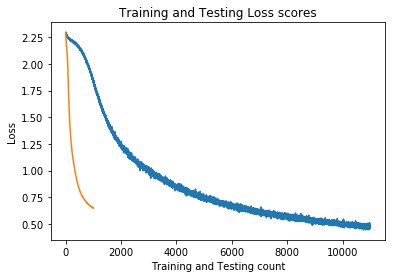

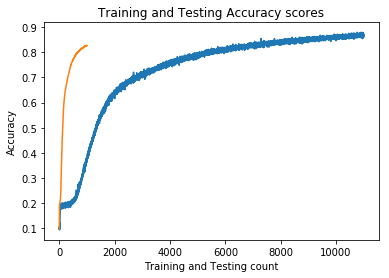

In [15]:
import time
import pickle
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
# TODO:
# Pick your hyper parameters
max_epoch = 1000
train_batch = 7000
test_batch = 2500
learning_rate = 0.001

#use_gpu = torch.cuda.is_available()

class plot_values(object):
    def __init__(self):
        self.train_losses = []
        self.train_accuracies = []
        self.train_no = 0
        self.test_losses = []
        self.test_accuracies = []
        self.test_no = 0
        
class vals(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val):
        self.val = val
        self.sum += val
        self.count += 1
        self.avg = self.sum / self.count

def plot():
    file = open("SVHND_plot_vals.p", 'rb')
    plot_vals = pickle.load(file)
    file.close

    train_x = [x for x in range(plot_vals.train_no)]
    test_x = [x for x in range(plot_vals.test_no)]

    plt.plot(train_x, plot_vals.train_losses)
    plt.plot(test_x, plot_vals.test_losses)
    plt.xlabel("Training and Testing count")
    plt.ylabel("Loss")
    plt.title("Training and Testing Loss scores")
    plt.show()

    plt.plot(train_x, plot_vals.train_accuracies)
    plt.plot(test_x, plot_vals.test_accuracies)
    plt.xlabel("Training and Testing count")
    plt.ylabel("Accuracy")
    plt.title("Training and Testing Accuracy scores")
    plt.show()



def main(): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    train_dataset, test_dataset = get_dataset("./data/Q2/")
    trainloader = torch.utils.data.DataLoader(SVHNDataset(dataset = train_dataset),batch_size = train_batch,shuffle = True, num_workers = 8)
    testloader = torch.utils.data.DataLoader(SVHNDataset(dataset = test_dataset),batch_size = test_batch,shuffle = False, num_workers = 8)

    model = FCNet(input_size = 1024, H1_size = 256, H2_size = 256, output_size = 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    plot_vals = plot_values()
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/SVHND_model.pth"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, trainloader, plot_vals)
        acc = test(model, testloader, criterion, plot_vals)
        if acc > best_acc:
            torch.save(model, best_path)
    file = open("SVHND_plot_vals.p", 'wb')
    pickle.dump(plot_vals, file)
    file.close()
    

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader, plot_vals): # you are free to change parameters
    batch_time = vals()
    data_time = vals()
    losses = vals()
    accuracies = vals()
    #correct = 0
    model.train()
    
    end = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        data, labels = Variable(data), Variable(labels)
        #torch.set_printoptions(threshold=100000) 
        data_time.update(time.time() - end)
        #forward + backward + optimize
        y_pred = model.forward(data)
        error = criterion(y_pred, labels)
        # zero the parameter gradients
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        
        #set losses, accuracies and time
        losses.update(error.data)
        plot_vals.train_losses.append(losses.val)
        pred = torch.argmax(y_pred, dim = 1)
        correct = pred.eq(labels.data.view_as(pred)).sum()
        #print(correct)
        #print(pred)
        #print(labels)
        accuracies.update(float(correct) / float(labels.shape[0]))
        plot_vals.train_accuracies.append(accuracies.val)
        plot_vals.train_no += 1
        batch_time.update(time.time() - end)
        end = time.time()
        
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time,
               loss=losses,
               acc=accuracies))



''' Test&Validate your network '''
def test(model, loader, criterion, plot_vals): # you are free to change parameters
    batch_time = vals()
    accuracies = vals()
    losses = vals()
    correct = 0
    model.eval()
    
    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            data, labels = Variable(data), Variable(labels)
            y_pred = model.forward(data)
            error = criterion(y_pred, labels)
            pred = torch.argmax(y_pred, dim = 1)
            #set losses,accuracies and time
            losses.update(error.data)
            correct = pred.eq(labels.data.view_as(pred)).sum()
            accuracies.update(float(correct) / float(labels.shape[0]))
            batch_time.update(time.time() - end)
            end = time.time()
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    plot_vals.test_losses.append(losses.avg)
    plot_vals.test_accuracies.append(accuracies.avg)
    plot_vals.test_no += 1
    return accuracies.avg

main()
plot()

#### Weight Visualization [6 pts]

For the best model, extract the learned weights from first hidden layer. Visualize learned weights for each neuron of the first hidden layer as an image. Show these images in a grid and add this grid in the pdf file as well. 

<Figure size 7200x7200 with 0 Axes>

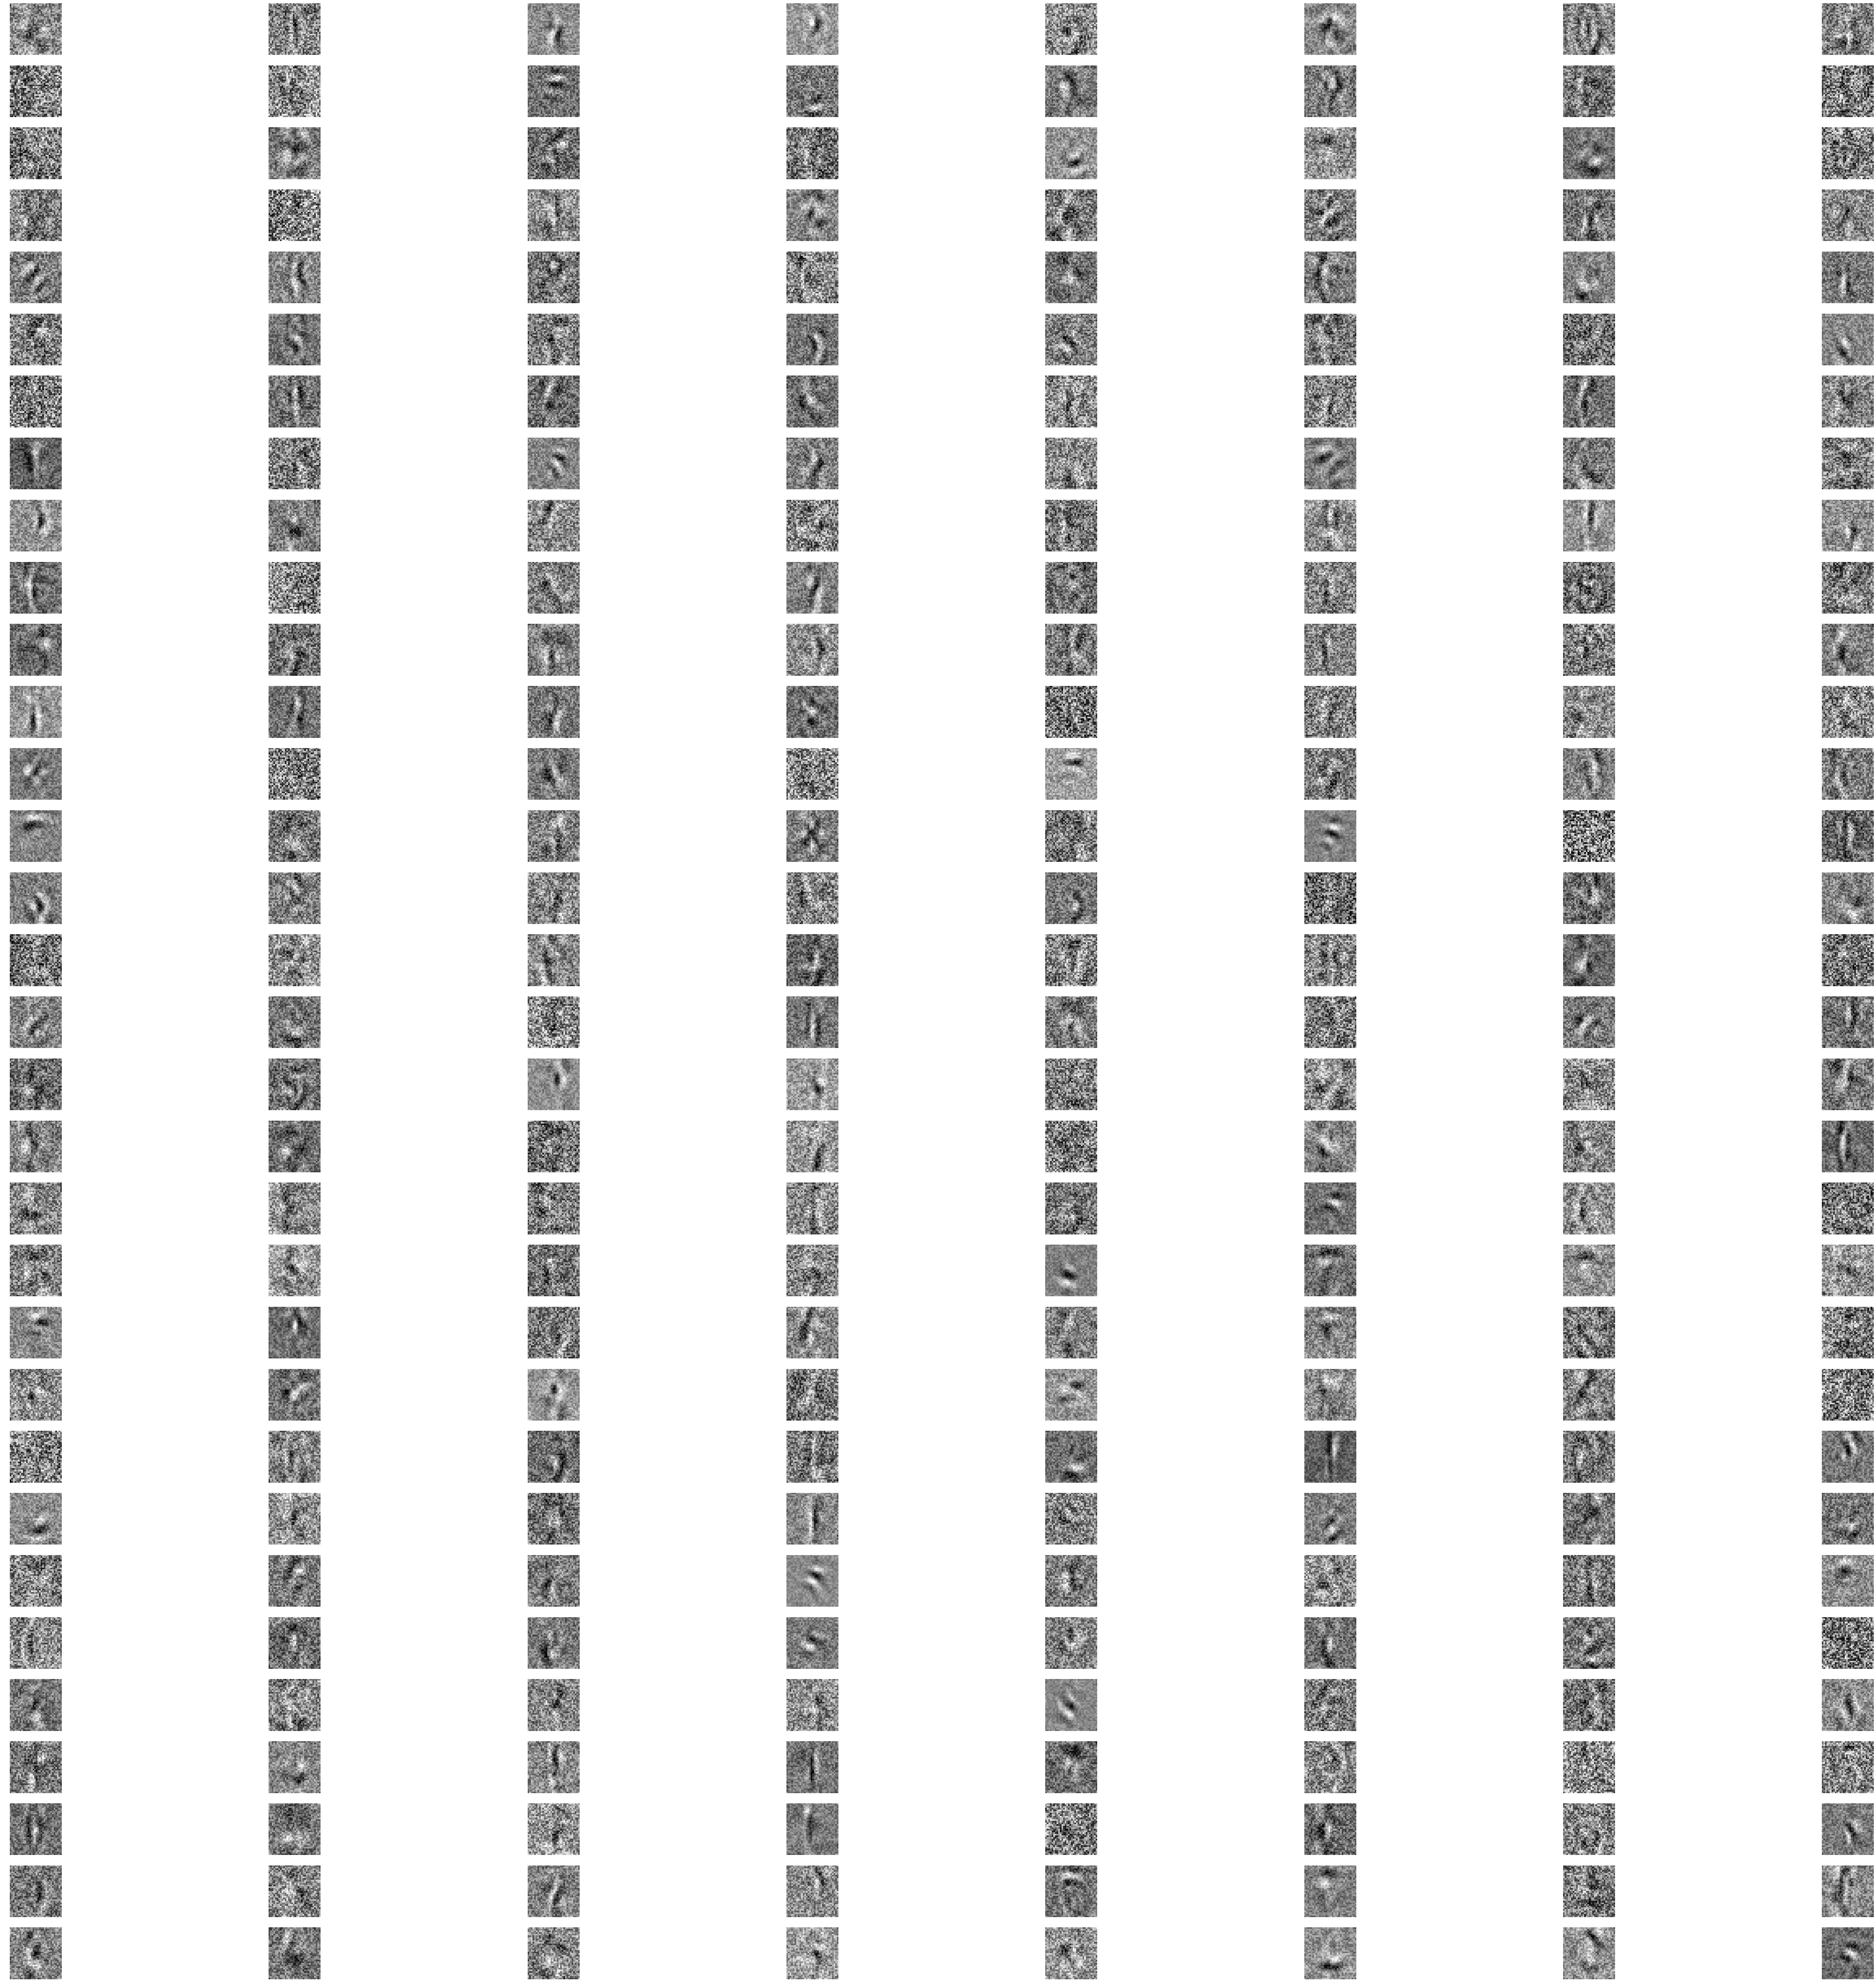

In [36]:
# write your code in this cell to visualize first hidden layer weights. Produce your figure here.
fig = plt.figure()
plt.figure(figsize=(100,100))
best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/SVHND_model.pth"
model = torch.load(best_path)
weights = model.state_dict()["hidden1_input.weight"]
for idx, filt  in enumerate(weights):
    filt = filt.reshape(32, 32)
    plt.subplot(32,8, idx + 1)
    plt.imshow(filt, cmap = "gray")
    plt.axis('off')
plt.savefig('weights.pdf')
plt.show()

### 3.2. Convolutional Neural Network (CNN) [30 pts]

#### DataLoader [3 pts]

In this part, you will train a CNN for the same problem. Again, the pixel values also needs to be normalized to [0,1] range. First, implement the data loader (SVHNDataset). Note that now you do not need to flatten the image. Again, for this question, do not perform cross validation. Also, just like 3.1., do not use a validation split. Use the same splits as in 3.1. 

In [39]:
# http://ufldl.stanford.edu/housenumbers/
import scipy.io as sio
import numpy as np
from torch.utils.data import Dataset

class SVHNDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, **kwargs): # you are free to change parameters
        self.data = kwargs.get("dataset")["data"]
        self.labels = kwargs.get("dataset")["labels"]
        
        # Transpose the image arrays
        self.data, self.labels = self.data.transpose((3,0,1,2)), self.labels[:,0]
        self.labels[self.labels == 10] = 0
        
        self.data = np.expand_dims(np.dot(self.data, [0.2990, 0.5870, 0.1140]), axis = 3).astype(np.float32)
        self.data = self.data.transpose((0,3,1,2))
        data_mean = np.mean(self.data, axis = 0)
        data_std = np.std(self.data, axis = 0)
        self.data = (self.data - data_mean) / data_std
        
        self.data = torch.from_numpy(self.data)
        self.labels = torch.from_numpy(self.labels).long()
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

        
def get_dataset(root): #you are free to change parameters
    # TODO: 
    # Read dataset files from "data/Q2" folder
    # Normalize datasets
    train_data = sio.loadmat(root + 'train_32x32.mat').get("X") 
    train_labels = sio.loadmat(root + 'train_32x32.mat').get("y")
    test_data = sio.loadmat(root + 'test_32x32.mat').get("X")
    test_labels = sio.loadmat(root + 'test_32x32.mat').get("y")
    train_dataset = {"data": train_data, "labels": train_labels}
    test_dataset= {"data": test_data, "labels": test_labels}
    return train_dataset, test_dataset


#### Neural Network [9 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 32 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 64 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 128 filters with size of 3 x 3 with stride 1 and no padding, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As a classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes for the classification (linear) layer.

In [40]:
import torch.nn as nn
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(4608, 10)
    
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
        in_size = X.size(0)
        out = self.relu(self.conv1(X))
        out = self.mp(self.relu(self.conv2(out)))
        out = self.mp(self.relu(self.conv3(out)))
        out = out.view(in_size, -1)
        return self.fc(out)

    

#### Training and Testing [10 pts]

Now, train your network. You need to select the appropriate loss function. You need to select your hyper-parameters. Make sure that you shuffle the samples in the training split. Note that you will not do cross validation. Plot the training loss and accuracy for each iteration. Plot the test loss and accuracy for each epoch. Your model is going to run upto the max epoch parameter. Pick the best model as your resulting model. You need to save this model in a ".pth" file. Report the validation performance change between MLP and CONV neural network and explain the reason for this change. You need to add this explanation and your plots into the pdf file.

In [ ]:
import time
import pickle
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 3000
test_batch = 1000
learning_rate = 0.001

#use_gpu = torch.cuda.is_available()

class plot_values(object):
    def __init__(self):
        self.train_losses = []
        self.train_accuracies = []
        self.train_no = 0
        self.test_losses = []
        self.test_accuracies = []
        self.test_no = 0
        
class vals(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val):
        self.val = val
        self.sum += val
        self.count += 1
        self.avg = self.sum / self.count

def plot():
    file = open("CNN_plot_vals.p", 'rb')
    plot_vals = pickle.load(file)
    file.close

    train_x = [x for x in range(plot_vals.train_no)]
    test_x = [x for x in range(plot_vals.test_no)]

    plt.plot(train_x, plot_vals.train_losses)
    plt.plot(test_x, plot_vals.test_losses)
    plt.xlabel("Training and Testing count")
    plt.ylabel("Loss")
    plt.title("Training and Testing Loss scores")
    plt.show()

    plt.plot(train_x, plot_vals.train_accuracies)
    plt.plot(test_x, plot_vals.test_accuracies)
    plt.xlabel("Training and Testing count")
    plt.ylabel("Accuracy")
    plt.title("Training and Testing Accuracy scores")
    plt.show()



def main(): # you are free to change parameters

    # Create train dataset loader
    # Create validation dataset loader
    # Create test dataset loader
    # initialize your GENet neural network
    # define your loss function
    train_dataset, test_dataset = get_dataset("./data/Q2/")
    trainloader = torch.utils.data.DataLoader(SVHNDataset(dataset = train_dataset),batch_size = train_batch,shuffle = True, num_workers = 8)
    testloader = torch.utils.data.DataLoader(SVHNDataset(dataset = test_dataset),batch_size = test_batch,shuffle = False, num_workers = 8)

    model = ConvNet()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    criterion = nn.CrossEntropyLoss()
    plot_vals = plot_values()
    
    # start training
    # for each epoch calculate validation performance
    # save best model according to validation performance
    best_acc = 0
    best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/CNN_model.pth"
    for epoch in range(max_epoch):
        train(epoch, model, criterion, optimizer, trainloader, plot_vals)
        acc = test(model, testloader, criterion, plot_vals)
        if acc > best_acc:
            torch.save(model, best_path)
    file = open("CNN_plot_vals.p", 'wb')
    pickle.dump(plot_vals, file)
    file.close()
    

''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer, loader, plot_vals): # you are free to change parameters
    batch_time = vals()
    data_time = vals()
    losses = vals()
    accuracies = vals()
    #correct = 0
    model.train()
    
    end = time.time()
    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        data, labels = Variable(data), Variable(labels)
        data_time.update(time.time() - end)
        #forward + backward + optimize
        y_pred = model.forward(data)
        error = criterion(y_pred, labels)
        # zero the parameter gradients
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        
        #set losses, accuracies and time
        losses.update(error.data)
        plot_vals.train_losses.append(losses.val)
        pred = torch.argmax(y_pred, dim = 1)
        correct = pred.eq(labels.data.view_as(pred)).sum()
        #print(correct)
        #print(pred)
        #print(labels)
        accuracies.update(float(correct) / float(labels.shape[0]))
        plot_vals.train_accuracies.append(accuracies.val)
        plot_vals.train_no += 1
        batch_time.update(time.time() - end)
        end = time.time()
        
        
        print('Epoch: [{0}][{1}/{2}]\t'
              'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
              'Data {data_time.val:.4f} ({data_time.avg:.4f})\t'
              'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
              'Accu {acc.val:.4f} ({acc.avg:.4f})\t'.format(
               epoch + 1, batch_idx + 1, len(loader), 
               batch_time=batch_time,
               data_time=data_time,
               loss=losses,
               acc=accuracies))



''' Test&Validate your network '''
def test(model, loader, criterion, plot_vals): # you are free to change parameters
    batch_time = vals()
    accuracies = vals()
    losses = vals()
    correct = 0
    model.eval()
    
    end = time.time()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            data, labels = Variable(data), Variable(labels)
            y_pred = model.forward(data)
            error = criterion(y_pred, labels)
            pred = torch.argmax(y_pred, dim = 1)
            #set losses,accuracies and time
            losses.update(error.data)
            correct = pred.eq(labels.data.view_as(pred)).sum()
            accuracies.update(float(correct) / float(labels.shape[0]))
            batch_time.update(time.time() - end)
            end = time.time()
        print('Time {batch_time.avg:.3f}\t'
              'Accu {acc.avg:.4f}\t'.format(
               batch_time=batch_time, 
               acc=accuracies))
    plot_vals.test_losses.append(losses.avg)
    plot_vals.test_accuracies.append(accuracies.avg)
    plot_vals.test_no += 1
    return accuracies.avg

main()
plot()

Epoch: [1][1/25]	Time 23.483 (23.483)	Data 0.1609 (0.1609)	Loss 2.3073 (2.3073)	Accu 0.0950 (0.0950)	
Epoch: [1][2/25]	Time 21.536 (22.509)	Data 0.0041 (0.0825)	Loss 2.3053 (2.3063)	Accu 0.0950 (0.0950)	
Epoch: [1][3/25]	Time 20.030 (21.683)	Data 0.0079 (0.0576)	Loss 2.3066 (2.3064)	Accu 0.0973 (0.0958)	
Epoch: [1][4/25]	Time 20.250 (21.325)	Data 0.0026 (0.0438)	Loss 2.3052 (2.3061)	Accu 0.0967 (0.0960)	
Epoch: [1][5/25]	Time 19.588 (20.977)	Data 0.0065 (0.0364)	Loss 2.3057 (2.3060)	Accu 0.1190 (0.1006)	
Epoch: [1][6/25]	Time 19.670 (20.759)	Data 0.0020 (0.0306)	Loss 2.3022 (2.3054)	Accu 0.1357 (0.1064)	
Epoch: [1][7/25]	Time 19.831 (20.627)	Data 0.0037 (0.0268)	Loss 2.3013 (2.3048)	Accu 0.1483 (0.1124)	
Epoch: [1][8/25]	Time 19.941 (20.541)	Data 0.0029 (0.0238)	Loss 2.2965 (2.3037)	Accu 0.1840 (0.1214)	
Epoch: [1][9/25]	Time 20.546 (20.542)	Data 0.0155 (0.0229)	Loss 2.2954 (2.3028)	Accu 0.1847 (0.1284)	
Epoch: [1][10/25]	Time 18.965 (20.384)	Data 0.0039 (0.0210)	Loss 2.2910 (2.3016)	A

/Users/usman/miniconda3/envs/HW3/lib/python3.7/site-packages/torch/serialization.py:250: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: [2][1/25]	Time 24.549 (24.549)	Data 0.4464 (0.4464)	Loss 2.2519 (2.2519)	Accu 0.1983 (0.1983)	
Epoch: [2][2/25]	Time 22.398 (23.474)	Data 0.0059 (0.2262)	Loss 2.2525 (2.2522)	Accu 0.1877 (0.1930)	
Epoch: [2][3/25]	Time 24.563 (23.837)	Data 0.0029 (0.1517)	Loss 2.2521 (2.2522)	Accu 0.1923 (0.1928)	
Epoch: [2][4/25]	Time 24.916 (24.107)	Data 0.0027 (0.1145)	Loss 2.2476 (2.2510)	Accu 0.1927 (0.1928)	
Epoch: [2][5/25]	Time 22.733 (23.832)	Data 0.0027 (0.0921)	Loss 2.2477 (2.2504)	Accu 0.1953 (0.1933)	
Epoch: [2][6/25]	Time 21.025 (23.364)	Data 0.0042 (0.0775)	Loss 2.2554 (2.2512)	Accu 0.1790 (0.1909)	
Epoch: [2][7/25]	Time 20.842 (23.004)	Data 0.0029 (0.0668)	Loss 2.2579 (2.2522)	Accu 0.1833 (0.1898)	
Epoch: [2][8/25]	Time 21.490 (22.815)	Data 0.0026 (0.0588)	Loss 2.2470 (2.2515)	Accu 0.1870 (0.1895)	
Epoch: [2][9/25]	Time 29.466 (23.554)	Data 0.0077 (0.0531)	Loss 2.2477 (2.2511)	Accu 0.1913 (0.1897)	
Epoch: [2][10/25]	Time 22.125 (23.411)	Data 0.0086 (0.0487)	Loss 2.2404 (2.2500)	A

Epoch: [5][6/25]	Time 25.646 (24.739)	Data 0.0030 (0.0396)	Loss 2.2343 (2.2372)	Accu 0.1920 (0.1897)	
Epoch: [5][7/25]	Time 25.308 (24.820)	Data 0.0028 (0.0344)	Loss 2.2432 (2.2381)	Accu 0.1807 (0.1884)	
Epoch: [5][8/25]	Time 23.140 (24.610)	Data 0.0037 (0.0305)	Loss 2.2329 (2.2374)	Accu 0.1917 (0.1888)	
Epoch: [5][9/25]	Time 22.011 (24.321)	Data 0.0098 (0.0282)	Loss 2.2305 (2.2366)	Accu 0.1960 (0.1896)	
Epoch: [5][10/25]	Time 21.303 (24.019)	Data 0.0025 (0.0257)	Loss 2.2295 (2.2359)	Accu 0.1960 (0.1902)	
Epoch: [5][11/25]	Time 22.712 (23.901)	Data 0.0020 (0.0235)	Loss 2.2419 (2.2365)	Accu 0.1863 (0.1899)	
Epoch: [5][12/25]	Time 21.280 (23.682)	Data 0.0030 (0.0218)	Loss 2.2262 (2.2356)	Accu 0.2043 (0.1911)	
Epoch: [5][13/25]	Time 19.756 (23.380)	Data 0.0028 (0.0203)	Loss 2.2339 (2.2355)	Accu 0.1900 (0.1910)	
Epoch: [5][14/25]	Time 19.788 (23.124)	Data 0.0027 (0.0191)	Loss 2.2412 (2.2359)	Accu 0.1840 (0.1905)	
Epoch: [5][15/25]	Time 19.850 (22.905)	Data 0.0015 (0.0179)	Loss 2.2324 (2.23

Epoch: [8][11/25]	Time 19.808 (20.130)	Data 0.0029 (0.0188)	Loss 2.2270 (2.2307)	Accu 0.1820 (0.1906)	
Epoch: [8][12/25]	Time 19.685 (20.093)	Data 0.0015 (0.0173)	Loss 2.2353 (2.2311)	Accu 0.1887 (0.1904)	
Epoch: [8][13/25]	Time 19.549 (20.051)	Data 0.0017 (0.0161)	Loss 2.2266 (2.2307)	Accu 0.1967 (0.1909)	
Epoch: [8][14/25]	Time 19.415 (20.006)	Data 0.0039 (0.0153)	Loss 2.2418 (2.2315)	Accu 0.1907 (0.1909)	
Epoch: [8][15/25]	Time 19.578 (19.977)	Data 0.0017 (0.0144)	Loss 2.2319 (2.2315)	Accu 0.1843 (0.1905)	
Epoch: [8][16/25]	Time 19.577 (19.952)	Data 0.0015 (0.0136)	Loss 2.2294 (2.2314)	Accu 0.1960 (0.1908)	
Epoch: [8][17/25]	Time 19.604 (19.932)	Data 0.0026 (0.0129)	Loss 2.2340 (2.2316)	Accu 0.1903 (0.1908)	
Epoch: [8][18/25]	Time 19.488 (19.907)	Data 0.0027 (0.0123)	Loss 2.2222 (2.2310)	Accu 0.1867 (0.1906)	
Epoch: [8][19/25]	Time 19.344 (19.877)	Data 0.0024 (0.0118)	Loss 2.2404 (2.2315)	Accu 0.1777 (0.1899)	
Epoch: [8][20/25]	Time 19.782 (19.873)	Data 0.0028 (0.0114)	Loss 2.2240 (

Epoch: [11][15/25]	Time 20.061 (22.325)	Data 0.0016 (0.0166)	Loss 2.2214 (2.2245)	Accu 0.1923 (0.1883)	
Epoch: [11][16/25]	Time 19.755 (22.164)	Data 0.0014 (0.0156)	Loss 2.2163 (2.2240)	Accu 0.1920 (0.1885)	
Epoch: [11][17/25]	Time 19.763 (22.023)	Data 0.0024 (0.0148)	Loss 2.2229 (2.2239)	Accu 0.1890 (0.1885)	
Epoch: [11][18/25]	Time 22.165 (22.031)	Data 0.0025 (0.0142)	Loss 2.2276 (2.2241)	Accu 0.1927 (0.1888)	
Epoch: [11][19/25]	Time 24.292 (22.150)	Data 0.0118 (0.0140)	Loss 2.2362 (2.2248)	Accu 0.1780 (0.1882)	
Epoch: [11][20/25]	Time 24.964 (22.291)	Data 0.0022 (0.0134)	Loss 2.2192 (2.2245)	Accu 0.1867 (0.1881)	
Epoch: [11][21/25]	Time 22.861 (22.318)	Data 0.0023 (0.0129)	Loss 2.2287 (2.2247)	Accu 0.1907 (0.1883)	
Epoch: [11][22/25]	Time 22.203 (22.313)	Data 0.0023 (0.0124)	Loss 2.2219 (2.2245)	Accu 0.2023 (0.1889)	
Epoch: [11][23/25]	Time 23.314 (22.356)	Data 0.0028 (0.0120)	Loss 2.2206 (2.2244)	Accu 0.1953 (0.1892)	
Epoch: [11][24/25]	Time 22.996 (22.383)	Data 0.0023 (0.0116)	Los

Epoch: [14][19/25]	Time 19.491 (20.760)	Data 0.0027 (0.0135)	Loss 2.2134 (2.2169)	Accu 0.1900 (0.1895)	
Epoch: [14][20/25]	Time 19.297 (20.687)	Data 0.0026 (0.0129)	Loss 2.2126 (2.2167)	Accu 0.1827 (0.1891)	
Epoch: [14][21/25]	Time 20.261 (20.666)	Data 0.0023 (0.0124)	Loss 2.2139 (2.2166)	Accu 0.1953 (0.1894)	
Epoch: [14][22/25]	Time 20.086 (20.640)	Data 0.0030 (0.0120)	Loss 2.2012 (2.2159)	Accu 0.1983 (0.1898)	
Epoch: [14][23/25]	Time 19.311 (20.582)	Data 0.0022 (0.0116)	Loss 2.2223 (2.2161)	Accu 0.1850 (0.1896)	
Epoch: [14][24/25]	Time 20.246 (20.568)	Data 0.0025 (0.0112)	Loss 2.2026 (2.2156)	Accu 0.1973 (0.1900)	
Epoch: [14][25/25]	Time 7.642 (20.051)	Data 0.0024 (0.0108)	Loss 2.2203 (2.2158)	Accu 0.1726 (0.1893)	
Time 3.067	Accu 0.1970	
Epoch: [15][1/25]	Time 20.843 (20.843)	Data 0.1920 (0.1920)	Loss 2.2102 (2.2102)	Accu 0.1953 (0.1953)	
Epoch: [15][2/25]	Time 19.653 (20.248)	Data 0.0025 (0.0973)	Loss 2.2165 (2.2134)	Accu 0.1860 (0.1907)	
Epoch: [15][3/25]	Time 18.744 (19.746)	Data

Epoch: [17][23/25]	Time 20.464 (22.329)	Data 0.0031 (0.0132)	Loss 2.1847 (2.2033)	Accu 0.2093 (0.1931)	
Epoch: [17][24/25]	Time 20.886 (22.269)	Data 0.0025 (0.0128)	Loss 2.2025 (2.2032)	Accu 0.1963 (0.1933)	
Epoch: [17][25/25]	Time 8.695 (21.726)	Data 0.0025 (0.0124)	Loss 2.1946 (2.2029)	Accu 0.1901 (0.1932)	
Time 3.330	Accu 0.2010	
Epoch: [18][1/25]	Time 22.958 (22.958)	Data 0.2513 (0.2513)	Loss 2.1949 (2.1949)	Accu 0.1973 (0.1973)	
Epoch: [18][2/25]	Time 23.549 (23.253)	Data 0.0091 (0.1302)	Loss 2.1940 (2.1944)	Accu 0.1933 (0.1953)	
Epoch: [18][3/25]	Time 26.429 (24.312)	Data 0.0077 (0.0894)	Loss 2.1909 (2.1933)	Accu 0.2140 (0.2016)	
Epoch: [18][4/25]	Time 25.911 (24.712)	Data 0.0030 (0.0678)	Loss 2.1998 (2.1949)	Accu 0.1900 (0.1987)	
Epoch: [18][5/25]	Time 26.035 (24.976)	Data 0.0045 (0.0551)	Loss 2.2027 (2.1965)	Accu 0.1883 (0.1966)	
Epoch: [18][6/25]	Time 27.769 (25.442)	Data 0.0047 (0.0467)	Loss 2.1909 (2.1955)	Accu 0.2027 (0.1976)	
Epoch: [18][7/25]	Time 24.615 (25.324)	Data 0.0

Epoch: [21][2/25]	Time 21.988 (22.112)	Data 0.0041 (0.0999)	Loss 2.1709 (2.1737)	Accu 0.2137 (0.2097)	
Epoch: [21][3/25]	Time 24.712 (22.979)	Data 0.0047 (0.0682)	Loss 2.1796 (2.1757)	Accu 0.1990 (0.2061)	
Epoch: [21][4/25]	Time 22.917 (22.963)	Data 0.0050 (0.0524)	Loss 2.1732 (2.1751)	Accu 0.2090 (0.2068)	
Epoch: [21][5/25]	Time 24.732 (23.317)	Data 0.0029 (0.0425)	Loss 2.1745 (2.1750)	Accu 0.2150 (0.2085)	
Epoch: [21][6/25]	Time 23.208 (23.299)	Data 0.0041 (0.0361)	Loss 2.1872 (2.1770)	Accu 0.2047 (0.2078)	
Epoch: [21][7/25]	Time 21.703 (23.071)	Data 0.0045 (0.0316)	Loss 2.1864 (2.1783)	Accu 0.1967 (0.2062)	
Epoch: [21][8/25]	Time 19.964 (22.683)	Data 0.0040 (0.0281)	Loss 2.1614 (2.1762)	Accu 0.2203 (0.2080)	
Epoch: [21][9/25]	Time 24.926 (22.932)	Data 0.0092 (0.0260)	Loss 2.1730 (2.1759)	Accu 0.2107 (0.2083)	
Epoch: [21][10/25]	Time 26.487 (23.287)	Data 0.0025 (0.0237)	Loss 2.1770 (2.1760)	Accu 0.2150 (0.2090)	
Epoch: [21][11/25]	Time 21.501 (23.125)	Data 0.0018 (0.0217)	Loss 2.1691

Epoch: [24][6/25]	Time 25.721 (21.782)	Data 0.0045 (0.0336)	Loss 2.1413 (2.1403)	Accu 0.2417 (0.2392)	
Epoch: [24][7/25]	Time 20.952 (21.664)	Data 0.0031 (0.0293)	Loss 2.1508 (2.1418)	Accu 0.2393 (0.2392)	
Epoch: [24][8/25]	Time 20.314 (21.495)	Data 0.0041 (0.0261)	Loss 2.1531 (2.1432)	Accu 0.2383 (0.2391)	
Epoch: [24][9/25]	Time 20.134 (21.344)	Data 0.0094 (0.0243)	Loss 2.1368 (2.1425)	Accu 0.2463 (0.2399)	
Epoch: [24][10/25]	Time 19.850 (21.195)	Data 0.0028 (0.0221)	Loss 2.1281 (2.1410)	Accu 0.2570 (0.2416)	
Epoch: [24][11/25]	Time 20.031 (21.089)	Data 0.0038 (0.0205)	Loss 2.1302 (2.1401)	Accu 0.2557 (0.2429)	
Epoch: [24][12/25]	Time 21.093 (21.089)	Data 0.0016 (0.0189)	Loss 2.1386 (2.1399)	Accu 0.2547 (0.2439)	
Epoch: [24][13/25]	Time 19.976 (21.004)	Data 0.0016 (0.0176)	Loss 2.1285 (2.1391)	Accu 0.2560 (0.2448)	
Epoch: [24][14/25]	Time 20.749 (20.985)	Data 0.0034 (0.0165)	Loss 2.1385 (2.1390)	Accu 0.2483 (0.2450)	
Epoch: [24][15/25]	Time 19.965 (20.917)	Data 0.0019 (0.0156)	Loss 2.

Epoch: [27][10/25]	Time 23.864 (23.879)	Data 0.0031 (0.0233)	Loss 2.0517 (2.0691)	Accu 0.3120 (0.2981)	
Epoch: [27][11/25]	Time 24.786 (23.962)	Data 0.0032 (0.0215)	Loss 2.0694 (2.0691)	Accu 0.2903 (0.2974)	
Epoch: [27][12/25]	Time 23.228 (23.901)	Data 0.0016 (0.0198)	Loss 2.0739 (2.0695)	Accu 0.2983 (0.2975)	
Epoch: [27][13/25]	Time 22.988 (23.830)	Data 0.0025 (0.0185)	Loss 2.0698 (2.0695)	Accu 0.2963 (0.2974)	
Epoch: [27][14/25]	Time 22.381 (23.727)	Data 0.0032 (0.0174)	Loss 2.0457 (2.0678)	Accu 0.3080 (0.2981)	
Epoch: [27][15/25]	Time 23.814 (23.733)	Data 0.0026 (0.0164)	Loss 2.0643 (2.0676)	Accu 0.2920 (0.2977)	
Epoch: [27][16/25]	Time 26.955 (23.934)	Data 0.0017 (0.0155)	Loss 2.0622 (2.0673)	Accu 0.2950 (0.2976)	
Epoch: [27][17/25]	Time 23.171 (23.889)	Data 0.0023 (0.0147)	Loss 2.0437 (2.0659)	Accu 0.3153 (0.2986)	
Epoch: [27][18/25]	Time 26.012 (24.007)	Data 0.0027 (0.0140)	Loss 2.0762 (2.0665)	Accu 0.2870 (0.2980)	
Epoch: [27][19/25]	Time 25.877 (24.106)	Data 0.0021 (0.0134)	Los

Epoch: [30][14/25]	Time 34.082 (28.829)	Data 0.0019 (0.0234)	Loss 1.9270 (1.9484)	Accu 0.3800 (0.3710)	
Epoch: [30][15/25]	Time 30.522 (28.942)	Data 0.0021 (0.0219)	Loss 1.9438 (1.9481)	Accu 0.3770 (0.3714)	
Epoch: [30][16/25]	Time 30.700 (29.052)	Data 0.0039 (0.0208)	Loss 1.9244 (1.9466)	Accu 0.3950 (0.3729)	
Epoch: [30][17/25]	Time 30.141 (29.116)	Data 0.0023 (0.0197)	Loss 1.9333 (1.9459)	Accu 0.3797 (0.3733)	
Epoch: [30][18/25]	Time 26.598 (28.976)	Data 0.0029 (0.0188)	Loss 1.9154 (1.9442)	Accu 0.3943 (0.3745)	
Epoch: [30][19/25]	Time 29.892 (29.024)	Data 0.0033 (0.0180)	Loss 1.9299 (1.9434)	Accu 0.3727 (0.3744)	
Epoch: [30][20/25]	Time 30.398 (29.093)	Data 0.0054 (0.0173)	Loss 1.9277 (1.9426)	Accu 0.3897 (0.3751)	
Epoch: [30][21/25]	Time 32.830 (29.271)	Data 0.0033 (0.0167)	Loss 1.9025 (1.9407)	Accu 0.3933 (0.3760)	
Epoch: [30][22/25]	Time 32.458 (29.416)	Data 0.0029 (0.0160)	Loss 1.9229 (1.9399)	Accu 0.3843 (0.3764)	
Epoch: [30][23/25]	Time 32.280 (29.540)	Data 0.0029 (0.0155)	Los

Epoch: [33][18/25]	Time 22.543 (22.556)	Data 0.0026 (0.0133)	Loss 1.7399 (1.7590)	Accu 0.4657 (0.4609)	
Epoch: [33][19/25]	Time 21.298 (22.489)	Data 0.0031 (0.0128)	Loss 1.7212 (1.7570)	Accu 0.4837 (0.4621)	
Epoch: [33][20/25]	Time 21.162 (22.423)	Data 0.0044 (0.0124)	Loss 1.7617 (1.7573)	Accu 0.4480 (0.4614)	
Epoch: [33][21/25]	Time 21.178 (22.364)	Data 0.0026 (0.0119)	Loss 1.7382 (1.7564)	Accu 0.4633 (0.4615)	
Epoch: [33][22/25]	Time 19.520 (22.235)	Data 0.0022 (0.0115)	Loss 1.7027 (1.7539)	Accu 0.4803 (0.4623)	
Epoch: [33][23/25]	Time 19.445 (22.113)	Data 0.0023 (0.0111)	Loss 1.7162 (1.7523)	Accu 0.4713 (0.4627)	
Epoch: [33][24/25]	Time 19.517 (22.005)	Data 0.0022 (0.0107)	Loss 1.7241 (1.7511)	Accu 0.4630 (0.4628)	
Epoch: [33][25/25]	Time 7.853 (21.439)	Data 0.0023 (0.0104)	Loss 1.6847 (1.7484)	Accu 0.4877 (0.4637)	
Time 3.170	Accu 0.4555	
Epoch: [34][1/25]	Time 21.244 (21.244)	Data 0.1878 (0.1878)	Loss 1.7129 (1.7129)	Accu 0.4707 (0.4707)	
Epoch: [34][2/25]	Time 20.372 (20.808)	Dat

Epoch: [36][22/25]	Time 20.463 (21.412)	Data 0.0028 (0.0123)	Loss 1.4905 (1.5207)	Accu 0.5577 (0.5475)	
Epoch: [36][23/25]	Time 20.272 (21.363)	Data 0.0023 (0.0118)	Loss 1.4937 (1.5195)	Accu 0.5640 (0.5482)	
Epoch: [36][24/25]	Time 23.683 (21.459)	Data 0.0023 (0.0114)	Loss 1.4983 (1.5186)	Accu 0.5517 (0.5483)	
Epoch: [36][25/25]	Time 8.235 (20.930)	Data 0.0022 (0.0111)	Loss 1.4660 (1.5165)	Accu 0.5688 (0.5492)	
Time 3.100	Accu 0.5423	
Epoch: [37][1/25]	Time 21.772 (21.772)	Data 0.1829 (0.1829)	Loss 1.4782 (1.4782)	Accu 0.5530 (0.5530)	
Epoch: [37][2/25]	Time 21.189 (21.480)	Data 0.0039 (0.0934)	Loss 1.4890 (1.4836)	Accu 0.5453 (0.5492)	
Epoch: [37][3/25]	Time 19.766 (20.909)	Data 0.0036 (0.0635)	Loss 1.4773 (1.4815)	Accu 0.5633 (0.5539)	
Epoch: [37][4/25]	Time 20.405 (20.783)	Data 0.0037 (0.0485)	Loss 1.4520 (1.4741)	Accu 0.5723 (0.5585)	
Epoch: [37][5/25]	Time 20.280 (20.682)	Data 0.0032 (0.0395)	Loss 1.4576 (1.4708)	Accu 0.5630 (0.5594)	
Epoch: [37][6/25]	Time 20.751 (20.694)	Data 0.

Time 3.201	Accu 0.6165	
Epoch: [40][1/25]	Time 24.719 (24.719)	Data 0.2164 (0.2164)	Loss 1.2437 (1.2437)	Accu 0.6393 (0.6393)	
Epoch: [40][2/25]	Time 23.109 (23.914)	Data 0.0038 (0.1101)	Loss 1.2515 (1.2476)	Accu 0.6357 (0.6375)	
Epoch: [40][3/25]	Time 21.494 (23.107)	Data 0.0059 (0.0754)	Loss 1.2696 (1.2549)	Accu 0.6183 (0.6311)	
Epoch: [40][4/25]	Time 27.170 (24.123)	Data 0.0030 (0.0573)	Loss 1.2712 (1.2590)	Accu 0.6240 (0.6293)	
Epoch: [40][5/25]	Time 22.489 (23.796)	Data 0.0028 (0.0464)	Loss 1.2433 (1.2559)	Accu 0.6370 (0.6309)	
Epoch: [40][6/25]	Time 21.188 (23.361)	Data 0.0045 (0.0394)	Loss 1.2522 (1.2553)	Accu 0.6257 (0.6300)	
Epoch: [40][7/25]	Time 21.518 (23.098)	Data 0.0036 (0.0343)	Loss 1.2551 (1.2552)	Accu 0.6310 (0.6301)	
Epoch: [40][8/25]	Time 19.784 (22.684)	Data 0.0036 (0.0304)	Loss 1.2412 (1.2535)	Accu 0.6483 (0.6324)	
Epoch: [40][9/25]	Time 19.906 (22.375)	Data 0.0105 (0.0282)	Loss 1.2530 (1.2534)	Accu 0.6337 (0.6326)	
Epoch: [40][10/25]	Time 22.250 (22.363)	Data 0.00

#### Weight Visualization [8 pts]

For the best convolutional model you obtained, extract the learnt weights from the first convolutional layer. Visualize each learnt filter of the first convolutional layer as an image. Show these images in a grid and add this grid in to the pdf file as well.

<Figure size 7200x7200 with 0 Axes>

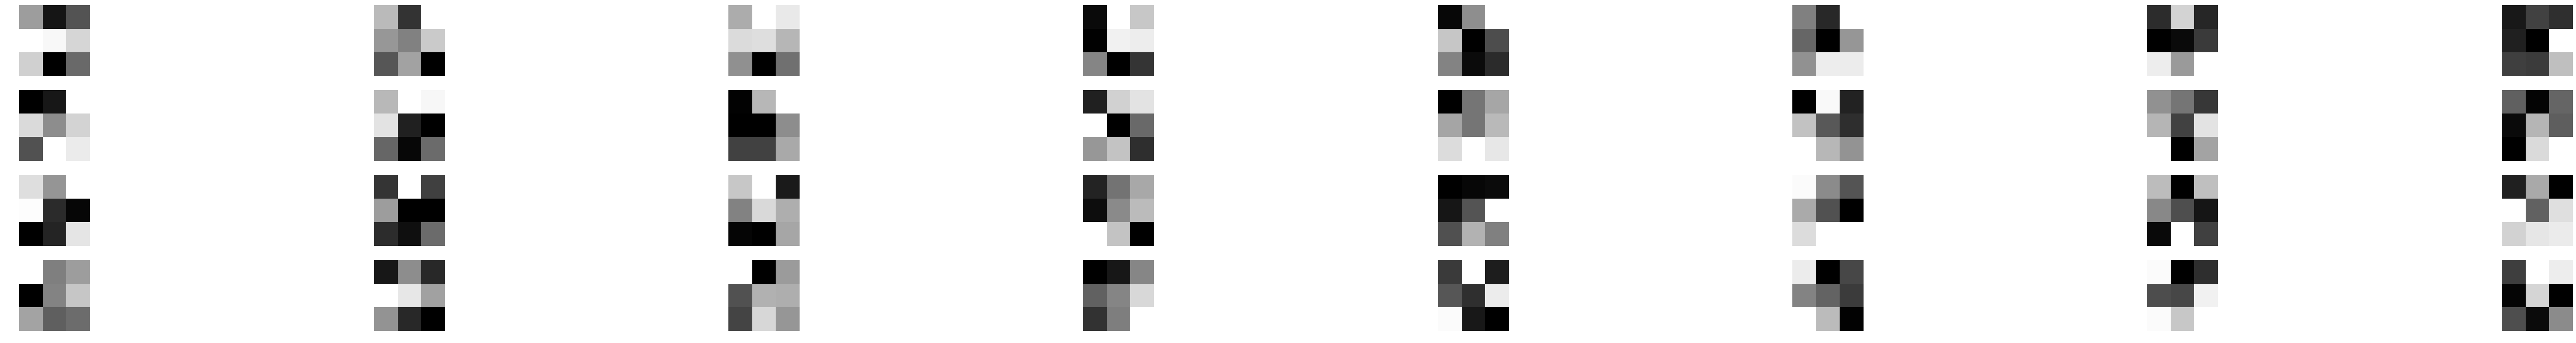

In [47]:
# write your code in this cell to visualize filters of the first convolutional layer 
fig = plt.figure()
plt.figure(figsize=(100,100))
best_path = "/Users/usman/Desktop/Sem/9/CS464/HW3/CNN_model.pth"
model = torch.load(best_path)
weights = model.conv1.weight.data
for idx, filt in enumerate(weights):
    filt = filt.reshape(3,3)
    plt.subplot(32,8, idx + 1)
    plt.imshow(filt, cmap = "gray")
    plt.axis('off')
plt.savefig('CNN_weights.pdf')
plt.show()

## BONUS: Question 4 [20 pts]

The learnt weights of a network that has been trained to solve a problem can be used as a starting point for the weights of neural networks that will be used to solve another similar problem. Instead of random initialization for the weights of the neural networks, using the weights of the neural network trained to solve a similar problem will make learning easier. This approach is called <b>"Transfer Learning"</b>.

#### Dataset

For this question, you will use CIFAR10 dataset. You can find detailed information about the dataset from https://www.cs.toronto.edu/~kriz/cifar.html. Torchvision library provides a ready-to-use data loader for the CIFAR10 dataset. You <b>DO NOT</b> need to implement your custom data loader for this question. You can easily split the dataset into training and test. Just set the "train" parameter of the constructor of torchvision.datasets.CIFAR10 class.  You will the use test split as the validation set at each epoch.

#### Model

You have to use AlexNet convolutional neural network which is one of the most basic CNN models. You <b>DO NOT</b> need to implement your own AlexNet architecture. Torchvision has also a model zoo which contains commonly used CNN models including AlexNet. Therefore, you need to use the AlexNet model from the Torchvision library. For the question 4.2 Transfer Learning part, you will need to transfer pretrained network weights as a starting point. These weights will come from the result of the training with Imagenet dataset. These will be loaded automatically when you set the "pretrained" parameter to true (check the hints in the code). Otherwise, weights will be randomly initialized.

### 4.1 Random Initialization 

#### 4.1.1 Train & Validation 

You have to train randomly initialized AlexNet CNN model using CIFAR10 dataset. At the end of each epoch, you should evaluate your network with the test split. Print (not plot) training loss, training accuracy, validation loss and validation accuracy values for each epoch. When the training is completed, print the best validation score that you have obtained during training. Report this score in your pdf file as well. You will compare this score with the result of the next question. Note that this might take a long time because of randomly initilized weights. Stop training when validation score converges.

In [14]:
# write your code in this cell to train your network that has randomly selected weights

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=False) 
# torchvision.models.alexnet(pretrained=False) will return an alexnet model instance with randomly initialized weights
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.1.2 Kernel Output Visualization

You have trained AlexNet which has randomly initialized weights by using the CIFAR10 dataset. Now you have to plot the output of the each filter at the first convolution layer as an image by using randomly selected single validation image. Merge each image obtained from the corresponding kernel in a squared grid format. Add your plot in to the pdf file as well.

In [15]:
# write your code in this cell to visualize output of the each filter at the first conv layer

### 4.2 Transfer Learning

#### 4.2.1 Train & Validation 

In this case, you have to train ImageNet pretrained AlexNet model for the CIFAR10 dataset. At the end of each epoch, you should evaluate your network with test split. Print training loss, training accuracy, validation loss and validation accuracy values for each epoch as an output of below cell. Report the best validation accuracy score. Compare validation scores that are obtained from these two different training approaches. Add your explanations to the pdf file.

In [16]:
# write your code in this cell to train your network using transfer learning approach

# HINTS:
# alexnet = torchvision.models.alexnet(pretrained=True) 
# torchvision.models.alexnet(pretrained=True) will return an alexnet model instance with ImageNet pretrained network weights.
# you need to make some changes in the classifier layer to get a proper network for your problem.

#### 4.2.2 Kernel Output Visualization

You have trained AlexNet which is pretrained with ImageNet dataset for the CIFAR10 dataset. For this network, you have to plot the output of each filter at the first convolution layer as an image by using the same image that has picked 4.1.3 section. Merge each image obtained from the corresponding kernel in a squared grid format. Explain what these outputs mean. Compare your plot with the obtained from 4.1.2. You need to add your discussions and plot into the pdf file as well.

In [17]:
# write your code in this cell to visualize output of the each filter at the first conv layer